# Using YOLOV8 for Object Detection on Custom Dataset for Pedestrian Attribute Detection

In [1]:
!nvidia-smi

Mon May 13 16:29:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [6]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


  0%|                                               | 0.00/6.23M [00:00<?, ?B/s]


  2%|▉                                      | 152k/6.23M [00:00<00:04, 1.44MB/s]


 22%|████████▌                             | 1.40M/6.23M [00:00<00:00, 7.91MB/s]


100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 22.8MB/s]


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs




  0%|                                                | 0.00/104k [00:00<?, ?B/s]


100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 49.4MB/s]


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 104.5ms
Speed: 11.7ms preprocess, 104.5ms inference, 445.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


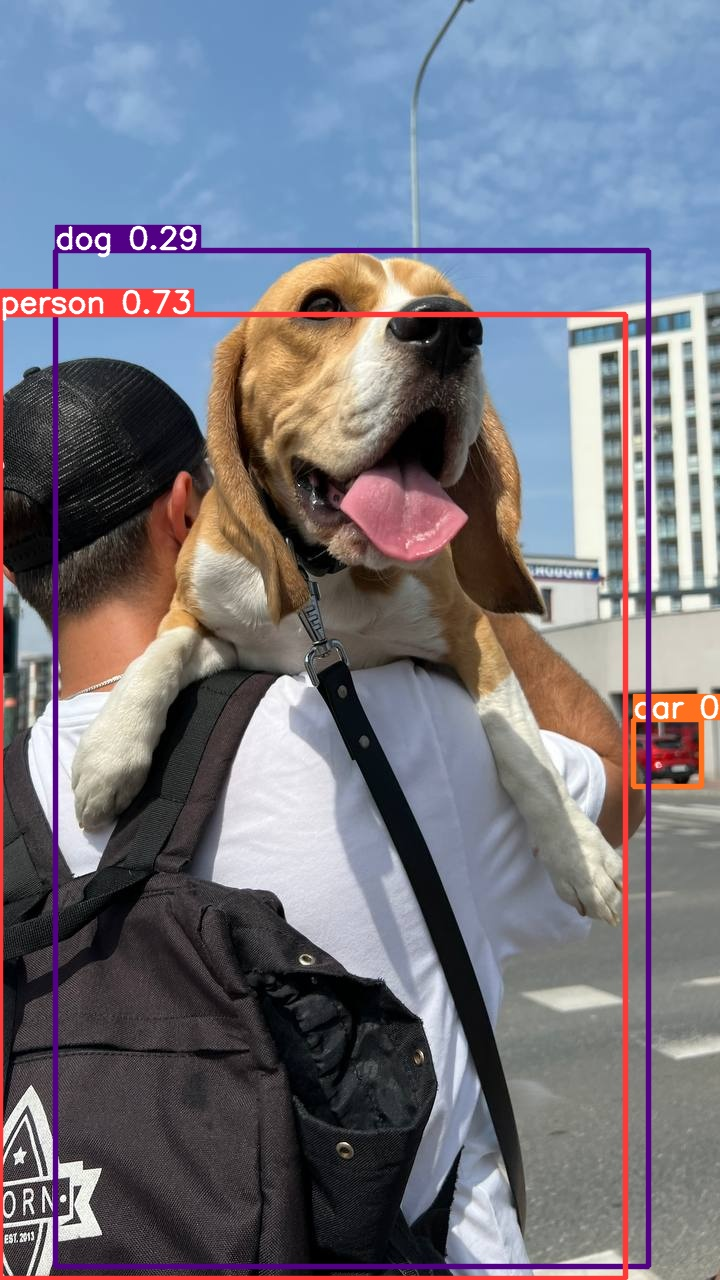

In [7]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 73.3ms


Speed: 6.2ms preprocess, 73.3ms inference, 336.7ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0755, 1278.1947],
        [  55.1730,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [17]:
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/input/fyp-datasetv2/data.yaml epochs=100 imgsz=800 plots=True  

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/fyp-datasetv2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=


  0%|                                                | 0.00/755k [00:00<?, ?B/s]


 20%|████████                                | 152k/755k [00:00<00:00, 1.50MB/s]


100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 4.34MB/s]


2024-05-13 16:30:53.965555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 16:30:53.965657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered


2024-05-13 16:30:54.088636: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=51

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    761257  ultralytics.nn.modules.head.Detect           [51, [64, 128, 256]]          


Model summary: 225 layers, 3020793 parameters, 3020777 gradients, 8.2 GFLOPs



Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


AMP: checks passed ✅



train: Scanning /kaggle/input/fyp-datasetv2/train/labels...:   0%|          | 0/


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 17 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 39 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 59 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 79 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 99 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 120 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 140 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 162 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 182 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 202 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 223 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 243 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 263 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 286 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 309 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 330 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 352 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 376 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 398 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 420 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 441 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 463 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 484 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 505 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 525 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 548 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 570 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 591 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 616 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 638 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 660 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 683 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 706 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 728 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 751 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 773 images, 0 backgr
train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 774 images, 0 backgr


train: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 7 images, 0 background


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 14 images, 0 backgroun


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000182, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


Image sizes 800 train, 800 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      1/100      3.61G      1.664      4.999      1.617        344        800:  
      1/100      3.61G      1.664      4.999      1.617        344        800:  


      1/100      3.61G      1.722      5.042      1.638        483        800:  
      1/100      3.61G      1.722      5.042      1.638        483        800:  


      1/100      3.93G      1.786      5.067      1.631        746        800:  
      1/100      3.93G      1.786      5.067      1.631        746        800:  


      1/100      3.93G      1.778      5.091      1.601        626        800:  
      1/100      3.93G      1.778      5.091      1.601        626        800:  


      1/100      3.93G       1.76      5.098      1.589        408        800:  
      1/100      3.93G       1.76      5.098      1.589        408        800:  


      1/100      4.73G      1.797      5.118      1.586       1005        800:  
      1/100      4.73G      1.797      5.118      1.586       1005        800:  


      1/100      4.73G      1.804      5.116      1.594        684        800:  
      1/100      4.73G      1.804      5.116      1.594        684        800:  


      1/100      4.73G      1.802      5.121      1.586        535        800:  
      1/100      4.73G      1.802      5.121      1.586        535        800:  


      1/100      4.73G      1.806      5.126      1.581        676        800:  
      1/100      4.73G      1.806      5.126      1.581        676        800:  


      1/100      4.73G      1.797      5.123      1.577        634        800:  


      1/100      4.73G      1.797      5.123      1.577        634        800:  


      1/100      4.73G      1.792      5.119      1.576        603        800:  
      1/100      4.73G      1.792      5.119      1.576        603        800:  


      1/100      4.73G      1.797      5.121      1.575        603        800:  
      1/100      4.73G      1.797      5.121      1.575        603        800:  


      1/100      4.73G      1.798      5.118      1.573        674        800:  
      1/100      4.73G      1.798      5.118      1.573        674        800:  


      1/100      4.73G      1.791      5.113       1.57        460        800:  
      1/100      4.73G      1.791      5.113       1.57        460        800:  


      1/100      4.73G      1.788      5.109       1.57        545        800:  
      1/100      4.73G      1.788      5.109       1.57        545        800:  


      1/100      4.73G      1.783      5.108      1.566        716        800:  
      1/100      4.73G      1.783      5.108      1.566        716        800:  


      1/100      4.73G      1.782       5.11      1.563        752        800:  


      1/100      4.73G      1.782       5.11      1.563        752        800:  


      1/100      4.73G      1.776      5.106      1.557        696        800:  
      1/100      4.73G      1.776      5.106      1.557        696        800:  


      1/100      4.73G      1.771      5.102      1.552        645        800:  
      1/100      4.73G      1.771      5.102      1.552        645        800:  


      1/100      4.73G      1.764      5.099      1.548        692        800:  
      1/100      4.73G      1.764      5.099      1.548        692        800:  


      1/100      4.73G      1.758      5.095      1.543        616        800:  
      1/100      4.73G      1.758      5.095      1.543        616        800:  


      1/100      4.73G      1.751       5.09      1.536        721        800:  


      1/100      4.73G      1.751       5.09      1.536        721        800:  


      1/100      4.73G      1.747      5.085      1.534        554        800:  
      1/100      4.73G      1.747      5.085      1.534        554        800:  


      1/100      4.73G      1.744       5.08      1.531        565        800:  
      1/100      4.73G      1.744       5.08      1.531        565        800:  


      1/100      4.73G      1.741      5.077      1.527        709        800:  
      1/100      4.73G      1.741      5.077      1.527        709        800:  


      1/100      4.73G      1.733       5.07      1.522        495        800:  
      1/100      4.73G      1.733       5.07      1.522        495        800:  


      1/100      4.73G      1.724      5.063      1.519        477        800:  
      1/100      4.73G      1.724      5.063      1.519        477        800:  


      1/100      4.73G      1.721      5.059      1.514        579        800:  
      1/100      4.73G      1.721      5.059      1.514        579        800:  


      1/100      4.73G      1.717      5.055       1.51        578        800:  


      1/100      4.73G      1.717      5.055       1.51        578        800:  


      1/100      4.73G      1.712      5.049      1.505        586        800:  
      1/100      4.73G      1.712      5.049      1.505        586        800:  


      1/100      4.73G      1.706      5.044        1.5        708        800:  
      1/100      4.73G      1.706      5.044        1.5        708        800:  


      1/100      4.73G      1.705      5.038      1.497        682        800:  
      1/100      4.73G      1.705      5.038      1.497        682        800:  


      1/100      4.73G        1.7      5.034      1.492        643        800:  
      1/100      4.73G        1.7      5.034      1.492        643        800:  


      1/100      4.73G      1.696      5.029      1.488        644        800:  
      1/100      4.73G      1.696      5.029      1.488        644        800:  


      1/100      4.73G      1.691      5.023      1.485        682        800:  
      1/100      4.73G      1.691      5.023      1.485        682        800:  


      1/100      4.73G      1.689      5.017      1.482        811        800:  
      1/100      4.73G      1.689      5.017      1.482        811        800:  


      1/100      4.73G      1.684      5.012      1.477        599        800:  
      1/100      4.73G      1.684      5.012      1.477        599        800:  


      1/100      4.73G      1.679      5.007      1.473        757        800:  
      1/100      4.73G      1.679      5.007      1.473        757        800:  


      1/100      4.73G      1.675      5.002      1.469        611        800:  
      1/100      4.73G      1.675      5.002      1.469        611        800:  


      1/100      4.73G      1.673      4.997      1.465        627        800:  
      1/100      4.73G      1.673      4.997      1.465        627        800:  


      1/100      4.73G      1.671      4.992      1.461        712        800:  
      1/100      4.73G      1.671      4.992      1.461        712        800:  


      1/100      4.73G      1.667      4.986       1.46        498        800:  
      1/100      4.73G      1.667      4.986       1.46        498        800:  


      1/100      4.73G      1.662       4.98      1.456        500        800:  
      1/100      4.73G      1.662       4.98      1.456        500        800:  


      1/100      4.73G       1.66      4.973      1.456        386        800:  
      1/100      4.73G       1.66      4.973      1.456        386        800:  


      1/100      4.73G      1.656      4.967      1.452        681        800:  
      1/100      4.73G      1.656      4.967      1.452        681        800:  


      1/100      4.73G      1.654       4.96      1.449        559        800:  
      1/100      4.73G      1.654       4.96      1.449        559        800:  


      1/100      4.73G      1.651      4.956      1.446        833        800:  
      1/100      4.73G      1.651      4.956      1.446        833        800:  


      1/100      4.73G      1.648      4.949      1.444        516        800:  
      1/100      4.73G      1.648      4.949      1.444        516        800:  


      1/100      4.75G      1.641      4.942       1.44        239        800:  
      1/100      4.75G      1.641      4.942       1.44        239        800: 1
      1/100      4.75G      1.641      4.942       1.44        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.013     0.0112     0.0113    0.00836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      2/100      3.98G      1.561       4.66      1.297        723        800:  
      2/100      3.98G      1.561       4.66      1.297        723        800:  


      2/100      4.47G      1.531      4.668      1.289        866        800:  
      2/100      4.47G      1.531      4.668      1.289        866        800:  


      2/100      4.47G      1.549      4.644      1.297        598        800:  
      2/100      4.47G      1.549      4.644      1.297        598        800:  


      2/100      4.47G      1.545      4.628      1.287        792        800:  
      2/100      4.47G      1.545      4.628      1.287        792        800:  


      2/100      4.47G      1.531      4.611      1.294        559        800:  
      2/100      4.47G      1.531      4.611      1.294        559        800:  


      2/100      4.47G       1.54      4.603      1.294        783        800:  
      2/100      4.47G       1.54      4.603      1.294        783        800:  


      2/100      5.01G      1.548       4.59      1.292        704        800:  
      2/100      5.01G      1.548       4.59      1.292        704        800:  


      2/100      5.01G       1.55      4.581      1.289        759        800:  
      2/100      5.01G       1.55      4.581      1.289        759        800:  


      2/100      5.01G      1.539      4.576      1.287        655        800:  
      2/100      5.01G      1.539      4.576      1.287        655        800:  


      2/100      5.01G      1.531      4.562      1.287        584        800:  
      2/100      5.01G      1.531      4.562      1.287        584        800:  


      2/100      5.01G      1.531      4.548      1.289        685        800:  
      2/100      5.01G      1.531      4.548      1.289        685        800:  


      2/100      5.01G      1.529      4.536      1.287        512        800:  
      2/100      5.01G      1.529      4.536      1.287        512        800:  


      2/100      5.01G      1.518      4.522      1.286        496        800:  
      2/100      5.01G      1.518      4.522      1.286        496        800:  


      2/100      5.01G      1.518      4.515      1.285        768        800:  
      2/100      5.01G      1.518      4.515      1.285        768        800:  


      2/100      5.01G       1.52      4.506      1.286        602        800:  
      2/100      5.01G       1.52      4.506      1.286        602        800:  


      2/100      5.02G      1.519      4.501       1.29        480        800:  
      2/100      5.02G      1.519      4.501       1.29        480        800:  


      2/100      5.02G      1.514      4.484      1.287        655        800:  
      2/100      5.02G      1.514      4.484      1.287        655        800:  


      2/100      5.02G      1.516      4.469      1.285        580        800:  
      2/100      5.02G      1.516      4.469      1.285        580        800:  


      2/100      5.02G      1.516      4.459      1.285        579        800:  
      2/100      5.02G      1.516      4.459      1.285        579        800:  


      2/100      5.02G       1.52       4.45      1.284        685        800:  
      2/100      5.02G       1.52       4.45      1.284        685        800:  


      2/100      5.02G      1.516      4.437      1.283        798        800:  
      2/100      5.02G      1.516      4.437      1.283        798        800:  


      2/100      5.02G      1.513       4.43      1.282        569        800:  
      2/100      5.02G      1.513       4.43      1.282        569        800:  


      2/100      5.02G      1.516      4.417      1.286        524        800:  
      2/100      5.02G      1.516      4.417      1.286        524        800:  


      2/100      5.58G      1.518      4.406      1.286        549        800:  
      2/100      5.58G      1.518      4.406      1.286        549        800:  


      2/100      5.58G      1.516      4.399      1.286        678        800:  
      2/100      5.58G      1.516      4.399      1.286        678        800:  


      2/100      5.58G      1.516      4.387      1.286        534        800:  
      2/100      5.58G      1.516      4.387      1.286        534        800:  


      2/100      5.58G      1.513      4.378      1.285        611        800:  
      2/100      5.58G      1.513      4.378      1.285        611        800:  


      2/100      5.58G      1.513      4.363      1.284        583        800:  
      2/100      5.58G      1.513      4.363      1.284        583        800:  


      2/100      5.58G      1.513      4.354      1.284        759        800:  
      2/100      5.58G      1.513      4.354      1.284        759        800:  


      2/100      5.58G      1.511      4.343      1.283        521        800:  
      2/100      5.58G      1.511      4.343      1.283        521        800:  


      2/100      5.58G      1.508      4.332      1.284        479        800:  
      2/100      5.58G      1.508      4.332      1.284        479        800:  


      2/100      5.58G      1.506      4.325      1.283        730        800:  
      2/100      5.58G      1.506      4.325      1.283        730        800:  


      2/100      5.58G      1.505      4.316      1.282        781        800:  
      2/100      5.58G      1.505      4.316      1.282        781        800:  


      2/100      5.58G      1.506      4.306      1.283        507        800:  
      2/100      5.58G      1.506      4.306      1.283        507        800:  


      2/100      5.58G      1.502      4.297      1.282        604        800:  
      2/100      5.58G      1.502      4.297      1.282        604        800:  


      2/100      5.58G      1.504      4.289      1.281        681        800:  
      2/100      5.58G      1.504      4.289      1.281        681        800:  


      2/100      5.58G      1.504      4.282      1.281        808        800:  
      2/100      5.58G      1.504      4.282      1.281        808        800:  


      2/100      5.58G      1.506      4.273      1.282        643        800:  
      2/100      5.58G      1.506      4.273      1.282        643        800:  


      2/100      5.58G      1.504      4.266      1.282        686        800:  
      2/100      5.58G      1.504      4.266      1.282        686        800:  


      2/100      5.58G      1.505      4.256      1.282        888        800:  
      2/100      5.58G      1.505      4.256      1.282        888        800:  


      2/100      5.58G      1.503      4.246      1.281        691        800:  


      2/100      5.58G      1.503      4.246      1.281        691        800:  


      2/100      5.58G      1.503      4.237      1.282        632        800:  
      2/100      5.58G      1.503      4.237      1.282        632        800:  


      2/100      5.58G      1.501      4.225      1.281        641        800:  
      2/100      5.58G      1.501      4.225      1.281        641        800:  


      2/100      5.58G        1.5      4.214      1.281        587        800:  
      2/100      5.58G        1.5      4.214      1.281        587        800:  


      2/100      5.58G        1.5      4.203      1.282        533        800:  
      2/100      5.58G        1.5      4.203      1.282        533        800:  


      2/100      5.58G        1.5      4.193      1.283        595        800:  
      2/100      5.58G        1.5      4.193      1.283        595        800:  


      2/100      5.58G      1.499      4.186      1.282        782        800:  


      2/100      5.58G      1.499      4.186      1.282        782        800:  


      2/100      5.58G        1.5      4.178      1.281        864        800:  
      2/100      5.58G        1.5      4.178      1.281        864        800:  


      2/100      5.59G        1.5      4.169      1.282        270        800:  
      2/100      5.59G        1.5      4.169      1.282        270        800: 1
      2/100      5.59G        1.5      4.169      1.282        270        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.552     0.0744     0.0459     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      3/100      3.68G      1.467      3.621      1.257        619        800:  
      3/100      3.68G      1.467      3.621      1.257        619        800:  


      3/100      4.01G        1.5      3.703      1.249        851        800:  
      3/100      4.01G        1.5      3.703      1.249        851        800:  


      3/100      4.01G      1.497      3.646      1.268        611        800:  
      3/100      4.01G      1.497      3.646      1.268        611        800:  


      3/100      4.41G      1.507      3.642      1.277        566        800:  
      3/100      4.41G      1.507      3.642      1.277        566        800:  


      3/100      4.41G      1.511      3.641      1.285        488        800:  
      3/100      4.41G      1.511      3.641      1.285        488        800:  


      3/100      4.41G      1.502      3.615       1.28        620        800:  
      3/100      4.41G      1.502      3.615       1.28        620        800:  


      3/100      4.41G      1.505      3.599       1.28        679        800:  
      3/100      4.41G      1.505      3.599       1.28        679        800:  


      3/100      4.41G      1.511      3.595      1.276        654        800:  
      3/100      4.41G      1.511      3.595      1.276        654        800:  


      3/100      4.41G      1.506      3.593      1.275        629        800:  
      3/100      4.41G      1.506      3.593      1.275        629        800:  


      3/100      4.85G      1.503      3.585      1.273        651        800:  
      3/100      4.85G      1.503      3.585      1.273        651        800:  


      3/100      5.32G      1.503      3.578      1.268        777        800:  


      3/100      5.32G      1.503      3.578      1.268        777        800:  


      3/100      5.32G      1.498      3.571       1.27        517        800:  


      3/100      5.32G      1.498      3.571       1.27        517        800:  


      3/100      5.32G      1.498      3.561       1.27        654        800:  
      3/100      5.32G      1.498      3.561       1.27        654        800:  


      3/100      5.32G      1.501      3.562      1.268        709        800:  
      3/100      5.32G      1.501      3.562      1.268        709        800:  


      3/100      5.32G      1.497      3.544      1.265        676        800:  
      3/100      5.32G      1.497      3.544      1.265        676        800:  


      3/100      5.32G      1.503      3.535      1.265        688        800:  
      3/100      5.32G      1.503      3.535      1.265        688        800:  


      3/100      5.32G      1.503       3.53      1.266        593        800:  
      3/100      5.32G      1.503       3.53      1.266        593        800:  


      3/100      5.32G        1.5      3.522      1.266        749        800:  
      3/100      5.32G        1.5      3.522      1.266        749        800:  


      3/100      5.32G      1.504      3.513      1.267        643        800:  
      3/100      5.32G      1.504      3.513      1.267        643        800:  


      3/100      5.32G      1.502      3.506      1.265        538        800:  


      3/100      5.32G      1.502      3.506      1.265        538        800:  


      3/100      5.32G      1.503        3.5      1.265        667        800:  
      3/100      5.32G      1.503        3.5      1.265        667        800:  


      3/100      5.32G      1.503      3.492      1.267        581        800:  
      3/100      5.32G      1.503      3.492      1.267        581        800:  


      3/100      5.32G      1.506      3.489      1.272        441        800:  
      3/100      5.32G      1.506      3.489      1.272        441        800:  


      3/100      5.32G      1.504      3.482      1.272        496        800:  
      3/100      5.32G      1.504      3.482      1.272        496        800:  


      3/100      5.32G      1.506      3.477      1.275        494        800:  
      3/100      5.32G      1.506      3.477      1.275        494        800:  


      3/100      5.87G      1.507      3.475      1.274        842        800:  
      3/100      5.87G      1.507      3.475      1.274        842        800:  


      3/100      5.87G      1.506      3.469      1.274        635        800:  
      3/100      5.87G      1.506      3.469      1.274        635        800:  


      3/100      5.87G      1.506      3.459      1.273        668        800:  
      3/100      5.87G      1.506      3.459      1.273        668        800:  


      3/100      5.87G      1.503      3.456      1.273        686        800:  
      3/100      5.87G      1.503      3.456      1.273        686        800:  


      3/100      5.87G      1.502       3.45      1.273        611        800:  
      3/100      5.87G      1.502       3.45      1.273        611        800:  


      3/100      5.87G      1.499      3.444      1.271        664        800:  
      3/100      5.87G      1.499      3.444      1.271        664        800:  


      3/100      5.87G        1.5      3.435      1.274        457        800:  
      3/100      5.87G        1.5      3.435      1.274        457        800:  


      3/100      5.87G      1.499      3.426      1.273        664        800:  
      3/100      5.87G      1.499      3.426      1.273        664        800:  


      3/100      5.87G      1.497      3.419      1.272        602        800:  
      3/100      5.87G      1.497      3.419      1.272        602        800:  


      3/100      5.87G      1.496       3.41      1.272        584        800:  
      3/100      5.87G      1.496       3.41      1.272        584        800:  


      3/100      5.87G      1.495      3.403      1.272        734        800:  
      3/100      5.87G      1.495      3.403      1.272        734        800:  


      3/100      5.87G      1.497        3.4      1.272        843        800:  
      3/100      5.87G      1.497        3.4      1.272        843        800:  


      3/100      5.87G      1.496      3.397      1.271        726        800:  
      3/100      5.87G      1.496      3.397      1.271        726        800:  


      3/100      5.87G      1.495      3.386       1.27        541        800:  
      3/100      5.87G      1.495      3.386       1.27        541        800:  


      3/100      5.87G      1.494      3.381       1.27        718        800:  
      3/100      5.87G      1.494      3.381       1.27        718        800:  


      3/100      5.87G      1.495      3.374      1.268        756        800:  
      3/100      5.87G      1.495      3.374      1.268        756        800:  


      3/100      5.87G      1.496      3.368      1.267        748        800:  
      3/100      5.87G      1.496      3.368      1.267        748        800:  


      3/100      5.87G      1.494      3.365      1.268        506        800:  
      3/100      5.87G      1.494      3.365      1.268        506        800:  


      3/100      5.87G      1.496       3.36      1.268        706        800:  
      3/100      5.87G      1.496       3.36      1.268        706        800:  


      3/100      5.87G      1.496      3.355      1.267        708        800:  
      3/100      5.87G      1.496      3.355      1.267        708        800:  


      3/100      5.87G      1.496      3.349      1.267        667        800:  
      3/100      5.87G      1.496      3.349      1.267        667        800:  


      3/100      5.87G      1.496      3.342      1.267        669        800:  
      3/100      5.87G      1.496      3.342      1.267        669        800:  


      3/100      5.87G      1.496      3.336      1.266        675        800:  
      3/100      5.87G      1.496      3.336      1.266        675        800:  


      3/100      5.89G      1.496      3.331      1.266        219        800:  
      3/100      5.89G      1.496      3.331      1.266        219        800: 1
      3/100      5.89G      1.496      3.331      1.266        219        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.38      0.158     0.0954     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      4/100      3.75G      1.486        3.1      1.229        735        800:  
      4/100      3.75G      1.486        3.1      1.229        735        800:  


      4/100      4.06G      1.443       3.04      1.244        521        800:  
      4/100      4.06G      1.443       3.04      1.244        521        800:  


      4/100      4.06G      1.478      3.053      1.233        816        800:  
      4/100      4.06G      1.478      3.053      1.233        816        800:  


      4/100      4.66G      1.481      3.042      1.226        785        800:  
      4/100      4.66G      1.481      3.042      1.226        785        800:  


      4/100      4.66G      1.514       3.08      1.293        346        800:  
      4/100      4.66G      1.514       3.08      1.293        346        800:  


      4/100      4.66G      1.503      3.065      1.282        716        800:  
      4/100      4.66G      1.503      3.065      1.282        716        800:  


      4/100      4.66G        1.5      3.072      1.275        754        800:  
      4/100      4.66G        1.5      3.072      1.275        754        800:  


      4/100      4.66G      1.494      3.063      1.265        779        800:  
      4/100      4.66G      1.494      3.063      1.265        779        800:  


      4/100      4.66G      1.484       3.04       1.26        637        800:  
      4/100      4.66G      1.484       3.04       1.26        637        800:  


      4/100      4.66G      1.479       3.04       1.26        671        800:  
      4/100      4.66G      1.479       3.04       1.26        671        800:  


      4/100      4.66G      1.484      3.037      1.255        769        800:  
      4/100      4.66G      1.484      3.037      1.255        769        800:  


      4/100      4.66G       1.48      3.025      1.258        531        800:  
      4/100      4.66G       1.48      3.025      1.258        531        800:  


      4/100      4.66G      1.478      3.019      1.258        533        800:  
      4/100      4.66G      1.478      3.019      1.258        533        800:  


      4/100      4.66G      1.482      3.007      1.257        753        800:  
      4/100      4.66G      1.482      3.007      1.257        753        800:  


      4/100      4.66G      1.483      3.004      1.256        734        800:  
      4/100      4.66G      1.483      3.004      1.256        734        800:  


      4/100      4.66G      1.482      2.992      1.257        547        800:  
      4/100      4.66G      1.482      2.992      1.257        547        800:  


      4/100      4.66G       1.48      2.984      1.259        595        800:  
      4/100      4.66G       1.48      2.984      1.259        595        800:  


      4/100      4.66G       1.48      2.988      1.259        552        800:  
      4/100      4.66G       1.48      2.988      1.259        552        800:  


      4/100      4.66G      1.478      2.988      1.261        458        800:  
      4/100      4.66G      1.478      2.988      1.261        458        800:  


      4/100      4.66G      1.476      2.982      1.261        618        800:  
      4/100      4.66G      1.476      2.982      1.261        618        800:  


      4/100      4.66G      1.478      2.973      1.259        703        800:  
      4/100      4.66G      1.478      2.973      1.259        703        800:  


      4/100      4.66G      1.479      2.965      1.262        459        800:  
      4/100      4.66G      1.479      2.965      1.262        459        800:  


      4/100      4.66G      1.476      2.969      1.261        638        800:  
      4/100      4.66G      1.476      2.969      1.261        638        800:  


      4/100      4.66G      1.478      2.967       1.26        608        800:  
      4/100      4.66G      1.478      2.967       1.26        608        800:  


      4/100      4.66G      1.477       2.96      1.259        579        800:  
      4/100      4.66G      1.477       2.96      1.259        579        800:  


      4/100      4.66G      1.472      2.964      1.258        609        800:  
      4/100      4.66G      1.472      2.964      1.258        609        800:  


      4/100      4.66G      1.471      2.957      1.254        843        800:  
      4/100      4.66G      1.471      2.957      1.254        843        800:  


      4/100      4.66G      1.468      2.948      1.255        511        800:  
      4/100      4.66G      1.468      2.948      1.255        511        800:  


      4/100      4.66G      1.467      2.944      1.254        604        800:  
      4/100      4.66G      1.467      2.944      1.254        604        800:  


      4/100      4.66G      1.467      2.938       1.25        796        800:  
      4/100      4.66G      1.467      2.938       1.25        796        800:  


      4/100      4.66G      1.464      2.938       1.25        720        800:  
      4/100      4.66G      1.464      2.938       1.25        720        800:  


      4/100      4.66G      1.461      2.937      1.249        597        800:  
      4/100      4.66G      1.461      2.937      1.249        597        800:  


      4/100      5.27G      1.461      2.931      1.248        673        800:  
      4/100      5.27G      1.461      2.931      1.248        673        800:  


      4/100      5.27G      1.462       2.93      1.248        590        800:  


      4/100      5.27G      1.462       2.93      1.248        590        800:  


      4/100      5.27G      1.462      2.923       1.25        516        800:  
      4/100      5.27G      1.462      2.923       1.25        516        800:  


      4/100      5.27G      1.463      2.919      1.252        406        800:  
      4/100      5.27G      1.463      2.919      1.252        406        800:  


      4/100      5.27G      1.462      2.917      1.254        497        800:  
      4/100      5.27G      1.462      2.917      1.254        497        800:  


      4/100      5.27G      1.462      2.915      1.253        826        800:  
      4/100      5.27G      1.462      2.915      1.253        826        800:  


      4/100      5.27G       1.46       2.91      1.254        561        800:  
      4/100      5.27G       1.46       2.91      1.254        561        800:  


      4/100      5.27G      1.461       2.91      1.253        837        800:  
      4/100      5.27G      1.461       2.91      1.253        837        800:  


      4/100      5.27G       1.46       2.91      1.254        504        800:  
      4/100      5.27G       1.46       2.91      1.254        504        800:  


      4/100      5.27G       1.46      2.908      1.253        738        800:  
      4/100      5.27G       1.46      2.908      1.253        738        800:  


      4/100      5.27G       1.46      2.902      1.253        596        800:  
      4/100      5.27G       1.46      2.902      1.253        596        800:  


      4/100      5.27G      1.461        2.9      1.252        942        800:  
      4/100      5.27G      1.461        2.9      1.252        942        800:  


      4/100      5.27G      1.462      2.896      1.252        650        800:  
      4/100      5.27G      1.462      2.896      1.252        650        800:  


      4/100      5.27G      1.462       2.89      1.252        641        800:  
      4/100      5.27G      1.462       2.89      1.252        641        800:  


      4/100      5.27G      1.464      2.885      1.252        586        800:  
      4/100      5.27G      1.464      2.885      1.252        586        800:  


      4/100      5.27G      1.465      2.885      1.252        882        800:  
      4/100      5.27G      1.465      2.885      1.252        882        800:  


      4/100      5.29G      1.467      2.885      1.252        363        800:  
      4/100      5.29G      1.467      2.885      1.252        363        800: 1
      4/100      5.29G      1.467      2.885      1.252        363        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.377      0.194      0.118     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      5/100      3.67G      1.436      2.798      1.189        933        800:  
      5/100      3.67G      1.436      2.798      1.189        933        800:  


      5/100      3.96G       1.46       2.82      1.233        528        800:  
      5/100      3.96G       1.46       2.82      1.233        528        800:  


      5/100      4.46G      1.472      2.774      1.217        779        800:  
      5/100      4.46G      1.472      2.774      1.217        779        800:  


      5/100      4.46G      1.478      2.694      1.212        686        800:  
      5/100      4.46G      1.478      2.694      1.212        686        800:  


      5/100      4.46G      1.475       2.66       1.22        557        800:  
      5/100      4.46G      1.475       2.66       1.22        557        800:  


      5/100      4.46G      1.482      2.674      1.229        658        800:  
      5/100      4.46G      1.482      2.674      1.229        658        800:  


      5/100      4.46G      1.476      2.666      1.232        592        800:  
      5/100      4.46G      1.476      2.666      1.232        592        800:  


      5/100      4.46G      1.468      2.662       1.23        638        800:  
      5/100      4.46G      1.468      2.662       1.23        638        800:  


      5/100      4.46G      1.474      2.656      1.229        767        800:  
      5/100      4.46G      1.474      2.656      1.229        767        800:  


      5/100      4.46G      1.468      2.663      1.232        553        800:  
      5/100      4.46G      1.468      2.663      1.232        553        800:  


      5/100      5.01G      1.469       2.66      1.225       1017        800:  
      5/100      5.01G      1.469       2.66      1.225       1017        800:  


      5/100      5.01G      1.472      2.639      1.224        675        800:  
      5/100      5.01G      1.472      2.639      1.224        675        800:  


      5/100      5.01G      1.475      2.641      1.222        790        800:  
      5/100      5.01G      1.475      2.641      1.222        790        800:  


      5/100      5.01G      1.471      2.639       1.22        723        800:  
      5/100      5.01G      1.471      2.639       1.22        723        800:  


      5/100      5.01G      1.465      2.639      1.222        531        800:  
      5/100      5.01G      1.465      2.639      1.222        531        800:  


      5/100      5.01G       1.47       2.64      1.226        570        800:  
      5/100      5.01G       1.47       2.64      1.226        570        800:  


      5/100      5.01G       1.47      2.632      1.228        649        800:  
      5/100      5.01G       1.47      2.632      1.228        649        800:  


      5/100      5.01G      1.464      2.622      1.225        639        800:  
      5/100      5.01G      1.464      2.622      1.225        639        800:  


      5/100      5.01G       1.46      2.624      1.225        737        800:  
      5/100      5.01G       1.46      2.624      1.225        737        800:  


      5/100      5.01G      1.465      2.621      1.228        507        800:  
      5/100      5.01G      1.465      2.621      1.228        507        800:  


      5/100      5.01G      1.461      2.613      1.228        557        800:  
      5/100      5.01G      1.461      2.613      1.228        557        800:  


      5/100      5.01G      1.464       2.61      1.228        802        800:  
      5/100      5.01G      1.464       2.61      1.228        802        800:  


      5/100      5.01G      1.464      2.609      1.227        673        800:  
      5/100      5.01G      1.464      2.609      1.227        673        800:  


      5/100      5.01G      1.463      2.606      1.226        686        800:  
      5/100      5.01G      1.463      2.606      1.226        686        800:  


      5/100      5.01G      1.466      2.602      1.231        513        800:  
      5/100      5.01G      1.466      2.602      1.231        513        800:  


      5/100      5.01G      1.465      2.601      1.229        848        800:  
      5/100      5.01G      1.465      2.601      1.229        848        800:  


      5/100      5.01G      1.465      2.596      1.229        583        800:  
      5/100      5.01G      1.465      2.596      1.229        583        800:  


      5/100      5.01G      1.463      2.599      1.229        600        800:  
      5/100      5.01G      1.463      2.599      1.229        600        800:  


      5/100      5.01G      1.461      2.599       1.23        670        800:  
      5/100      5.01G      1.461      2.599       1.23        670        800:  


      5/100      5.01G      1.458      2.595      1.229        697        800:  
      5/100      5.01G      1.458      2.595      1.229        697        800:  


      5/100      5.01G      1.459      2.594      1.229        739        800:  
      5/100      5.01G      1.459      2.594      1.229        739        800:  


      5/100      5.01G       1.46      2.597      1.232        522        800:  
      5/100      5.01G       1.46      2.597      1.232        522        800:  


      5/100      5.01G      1.459        2.6      1.233        665        800:  
      5/100      5.01G      1.459        2.6      1.233        665        800:  


      5/100      5.01G      1.459      2.597      1.234        538        800:  
      5/100      5.01G      1.459      2.597      1.234        538        800:  


      5/100      5.01G      1.459        2.6      1.239        277        800:  
      5/100      5.01G      1.459        2.6      1.239        277        800:  


      5/100      5.01G      1.459      2.601       1.24        501        800:  
      5/100      5.01G      1.459      2.601       1.24        501        800:  


      5/100      5.01G      1.458      2.598       1.24        542        800:  
      5/100      5.01G      1.458      2.598       1.24        542        800:  


      5/100      5.01G      1.457      2.599      1.238        864        800:  
      5/100      5.01G      1.457      2.599      1.238        864        800:  


      5/100      5.01G      1.458      2.601      1.241        480        800:  
      5/100      5.01G      1.458      2.601      1.241        480        800:  


      5/100      5.01G      1.457        2.6      1.238        739        800:  
      5/100      5.01G      1.457        2.6      1.238        739        800:  


      5/100      5.01G      1.457      2.596      1.238        657        800:  
      5/100      5.01G      1.457      2.596      1.238        657        800:  


      5/100      5.01G      1.457      2.595      1.236        976        800:  
      5/100      5.01G      1.457      2.595      1.236        976        800:  


      5/100      5.01G      1.456      2.592      1.236        639        800:  
      5/100      5.01G      1.456      2.592      1.236        639        800:  


      5/100      5.01G      1.454      2.591      1.237        388        800:  
      5/100      5.01G      1.454      2.591      1.237        388        800:  


      5/100      5.01G      1.455      2.588      1.236        686        800:  
      5/100      5.01G      1.455      2.588      1.236        686        800:  


      5/100      5.01G      1.456      2.586      1.237        650        800:  
      5/100      5.01G      1.456      2.586      1.237        650        800:  


      5/100      5.01G      1.454      2.584      1.236        717        800:  
      5/100      5.01G      1.454      2.584      1.236        717        800:  


      5/100      5.01G      1.452      2.583      1.235        767        800:  
      5/100      5.01G      1.452      2.583      1.235        767        800:  


      5/100      5.03G      1.452      2.581      1.236        144        800:  
      5/100      5.03G      1.452      2.581      1.236        144        800: 1
      5/100      5.03G      1.452      2.581      1.236        144        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.462      0.211      0.148     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      6/100      3.69G      1.389      2.385      1.214        687        800:  
      6/100      3.69G      1.389      2.385      1.214        687        800:  


      6/100       3.7G      1.386      2.428      1.233        446        800:  
      6/100       3.7G      1.386      2.428      1.233        446        800:  


      6/100       3.7G      1.384      2.412      1.223        588        800:  
      6/100       3.7G      1.384      2.412      1.223        588        800:  


      6/100      4.01G      1.386       2.41      1.236        484        800:  
      6/100      4.01G      1.386       2.41      1.236        484        800:  


      6/100      4.42G      1.401      2.416      1.246        558        800:  
      6/100      4.42G      1.401      2.416      1.246        558        800:  


      6/100      4.42G      1.403      2.406      1.244        550        800:  
      6/100      4.42G      1.403      2.406      1.244        550        800:  


      6/100      4.42G      1.397      2.403       1.25        401        800:  
      6/100      4.42G      1.397      2.403       1.25        401        800:  


      6/100      4.42G      1.399      2.384      1.248        642        800:  
      6/100      4.42G      1.399      2.384      1.248        642        800:  


      6/100      4.87G      1.411      2.386      1.248        645        800:  
      6/100      4.87G      1.411      2.386      1.248        645        800:  


      6/100      4.87G       1.41      2.383       1.24        693        800:  
      6/100      4.87G       1.41      2.383       1.24        693        800:  


      6/100       5.4G      1.415      2.382      1.239        623        800:  
      6/100       5.4G      1.415      2.382      1.239        623        800:  


      6/100       5.4G      1.417      2.377      1.234        652        800:  
      6/100       5.4G      1.417      2.377      1.234        652        800:  


      6/100       5.4G       1.42      2.385      1.232        802        800:  
      6/100       5.4G       1.42      2.385      1.232        802        800:  


      6/100       5.4G      1.417      2.384      1.233        631        800:  
      6/100       5.4G      1.417      2.384      1.233        631        800:  


      6/100       5.4G      1.413      2.377      1.232        563        800:  
      6/100       5.4G      1.413      2.377      1.232        563        800:  


      6/100       5.4G      1.411      2.383      1.231        574        800:  
      6/100       5.4G      1.411      2.383      1.231        574        800:  


      6/100       5.4G      1.413      2.389      1.229        846        800:  
      6/100       5.4G      1.413      2.389      1.229        846        800:  


      6/100       5.4G      1.414      2.393      1.228        861        800:  
      6/100       5.4G      1.414      2.393      1.228        861        800:  


      6/100       5.4G      1.413      2.389      1.226        660        800:  
      6/100       5.4G      1.413      2.389      1.226        660        800:  


      6/100       5.4G      1.414      2.391      1.225        671        800:  
      6/100       5.4G      1.414      2.391      1.225        671        800:  


      6/100       5.4G      1.412       2.39      1.227        468        800:  
      6/100       5.4G      1.412       2.39      1.227        468        800:  


      6/100       5.4G      1.411      2.393      1.227        588        800:  
      6/100       5.4G      1.411      2.393      1.227        588        800:  


      6/100       5.4G      1.412      2.392      1.229        483        800:  
      6/100       5.4G      1.412      2.392      1.229        483        800:  


      6/100       5.4G      1.413      2.396      1.231        499        800:  
      6/100       5.4G      1.413      2.396      1.231        499        800:  


      6/100       5.4G      1.415      2.392      1.232        527        800:  
      6/100       5.4G      1.415      2.392      1.232        527        800:  


      6/100       5.4G      1.418      2.393      1.239        456        800:  
      6/100       5.4G      1.418      2.393      1.239        456        800:  


      6/100       5.4G      1.418      2.394      1.239        595        800:  
      6/100       5.4G      1.418      2.394      1.239        595        800:  


      6/100       5.4G      1.418      2.391      1.241        474        800:  
      6/100       5.4G      1.418      2.391      1.241        474        800:  


      6/100       5.4G      1.419       2.39      1.241        574        800:  
      6/100       5.4G      1.419       2.39      1.241        574        800:  


      6/100      5.99G      1.422      2.392      1.239        844        800:  


      6/100      5.99G      1.422      2.392      1.239        844        800:  


      6/100      5.99G      1.421       2.39      1.238        631        800:  
      6/100      5.99G      1.421       2.39      1.238        631        800:  


      6/100      5.99G       1.42      2.388      1.238        631        800:  
      6/100      5.99G       1.42      2.388      1.238        631        800:  


      6/100      5.99G      1.421      2.387       1.24        499        800:  
      6/100      5.99G      1.421      2.387       1.24        499        800:  


      6/100      5.99G       1.42      2.388      1.237        829        800:  
      6/100      5.99G       1.42      2.388      1.237        829        800:  


      6/100      5.99G      1.418      2.388      1.236        559        800:  
      6/100      5.99G      1.418      2.388      1.236        559        800:  


      6/100      5.99G      1.417      2.385      1.237        547        800:  


      6/100      5.99G      1.417      2.385      1.237        547        800:  


      6/100      5.99G      1.419      2.388      1.235        981        800:  
      6/100      5.99G      1.419      2.388      1.235        981        800:  


      6/100      5.99G       1.42      2.389      1.236        567        800:  
      6/100      5.99G       1.42      2.389      1.236        567        800:  


      6/100      5.99G      1.421      2.383      1.235        709        800:  
      6/100      5.99G      1.421      2.383      1.235        709        800:  


      6/100      5.99G      1.424      2.383      1.234        797        800:  
      6/100      5.99G      1.424      2.383      1.234        797        800:  


      6/100      5.99G      1.425      2.381      1.234        712        800:  
      6/100      5.99G      1.425      2.381      1.234        712        800:  


      6/100      5.99G      1.426      2.379      1.234        688        800:  
      6/100      5.99G      1.426      2.379      1.234        688        800:  


      6/100      5.99G      1.425      2.379      1.234        677        800:  
      6/100      5.99G      1.425      2.379      1.234        677        800:  


      6/100      5.99G      1.424      2.381      1.234        547        800:  
      6/100      5.99G      1.424      2.381      1.234        547        800:  


      6/100      5.99G      1.424      2.379      1.233        729        800:  
      6/100      5.99G      1.424      2.379      1.233        729        800:  


      6/100      5.99G      1.425       2.38      1.232        954        800:  
      6/100      5.99G      1.425       2.38      1.232        954        800:  


      6/100      5.99G      1.424       2.38      1.232        705        800:  
      6/100      5.99G      1.424       2.38      1.232        705        800:  


      6/100      5.99G      1.423      2.378      1.232        556        800:  
      6/100      5.99G      1.423      2.378      1.232        556        800:  


      6/100         6G      1.423      2.377      1.236        116        800:  
      6/100         6G      1.423      2.377      1.236        116        800: 1
      6/100         6G      1.423      2.377      1.236        116        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.539      0.193      0.171      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      7/100      3.68G      1.352      2.295      1.219        718        800:  
      7/100      3.68G      1.352      2.295      1.219        718        800:  


      7/100      4.05G       1.39      2.239      1.195        788        800:  
      7/100      4.05G       1.39      2.239      1.195        788        800:  


      7/100      4.05G      1.399      2.253      1.219        531        800:  
      7/100      4.05G      1.399      2.253      1.219        531        800:  


      7/100      4.05G      1.386      2.254      1.191        703        800:  
      7/100      4.05G      1.386      2.254      1.191        703        800:  


      7/100      4.52G      1.408      2.259      1.191        824        800:  
      7/100      4.52G      1.408      2.259      1.191        824        800:  


      7/100      4.52G      1.406      2.271      1.185        709        800:  
      7/100      4.52G      1.406      2.271      1.185        709        800:  


      7/100      4.52G      1.416      2.255      1.192        667        800:  
      7/100      4.52G      1.416      2.255      1.192        667        800:  


      7/100      4.52G      1.409      2.264      1.196        626        800:  
      7/100      4.52G      1.409      2.264      1.196        626        800:  


      7/100      5.05G      1.405      2.271      1.197        670        800:  
      7/100      5.05G      1.405      2.271      1.197        670        800:  


      7/100      5.05G      1.407      2.284      1.201        761        800:  
      7/100      5.05G      1.407      2.284      1.201        761        800:  


      7/100      5.05G      1.412      2.271      1.206        569        800:  
      7/100      5.05G      1.412      2.271      1.206        569        800:  


      7/100      5.05G      1.412      2.275      1.205        638        800:  
      7/100      5.05G      1.412      2.275      1.205        638        800:  


      7/100      5.05G      1.412      2.272      1.214        461        800:  
      7/100      5.05G      1.412      2.272      1.214        461        800:  


      7/100      5.05G      1.407      2.272      1.214        632        800:  
      7/100      5.05G      1.407      2.272      1.214        632        800:  


      7/100      5.05G      1.409      2.266      1.214        642        800:  
      7/100      5.05G      1.409      2.266      1.214        642        800:  


      7/100      5.05G      1.409      2.254      1.215        636        800:  
      7/100      5.05G      1.409      2.254      1.215        636        800:  


      7/100      5.05G      1.417      2.254      1.219        657        800:  
      7/100      5.05G      1.417      2.254      1.219        657        800:  


      7/100      5.05G      1.415      2.252      1.218        727        800:  
      7/100      5.05G      1.415      2.252      1.218        727        800:  


      7/100      5.05G      1.418      2.253      1.216        753        800:  
      7/100      5.05G      1.418      2.253      1.216        753        800:  


      7/100      5.05G      1.416      2.254      1.218        508        800:  
      7/100      5.05G      1.416      2.254      1.218        508        800:  


      7/100      5.05G      1.416      2.254      1.217        695        800:  
      7/100      5.05G      1.416      2.254      1.217        695        800:  


      7/100      5.05G      1.417      2.247      1.219        516        800:  
      7/100      5.05G      1.417      2.247      1.219        516        800:  


      7/100      5.05G      1.414      2.246      1.218        614        800:  
      7/100      5.05G      1.414      2.246      1.218        614        800:  


      7/100      5.05G      1.411      2.245      1.218        671        800:  
      7/100      5.05G      1.411      2.245      1.218        671        800:  


      7/100      5.05G      1.408      2.241      1.216        675        800:  
      7/100      5.05G      1.408      2.241      1.216        675        800:  


      7/100      5.05G      1.408      2.237      1.216        573        800:  
      7/100      5.05G      1.408      2.237      1.216        573        800:  


      7/100      5.05G      1.407      2.235      1.218        569        800:  
      7/100      5.05G      1.407      2.235      1.218        569        800:  


      7/100      5.05G      1.406      2.237      1.218        496        800:  
      7/100      5.05G      1.406      2.237      1.218        496        800:  


      7/100      5.05G      1.411       2.24      1.218        736        800:  
      7/100      5.05G      1.411       2.24      1.218        736        800:  


      7/100      5.05G      1.414       2.24      1.217        759        800:  
      7/100      5.05G      1.414       2.24      1.217        759        800:  


      7/100      5.05G      1.412      2.236      1.218        502        800:  
      7/100      5.05G      1.412      2.236      1.218        502        800:  


      7/100      5.05G      1.408      2.236      1.217        609        800:  
      7/100      5.05G      1.408      2.236      1.217        609        800:  


      7/100      5.05G      1.407      2.235      1.216        597        800:  
      7/100      5.05G      1.407      2.235      1.216        597        800:  


      7/100      5.05G      1.407       2.24      1.215        832        800:  
      7/100      5.05G      1.407       2.24      1.215        832        800:  


      7/100      5.05G      1.406      2.238      1.217        503        800:  
      7/100      5.05G      1.406      2.238      1.217        503        800:  


      7/100      5.05G      1.405      2.238      1.217        574        800:  
      7/100      5.05G      1.405      2.238      1.217        574        800:  


      7/100      5.05G      1.405       2.24      1.219        400        800:  
      7/100      5.05G      1.405       2.24      1.219        400        800:  


      7/100      5.05G      1.402      2.234      1.218        590        800:  
      7/100      5.05G      1.402      2.234      1.218        590        800:  


      7/100      5.05G        1.4      2.234      1.219        420        800:  
      7/100      5.05G        1.4      2.234      1.219        420        800:  


      7/100      5.05G      1.399      2.232       1.22        401        800:  
      7/100      5.05G      1.399      2.232       1.22        401        800:  


      7/100      5.05G      1.398      2.232       1.22        536        800:  
      7/100      5.05G      1.398      2.232       1.22        536        800:  


      7/100      5.05G        1.4      2.233       1.22        728        800:  
      7/100      5.05G        1.4      2.233       1.22        728        800:  


      7/100      5.67G      1.402      2.233      1.218        914        800:  
      7/100      5.67G      1.402      2.233      1.218        914        800:  


      7/100      5.67G      1.399      2.236      1.217        781        800:  
      7/100      5.67G      1.399      2.236      1.217        781        800:  


      7/100      5.67G      1.401      2.235      1.217        625        800:  
      7/100      5.67G      1.401      2.235      1.217        625        800:  


      7/100      5.67G      1.401      2.236      1.217        849        800:  
      7/100      5.67G      1.401      2.236      1.217        849        800:  


      7/100      5.67G        1.4      2.236      1.215        880        800:  
      7/100      5.67G        1.4      2.236      1.215        880        800:  


      7/100      5.67G      1.398      2.236      1.215        593        800:  
      7/100      5.67G      1.398      2.236      1.215        593        800:  


      7/100      5.69G      1.396      2.235      1.215        199        800:  
      7/100      5.69G      1.396      2.235      1.215        199        800: 1
      7/100      5.69G      1.396      2.235      1.215        199        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.516      0.233        0.2      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      8/100      4.01G      1.402      2.182       1.19        799        800:  
      8/100      4.01G      1.402      2.182       1.19        799        800:  


      8/100      4.01G      1.378      2.145      1.182        665        800:  
      8/100      4.01G      1.378      2.145      1.182        665        800:  


      8/100      4.01G      1.354        2.1      1.162        652        800:  
      8/100      4.01G      1.354        2.1      1.162        652        800:  


      8/100      4.46G      1.342      2.131      1.173        596        800:  
      8/100      4.46G      1.342      2.131      1.173        596        800:  


      8/100      4.46G      1.345      2.154      1.172        713        800:  
      8/100      4.46G      1.345      2.154      1.172        713        800:  


      8/100      4.46G      1.341       2.16      1.172        657        800:  
      8/100      4.46G      1.341       2.16      1.172        657        800:  


      8/100      4.46G      1.343      2.174      1.181        486        800:  
      8/100      4.46G      1.343      2.174      1.181        486        800:  


      8/100      4.46G      1.346      2.175      1.188        576        800:  
      8/100      4.46G      1.346      2.175      1.188        576        800:  


      8/100      4.46G      1.353      2.183      1.199        509        800:  


      8/100      4.46G      1.353      2.183      1.199        509        800:  


      8/100      4.99G      1.367      2.178      1.197        848        800:  
      8/100      4.99G      1.367      2.178      1.197        848        800:  


      8/100      4.99G      1.372      2.172      1.202        577        800:  


      8/100      4.99G      1.372      2.172      1.202        577        800:  


      8/100      4.99G      1.371       2.17      1.198        679        800:  
      8/100      4.99G      1.371       2.17      1.198        679        800:  


      8/100      4.99G      1.374       2.17        1.2        728        800:  
      8/100      4.99G      1.374       2.17        1.2        728        800:  


      8/100      4.99G      1.375      2.167      1.207        517        800:  
      8/100      4.99G      1.375      2.167      1.207        517        800:  


      8/100      4.99G      1.377      2.166      1.202        799        800:  
      8/100      4.99G      1.377      2.166      1.202        799        800:  


      8/100      4.99G      1.372      2.168        1.2        776        800:  
      8/100      4.99G      1.372      2.168        1.2        776        800:  


      8/100      4.99G      1.372       2.17      1.202        558        800:  
      8/100      4.99G      1.372       2.17      1.202        558        800:  


      8/100      4.99G      1.376      2.172        1.2        920        800:  
      8/100      4.99G      1.376      2.172        1.2        920        800:  


      8/100      4.99G      1.376      2.169      1.199        712        800:  
      8/100      4.99G      1.376      2.169      1.199        712        800:  


      8/100      4.99G      1.374      2.167      1.202        467        800:  
      8/100      4.99G      1.374      2.167      1.202        467        800:  


      8/100      4.99G       1.37      2.165      1.203        587        800:  
      8/100      4.99G       1.37      2.165      1.203        587        800:  


      8/100      4.99G      1.372      2.164      1.203        628        800:  
      8/100      4.99G      1.372      2.164      1.203        628        800:  


      8/100      4.99G      1.367      2.159      1.201        609        800:  
      8/100      4.99G      1.367      2.159      1.201        609        800:  


      8/100      4.99G      1.369      2.158      1.201        704        800:  
      8/100      4.99G      1.369      2.158      1.201        704        800:  


      8/100      5.63G       1.37      2.156        1.2        790        800:  
      8/100      5.63G       1.37      2.156        1.2        790        800:  


      8/100      5.63G      1.371      2.155        1.2        645        800:  
      8/100      5.63G      1.371      2.155        1.2        645        800:  


      8/100      5.63G      1.373      2.157      1.202        546        800:  
      8/100      5.63G      1.373      2.157      1.202        546        800:  


      8/100      5.63G      1.372      2.158      1.201        692        800:  
      8/100      5.63G      1.372      2.158      1.201        692        800:  


      8/100      5.63G      1.373      2.155      1.202        631        800:  
      8/100      5.63G      1.373      2.155      1.202        631        800:  


      8/100      5.63G      1.374      2.158      1.202        678        800:  
      8/100      5.63G      1.374      2.158      1.202        678        800:  


      8/100      5.63G      1.371      2.153        1.2        566        800:  
      8/100      5.63G      1.371      2.153        1.2        566        800:  


      8/100      5.63G      1.371       2.15      1.201        510        800:  
      8/100      5.63G      1.371       2.15      1.201        510        800:  


      8/100      5.63G      1.373      2.148      1.202        596        800:  
      8/100      5.63G      1.373      2.148      1.202        596        800:  


      8/100      5.63G      1.375       2.15      1.204        490        800:  
      8/100      5.63G      1.375       2.15      1.204        490        800:  


      8/100      5.63G      1.372      2.148      1.205        429        800:  


      8/100      5.63G      1.372      2.148      1.205        429        800:  


      8/100      5.63G      1.371      2.145      1.204        715        800:  
      8/100      5.63G      1.371      2.145      1.204        715        800:  


      8/100      5.63G       1.37      2.142      1.203        662        800:  
      8/100      5.63G       1.37      2.142      1.203        662        800:  


      8/100      5.63G      1.369      2.141      1.202        486        800:  
      8/100      5.63G      1.369      2.141      1.202        486        800:  


      8/100      5.63G       1.37      2.139      1.203        550        800:  
      8/100      5.63G       1.37      2.139      1.203        550        800:  


      8/100      5.63G       1.37      2.137      1.202        838        800:  
      8/100      5.63G       1.37      2.137      1.202        838        800:  


      8/100      5.63G      1.369      2.137      1.201        717        800:  
      8/100      5.63G      1.369      2.137      1.201        717        800:  


      8/100      5.63G      1.371      2.136      1.202        605        800:  
      8/100      5.63G      1.371      2.136      1.202        605        800:  


      8/100      5.63G       1.37      2.133      1.202        497        800:  
      8/100      5.63G       1.37      2.133      1.202        497        800:  


      8/100      5.63G      1.371      2.133      1.201        625        800:  
      8/100      5.63G      1.371      2.133      1.201        625        800:  


      8/100      5.63G       1.37      2.132        1.2        762        800:  
      8/100      5.63G       1.37      2.132        1.2        762        800:  


      8/100      5.63G       1.37      2.131        1.2        544        800:  
      8/100      5.63G       1.37      2.131        1.2        544        800:  


      8/100      5.63G      1.368      2.133      1.199        691        800:  
      8/100      5.63G      1.368      2.133      1.199        691        800:  


      8/100      5.63G      1.369      2.132        1.2        596        800:  
      8/100      5.63G      1.369      2.132        1.2        596        800:  


      8/100      5.65G      1.373      2.134        1.2        394        800:  
      8/100      5.65G      1.373      2.134        1.2        394        800: 1
      8/100      5.65G      1.373      2.134        1.2        394        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         20        556      0.464      0.262      0.226      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      9/100      3.69G      1.357      2.027      1.104        784        800:  
      9/100      3.69G      1.357      2.027      1.104        784        800:  


      9/100      3.69G      1.343      2.057      1.151        538        800:  
      9/100      3.69G      1.343      2.057      1.151        538        800:  


      9/100      3.69G      1.361      2.067       1.17        520        800:  
      9/100      3.69G      1.361      2.067       1.17        520        800:  


      9/100      4.32G      1.377       2.06       1.18        752        800:  
      9/100      4.32G      1.377       2.06       1.18        752        800:  


      9/100       4.8G      1.379      2.069       1.18        746        800:  
      9/100       4.8G      1.379      2.069       1.18        746        800:  


      9/100       4.8G      1.384      2.074      1.183        666        800:  
      9/100       4.8G      1.384      2.074      1.183        666        800:  


      9/100       4.8G      1.386      2.071      1.179        666        800:  
      9/100       4.8G      1.386      2.071      1.179        666        800:  


      9/100       4.8G      1.383      2.076      1.188        503        800:  
      9/100       4.8G      1.383      2.076      1.188        503        800:  


      9/100      5.31G      1.382      2.071      1.195        526        800:  
      9/100      5.31G      1.382      2.071      1.195        526        800:  


      9/100      5.31G      1.377      2.071      1.191        627        800:  
      9/100      5.31G      1.377      2.071      1.191        627        800:  


      9/100      5.31G      1.376      2.073      1.189        754        800:  
      9/100      5.31G      1.376      2.073      1.189        754        800:  


      9/100      5.31G      1.366      2.094      1.193        520        800:  
      9/100      5.31G      1.366      2.094      1.193        520        800:  


      9/100      5.31G      1.365      2.097      1.193        541        800:  
      9/100      5.31G      1.365      2.097      1.193        541        800:  


      9/100      5.31G      1.366      2.087      1.192        739        800:  
      9/100      5.31G      1.366      2.087      1.192        739        800:  


      9/100      5.31G      1.371      2.087       1.19        823        800:  
      9/100      5.31G      1.371      2.087       1.19        823        800:  


      9/100      5.88G      1.379      2.092      1.188        924        800:  
      9/100      5.88G      1.379      2.092      1.188        924        800:  


      9/100      5.88G      1.375      2.085      1.186        635        800:  
      9/100      5.88G      1.375      2.085      1.186        635        800:  


      9/100      5.88G      1.372      2.072      1.185        602        800:  
      9/100      5.88G      1.372      2.072      1.185        602        800:  


      9/100      5.88G      1.367      2.073      1.183        638        800:  
      9/100      5.88G      1.367      2.073      1.183        638        800:  


      9/100      5.88G      1.366      2.073      1.185        578        800:  
      9/100      5.88G      1.366      2.073      1.185        578        800:  


      9/100      5.88G      1.368      2.077      1.185        773        800:  
      9/100      5.88G      1.368      2.077      1.185        773        800:  


      9/100      5.88G      1.367      2.069      1.184        587        800:  
      9/100      5.88G      1.367      2.069      1.184        587        800:  


      9/100      5.88G      1.364       2.07      1.184        625        800:  
      9/100      5.88G      1.364       2.07      1.184        625        800:  


      9/100      5.88G       1.36      2.068      1.184        545        800:  
      9/100      5.88G       1.36      2.068      1.184        545        800:  


      9/100      5.88G      1.358      2.069      1.185        640        800:  
      9/100      5.88G      1.358      2.069      1.185        640        800:  


      9/100      5.88G      1.357      2.064      1.185        527        800:  
      9/100      5.88G      1.357      2.064      1.185        527        800:  


      9/100      5.88G      1.358       2.06      1.188        540        800:  
      9/100      5.88G      1.358       2.06      1.188        540        800:  


      9/100      5.88G      1.358      2.064      1.187        822        800:  
      9/100      5.88G      1.358      2.064      1.187        822        800:  


      9/100      5.88G      1.357      2.062      1.187        685        800:  
      9/100      5.88G      1.357      2.062      1.187        685        800:  


      9/100      5.88G      1.358       2.06      1.189        521        800:  
      9/100      5.88G      1.358       2.06      1.189        521        800:  


      9/100      5.88G      1.357      2.059      1.189        673        800:  
      9/100      5.88G      1.357      2.059      1.189        673        800:  


      9/100      5.88G      1.357      2.058      1.188        728        800:  
      9/100      5.88G      1.357      2.058      1.188        728        800:  


      9/100      5.88G      1.356      2.059      1.188        632        800:  
      9/100      5.88G      1.356      2.059      1.188        632        800:  


      9/100      5.88G      1.358      2.057      1.189        629        800:  
      9/100      5.88G      1.358      2.057      1.189        629        800:  


      9/100      5.88G      1.357      2.057      1.191        440        800:  
      9/100      5.88G      1.357      2.057      1.191        440        800:  


      9/100      5.88G      1.356      2.057      1.191        533        800:  
      9/100      5.88G      1.356      2.057      1.191        533        800:  


      9/100      5.88G      1.354      2.058      1.191        619        800:  
      9/100      5.88G      1.354      2.058      1.191        619        800:  


      9/100      5.88G      1.355      2.055      1.191        603        800:  
      9/100      5.88G      1.355      2.055      1.191        603        800:  


      9/100      5.88G      1.357      2.054       1.19        820        800:  
      9/100      5.88G      1.357      2.054       1.19        820        800:  


      9/100      5.88G      1.357      2.053      1.189        686        800:  
      9/100      5.88G      1.357      2.053      1.189        686        800:  


      9/100      5.88G      1.356      2.053       1.19        634        800:  
      9/100      5.88G      1.356      2.053       1.19        634        800:  


      9/100      5.88G      1.355      2.047       1.19        494        800:  
      9/100      5.88G      1.355      2.047       1.19        494        800:  


      9/100      5.88G      1.354      2.045       1.19        607        800:  
      9/100      5.88G      1.354      2.045       1.19        607        800:  


      9/100      5.88G      1.353      2.044      1.189        548        800:  
      9/100      5.88G      1.353      2.044      1.189        548        800:  


      9/100      5.88G      1.353      2.044      1.189        738        800:  
      9/100      5.88G      1.353      2.044      1.189        738        800:  


      9/100      5.88G      1.353      2.042      1.188        634        800:  
      9/100      5.88G      1.353      2.042      1.188        634        800:  


      9/100      5.88G      1.352      2.038      1.188        601        800:  
      9/100      5.88G      1.352      2.038      1.188        601        800:  


      9/100      5.88G      1.351      2.035      1.187        670        800:  
      9/100      5.88G      1.351      2.035      1.187        670        800:  


      9/100       5.9G      1.351      2.041      1.188        126        800:  
      9/100       5.9G      1.351      2.041      1.188        126        800: 1
      9/100       5.9G      1.351      2.041      1.188        126        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.48      0.271      0.242      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     10/100      3.64G      1.353      1.888      1.148        621        800:  
     10/100      3.64G      1.353      1.888      1.148        621        800:  


     10/100      3.65G      1.306      1.966      1.166        486        800:  
     10/100      3.65G      1.306      1.966      1.166        486        800:  


     10/100      3.65G      1.294      1.952      1.176        565        800:  
     10/100      3.65G      1.294      1.952      1.176        565        800:  


     10/100      3.96G      1.299      1.985       1.18        578        800:  
     10/100      3.96G      1.299      1.985       1.18        578        800:  


     10/100      3.96G      1.303      1.964      1.185        519        800:  
     10/100      3.96G      1.303      1.964      1.185        519        800:  


     10/100      3.96G      1.297       1.96      1.181        619        800:  
     10/100      3.96G      1.297       1.96      1.181        619        800:  


     10/100      4.31G      1.318      1.972      1.185        580        800:  
     10/100      4.31G      1.318      1.972      1.185        580        800:  


     10/100       4.8G      1.316      1.975      1.182        672        800:  
     10/100       4.8G      1.316      1.975      1.182        672        800:  


     10/100       4.8G      1.319      1.971      1.181        659        800:  
     10/100       4.8G      1.319      1.971      1.181        659        800:  


     10/100       4.8G      1.326      1.973       1.18        639        800:  
     10/100       4.8G      1.326      1.973       1.18        639        800:  


     10/100       4.8G      1.325       1.97      1.185        491        800:  
     10/100       4.8G      1.325       1.97      1.185        491        800:  


     10/100       4.8G      1.319      1.971      1.187        530        800:  
     10/100       4.8G      1.319      1.971      1.187        530        800:  


     10/100       4.8G       1.32      1.973      1.186        634        800:  
     10/100       4.8G       1.32      1.973      1.186        634        800:  


     10/100       4.8G       1.32      1.969      1.187        576        800:  
     10/100       4.8G       1.32      1.969      1.187        576        800:  


     10/100       4.8G      1.323      1.974       1.19        624        800:  
     10/100       4.8G      1.323      1.974       1.19        624        800:  


     10/100       4.8G      1.316      1.978      1.188        526        800:  
     10/100       4.8G      1.316      1.978      1.188        526        800:  


     10/100       4.8G      1.318       1.98      1.186        675        800:  
     10/100       4.8G      1.318       1.98      1.186        675        800:  


     10/100       4.8G      1.318      1.977      1.184        693        800:  
     10/100       4.8G      1.318      1.977      1.184        693        800:  


     10/100       4.8G      1.318      1.977      1.186        510        800:  
     10/100       4.8G      1.318      1.977      1.186        510        800:  


     10/100       4.8G      1.316       1.97      1.181        673        800:  
     10/100       4.8G      1.316       1.97      1.181        673        800:  


     10/100       4.8G      1.314      1.973      1.185        433        800:  
     10/100       4.8G      1.314      1.973      1.185        433        800:  


     10/100       5.3G      1.314       1.97      1.184        624        800:  
     10/100       5.3G      1.314       1.97      1.184        624        800:  


     10/100       5.3G      1.316      1.969      1.189        413        800:  
     10/100       5.3G      1.316      1.969      1.189        413        800:  


     10/100      5.81G      1.317      1.962      1.189        686        800:  
     10/100      5.81G      1.317      1.962      1.189        686        800:  


     10/100      5.81G      1.318      1.964      1.187        650        800:  
     10/100      5.81G      1.318      1.964      1.187        650        800:  


     10/100      5.81G      1.318      1.964      1.185        776        800:  
     10/100      5.81G      1.318      1.964      1.185        776        800:  


     10/100      5.81G      1.319      1.961      1.184        653        800:  
     10/100      5.81G      1.319      1.961      1.184        653        800:  


     10/100      6.38G       1.32       1.96      1.183        625        800:  
     10/100      6.38G       1.32       1.96      1.183        625        800:  


     10/100      6.38G      1.319      1.959      1.183        563        800:  
     10/100      6.38G      1.319      1.959      1.183        563        800:  


     10/100      6.38G      1.318       1.96      1.184        547        800:  
     10/100      6.38G      1.318       1.96      1.184        547        800:  


     10/100      6.38G      1.319      1.962      1.183        760        800:  
     10/100      6.38G      1.319      1.962      1.183        760        800:  


     10/100      6.38G       1.32      1.959      1.183        503        800:  
     10/100      6.38G       1.32      1.959      1.183        503        800:  


     10/100      6.38G       1.32      1.959      1.183        637        800:  
     10/100      6.38G       1.32      1.959      1.183        637        800:  


     10/100      6.38G      1.322       1.96      1.184        534        800:  
     10/100      6.38G      1.322       1.96      1.184        534        800:  


     10/100      6.38G      1.321       1.96      1.183        606        800:  
     10/100      6.38G      1.321       1.96      1.183        606        800:  


     10/100      6.38G       1.32      1.959      1.182        729        800:  
     10/100      6.38G       1.32      1.959      1.182        729        800:  


     10/100      6.38G      1.321      1.959      1.182        664        800:  
     10/100      6.38G      1.321      1.959      1.182        664        800:  


     10/100      6.38G      1.323      1.958      1.182        651        800:  
     10/100      6.38G      1.323      1.958      1.182        651        800:  


     10/100      6.38G      1.323      1.958      1.181        692        800:  
     10/100      6.38G      1.323      1.958      1.181        692        800:  


     10/100      6.38G      1.323      1.957      1.181        620        800:  
     10/100      6.38G      1.323      1.957      1.181        620        800:  


     10/100      6.38G      1.322      1.956       1.18        757        800:  
     10/100      6.38G      1.322      1.956       1.18        757        800:  


     10/100      6.38G      1.324      1.956       1.18        556        800:  
     10/100      6.38G      1.324      1.956       1.18        556        800:  


     10/100      6.38G      1.324      1.956      1.182        477        800:  
     10/100      6.38G      1.324      1.956      1.182        477        800:  


     10/100      6.38G      1.323      1.955      1.182        643        800:  
     10/100      6.38G      1.323      1.955      1.182        643        800:  


     10/100      6.38G      1.322      1.954      1.182        585        800:  
     10/100      6.38G      1.322      1.954      1.182        585        800:  


     10/100      6.38G      1.323      1.953      1.182        648        800:  
     10/100      6.38G      1.323      1.953      1.182        648        800:  


     10/100      6.38G      1.324      1.952      1.182        630        800:  
     10/100      6.38G      1.324      1.952      1.182        630        800:  


     10/100      6.38G      1.324      1.951      1.181        740        800:  
     10/100      6.38G      1.324      1.951      1.181        740        800:  


     10/100      6.38G      1.323      1.952      1.182        127        800:  


     10/100      6.38G      1.323      1.952      1.182        127        800: 1
     10/100      6.38G      1.323      1.952      1.182        127        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.519      0.264      0.247      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     11/100      3.88G      1.377      1.833       1.12        692        800:  
     11/100      3.88G      1.377      1.833       1.12        692        800:  


     11/100      3.88G      1.366      1.951      1.189        591        800:  
     11/100      3.88G      1.366      1.951      1.189        591        800:  


     11/100      3.88G       1.32      1.972      1.185        457        800:  
     11/100      3.88G       1.32      1.972      1.185        457        800:  


     11/100      4.65G      1.318      1.942      1.168        727        800:  
     11/100      4.65G      1.318      1.942      1.168        727        800:  


     11/100      4.65G      1.331      1.929      1.167        586        800:  
     11/100      4.65G      1.331      1.929      1.167        586        800:  


     11/100      4.65G      1.335      1.933      1.167        735        800:  
     11/100      4.65G      1.335      1.933      1.167        735        800:  


     11/100      4.65G       1.33      1.938      1.164        711        800:  
     11/100      4.65G       1.33      1.938      1.164        711        800:  


     11/100      4.65G       1.32      1.923      1.161        554        800:  
     11/100      4.65G       1.32      1.923      1.161        554        800:  


     11/100      4.65G      1.317      1.934      1.166        499        800:  
     11/100      4.65G      1.317      1.934      1.166        499        800:  


     11/100      5.22G      1.324       1.94      1.162        806        800:  
     11/100      5.22G      1.324       1.94      1.162        806        800:  


     11/100      5.22G      1.312      1.931      1.162        584        800:  
     11/100      5.22G      1.312      1.931      1.162        584        800:  


     11/100      5.22G      1.314      1.922      1.162        689        800:  
     11/100      5.22G      1.314      1.922      1.162        689        800:  


     11/100      5.22G      1.317      1.923      1.168        455        800:  
     11/100      5.22G      1.317      1.923      1.168        455        800:  


     11/100      5.82G      1.325      1.923      1.165        966        800:  
     11/100      5.82G      1.325      1.923      1.165        966        800:  


     11/100      5.82G      1.322       1.92      1.165        549        800:  
     11/100      5.82G      1.322       1.92      1.165        549        800:  


     11/100      5.82G       1.32      1.917      1.167        569        800:  
     11/100      5.82G       1.32      1.917      1.167        569        800:  


     11/100      5.82G      1.317      1.912      1.168        523        800:  
     11/100      5.82G      1.317      1.912      1.168        523        800:  


     11/100      5.82G      1.319      1.909      1.167        716        800:  
     11/100      5.82G      1.319      1.909      1.167        716        800:  


     11/100      5.82G      1.317      1.917      1.172        486        800:  
     11/100      5.82G      1.317      1.917      1.172        486        800:  


     11/100      5.82G      1.316      1.914      1.173        584        800:  
     11/100      5.82G      1.316      1.914      1.173        584        800:  


     11/100      5.82G      1.314       1.91      1.172        594        800:  
     11/100      5.82G      1.314       1.91      1.172        594        800:  


     11/100      5.82G      1.315       1.91      1.172        739        800:  
     11/100      5.82G      1.315       1.91      1.172        739        800:  


     11/100      5.82G      1.316      1.911      1.173        513        800:  
     11/100      5.82G      1.316      1.911      1.173        513        800:  


     11/100      5.82G      1.317       1.91      1.174        609        800:  


     11/100      5.82G      1.317       1.91      1.174        609        800:  


     11/100      5.82G      1.316      1.909      1.173        661        800:  
     11/100      5.82G      1.316      1.909      1.173        661        800:  


     11/100      5.82G      1.317      1.907      1.172        799        800:  
     11/100      5.82G      1.317      1.907      1.172        799        800:  


     11/100      5.82G      1.317      1.907      1.171        618        800:  
     11/100      5.82G      1.317      1.907      1.171        618        800:  


     11/100      5.82G      1.319      1.907      1.171        694        800:  
     11/100      5.82G      1.319      1.907      1.171        694        800:  


     11/100      5.82G      1.318      1.908      1.173        423        800:  
     11/100      5.82G      1.318      1.908      1.173        423        800:  


     11/100      5.82G      1.319      1.907      1.174        737        800:  
     11/100      5.82G      1.319      1.907      1.174        737        800:  


     11/100      5.82G      1.317      1.909      1.174        552        800:  
     11/100      5.82G      1.317      1.909      1.174        552        800:  


     11/100      5.82G      1.317      1.908      1.174        652        800:  
     11/100      5.82G      1.317      1.908      1.174        652        800:  


     11/100      5.82G      1.315       1.91      1.175        388        800:  
     11/100      5.82G      1.315       1.91      1.175        388        800:  


     11/100      5.82G      1.317      1.907      1.175        730        800:  
     11/100      5.82G      1.317      1.907      1.175        730        800:  


     11/100      5.82G      1.317      1.903      1.174        591        800:  
     11/100      5.82G      1.317      1.903      1.174        591        800:  


     11/100      5.82G      1.316      1.904      1.175        548        800:  
     11/100      5.82G      1.316      1.904      1.175        548        800:  


     11/100      5.82G      1.314      1.904      1.176        459        800:  
     11/100      5.82G      1.314      1.904      1.176        459        800:  


     11/100      5.82G      1.312      1.901      1.175        669        800:  
     11/100      5.82G      1.312      1.901      1.175        669        800:  


     11/100      5.82G      1.313        1.9      1.176        487        800:  
     11/100      5.82G      1.313        1.9      1.176        487        800:  


     11/100      5.82G      1.313        1.9      1.177        536        800:  
     11/100      5.82G      1.313        1.9      1.177        536        800:  


     11/100      5.82G      1.311      1.901      1.177        428        800:  
     11/100      5.82G      1.311      1.901      1.177        428        800:  


     11/100      5.82G      1.311      1.901      1.177        623        800:  
     11/100      5.82G      1.311      1.901      1.177        623        800:  


     11/100      5.82G      1.313      1.899      1.178        517        800:  
     11/100      5.82G      1.313      1.899      1.178        517        800:  


     11/100      5.82G      1.313      1.898      1.179        575        800:  
     11/100      5.82G      1.313      1.898      1.179        575        800:  


     11/100      5.82G      1.313      1.897      1.179        560        800:  
     11/100      5.82G      1.313      1.897      1.179        560        800:  


     11/100      5.82G      1.314      1.897       1.18        704        800:  
     11/100      5.82G      1.314      1.897       1.18        704        800:  


     11/100      5.82G      1.314      1.896      1.179        626        800:  
     11/100      5.82G      1.314      1.896      1.179        626        800:  


     11/100      5.82G      1.315      1.895      1.178        654        800:  
     11/100      5.82G      1.315      1.895      1.178        654        800:  


     11/100      5.84G      1.316      1.896      1.181        181        800:  


     11/100      5.84G      1.316      1.896      1.181        181        800: 1
     11/100      5.84G      1.316      1.896      1.181        181        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.56      0.236      0.264      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     12/100      3.58G      1.253      1.847      1.188        505        800:  
     12/100      3.58G      1.253      1.847      1.188        505        800:  


     12/100      4.16G      1.304       1.95      1.201        676        800:  
     12/100      4.16G      1.304       1.95      1.201        676        800:  


     12/100      4.16G      1.296      1.937      1.206        593        800:  
     12/100      4.16G      1.296      1.937      1.206        593        800:  


     12/100      4.16G      1.308      1.942      1.199        682        800:  
     12/100      4.16G      1.308      1.942      1.199        682        800:  


     12/100      4.16G      1.309       1.93       1.19        590        800:  
     12/100      4.16G      1.309       1.93       1.19        590        800:  


     12/100      4.16G      1.308      1.918      1.184        567        800:  
     12/100      4.16G      1.308      1.918      1.184        567        800:  


     12/100      4.57G      1.315      1.898      1.183        708        800:  
     12/100      4.57G      1.315      1.898      1.183        708        800:  


     12/100      4.57G      1.317      1.891      1.179        769        800:  
     12/100      4.57G      1.317      1.891      1.179        769        800:  


     12/100      4.57G       1.32      1.889      1.193        455        800:  
     12/100      4.57G       1.32      1.889      1.193        455        800:  


     12/100      4.57G      1.322      1.894      1.201        536        800:  
     12/100      4.57G      1.322      1.894      1.201        536        800:  


     12/100      4.57G      1.318      1.893        1.2        583        800:  
     12/100      4.57G      1.318      1.893        1.2        583        800:  


     12/100      5.03G      1.319      1.888      1.194        756        800:  
     12/100      5.03G      1.319      1.888      1.194        756        800:  


     12/100      5.57G      1.319      1.892      1.194        731        800:  
     12/100      5.57G      1.319      1.892      1.194        731        800:  


     12/100      5.57G      1.316      1.885      1.187        807        800:  
     12/100      5.57G      1.316      1.885      1.187        807        800:  


     12/100      6.15G      1.314      1.883      1.184        663        800:  
     12/100      6.15G      1.314      1.883      1.184        663        800:  


     12/100      6.15G      1.307      1.878      1.184        518        800:  
     12/100      6.15G      1.307      1.878      1.184        518        800:  


     12/100      6.75G      1.309      1.879      1.182        713        800:  
     12/100      6.75G      1.309      1.879      1.182        713        800:  


     12/100      6.75G      1.308      1.875      1.179        629        800:  
     12/100      6.75G      1.308      1.875      1.179        629        800:  


     12/100      6.75G      1.309      1.874      1.179        755        800:  
     12/100      6.75G      1.309      1.874      1.179        755        800:  


     12/100      6.75G      1.309      1.871      1.176        770        800:  
     12/100      6.75G      1.309      1.871      1.176        770        800:  


     12/100      6.75G      1.306      1.868      1.176        649        800:  
     12/100      6.75G      1.306      1.868      1.176        649        800:  


     12/100      6.75G      1.305      1.864      1.178        457        800:  
     12/100      6.75G      1.305      1.864      1.178        457        800:  


     12/100      6.75G      1.305      1.861      1.177        580        800:  
     12/100      6.75G      1.305      1.861      1.177        580        800:  


     12/100      6.75G      1.304      1.857      1.175        722        800:  
     12/100      6.75G      1.304      1.857      1.175        722        800:  


     12/100      7.35G      1.303      1.853      1.174        629        800:  
     12/100      7.35G      1.303      1.853      1.174        629        800:  


     12/100      7.35G      1.307      1.853      1.175        567        800:  
     12/100      7.35G      1.307      1.853      1.175        567        800:  


     12/100      7.35G      1.305      1.854      1.176        566        800:  
     12/100      7.35G      1.305      1.854      1.176        566        800:  


     12/100      7.35G      1.304      1.851      1.175        534        800:  
     12/100      7.35G      1.304      1.851      1.175        534        800:  


     12/100      7.35G      1.304      1.846      1.173        684        800:  
     12/100      7.35G      1.304      1.846      1.173        684        800:  


     12/100      7.35G      1.303      1.848      1.174        527        800:  
     12/100      7.35G      1.303      1.848      1.174        527        800:  


     12/100      7.35G      1.304      1.851      1.171        785        800:  
     12/100      7.35G      1.304      1.851      1.171        785        800:  


     12/100      7.35G      1.303      1.848      1.171        578        800:  
     12/100      7.35G      1.303      1.848      1.171        578        800:  


     12/100      7.35G      1.302      1.845       1.17        685        800:  
     12/100      7.35G      1.302      1.845       1.17        685        800:  


     12/100      7.35G      1.303      1.848      1.172        505        800:  
     12/100      7.35G      1.303      1.848      1.172        505        800:  


     12/100      7.35G      1.301      1.848      1.172        523        800:  
     12/100      7.35G      1.301      1.848      1.172        523        800:  


     12/100      7.35G        1.3      1.851      1.174        493        800:  
     12/100      7.35G        1.3      1.851      1.174        493        800:  


     12/100      7.35G      1.299      1.846      1.173        695        800:  
     12/100      7.35G      1.299      1.846      1.173        695        800:  


     12/100      7.35G      1.298      1.844      1.173        547        800:  
     12/100      7.35G      1.298      1.844      1.173        547        800:  


     12/100      7.35G      1.298      1.843      1.173        619        800:  
     12/100      7.35G      1.298      1.843      1.173        619        800:  


     12/100      7.35G      1.298      1.841      1.172        778        800:  
     12/100      7.35G      1.298      1.841      1.172        778        800:  


     12/100      7.35G      1.296      1.839      1.171        594        800:  
     12/100      7.35G      1.296      1.839      1.171        594        800:  


     12/100      7.35G      1.296      1.839      1.171        609        800:  
     12/100      7.35G      1.296      1.839      1.171        609        800:  


     12/100      7.35G      1.295      1.839       1.17        612        800:  
     12/100      7.35G      1.295      1.839       1.17        612        800:  


     12/100      7.35G      1.295      1.837      1.169        593        800:  
     12/100      7.35G      1.295      1.837      1.169        593        800:  


     12/100      7.35G      1.297      1.836       1.17        595        800:  
     12/100      7.35G      1.297      1.836       1.17        595        800:  


     12/100      7.35G      1.297      1.836       1.17        637        800:  
     12/100      7.35G      1.297      1.836       1.17        637        800:  


     12/100      7.35G      1.297      1.835      1.169        654        800:  
     12/100      7.35G      1.297      1.835      1.169        654        800:  


     12/100      7.35G      1.297      1.836      1.168        708        800:  
     12/100      7.35G      1.297      1.836      1.168        708        800:  


     12/100      7.38G      1.298      1.841      1.169        253        800:  
     12/100      7.38G      1.298      1.841      1.169        253        800: 1
     12/100      7.38G      1.298      1.841      1.169        253        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.483      0.266      0.274      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     13/100      3.71G      1.343      1.816      1.144        754        800:  
     13/100      3.71G      1.343      1.816      1.144        754        800:  


     13/100      4.28G      1.315      1.812      1.147        607        800:  
     13/100      4.28G      1.315      1.812      1.147        607        800:  


     13/100      4.67G      1.331      1.789      1.166        602        800:  
     13/100      4.67G      1.331      1.789      1.166        602        800:  


     13/100      5.06G      1.319       1.79      1.157        717        800:  
     13/100      5.06G      1.319       1.79      1.157        717        800:  


     13/100      5.06G      1.313      1.819      1.156        724        800:  
     13/100      5.06G      1.313      1.819      1.156        724        800:  


     13/100      5.48G      1.314      1.821      1.145        918        800:  
     13/100      5.48G      1.314      1.821      1.145        918        800:  


     13/100      5.97G      1.301      1.798      1.141        564        800:  
     13/100      5.97G      1.301      1.798      1.141        564        800:  


     13/100      5.97G      1.298      1.799      1.142        735        800:  
     13/100      5.97G      1.298      1.799      1.142        735        800:  


     13/100      5.97G      1.298      1.814      1.145        782        800:  
     13/100      5.97G      1.298      1.814      1.145        782        800:  


     13/100      6.51G      1.291      1.803      1.142        672        800:  
     13/100      6.51G      1.291      1.803      1.142        672        800:  


     13/100      6.51G      1.288      1.794      1.141        488        800:  
     13/100      6.51G      1.288      1.794      1.141        488        800:  


     13/100      6.51G      1.289      1.789      1.142        638        800:  
     13/100      6.51G      1.289      1.789      1.142        638        800:  


     13/100      6.51G      1.295      1.793      1.147        615        800:  
     13/100      6.51G      1.295      1.793      1.147        615        800:  


     13/100      6.51G      1.296      1.787      1.144        780        800:  
     13/100      6.51G      1.296      1.787      1.144        780        800:  


     13/100      6.51G      1.299      1.776      1.143        616        800:  
     13/100      6.51G      1.299      1.776      1.143        616        800:  


     13/100      6.51G      1.302       1.78      1.144        722        800:  
     13/100      6.51G      1.302       1.78      1.144        722        800:  


     13/100      6.51G      1.299      1.778      1.148        482        800:  
     13/100      6.51G      1.299      1.778      1.148        482        800:  


     13/100      6.51G      1.298      1.775      1.146        839        800:  
     13/100      6.51G      1.298      1.775      1.146        839        800:  


     13/100      6.51G      1.297      1.777      1.146        672        800:  
     13/100      6.51G      1.297      1.777      1.146        672        800:  


     13/100      7.25G      1.295      1.772      1.145        697        800:  
     13/100      7.25G      1.295      1.772      1.145        697        800:  


     13/100      7.25G      1.293      1.775      1.144        892        800:  
     13/100      7.25G      1.293      1.775      1.144        892        800:  


     13/100      7.25G      1.291      1.771      1.144        531        800:  
     13/100      7.25G      1.291      1.771      1.144        531        800:  


     13/100      7.25G      1.292      1.767      1.142        775        800:  
     13/100      7.25G      1.292      1.767      1.142        775        800:  


     13/100      7.25G      1.292      1.766      1.142        741        800:  
     13/100      7.25G      1.292      1.766      1.142        741        800:  


     13/100      7.25G      1.291       1.77      1.144        583        800:  
     13/100      7.25G      1.291       1.77      1.144        583        800:  


     13/100      7.25G      1.289      1.771      1.143        753        800:  
     13/100      7.25G      1.289      1.771      1.143        753        800:  


     13/100      7.25G      1.293      1.766      1.143        712        800:  
     13/100      7.25G      1.293      1.766      1.143        712        800:  


     13/100      7.25G      1.292      1.765      1.143        784        800:  
     13/100      7.25G      1.292      1.765      1.143        784        800:  


     13/100      7.25G      1.293      1.763      1.143        758        800:  
     13/100      7.25G      1.293      1.763      1.143        758        800:  


     13/100      7.25G      1.293      1.763      1.144        634        800:  
     13/100      7.25G      1.293      1.763      1.144        634        800:  


     13/100      7.25G      1.293      1.761      1.147        508        800:  


     13/100      7.25G      1.293      1.761      1.147        508        800:  


     13/100      7.25G      1.296      1.764      1.148        662        800:  
     13/100      7.25G      1.296      1.764      1.148        662        800:  


     13/100      7.25G      1.295      1.764      1.149        675        800:  
     13/100      7.25G      1.295      1.764      1.149        675        800:  


     13/100      7.25G      1.294      1.762      1.149        603        800:  
     13/100      7.25G      1.294      1.762      1.149        603        800:  


     13/100      7.25G      1.294      1.763       1.15        685        800:  
     13/100      7.25G      1.294      1.763       1.15        685        800:  


     13/100      7.25G      1.296      1.767      1.151        703        800:  
     13/100      7.25G      1.296      1.767      1.151        703        800:  


     13/100      7.25G      1.293      1.766      1.151        616        800:  
     13/100      7.25G      1.293      1.766      1.151        616        800:  


     13/100      7.25G      1.292      1.766      1.152        520        800:  
     13/100      7.25G      1.292      1.766      1.152        520        800:  


     13/100      7.25G      1.291      1.763      1.153        562        800:  
     13/100      7.25G      1.291      1.763      1.153        562        800:  


     13/100      7.25G       1.29      1.763      1.154        493        800:  
     13/100      7.25G       1.29      1.763      1.154        493        800:  


     13/100      7.25G      1.291      1.762      1.153        701        800:  
     13/100      7.25G      1.291      1.762      1.153        701        800:  


     13/100      7.25G      1.289      1.763      1.154        566        800:  
     13/100      7.25G      1.289      1.763      1.154        566        800:  


     13/100      7.25G      1.289      1.762      1.154        553        800:  
     13/100      7.25G      1.289      1.762      1.154        553        800:  


     13/100      7.25G       1.29      1.762      1.154        733        800:  
     13/100      7.25G       1.29      1.762      1.154        733        800:  


     13/100      7.25G      1.289      1.763      1.156        470        800:  
     13/100      7.25G      1.289      1.763      1.156        470        800:  


     13/100      7.25G      1.288      1.764      1.155        607        800:  
     13/100      7.25G      1.288      1.764      1.155        607        800:  


     13/100      7.25G       1.29      1.763      1.157        622        800:  
     13/100      7.25G       1.29      1.763      1.157        622        800:  


     13/100      7.25G      1.292      1.763      1.157        685        800:  
     13/100      7.25G      1.292      1.763      1.157        685        800:  


     13/100      7.27G      1.295      1.763      1.157        259        800:  
     13/100      7.27G      1.295      1.763      1.157        259        800: 1
     13/100      7.27G      1.295      1.763      1.157        259        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.415      0.292      0.286      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     14/100      3.88G      1.265      1.765      1.119        725        800:  
     14/100      3.88G      1.265      1.765      1.119        725        800:  


     14/100      4.26G      1.254      1.726      1.115        537        800:  
     14/100      4.26G      1.254      1.726      1.115        537        800:  


     14/100      4.26G      1.259       1.81      1.139        674        800:  
     14/100      4.26G      1.259       1.81      1.139        674        800:  


     14/100      4.92G      1.299      1.829       1.14        944        800:  
     14/100      4.92G      1.299      1.829       1.14        944        800:  


     14/100      4.92G      1.294      1.825      1.143        592        800:  
     14/100      4.92G      1.294      1.825      1.143        592        800:  


     14/100      4.92G      1.292      1.799      1.142        582        800:  
     14/100      4.92G      1.292      1.799      1.142        582        800:  


     14/100      4.92G      1.283      1.786      1.145        579        800:  
     14/100      4.92G      1.283      1.786      1.145        579        800:  


     14/100      4.92G      1.291       1.78      1.146        673        800:  
     14/100      4.92G      1.291       1.78      1.146        673        800:  


     14/100      4.92G      1.282      1.768      1.145        634        800:  
     14/100      4.92G      1.282      1.768      1.145        634        800:  


     14/100      4.92G      1.284      1.767      1.154        416        800:  
     14/100      4.92G      1.284      1.767      1.154        416        800:  


     14/100      4.92G      1.286      1.762      1.156        642        800:  
     14/100      4.92G      1.286      1.762      1.156        642        800:  


     14/100      4.92G      1.281      1.753      1.156        535        800:  
     14/100      4.92G      1.281      1.753      1.156        535        800:  


     14/100      4.92G      1.277      1.756      1.158        560        800:  
     14/100      4.92G      1.277      1.756      1.158        560        800:  


     14/100      4.92G      1.281      1.757      1.156        725        800:  
     14/100      4.92G      1.281      1.757      1.156        725        800:  


     14/100      4.92G      1.282       1.76       1.16        511        800:  
     14/100      4.92G      1.282       1.76       1.16        511        800:  


     14/100      4.92G      1.278      1.759      1.159        630        800:  
     14/100      4.92G      1.278      1.759      1.159        630        800:  


     14/100      4.92G      1.276      1.761      1.161        560        800:  
     14/100      4.92G      1.276      1.761      1.161        560        800:  


     14/100      4.92G      1.279       1.76      1.159        783        800:  
     14/100      4.92G      1.279       1.76      1.159        783        800:  


     14/100      4.92G      1.277      1.761      1.158        709        800:  
     14/100      4.92G      1.277      1.761      1.158        709        800:  


     14/100      4.92G      1.278       1.76      1.156        740        800:  
     14/100      4.92G      1.278       1.76      1.156        740        800:  


     14/100      4.92G      1.273      1.755      1.153        605        800:  
     14/100      4.92G      1.273      1.755      1.153        605        800:  


     14/100      4.92G      1.279      1.757      1.154        796        800:  
     14/100      4.92G      1.279      1.757      1.154        796        800:  


     14/100      4.92G      1.277      1.758      1.155        562        800:  
     14/100      4.92G      1.277      1.758      1.155        562        800:  


     14/100      4.92G      1.276      1.758      1.157        601        800:  
     14/100      4.92G      1.276      1.758      1.157        601        800:  


     14/100      4.92G      1.278      1.757      1.157        700        800:  
     14/100      4.92G      1.278      1.757      1.157        700        800:  


     14/100      4.92G      1.277      1.757      1.156        744        800:  
     14/100      4.92G      1.277      1.757      1.156        744        800:  


     14/100      4.92G      1.274      1.753      1.158        446        800:  
     14/100      4.92G      1.274      1.753      1.158        446        800:  


     14/100      4.92G      1.273      1.755      1.159        532        800:  
     14/100      4.92G      1.273      1.755      1.159        532        800:  


     14/100      4.92G      1.276      1.757      1.158        901        800:  
     14/100      4.92G      1.276      1.757      1.158        901        800:  


     14/100      4.92G      1.275      1.755      1.156        567        800:  
     14/100      4.92G      1.275      1.755      1.156        567        800:  


     14/100      4.92G      1.276      1.757      1.157        566        800:  
     14/100      4.92G      1.276      1.757      1.157        566        800:  


     14/100      4.92G      1.271      1.755      1.156        512        800:  
     14/100      4.92G      1.271      1.755      1.156        512        800:  


     14/100      4.92G       1.27       1.75      1.156        591        800:  
     14/100      4.92G       1.27       1.75      1.156        591        800:  


     14/100      4.92G      1.272      1.751      1.155        783        800:  
     14/100      4.92G      1.272      1.751      1.155        783        800:  


     14/100      4.92G      1.271      1.751      1.155        563        800:  
     14/100      4.92G      1.271      1.751      1.155        563        800:  


     14/100      4.92G      1.271       1.75      1.155        638        800:  
     14/100      4.92G      1.271       1.75      1.155        638        800:  


     14/100      4.92G      1.272      1.751      1.157        446        800:  
     14/100      4.92G      1.272      1.751      1.157        446        800:  


     14/100      4.92G      1.272      1.748      1.156        702        800:  
     14/100      4.92G      1.272      1.748      1.156        702        800:  


     14/100      4.92G      1.271      1.749      1.158        366        800:  
     14/100      4.92G      1.271      1.749      1.158        366        800:  


     14/100      4.92G      1.274       1.75      1.161        461        800:  
     14/100      4.92G      1.274       1.75      1.161        461        800:  


     14/100      4.92G      1.276      1.751      1.161        725        800:  
     14/100      4.92G      1.276      1.751      1.161        725        800:  


     14/100      4.92G      1.277      1.753       1.16        822        800:  
     14/100      4.92G      1.277      1.753       1.16        822        800:  


     14/100      4.92G      1.275      1.751      1.159        609        800:  
     14/100      4.92G      1.275      1.751      1.159        609        800:  


     14/100      4.92G      1.276       1.75      1.158        652        800:  
     14/100      4.92G      1.276       1.75      1.158        652        800:  


     14/100      4.92G      1.274       1.75      1.158        493        800:  
     14/100      4.92G      1.274       1.75      1.158        493        800:  


     14/100      4.92G      1.275      1.753       1.16        487        800:  
     14/100      4.92G      1.275      1.753       1.16        487        800:  


     14/100      4.92G      1.273       1.75       1.16        501        800:  
     14/100      4.92G      1.273       1.75       1.16        501        800:  


     14/100      4.92G      1.272       1.75       1.16        516        800:  
     14/100      4.92G      1.272       1.75       1.16        516        800:  


     14/100      4.93G      1.273       1.75       1.16        212        800:  
     14/100      4.93G      1.273       1.75       1.16        212        800: 1
     14/100      4.93G      1.273       1.75       1.16        212        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.44      0.293      0.289      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     15/100      3.72G      1.322      1.859      1.171        759        800:  
     15/100      3.72G      1.322      1.859      1.171        759        800:  


     15/100      4.07G      1.285      1.789      1.164        616        800:  
     15/100      4.07G      1.285      1.789      1.164        616        800:  


     15/100      4.07G      1.289      1.729      1.168        580        800:  
     15/100      4.07G      1.289      1.729      1.168        580        800:  


     15/100      4.49G      1.305      1.731      1.172        615        800:  
     15/100      4.49G      1.305      1.731      1.172        615        800:  


     15/100      4.49G      1.308      1.768      1.165        911        800:  
     15/100      4.49G      1.308      1.768      1.165        911        800:  


     15/100      4.49G      1.299      1.732      1.157        582        800:  
     15/100      4.49G      1.299      1.732      1.157        582        800:  


     15/100      4.49G      1.295      1.735      1.153        654        800:  
     15/100      4.49G      1.295      1.735      1.153        654        800:  


     15/100      4.49G      1.285      1.731      1.146        767        800:  
     15/100      4.49G      1.285      1.731      1.146        767        800:  


     15/100      4.49G      1.282      1.733      1.144        732        800:  
     15/100      4.49G      1.282      1.733      1.144        732        800:  


     15/100      4.91G      1.286      1.717      1.151        563        800:  
     15/100      4.91G      1.286      1.717      1.151        563        800:  


     15/100      4.91G      1.293      1.718      1.153        701        800:  
     15/100      4.91G      1.293      1.718      1.153        701        800:  


     15/100      4.91G      1.287      1.719      1.153        489        800:  
     15/100      4.91G      1.287      1.719      1.153        489        800:  


     15/100      4.91G      1.282       1.72      1.154        570        800:  
     15/100      4.91G      1.282       1.72      1.154        570        800:  


     15/100      4.91G      1.277      1.722      1.156        551        800:  
     15/100      4.91G      1.277      1.722      1.156        551        800:  


     15/100      4.91G      1.279      1.732      1.159        508        800:  
     15/100      4.91G      1.279      1.732      1.159        508        800:  


     15/100      4.91G      1.279      1.731      1.161        590        800:  
     15/100      4.91G      1.279      1.731      1.161        590        800:  


     15/100      4.91G       1.28      1.737      1.161        548        800:  
     15/100      4.91G       1.28      1.737      1.161        548        800:  


     15/100      4.91G      1.279      1.733      1.162        487        800:  
     15/100      4.91G      1.279      1.733      1.162        487        800:  


     15/100      5.38G      1.279      1.734      1.159        855        800:  
     15/100      5.38G      1.279      1.734      1.159        855        800:  


     15/100      5.38G      1.276      1.731      1.157        640        800:  
     15/100      5.38G      1.276      1.731      1.157        640        800:  


     15/100      5.38G      1.277       1.73      1.154        704        800:  
     15/100      5.38G      1.277       1.73      1.154        704        800:  


     15/100      5.38G      1.273      1.731      1.155        476        800:  
     15/100      5.38G      1.273      1.731      1.155        476        800:  


     15/100      5.38G      1.272       1.73      1.156        634        800:  
     15/100      5.38G      1.272       1.73      1.156        634        800:  


     15/100      5.38G      1.271      1.727      1.155        609        800:  
     15/100      5.38G      1.271      1.727      1.155        609        800:  


     15/100      5.38G       1.27      1.725      1.155        456        800:  
     15/100      5.38G       1.27      1.725      1.155        456        800:  


     15/100      5.38G      1.267      1.722      1.154        619        800:  
     15/100      5.38G      1.267      1.722      1.154        619        800:  


     15/100      5.87G      1.266      1.718      1.153        717        800:  
     15/100      5.87G      1.266      1.718      1.153        717        800:  


     15/100      5.87G      1.267      1.713      1.153        546        800:  
     15/100      5.87G      1.267      1.713      1.153        546        800:  


     15/100      5.87G      1.268      1.712      1.152        792        800:  
     15/100      5.87G      1.268      1.712      1.152        792        800:  


     15/100      5.87G      1.267      1.711      1.152        545        800:  
     15/100      5.87G      1.267      1.711      1.152        545        800:  


     15/100      5.87G      1.269      1.714      1.151       1049        800:  


     15/100      5.87G      1.269      1.714      1.151       1049        800:  


     15/100      5.87G      1.268      1.711      1.149        682        800:  
     15/100      5.87G      1.268      1.711      1.149        682        800:  


     15/100      5.87G      1.272      1.713      1.149        957        800:  
     15/100      5.87G      1.272      1.713      1.149        957        800:  


     15/100      5.87G      1.272      1.711       1.15        501        800:  
     15/100      5.87G      1.272      1.711       1.15        501        800:  


     15/100      5.87G       1.27      1.713      1.149        589        800:  
     15/100      5.87G       1.27      1.713      1.149        589        800:  


     15/100      5.87G       1.27      1.711      1.149        681        800:  
     15/100      5.87G       1.27      1.711      1.149        681        800:  


     15/100      5.87G       1.27      1.708      1.149        610        800:  
     15/100      5.87G       1.27      1.708      1.149        610        800:  


     15/100      5.87G      1.269      1.709       1.15        595        800:  
     15/100      5.87G      1.269      1.709       1.15        595        800:  


     15/100      5.87G      1.271       1.71      1.149        837        800:  
     15/100      5.87G      1.271       1.71      1.149        837        800:  


     15/100      5.87G      1.271      1.709      1.148        700        800:  
     15/100      5.87G      1.271      1.709      1.148        700        800:  


     15/100      5.87G      1.271      1.706      1.147        602        800:  
     15/100      5.87G      1.271      1.706      1.147        602        800:  


     15/100      5.87G      1.268      1.708      1.147        585        800:  
     15/100      5.87G      1.268      1.708      1.147        585        800:  


     15/100       6.4G      1.268      1.705      1.146        772        800:  
     15/100       6.4G      1.268      1.705      1.146        772        800:  


     15/100       6.4G      1.269      1.705      1.146        790        800:  
     15/100       6.4G      1.269      1.705      1.146        790        800:  


     15/100       6.4G      1.267      1.704      1.145        718        800:  
     15/100       6.4G      1.267      1.704      1.145        718        800:  


     15/100       6.4G      1.266      1.704      1.145        534        800:  
     15/100       6.4G      1.266      1.704      1.145        534        800:  


     15/100       6.4G      1.267      1.704      1.145        753        800:  
     15/100       6.4G      1.267      1.704      1.145        753        800:  


     15/100       6.4G      1.268      1.704      1.145        816        800:  
     15/100       6.4G      1.268      1.704      1.145        816        800:  


     15/100      6.43G       1.27      1.704      1.147        194        800:  
     15/100      6.43G       1.27      1.704      1.147        194        800: 1
     15/100      6.43G       1.27      1.704      1.147        194        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.64      0.259      0.319      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     16/100      3.52G      1.262      1.716      1.198        501        800:  
     16/100      3.52G      1.262      1.716      1.198        501        800:  


     16/100      4.13G      1.273      1.667      1.173        646        800:  
     16/100      4.13G      1.273      1.667      1.173        646        800:  


     16/100      4.13G      1.258       1.67      1.171        529        800:  
     16/100      4.13G      1.258       1.67      1.171        529        800:  


     16/100      4.53G      1.271      1.661      1.158        752        800:  
     16/100      4.53G      1.271      1.661      1.158        752        800:  


     16/100      4.53G      1.271      1.662       1.15        673        800:  
     16/100      4.53G      1.271      1.662       1.15        673        800:  


     16/100      4.95G       1.26      1.669      1.143        732        800:  
     16/100      4.95G       1.26      1.669      1.143        732        800:  


     16/100      4.95G      1.266      1.664      1.144        568        800:  
     16/100      4.95G      1.266      1.664      1.144        568        800:  


     16/100      5.42G      1.292      1.679      1.142        830        800:  
     16/100      5.42G      1.292      1.679      1.142        830        800:  


     16/100      5.42G      1.288      1.661      1.139        699        800:  
     16/100      5.42G      1.288      1.661      1.139        699        800:  


     16/100      5.43G       1.29      1.675      1.152        525        800:  
     16/100      5.43G       1.29      1.675      1.152        525        800:  


     16/100      5.43G      1.285      1.673      1.149        777        800:  
     16/100      5.43G      1.285      1.673      1.149        777        800:  


     16/100      5.43G      1.279      1.664       1.15        539        800:  
     16/100      5.43G      1.279      1.664       1.15        539        800:  


     16/100      5.43G       1.27      1.677      1.157        389        800:  
     16/100      5.43G       1.27      1.677      1.157        389        800:  


     16/100      5.43G       1.27      1.672      1.153        734        800:  
     16/100      5.43G       1.27      1.672      1.153        734        800:  


     16/100      6.04G      1.277      1.681      1.149        999        800:  
     16/100      6.04G      1.277      1.681      1.149        999        800:  


     16/100      6.04G       1.28      1.683      1.151        662        800:  
     16/100      6.04G       1.28      1.683      1.151        662        800:  


     16/100      6.04G      1.277       1.68      1.149        695        800:  
     16/100      6.04G      1.277       1.68      1.149        695        800:  


     16/100      6.04G      1.275      1.686      1.149        512        800:  
     16/100      6.04G      1.275      1.686      1.149        512        800:  


     16/100      6.04G      1.275      1.687      1.148        830        800:  
     16/100      6.04G      1.275      1.687      1.148        830        800:  


     16/100      6.04G      1.273      1.684      1.147        673        800:  
     16/100      6.04G      1.273      1.684      1.147        673        800:  


     16/100      6.04G      1.274      1.678      1.145        723        800:  
     16/100      6.04G      1.274      1.678      1.145        723        800:  


     16/100      6.04G      1.274      1.677      1.145        658        800:  
     16/100      6.04G      1.274      1.677      1.145        658        800:  


     16/100      6.04G      1.274       1.68      1.147        554        800:  
     16/100      6.04G      1.274       1.68      1.147        554        800:  


     16/100      6.04G      1.275      1.681      1.145        907        800:  
     16/100      6.04G      1.275      1.681      1.145        907        800:  


     16/100      6.04G      1.272      1.678      1.146        495        800:  
     16/100      6.04G      1.272      1.678      1.146        495        800:  


     16/100      6.04G      1.269      1.678      1.147        490        800:  
     16/100      6.04G      1.269      1.678      1.147        490        800:  


     16/100      6.04G      1.274      1.685      1.147        921        800:  
     16/100      6.04G      1.274      1.685      1.147        921        800:  


     16/100      6.04G      1.272      1.683      1.145        820        800:  
     16/100      6.04G      1.272      1.683      1.145        820        800:  


     16/100      6.04G      1.271       1.68      1.146        594        800:  
     16/100      6.04G      1.271       1.68      1.146        594        800:  


     16/100      6.04G      1.271      1.679      1.146        604        800:  
     16/100      6.04G      1.271      1.679      1.146        604        800:  


     16/100      6.04G       1.27      1.678      1.145        604        800:  
     16/100      6.04G       1.27      1.678      1.145        604        800:  


     16/100      6.04G      1.271      1.678      1.145        560        800:  
     16/100      6.04G      1.271      1.678      1.145        560        800:  


     16/100      6.04G       1.27      1.674      1.144        576        800:  


     16/100      6.04G       1.27      1.674      1.144        576        800:  


     16/100      6.04G      1.269      1.672      1.144        644        800:  
     16/100      6.04G      1.269      1.672      1.144        644        800:  


     16/100      6.04G      1.267       1.67      1.143        636        800:  
     16/100      6.04G      1.267       1.67      1.143        636        800:  


     16/100      6.04G      1.265      1.667      1.143        568        800:  
     16/100      6.04G      1.265      1.667      1.143        568        800:  


     16/100      6.04G      1.264      1.668      1.142        776        800:  
     16/100      6.04G      1.264      1.668      1.142        776        800:  


     16/100      6.04G      1.263      1.665      1.141        725        800:  
     16/100      6.04G      1.263      1.665      1.141        725        800:  


     16/100      6.04G      1.263      1.665       1.14        863        800:  
     16/100      6.04G      1.263      1.665       1.14        863        800:  


     16/100      6.04G      1.263      1.663       1.14        760        800:  
     16/100      6.04G      1.263      1.663       1.14        760        800:  


     16/100      6.04G      1.263      1.663      1.138        722        800:  
     16/100      6.04G      1.263      1.663      1.138        722        800:  


     16/100      6.04G      1.265      1.665      1.137        896        800:  
     16/100      6.04G      1.265      1.665      1.137        896        800:  


     16/100      6.04G      1.265      1.665       1.14        478        800:  
     16/100      6.04G      1.265      1.665       1.14        478        800:  


     16/100      6.04G      1.266      1.663      1.138        800        800:  
     16/100      6.04G      1.266      1.663      1.138        800        800:  


     16/100      6.04G      1.264      1.667       1.14        478        800:  
     16/100      6.04G      1.264      1.667       1.14        478        800:  


     16/100      6.04G      1.263      1.665       1.14        627        800:  
     16/100      6.04G      1.263      1.665       1.14        627        800:  


     16/100      6.04G      1.263      1.665      1.139        610        800:  
     16/100      6.04G      1.263      1.665      1.139        610        800:  


     16/100      6.04G      1.263      1.663      1.139        664        800:  
     16/100      6.04G      1.263      1.663      1.139        664        800:  


     16/100      6.05G       1.26      1.661      1.138        188        800:  
     16/100      6.05G       1.26      1.661      1.138        188        800: 1
     16/100      6.05G       1.26      1.661      1.138        188        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.591      0.282      0.299      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     17/100      3.89G      1.293      1.573      1.078        777        800:  
     17/100      3.89G      1.293      1.573      1.078        777        800:  


     17/100      4.27G      1.269      1.618      1.115        641        800:  
     17/100      4.27G      1.269      1.618      1.115        641        800:  


     17/100      4.27G      1.256      1.613      1.113        549        800:  
     17/100      4.27G      1.256      1.613      1.113        549        800:  


     17/100      4.27G      1.243      1.603      1.112        490        800:  
     17/100      4.27G      1.243      1.603      1.112        490        800:  


     17/100      4.27G       1.25      1.621       1.11        830        800:  
     17/100      4.27G       1.25      1.621       1.11        830        800:  


     17/100      4.27G      1.239      1.606      1.111        657        800:  
     17/100      4.27G      1.239      1.606      1.111        657        800:  


     17/100      4.27G      1.238      1.588      1.105        610        800:  
     17/100      4.27G      1.238      1.588      1.105        610        800:  


     17/100      4.27G      1.235      1.587      1.105        737        800:  
     17/100      4.27G      1.235      1.587      1.105        737        800:  


     17/100      4.98G      1.245      1.591      1.111        722        800:  
     17/100      4.98G      1.245      1.591      1.111        722        800:  


     17/100      4.98G      1.239      1.595      1.113        730        800:  
     17/100      4.98G      1.239      1.595      1.113        730        800:  


     17/100      4.98G      1.242      1.592      1.114        735        800:  
     17/100      4.98G      1.242      1.592      1.114        735        800:  


     17/100      4.98G      1.236      1.616      1.118        443        800:  
     17/100      4.98G      1.236      1.616      1.118        443        800:  


     17/100      4.98G      1.235      1.611       1.12        603        800:  
     17/100      4.98G      1.235      1.611       1.12        603        800:  


     17/100      4.98G      1.236      1.608      1.119        744        800:  
     17/100      4.98G      1.236      1.608      1.119        744        800:  


     17/100      4.98G      1.239      1.602      1.125        490        800:  
     17/100      4.98G      1.239      1.602      1.125        490        800:  


     17/100      4.98G      1.237        1.6       1.13        479        800:  
     17/100      4.98G      1.237        1.6       1.13        479        800:  


     17/100      4.98G      1.239      1.602       1.13        646        800:  
     17/100      4.98G      1.239      1.602       1.13        646        800:  


     17/100      4.98G      1.238        1.6      1.129        744        800:  
     17/100      4.98G      1.238        1.6      1.129        744        800:  


     17/100      4.98G      1.239      1.609      1.133        476        800:  
     17/100      4.98G      1.239      1.609      1.133        476        800:  


     17/100      4.98G      1.239      1.609       1.13        717        800:  
     17/100      4.98G      1.239      1.609       1.13        717        800:  


     17/100      4.98G      1.238       1.61      1.133        558        800:  
     17/100      4.98G      1.238       1.61      1.133        558        800:  


     17/100      4.98G      1.238      1.609      1.134        784        800:  
     17/100      4.98G      1.238      1.609      1.134        784        800:  


     17/100      4.98G       1.24      1.609      1.133        700        800:  
     17/100      4.98G       1.24      1.609      1.133        700        800:  


     17/100      4.98G      1.243      1.613      1.132        908        800:  
     17/100      4.98G      1.243      1.613      1.132        908        800:  


     17/100      4.98G      1.245      1.612      1.135        512        800:  
     17/100      4.98G      1.245      1.612      1.135        512        800:  


     17/100      4.98G      1.244      1.608      1.133        754        800:  
     17/100      4.98G      1.244      1.608      1.133        754        800:  


     17/100      4.98G      1.241      1.606      1.131        569        800:  
     17/100      4.98G      1.241      1.606      1.131        569        800:  


     17/100      4.98G      1.243      1.606       1.13        753        800:  
     17/100      4.98G      1.243      1.606       1.13        753        800:  


     17/100      4.98G      1.243      1.611      1.133        552        800:  
     17/100      4.98G      1.243      1.611      1.133        552        800:  


     17/100      4.98G      1.242      1.614      1.133        545        800:  
     17/100      4.98G      1.242      1.614      1.133        545        800:  


     17/100      4.98G       1.24      1.613      1.136        464        800:  
     17/100      4.98G       1.24      1.613      1.136        464        800:  


     17/100      4.98G      1.242      1.612      1.135        661        800:  
     17/100      4.98G      1.242      1.612      1.135        661        800:  


     17/100      4.98G      1.243      1.612      1.133        956        800:  
     17/100      4.98G      1.243      1.612      1.133        956        800:  


     17/100      4.98G      1.243      1.613      1.134        546        800:  
     17/100      4.98G      1.243      1.613      1.134        546        800:  


     17/100      4.98G      1.244      1.611      1.135        467        800:  
     17/100      4.98G      1.244      1.611      1.135        467        800:  


     17/100      4.98G      1.243      1.611      1.136        565        800:  
     17/100      4.98G      1.243      1.611      1.136        565        800:  


     17/100      4.98G      1.243       1.61      1.135        769        800:  
     17/100      4.98G      1.243       1.61      1.135        769        800:  


     17/100      4.98G      1.243       1.61      1.135        626        800:  
     17/100      4.98G      1.243       1.61      1.135        626        800:  


     17/100      4.98G      1.243      1.609      1.136        620        800:  
     17/100      4.98G      1.243      1.609      1.136        620        800:  


     17/100      4.98G      1.243      1.609      1.137        485        800:  
     17/100      4.98G      1.243      1.609      1.137        485        800:  


     17/100      4.98G      1.244      1.608      1.138        510        800:  
     17/100      4.98G      1.244      1.608      1.138        510        800:  


     17/100      4.98G      1.243      1.608      1.138        578        800:  
     17/100      4.98G      1.243      1.608      1.138        578        800:  


     17/100      4.98G      1.243      1.608      1.137        638        800:  
     17/100      4.98G      1.243      1.608      1.137        638        800:  


     17/100      4.98G      1.245      1.609      1.137        807        800:  
     17/100      4.98G      1.245      1.609      1.137        807        800:  


     17/100      4.98G      1.244      1.606      1.136        675        800:  
     17/100      4.98G      1.244      1.606      1.136        675        800:  


     17/100      4.98G      1.243      1.607      1.135        780        800:  
     17/100      4.98G      1.243      1.607      1.135        780        800:  


     17/100      4.98G      1.243      1.607      1.136        586        800:  
     17/100      4.98G      1.243      1.607      1.136        586        800:  


     17/100      4.98G      1.242      1.608      1.135        583        800:  
     17/100      4.98G      1.242      1.608      1.135        583        800:  


     17/100         5G      1.245       1.61      1.136        253        800:  
     17/100         5G      1.245       1.61      1.136        253        800: 1
     17/100         5G      1.245       1.61      1.136        253        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.489      0.306      0.311      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     18/100       3.8G      1.297      1.656      1.088        841        800:  
     18/100       3.8G      1.297      1.656      1.088        841        800:  


     18/100      3.81G      1.246      1.628      1.108        470        800:  
     18/100      3.81G      1.246      1.628      1.108        470        800:  


     18/100      3.81G      1.248      1.617      1.126        562        800:  
     18/100      3.81G      1.248      1.617      1.126        562        800:  


     18/100      4.22G      1.262      1.642      1.122        764        800:  
     18/100      4.22G      1.262      1.642      1.122        764        800:  


     18/100      4.66G      1.259      1.626       1.11        931        800:  
     18/100      4.66G      1.259      1.626       1.11        931        800:  


     18/100      4.66G      1.253      1.642      1.126        391        800:  
     18/100      4.66G      1.253      1.642      1.126        391        800:  


     18/100      4.66G      1.252       1.63       1.13        491        800:  
     18/100      4.66G      1.252       1.63       1.13        491        800:  


     18/100      4.66G      1.254      1.629      1.142        499        800:  
     18/100      4.66G      1.254      1.629      1.142        499        800:  


     18/100      5.17G      1.255      1.614      1.136        761        800:  
     18/100      5.17G      1.255      1.614      1.136        761        800:  


     18/100      5.72G      1.256      1.614      1.134        836        800:  
     18/100      5.72G      1.256      1.614      1.134        836        800:  


     18/100      5.72G      1.259      1.619      1.141        608        800:  
     18/100      5.72G      1.259      1.619      1.141        608        800:  


     18/100      5.72G      1.256      1.619      1.142        596        800:  
     18/100      5.72G      1.256      1.619      1.142        596        800:  


     18/100      5.72G      1.255      1.615      1.139        772        800:  
     18/100      5.72G      1.255      1.615      1.139        772        800:  


     18/100      5.72G      1.259      1.613      1.135        957        800:  
     18/100      5.72G      1.259      1.613      1.135        957        800:  


     18/100      5.72G      1.258      1.607      1.135        549        800:  
     18/100      5.72G      1.258      1.607      1.135        549        800:  


     18/100      5.72G      1.256       1.61      1.133        785        800:  
     18/100      5.72G      1.256       1.61      1.133        785        800:  


     18/100      5.72G      1.256      1.607      1.136        595        800:  
     18/100      5.72G      1.256      1.607      1.136        595        800:  


     18/100      5.72G      1.256      1.613      1.139        465        800:  
     18/100      5.72G      1.256      1.613      1.139        465        800:  


     18/100      5.72G      1.252      1.611      1.136        629        800:  
     18/100      5.72G      1.252      1.611      1.136        629        800:  


     18/100      5.72G       1.25      1.608      1.139        542        800:  
     18/100      5.72G       1.25      1.608      1.139        542        800:  


     18/100      6.35G      1.247      1.605      1.137        712        800:  
     18/100      6.35G      1.247      1.605      1.137        712        800:  


     18/100      6.35G      1.249      1.608      1.137        724        800:  
     18/100      6.35G      1.249      1.608      1.137        724        800:  


     18/100      6.35G      1.247      1.607      1.137        540        800:  
     18/100      6.35G      1.247      1.607      1.137        540        800:  


     18/100      6.35G      1.246      1.606      1.136        610        800:  
     18/100      6.35G      1.246      1.606      1.136        610        800:  


     18/100      6.35G      1.246      1.603      1.138        608        800:  
     18/100      6.35G      1.246      1.603      1.138        608        800:  


     18/100      6.35G      1.248      1.605      1.138        837        800:  
     18/100      6.35G      1.248      1.605      1.138        837        800:  


     18/100      6.35G      1.249        1.6      1.136        731        800:  
     18/100      6.35G      1.249        1.6      1.136        731        800:  


     18/100      6.35G       1.25      1.602      1.137        714        800:  
     18/100      6.35G       1.25      1.602      1.137        714        800:  


     18/100      6.35G       1.25      1.605       1.14        439        800:  
     18/100      6.35G       1.25      1.605       1.14        439        800:  


     18/100      6.35G       1.25      1.599      1.139        720        800:  
     18/100      6.35G       1.25      1.599      1.139        720        800:  


     18/100      6.35G      1.249      1.596      1.138        741        800:  
     18/100      6.35G      1.249      1.596      1.138        741        800:  


     18/100      6.35G      1.247      1.599      1.138        440        800:  
     18/100      6.35G      1.247      1.599      1.138        440        800:  


     18/100      6.35G      1.246      1.599      1.137        651        800:  
     18/100      6.35G      1.246      1.599      1.137        651        800:  


     18/100      6.35G      1.247        1.6      1.137        618        800:  
     18/100      6.35G      1.247        1.6      1.137        618        800:  


     18/100      6.35G      1.246      1.598      1.136        727        800:  
     18/100      6.35G      1.246      1.598      1.136        727        800:  


     18/100      6.35G      1.245      1.599      1.137        514        800:  
     18/100      6.35G      1.245      1.599      1.137        514        800:  


     18/100      6.35G      1.245        1.6      1.138        475        800:  
     18/100      6.35G      1.245        1.6      1.138        475        800:  


     18/100      6.35G      1.245      1.599      1.139        561        800:  
     18/100      6.35G      1.245      1.599      1.139        561        800:  


     18/100      6.35G      1.243      1.597      1.139        565        800:  
     18/100      6.35G      1.243      1.597      1.139        565        800:  


     18/100      6.35G      1.243      1.596      1.138        755        800:  
     18/100      6.35G      1.243      1.596      1.138        755        800:  


     18/100      6.35G      1.243      1.597      1.138        543        800:  
     18/100      6.35G      1.243      1.597      1.138        543        800:  


     18/100      6.35G      1.241      1.595      1.139        538        800:  
     18/100      6.35G      1.241      1.595      1.139        538        800:  


     18/100      6.35G       1.24      1.594      1.138        537        800:  
     18/100      6.35G       1.24      1.594      1.138        537        800:  


     18/100      6.35G       1.24      1.595      1.137        947        800:  
     18/100      6.35G       1.24      1.595      1.137        947        800:  


     18/100      6.35G       1.24      1.594      1.137        578        800:  
     18/100      6.35G       1.24      1.594      1.137        578        800:  


     18/100      6.35G      1.239      1.595      1.137        408        800:  
     18/100      6.35G      1.239      1.595      1.137        408        800:  


     18/100      6.35G      1.239      1.594      1.137        645        800:  


     18/100      6.35G      1.239      1.594      1.137        645        800:  


     18/100      6.35G      1.239      1.594      1.137        706        800:  
     18/100      6.35G      1.239      1.594      1.137        706        800:  


     18/100      6.36G      1.238      1.595      1.136        302        800:  
     18/100      6.36G      1.238      1.595      1.136        302        800: 1
     18/100      6.36G      1.238      1.595      1.136        302        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.538      0.314       0.32      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     19/100      3.58G      1.274      1.568      1.139        628        800:  
     19/100      3.58G      1.274      1.568      1.139        628        800:  


     19/100      3.89G       1.26      1.579      1.119        723        800:  
     19/100      3.89G       1.26      1.579      1.119        723        800:  


     19/100      4.28G      1.247      1.549      1.116        664        800:  
     19/100      4.28G      1.247      1.549      1.116        664        800:  


     19/100      4.79G      1.258      1.568      1.129        736        800:  
     19/100      4.79G      1.258      1.568      1.129        736        800:  


     19/100      4.79G      1.272      1.574      1.124        773        800:  
     19/100      4.79G      1.272      1.574      1.124        773        800:  


     19/100      4.79G      1.263      1.579      1.126        589        800:  
     19/100      4.79G      1.263      1.579      1.126        589        800:  


     19/100      4.79G      1.268      1.584       1.12        814        800:  
     19/100      4.79G      1.268      1.584       1.12        814        800:  


     19/100      4.79G       1.26      1.574      1.119        670        800:  
     19/100      4.79G       1.26      1.574      1.119        670        800:  


     19/100      4.79G      1.259      1.574      1.127        460        800:  
     19/100      4.79G      1.259      1.574      1.127        460        800:  


     19/100      4.79G      1.253      1.567      1.125        645        800:  
     19/100      4.79G      1.253      1.567      1.125        645        800:  


     19/100      4.79G      1.251      1.557      1.122        717        800:  
     19/100      4.79G      1.251      1.557      1.122        717        800:  


     19/100       5.3G      1.254      1.557      1.119        846        800:  
     19/100       5.3G      1.254      1.557      1.119        846        800:  


     19/100       5.3G       1.25      1.554      1.115        693        800:  
     19/100       5.3G       1.25      1.554      1.115        693        800:  


     19/100       5.3G      1.247      1.561      1.123        439        800:  
     19/100       5.3G      1.247      1.561      1.123        439        800:  


     19/100       5.3G      1.246       1.56      1.121        672        800:  
     19/100       5.3G      1.246       1.56      1.121        672        800:  


     19/100       5.3G      1.245       1.56      1.118        895        800:  
     19/100       5.3G      1.245       1.56      1.118        895        800:  


     19/100       5.3G      1.243      1.556      1.118        670        800:  
     19/100       5.3G      1.243      1.556      1.118        670        800:  


     19/100       5.3G      1.243      1.562      1.119        623        800:  
     19/100       5.3G      1.243      1.562      1.119        623        800:  


     19/100       5.3G      1.243      1.561      1.121        597        800:  
     19/100       5.3G      1.243      1.561      1.121        597        800:  


     19/100       5.3G      1.242      1.556      1.121        637        800:  
     19/100       5.3G      1.242      1.556      1.121        637        800:  


     19/100       5.3G      1.243      1.554      1.123        620        800:  
     19/100       5.3G      1.243      1.554      1.123        620        800:  


     19/100      5.81G      1.238      1.551      1.121        623        800:  
     19/100      5.81G      1.238      1.551      1.121        623        800:  


     19/100      5.81G      1.238      1.551      1.122        635        800:  
     19/100      5.81G      1.238      1.551      1.122        635        800:  


     19/100      5.81G      1.239      1.554      1.119        807        800:  
     19/100      5.81G      1.239      1.554      1.119        807        800:  


     19/100      5.81G      1.235      1.553       1.12        432        800:  
     19/100      5.81G      1.235      1.553       1.12        432        800:  


     19/100      5.81G      1.235      1.556      1.123        408        800:  
     19/100      5.81G      1.235      1.556      1.123        408        800:  


     19/100      5.81G      1.237      1.562      1.127        550        800:  
     19/100      5.81G      1.237      1.562      1.127        550        800:  


     19/100      5.81G      1.238      1.564      1.127        858        800:  
     19/100      5.81G      1.238      1.564      1.127        858        800:  


     19/100      5.81G       1.24      1.564      1.128        618        800:  
     19/100      5.81G       1.24      1.564      1.128        618        800:  


     19/100      5.81G       1.24      1.564      1.127        669        800:  
     19/100      5.81G       1.24      1.564      1.127        669        800:  


     19/100      5.81G       1.24      1.566      1.129        539        800:  
     19/100      5.81G       1.24      1.566      1.129        539        800:  


     19/100      5.81G       1.24      1.567      1.129        750        800:  
     19/100      5.81G       1.24      1.567      1.129        750        800:  


     19/100      6.38G      1.241      1.565      1.128        917        800:  
     19/100      6.38G      1.241      1.565      1.128        917        800:  


     19/100      6.38G      1.243      1.567      1.127        986        800:  
     19/100      6.38G      1.243      1.567      1.127        986        800:  


     19/100      6.38G      1.243      1.564      1.127        593        800:  
     19/100      6.38G      1.243      1.564      1.127        593        800:  


     19/100      6.38G      1.242      1.564      1.127        783        800:  
     19/100      6.38G      1.242      1.564      1.127        783        800:  


     19/100      6.38G      1.241      1.562      1.127        504        800:  
     19/100      6.38G      1.241      1.562      1.127        504        800:  


     19/100      6.38G      1.241      1.563      1.128        650        800:  
     19/100      6.38G      1.241      1.563      1.128        650        800:  


     19/100      6.38G      1.241      1.563      1.127        790        800:  
     19/100      6.38G      1.241      1.563      1.127        790        800:  


     19/100      6.38G       1.24      1.563      1.127        602        800:  
     19/100      6.38G       1.24      1.563      1.127        602        800:  


     19/100      6.38G      1.238      1.567      1.129        425        800:  
     19/100      6.38G      1.238      1.567      1.129        425        800:  


     19/100      6.38G      1.238      1.568       1.13        459        800:  
     19/100      6.38G      1.238      1.568       1.13        459        800:  


     19/100      6.38G      1.238      1.572      1.131        557        800:  
     19/100      6.38G      1.238      1.572      1.131        557        800:  


     19/100      6.38G      1.237      1.573       1.13        853        800:  
     19/100      6.38G      1.237      1.573       1.13        853        800:  


     19/100      6.38G      1.236      1.572       1.13        610        800:  
     19/100      6.38G      1.236      1.572       1.13        610        800:  


     19/100      6.38G      1.235      1.571       1.13        578        800:  
     19/100      6.38G      1.235      1.571       1.13        578        800:  


     19/100      6.38G      1.236      1.571      1.129        701        800:  
     19/100      6.38G      1.236      1.571      1.129        701        800:  


     19/100      6.38G      1.235      1.569      1.129        731        800:  
     19/100      6.38G      1.235      1.569      1.129        731        800:  


     19/100       6.4G      1.236      1.568       1.13        191        800:  
     19/100       6.4G      1.236      1.568       1.13        191        800: 1
     19/100       6.4G      1.236      1.568       1.13        191        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.637      0.309      0.319      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     20/100      3.73G      1.166      1.553       1.11        607        800:  


     20/100      3.73G      1.166      1.553       1.11        607        800:  


     20/100      4.09G      1.195      1.539      1.118        631        800:  
     20/100      4.09G      1.195      1.539      1.118        631        800:  


     20/100      4.56G      1.224      1.548      1.131        697        800:  
     20/100      4.56G      1.224      1.548      1.131        697        800:  


     20/100      4.56G      1.232      1.551      1.144        577        800:  
     20/100      4.56G      1.232      1.551      1.144        577        800:  


     20/100      4.56G      1.219      1.534      1.132        694        800:  
     20/100      4.56G      1.219      1.534      1.132        694        800:  


     20/100      4.56G      1.225      1.534      1.133        614        800:  
     20/100      4.56G      1.225      1.534      1.133        614        800:  


     20/100      4.56G      1.221      1.521      1.124        646        800:  
     20/100      4.56G      1.221      1.521      1.124        646        800:  


     20/100      4.56G      1.224      1.522      1.124        630        800:  
     20/100      4.56G      1.224      1.522      1.124        630        800:  


     20/100      5.06G      1.228      1.522      1.119        839        800:  
     20/100      5.06G      1.228      1.522      1.119        839        800:  


     20/100      5.06G      1.229      1.527      1.128        492        800:  
     20/100      5.06G      1.229      1.527      1.128        492        800:  


     20/100      5.06G      1.229      1.523      1.129        483        800:  
     20/100      5.06G      1.229      1.523      1.129        483        800:  


     20/100      5.58G      1.235      1.522      1.126        894        800:  
     20/100      5.58G      1.235      1.522      1.126        894        800:  


     20/100      5.58G      1.238      1.529      1.128        609        800:  
     20/100      5.58G      1.238      1.529      1.128        609        800:  


     20/100      5.58G      1.237      1.532      1.125        718        800:  
     20/100      5.58G      1.237      1.532      1.125        718        800:  


     20/100      5.58G      1.236      1.531      1.126        707        800:  
     20/100      5.58G      1.236      1.531      1.126        707        800:  


     20/100      5.58G      1.239      1.529      1.127        656        800:  
     20/100      5.58G      1.239      1.529      1.127        656        800:  


     20/100      5.58G      1.235      1.526      1.129        602        800:  
     20/100      5.58G      1.235      1.526      1.129        602        800:  


     20/100      5.58G      1.234       1.53      1.129        630        800:  


     20/100      5.58G      1.234       1.53      1.129        630        800:  


     20/100      5.58G      1.233      1.528      1.127        663        800:  
     20/100      5.58G      1.233      1.528      1.127        663        800:  


     20/100      5.58G       1.23      1.528      1.126        598        800:  
     20/100      5.58G       1.23      1.528      1.126        598        800:  


     20/100      5.58G       1.23       1.53      1.127        562        800:  
     20/100      5.58G       1.23       1.53      1.127        562        800:  


     20/100      5.58G      1.229      1.529      1.126        711        800:  
     20/100      5.58G      1.229      1.529      1.126        711        800:  


     20/100      5.58G      1.226      1.527      1.125        594        800:  
     20/100      5.58G      1.226      1.527      1.125        594        800:  


     20/100      5.58G      1.225      1.525      1.124        835        800:  
     20/100      5.58G      1.225      1.525      1.124        835        800:  


     20/100      5.58G      1.226      1.524      1.127        470        800:  
     20/100      5.58G      1.226      1.524      1.127        470        800:  


     20/100      5.58G      1.228      1.522      1.128        595        800:  
     20/100      5.58G      1.228      1.522      1.128        595        800:  


     20/100      5.58G      1.227      1.521      1.129        619        800:  
     20/100      5.58G      1.227      1.521      1.129        619        800:  


     20/100      5.58G       1.23      1.521      1.128        710        800:  
     20/100      5.58G       1.23      1.521      1.128        710        800:  


     20/100      5.58G      1.231      1.528      1.131        454        800:  
     20/100      5.58G      1.231      1.528      1.131        454        800:  


     20/100      5.58G      1.231      1.534      1.133        449        800:  


     20/100      5.58G      1.231      1.534      1.133        449        800:  


     20/100      5.58G      1.231      1.534      1.134        478        800:  
     20/100      5.58G      1.231      1.534      1.134        478        800:  


     20/100      5.58G      1.233      1.536      1.135        689        800:  
     20/100      5.58G      1.233      1.536      1.135        689        800:  


     20/100      5.58G      1.232      1.536      1.135        591        800:  
     20/100      5.58G      1.232      1.536      1.135        591        800:  


     20/100      5.58G      1.232      1.536      1.134        726        800:  
     20/100      5.58G      1.232      1.536      1.134        726        800:  


     20/100      5.58G      1.233      1.535      1.134        560        800:  


     20/100      5.58G      1.233      1.535      1.134        560        800:  


     20/100      5.58G      1.235      1.537      1.133        945        800:  
     20/100      5.58G      1.235      1.537      1.133        945        800:  


     20/100      5.58G      1.233      1.535      1.132        578        800:  
     20/100      5.58G      1.233      1.535      1.132        578        800:  


     20/100      5.58G      1.235      1.534      1.132        901        800:  
     20/100      5.58G      1.235      1.534      1.132        901        800:  


     20/100      5.58G      1.235      1.534      1.131        728        800:  
     20/100      5.58G      1.235      1.534      1.131        728        800:  


     20/100      5.58G      1.236      1.533      1.131        625        800:  
     20/100      5.58G      1.236      1.533      1.131        625        800:  


     20/100      5.58G      1.236      1.533       1.13        733        800:  
     20/100      5.58G      1.236      1.533       1.13        733        800:  


     20/100      5.58G      1.236      1.535       1.13        825        800:  
     20/100      5.58G      1.236      1.535       1.13        825        800:  


     20/100      5.58G      1.236      1.535      1.131        675        800:  
     20/100      5.58G      1.236      1.535      1.131        675        800:  


     20/100      5.58G      1.237      1.536      1.131        568        800:  
     20/100      5.58G      1.237      1.536      1.131        568        800:  


     20/100      6.12G      1.237      1.536      1.131        556        800:  
     20/100      6.12G      1.237      1.536      1.131        556        800:  


     20/100      6.12G      1.236      1.535       1.13        641        800:  
     20/100      6.12G      1.236      1.535       1.13        641        800:  


     20/100      6.67G      1.236      1.535       1.13        642        800:  
     20/100      6.67G      1.236      1.535       1.13        642        800:  


     20/100      6.67G      1.237      1.535       1.13        809        800:  
     20/100      6.67G      1.237      1.535       1.13        809        800:  


     20/100      6.69G       1.24      1.539      1.132        204        800:  
     20/100      6.69G       1.24      1.539      1.132        204        800: 1
     20/100      6.69G       1.24      1.539      1.132        204        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.561      0.302      0.318      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     21/100      3.62G      1.219      1.454      1.163        493        800:  
     21/100      3.62G      1.219      1.454      1.163        493        800:  


     21/100      3.62G      1.214      1.481      1.176        486        800:  
     21/100      3.62G      1.214      1.481      1.176        486        800:  


     21/100      3.62G      1.212      1.534       1.19        482        800:  
     21/100      3.62G      1.212      1.534       1.19        482        800:  


     21/100      3.98G      1.237       1.54      1.176        620        800:  
     21/100      3.98G      1.237       1.54      1.176        620        800:  


     21/100      4.37G      1.237      1.534      1.153        741        800:  
     21/100      4.37G      1.237      1.534      1.153        741        800:  


     21/100       4.8G      1.238      1.537      1.152        601        800:  
     21/100       4.8G      1.238      1.537      1.152        601        800:  


     21/100      5.35G      1.238      1.525      1.143        746        800:  
     21/100      5.35G      1.238      1.525      1.143        746        800:  


     21/100      5.35G      1.233      1.551      1.149        522        800:  
     21/100      5.35G      1.233      1.551      1.149        522        800:  


     21/100      5.35G      1.229      1.539      1.144        633        800:  
     21/100      5.35G      1.229      1.539      1.144        633        800:  


     21/100      5.35G      1.233      1.535      1.143        772        800:  
     21/100      5.35G      1.233      1.535      1.143        772        800:  


     21/100      5.35G      1.235      1.542      1.136       1004        800:  
     21/100      5.35G      1.235      1.542      1.136       1004        800:  


     21/100      5.35G      1.237      1.541      1.134        844        800:  
     21/100      5.35G      1.237      1.541      1.134        844        800:  


     21/100      5.35G      1.235      1.536      1.133        543        800:  


     21/100      5.35G      1.235      1.536      1.133        543        800:  


     21/100      5.35G       1.24      1.541      1.135        614        800:  
     21/100      5.35G       1.24      1.541      1.135        614        800:  


     21/100      5.35G      1.237      1.537      1.135        577        800:  
     21/100      5.35G      1.237      1.537      1.135        577        800:  


     21/100      5.35G       1.23      1.543      1.137        432        800:  
     21/100      5.35G       1.23      1.543      1.137        432        800:  


     21/100      5.91G      1.235      1.543      1.136        789        800:  
     21/100      5.91G      1.235      1.543      1.136        789        800:  


     21/100      5.91G      1.234      1.547      1.142        368        800:  
     21/100      5.91G      1.234      1.547      1.142        368        800:  


     21/100      5.91G      1.235      1.543       1.14        673        800:  
     21/100      5.91G      1.235      1.543       1.14        673        800:  


     21/100      5.91G      1.235      1.543       1.14        612        800:  
     21/100      5.91G      1.235      1.543       1.14        612        800:  


     21/100      5.91G      1.236      1.541      1.138        702        800:  
     21/100      5.91G      1.236      1.541      1.138        702        800:  


     21/100      5.91G      1.233      1.538      1.135        704        800:  
     21/100      5.91G      1.233      1.538      1.135        704        800:  


     21/100      5.91G      1.232      1.534      1.133        785        800:  
     21/100      5.91G      1.232      1.534      1.133        785        800:  


     21/100      5.91G      1.231      1.531      1.131        759        800:  
     21/100      5.91G      1.231      1.531      1.131        759        800:  


     21/100      5.91G       1.23      1.533      1.131        704        800:  
     21/100      5.91G       1.23      1.533      1.131        704        800:  


     21/100      5.91G      1.228       1.53       1.13        593        800:  
     21/100      5.91G      1.228       1.53       1.13        593        800:  


     21/100      5.91G      1.231       1.53      1.129        791        800:  
     21/100      5.91G      1.231       1.53      1.129        791        800:  


     21/100      5.91G      1.232       1.53       1.13        708        800:  
     21/100      5.91G      1.232       1.53       1.13        708        800:  


     21/100      5.91G      1.233      1.528      1.131        611        800:  
     21/100      5.91G      1.233      1.528      1.131        611        800:  


     21/100      5.91G      1.232       1.53      1.131        625        800:  
     21/100      5.91G      1.232       1.53      1.131        625        800:  


     21/100      5.91G      1.233       1.53      1.129        767        800:  
     21/100      5.91G      1.233       1.53      1.129        767        800:  


     21/100      5.91G      1.232      1.528      1.129        733        800:  
     21/100      5.91G      1.232      1.528      1.129        733        800:  


     21/100      5.91G       1.23      1.527      1.127        696        800:  
     21/100      5.91G       1.23      1.527      1.127        696        800:  


     21/100      5.91G      1.227      1.527      1.127        600        800:  
     21/100      5.91G      1.227      1.527      1.127        600        800:  


     21/100      5.91G      1.228      1.526      1.127        628        800:  


     21/100      5.91G      1.228      1.526      1.127        628        800:  


     21/100      5.91G      1.226      1.525      1.127        833        800:  
     21/100      5.91G      1.226      1.525      1.127        833        800:  


     21/100      5.91G      1.227      1.525      1.126        736        800:  
     21/100      5.91G      1.227      1.525      1.126        736        800:  


     21/100      5.91G      1.225      1.521      1.126        516        800:  
     21/100      5.91G      1.225      1.521      1.126        516        800:  


     21/100      5.91G      1.225      1.518      1.127        560        800:  
     21/100      5.91G      1.225      1.518      1.127        560        800:  


     21/100      5.91G      1.223      1.517      1.127        529        800:  
     21/100      5.91G      1.223      1.517      1.127        529        800:  


     21/100      5.91G       1.22      1.516      1.126        651        800:  
     21/100      5.91G       1.22      1.516      1.126        651        800:  


     21/100      5.91G       1.22      1.515      1.126        608        800:  
     21/100      5.91G       1.22      1.515      1.126        608        800:  


     21/100      5.91G      1.219      1.516      1.126        575        800:  
     21/100      5.91G      1.219      1.516      1.126        575        800:  


     21/100      5.91G      1.219      1.513      1.125        793        800:  
     21/100      5.91G      1.219      1.513      1.125        793        800:  


     21/100      5.91G      1.218      1.511      1.125        679        800:  
     21/100      5.91G      1.218      1.511      1.125        679        800:  


     21/100      5.91G      1.218      1.511      1.125        569        800:  
     21/100      5.91G      1.218      1.511      1.125        569        800:  


     21/100      5.91G      1.218       1.51      1.124        667        800:  


     21/100      5.91G      1.218       1.51      1.124        667        800:  


     21/100      5.91G      1.219      1.509      1.125        748        800:  
     21/100      5.91G      1.219      1.509      1.125        748        800:  


     21/100      5.92G       1.22       1.51      1.125        231        800:  


     21/100      5.92G       1.22       1.51      1.125        231        800: 1
     21/100      5.92G       1.22       1.51      1.125        231        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.535      0.335      0.333      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     22/100      3.83G       1.21      1.481      1.112        723        800:  
     22/100      3.83G       1.21      1.481      1.112        723        800:  


     22/100      4.24G      1.213      1.465      1.104        664        800:  
     22/100      4.24G      1.213      1.465      1.104        664        800:  


     22/100      4.24G      1.209      1.449      1.109        597        800:  
     22/100      4.24G      1.209      1.449      1.109        597        800:  


     22/100      4.24G       1.22      1.487      1.111        806        800:  
     22/100      4.24G       1.22      1.487      1.111        806        800:  


     22/100      4.24G      1.222      1.475      1.118        500        800:  
     22/100      4.24G      1.222      1.475      1.118        500        800:  


     22/100      4.24G      1.229      1.474      1.131        522        800:  
     22/100      4.24G      1.229      1.474      1.131        522        800:  


     22/100      4.24G      1.226      1.469      1.126        778        800:  
     22/100      4.24G      1.226      1.469      1.126        778        800:  


     22/100      4.24G      1.227      1.469      1.127        636        800:  
     22/100      4.24G      1.227      1.469      1.127        636        800:  


     22/100      4.24G      1.229      1.473      1.128        510        800:  
     22/100      4.24G      1.229      1.473      1.128        510        800:  


     22/100      4.24G      1.226      1.472      1.133        447        800:  
     22/100      4.24G      1.226      1.472      1.133        447        800:  


     22/100      4.24G      1.229      1.474      1.133        761        800:  
     22/100      4.24G      1.229      1.474      1.133        761        800:  


     22/100      4.24G      1.234      1.472      1.136        525        800:  
     22/100      4.24G      1.234      1.472      1.136        525        800:  


     22/100      4.24G      1.234      1.468      1.137        618        800:  
     22/100      4.24G      1.234      1.468      1.137        618        800:  


     22/100      4.69G       1.24      1.469      1.133        796        800:  
     22/100      4.69G       1.24      1.469      1.133        796        800:  


     22/100      4.69G      1.237      1.465      1.129        787        800:  
     22/100      4.69G      1.237      1.465      1.129        787        800:  


     22/100      4.69G      1.233      1.464      1.127        687        800:  
     22/100      4.69G      1.233      1.464      1.127        687        800:  


     22/100      4.69G      1.232      1.463      1.129        512        800:  


     22/100      4.69G      1.232      1.463      1.129        512        800:  


     22/100      4.69G      1.232      1.464      1.128        837        800:  
     22/100      4.69G      1.232      1.464      1.128        837        800:  


     22/100      4.69G      1.234      1.463      1.128        700        800:  
     22/100      4.69G      1.234      1.463      1.128        700        800:  


     22/100      5.16G      1.233      1.463       1.13        609        800:  
     22/100      5.16G      1.233      1.463       1.13        609        800:  


     22/100      5.16G      1.233      1.463      1.131        770        800:  
     22/100      5.16G      1.233      1.463      1.131        770        800:  


     22/100      5.16G      1.231      1.463      1.129        777        800:  
     22/100      5.16G      1.231      1.463      1.129        777        800:  


     22/100      5.16G      1.228      1.464      1.129        633        800:  
     22/100      5.16G      1.228      1.464      1.129        633        800:  


     22/100      5.16G      1.229      1.462      1.128        772        800:  
     22/100      5.16G      1.229      1.462      1.128        772        800:  


     22/100      5.16G      1.226      1.463      1.127        511        800:  


     22/100      5.16G      1.226      1.463      1.127        511        800:  


     22/100      5.16G      1.226      1.462      1.128        633        800:  
     22/100      5.16G      1.226      1.462      1.128        633        800:  


     22/100      5.65G      1.224      1.464      1.126        733        800:  
     22/100      5.65G      1.224      1.464      1.126        733        800:  


     22/100      6.15G      1.224      1.464      1.127        626        800:  
     22/100      6.15G      1.224      1.464      1.127        626        800:  


     22/100      6.15G      1.224      1.468      1.128        549        800:  
     22/100      6.15G      1.224      1.468      1.128        549        800:  


     22/100      6.15G      1.224      1.468      1.127        843        800:  
     22/100      6.15G      1.224      1.468      1.127        843        800:  


     22/100      6.15G      1.226      1.467      1.128        680        800:  
     22/100      6.15G      1.226      1.467      1.128        680        800:  


     22/100      6.15G      1.224      1.468      1.128        460        800:  
     22/100      6.15G      1.224      1.468      1.128        460        800:  


     22/100      6.15G      1.224      1.468      1.127        664        800:  
     22/100      6.15G      1.224      1.468      1.127        664        800:  


     22/100      6.15G       1.22      1.466      1.128        483        800:  
     22/100      6.15G       1.22      1.466      1.128        483        800:  


     22/100      6.15G      1.222      1.465      1.126        765        800:  
     22/100      6.15G      1.222      1.465      1.126        765        800:  


     22/100      6.15G      1.221      1.465      1.125        677        800:  
     22/100      6.15G      1.221      1.465      1.125        677        800:  


     22/100      6.15G      1.221      1.468      1.126        509        800:  
     22/100      6.15G      1.221      1.468      1.126        509        800:  


     22/100      6.15G       1.22      1.466      1.124        761        800:  
     22/100      6.15G       1.22      1.466      1.124        761        800:  


     22/100      6.15G       1.22      1.465      1.125        618        800:  
     22/100      6.15G       1.22      1.465      1.125        618        800:  


     22/100      6.15G       1.22      1.464      1.124        790        800:  
     22/100      6.15G       1.22      1.464      1.124        790        800:  


     22/100      6.15G      1.218      1.464      1.123        639        800:  
     22/100      6.15G      1.218      1.464      1.123        639        800:  


     22/100      6.15G      1.219      1.465      1.125        461        800:  
     22/100      6.15G      1.219      1.465      1.125        461        800:  


     22/100      6.15G       1.22      1.465      1.125        677        800:  
     22/100      6.15G       1.22      1.465      1.125        677        800:  


     22/100      6.15G      1.221      1.465      1.126        519        800:  
     22/100      6.15G      1.221      1.465      1.126        519        800:  


     22/100      6.15G      1.221      1.465      1.127        637        800:  
     22/100      6.15G      1.221      1.465      1.127        637        800:  


     22/100      6.15G      1.222      1.465      1.127        573        800:  
     22/100      6.15G      1.222      1.465      1.127        573        800:  


     22/100      6.15G      1.221      1.469      1.127        695        800:  
     22/100      6.15G      1.221      1.469      1.127        695        800:  


     22/100      6.15G      1.223      1.468      1.127        580        800:  
     22/100      6.15G      1.223      1.468      1.127        580        800:  


     22/100      6.16G      1.222      1.469      1.128        147        800:  
     22/100      6.16G      1.222      1.469      1.128        147        800: 1
     22/100      6.16G      1.222      1.469      1.128        147        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.576      0.314      0.364      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     23/100      3.94G      1.251      1.415      1.107        693        800:  
     23/100      3.94G      1.251      1.415      1.107        693        800:  


     23/100      3.94G      1.251      1.438      1.134        596        800:  
     23/100      3.94G      1.251      1.438      1.134        596        800:  


     23/100      3.94G      1.189      1.436      1.123        483        800:  
     23/100      3.94G      1.189      1.436      1.123        483        800:  


     23/100      3.94G        1.2      1.442      1.134        591        800:  
     23/100      3.94G        1.2      1.442      1.134        591        800:  


     23/100      3.94G       1.21      1.451      1.129        690        800:  
     23/100      3.94G       1.21      1.451      1.129        690        800:  


     23/100      3.94G      1.226      1.465      1.134        650        800:  
     23/100      3.94G      1.226      1.465      1.134        650        800:  


     23/100      3.94G      1.218      1.464      1.125        659        800:  
     23/100      3.94G      1.218      1.464      1.125        659        800:  


     23/100      3.94G      1.208      1.471      1.126        689        800:  
     23/100      3.94G      1.208      1.471      1.126        689        800:  


     23/100      3.94G      1.212       1.47      1.123        810        800:  
     23/100      3.94G      1.212       1.47      1.123        810        800:  


     23/100      3.94G      1.206       1.46      1.122        577        800:  
     23/100      3.94G      1.206       1.46      1.122        577        800:  


     23/100      3.94G      1.211      1.457      1.124        573        800:  
     23/100      3.94G      1.211      1.457      1.124        573        800:  


     23/100      3.94G      1.213      1.459      1.126        551        800:  
     23/100      3.94G      1.213      1.459      1.126        551        800:  


     23/100      3.94G       1.21      1.458      1.122        829        800:  
     23/100      3.94G       1.21      1.458      1.122        829        800:  


     23/100      3.94G      1.204      1.461      1.123        433        800:  
     23/100      3.94G      1.204      1.461      1.123        433        800:  


     23/100      3.94G      1.201       1.46      1.123        556        800:  
     23/100      3.94G      1.201       1.46      1.123        556        800:  


     23/100       4.4G      1.204       1.46      1.121        751        800:  
     23/100       4.4G      1.204       1.46      1.121        751        800:  


     23/100       4.4G      1.205      1.464       1.12        735        800:  
     23/100       4.4G      1.205      1.464       1.12        735        800:  


     23/100       4.4G      1.202      1.466      1.123        462        800:  
     23/100       4.4G      1.202      1.466      1.123        462        800:  


     23/100       4.4G      1.201      1.466      1.123        606        800:  
     23/100       4.4G      1.201      1.466      1.123        606        800:  


     23/100       4.4G      1.205      1.468      1.123        748        800:  
     23/100       4.4G      1.205      1.468      1.123        748        800:  


     23/100       4.4G      1.203      1.464      1.122        582        800:  
     23/100       4.4G      1.203      1.464      1.122        582        800:  


     23/100       4.4G      1.199      1.463      1.121        501        800:  
     23/100       4.4G      1.199      1.463      1.121        501        800:  


     23/100       4.4G      1.199      1.463      1.122        690        800:  
     23/100       4.4G      1.199      1.463      1.122        690        800:  


     23/100       4.4G        1.2      1.462      1.121        669        800:  
     23/100       4.4G        1.2      1.462      1.121        669        800:  


     23/100       4.4G      1.199      1.461      1.124        488        800:  
     23/100       4.4G      1.199      1.461      1.124        488        800:  


     23/100       4.4G      1.196      1.457      1.121        709        800:  
     23/100       4.4G      1.196      1.457      1.121        709        800:  


     23/100       4.4G      1.193      1.454      1.119        623        800:  
     23/100       4.4G      1.193      1.454      1.119        623        800:  


     23/100       4.4G      1.192      1.453      1.118        643        800:  
     23/100       4.4G      1.192      1.453      1.118        643        800:  


     23/100       4.4G      1.193      1.455       1.12        450        800:  
     23/100       4.4G      1.193      1.455       1.12        450        800:  


     23/100      4.89G      1.192      1.452      1.119        727        800:  
     23/100      4.89G      1.192      1.452      1.119        727        800:  


     23/100      4.89G      1.192      1.449       1.12        586        800:  
     23/100      4.89G      1.192      1.449       1.12        586        800:  


     23/100      4.89G      1.191      1.448      1.118        546        800:  
     23/100      4.89G      1.191      1.448      1.118        546        800:  


     23/100      4.89G      1.191      1.449      1.117        774        800:  
     23/100      4.89G      1.191      1.449      1.117        774        800:  


     23/100      4.89G      1.188      1.449      1.117        527        800:  
     23/100      4.89G      1.188      1.449      1.117        527        800:  


     23/100      4.89G      1.187      1.447      1.116        609        800:  
     23/100      4.89G      1.187      1.447      1.116        609        800:  


     23/100      4.89G      1.187      1.446      1.114        764        800:  
     23/100      4.89G      1.187      1.446      1.114        764        800:  


     23/100      4.89G      1.187      1.445      1.113        818        800:  
     23/100      4.89G      1.187      1.445      1.113        818        800:  


     23/100      4.89G      1.185      1.447      1.115        488        800:  


     23/100      4.89G      1.185      1.447      1.115        488        800:  


     23/100      4.89G      1.186      1.446      1.114        717        800:  
     23/100      4.89G      1.186      1.446      1.114        717        800:  


     23/100      4.89G      1.187      1.445      1.113        815        800:  


     23/100      4.89G      1.187      1.445      1.113        815        800:  


     23/100      4.89G      1.186      1.444      1.113        596        800:  
     23/100      4.89G      1.186      1.444      1.113        596        800:  


     23/100      5.39G      1.187      1.444      1.112        937        800:  
     23/100      5.39G      1.187      1.444      1.112        937        800:  


     23/100      5.39G      1.187      1.444      1.112        637        800:  
     23/100      5.39G      1.187      1.444      1.112        637        800:  


     23/100      5.98G      1.188      1.443      1.111        902        800:  
     23/100      5.98G      1.188      1.443      1.111        902        800:  


     23/100      5.98G      1.188      1.441      1.111        596        800:  
     23/100      5.98G      1.188      1.441      1.111        596        800:  


     23/100      5.98G      1.191      1.442      1.111        655        800:  
     23/100      5.98G      1.191      1.442      1.111        655        800:  


     23/100      5.98G      1.191      1.442      1.112        457        800:  
     23/100      5.98G      1.191      1.442      1.112        457        800:  


     23/100      5.98G      1.189      1.445      1.114        330        800:  
     23/100      5.98G      1.189      1.445      1.114        330        800:  


     23/100         6G      1.191      1.449      1.115        241        800:  
     23/100         6G      1.191      1.449      1.115        241        800: 1


     23/100         6G      1.191      1.449      1.115        241        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.546      0.325      0.356       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     24/100      3.69G      1.224      1.455      1.148        592        800:  
     24/100      3.69G      1.224      1.455      1.148        592        800:  


     24/100       3.7G       1.19       1.44      1.125        661        800:  
     24/100       3.7G       1.19       1.44      1.125        661        800:  


     24/100      4.33G      1.175      1.389      1.112        614        800:  
     24/100      4.33G      1.175      1.389      1.112        614        800:  


     24/100      4.33G      1.185      1.401      1.117        615        800:  
     24/100      4.33G      1.185      1.401      1.117        615        800:  


     24/100      4.33G      1.181      1.418      1.114        603        800:  
     24/100      4.33G      1.181      1.418      1.114        603        800:  


     24/100      4.33G      1.188      1.419      1.111        821        800:  
     24/100      4.33G      1.188      1.419      1.111        821        800:  


     24/100      4.33G      1.185      1.415      1.113        587        800:  
     24/100      4.33G      1.185      1.415      1.113        587        800:  


     24/100      4.33G      1.182      1.414      1.115        546        800:  
     24/100      4.33G      1.182      1.414      1.115        546        800:  


     24/100      4.33G      1.185      1.418      1.119        576        800:  
     24/100      4.33G      1.185      1.418      1.119        576        800:  


     24/100      4.89G      1.191      1.428      1.122        699        800:  
     24/100      4.89G      1.191      1.428      1.122        699        800:  


     24/100      4.89G      1.199       1.43      1.121        576        800:  
     24/100      4.89G      1.199       1.43      1.121        576        800:  


     24/100      4.89G      1.199      1.425      1.117        623        800:  
     24/100      4.89G      1.199      1.425      1.117        623        800:  


     24/100      4.89G      1.203      1.435      1.116        841        800:  
     24/100      4.89G      1.203      1.435      1.116        841        800:  


     24/100      4.89G      1.202      1.433      1.117        665        800:  
     24/100      4.89G      1.202      1.433      1.117        665        800:  


     24/100      4.89G      1.201      1.428      1.116        694        800:  
     24/100      4.89G      1.201      1.428      1.116        694        800:  


     24/100      4.89G      1.202      1.421      1.112        776        800:  
     24/100      4.89G      1.202      1.421      1.112        776        800:  


     24/100      4.89G      1.202      1.417       1.11        696        800:  
     24/100      4.89G      1.202      1.417       1.11        696        800:  


     24/100      4.89G      1.204      1.414      1.109        687        800:  
     24/100      4.89G      1.204      1.414      1.109        687        800:  


     24/100      4.89G      1.206      1.421      1.111        688        800:  
     24/100      4.89G      1.206      1.421      1.111        688        800:  


     24/100      4.89G      1.204      1.419      1.111        643        800:  
     24/100      4.89G      1.204      1.419      1.111        643        800:  


     24/100      4.89G        1.2      1.413      1.111        520        800:  
     24/100      4.89G        1.2      1.413      1.111        520        800:  


     24/100      4.89G        1.2      1.415      1.109        796        800:  
     24/100      4.89G        1.2      1.415      1.109        796        800:  


     24/100      4.89G      1.196      1.416      1.106        715        800:  
     24/100      4.89G      1.196      1.416      1.106        715        800:  


     24/100      4.89G      1.199      1.419      1.108        631        800:  
     24/100      4.89G      1.199      1.419      1.108        631        800:  


     24/100      4.89G        1.2      1.422      1.108        752        800:  
     24/100      4.89G        1.2      1.422      1.108        752        800:  


     24/100      4.89G      1.203      1.423      1.109        606        800:  
     24/100      4.89G      1.203      1.423      1.109        606        800:  


     24/100      4.89G      1.204      1.425      1.111        618        800:  
     24/100      4.89G      1.204      1.425      1.111        618        800:  


     24/100      4.89G      1.204      1.426      1.112        709        800:  
     24/100      4.89G      1.204      1.426      1.112        709        800:  


     24/100      4.89G      1.204      1.427      1.111        696        800:  
     24/100      4.89G      1.204      1.427      1.111        696        800:  


     24/100      4.89G      1.203      1.428      1.113        542        800:  
     24/100      4.89G      1.203      1.428      1.113        542        800:  


     24/100      4.89G      1.204      1.429      1.112        693        800:  
     24/100      4.89G      1.204      1.429      1.112        693        800:  


     24/100      4.89G      1.207      1.428      1.112        823        800:  
     24/100      4.89G      1.207      1.428      1.112        823        800:  


     24/100      4.89G      1.206      1.427      1.113        638        800:  
     24/100      4.89G      1.206      1.427      1.113        638        800:  


     24/100      4.89G      1.206      1.428      1.115        469        800:  
     24/100      4.89G      1.206      1.428      1.115        469        800:  


     24/100      4.89G      1.205      1.427      1.114        678        800:  
     24/100      4.89G      1.205      1.427      1.114        678        800:  


     24/100      4.89G      1.204      1.427      1.115        507        800:  
     24/100      4.89G      1.204      1.427      1.115        507        800:  


     24/100      4.89G      1.204      1.427      1.114        729        800:  
     24/100      4.89G      1.204      1.427      1.114        729        800:  


     24/100      4.89G      1.204      1.429      1.116        460        800:  


     24/100      4.89G      1.204      1.429      1.116        460        800:  


     24/100      4.89G      1.203      1.428      1.116        619        800:  
     24/100      4.89G      1.203      1.428      1.116        619        800:  


     24/100      4.89G      1.202       1.43      1.116        661        800:  
     24/100      4.89G      1.202       1.43      1.116        661        800:  


     24/100      4.89G      1.203      1.429      1.117        716        800:  
     24/100      4.89G      1.203      1.429      1.117        716        800:  


     24/100      4.89G        1.2      1.428      1.117        485        800:  
     24/100      4.89G        1.2      1.428      1.117        485        800:  


     24/100      4.89G        1.2      1.429      1.116        574        800:  
     24/100      4.89G        1.2      1.429      1.116        574        800:  


     24/100      4.89G        1.2       1.43      1.116        696        800:  
     24/100      4.89G        1.2       1.43      1.116        696        800:  


     24/100      4.89G      1.199      1.427      1.116        614        800:  
     24/100      4.89G      1.199      1.427      1.116        614        800:  


     24/100      4.89G      1.198      1.426      1.116        580        800:  
     24/100      4.89G      1.198      1.426      1.116        580        800:  


     24/100      4.89G      1.198      1.426      1.115        825        800:  
     24/100      4.89G      1.198      1.426      1.115        825        800:  


     24/100      4.89G      1.197      1.426      1.114        687        800:  
     24/100      4.89G      1.197      1.426      1.114        687        800:  


     24/100      4.91G      1.199      1.431      1.115        275        800:  
     24/100      4.91G      1.199      1.431      1.115        275        800: 1
     24/100      4.91G      1.199      1.431      1.115        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.52      0.342      0.358      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     25/100      3.69G      1.211      1.404       1.08        616        800:  
     25/100      3.69G      1.211      1.404       1.08        616        800:  


     25/100      3.69G      1.207      1.431      1.121        443        800:  
     25/100      3.69G      1.207      1.431      1.121        443        800:  


     25/100      4.34G      1.203      1.409      1.115        671        800:  
     25/100      4.34G      1.203      1.409      1.115        671        800:  


     25/100      4.34G        1.2      1.402      1.115        486        800:  
     25/100      4.34G        1.2      1.402      1.115        486        800:  


     25/100      4.34G      1.195      1.396      1.112        635        800:  
     25/100      4.34G      1.195      1.396      1.112        635        800:  


     25/100      4.82G      1.194      1.407      1.111        570        800:  
     25/100      4.82G      1.194      1.407      1.111        570        800:  


     25/100      4.82G      1.193      1.421      1.115        433        800:  
     25/100      4.82G      1.193      1.421      1.115        433        800:  


     25/100      4.82G      1.189      1.413      1.111        654        800:  
     25/100      4.82G      1.189      1.413      1.111        654        800:  


     25/100      4.82G      1.184      1.407      1.111        554        800:  
     25/100      4.82G      1.184      1.407      1.111        554        800:  


     25/100      4.82G      1.186      1.412      1.112        575        800:  
     25/100      4.82G      1.186      1.412      1.112        575        800:  


     25/100      4.82G       1.18      1.406      1.108        523        800:  
     25/100      4.82G       1.18      1.406      1.108        523        800:  


     25/100      4.82G      1.179      1.408      1.107        522        800:  
     25/100      4.82G      1.179      1.408      1.107        522        800:  


     25/100      4.82G      1.177      1.405      1.103        695        800:  
     25/100      4.82G      1.177      1.405      1.103        695        800:  


     25/100      4.82G      1.181      1.412      1.102        635        800:  
     25/100      4.82G      1.181      1.412      1.102        635        800:  


     25/100      4.82G      1.177      1.413      1.105        551        800:  
     25/100      4.82G      1.177      1.413      1.105        551        800:  


     25/100      4.82G      1.174      1.411      1.104        584        800:  
     25/100      4.82G      1.174      1.411      1.104        584        800:  


     25/100      4.82G      1.173      1.404      1.103        509        800:  
     25/100      4.82G      1.173      1.404      1.103        509        800:  


     25/100      4.82G      1.174      1.404      1.104        559        800:  
     25/100      4.82G      1.174      1.404      1.104        559        800:  


     25/100      5.44G      1.181      1.408      1.103        867        800:  
     25/100      5.44G      1.181      1.408      1.103        867        800:  


     25/100      5.44G      1.182      1.407      1.101        736        800:  
     25/100      5.44G      1.182      1.407      1.101        736        800:  


     25/100      5.44G      1.181      1.409      1.101        627        800:  
     25/100      5.44G      1.181      1.409      1.101        627        800:  


     25/100      5.44G      1.184      1.406      1.099        940        800:  
     25/100      5.44G      1.184      1.406      1.099        940        800:  


     25/100      5.44G      1.186      1.406      1.097        832        800:  
     25/100      5.44G      1.186      1.406      1.097        832        800:  


     25/100      5.44G      1.185      1.405      1.095        815        800:  
     25/100      5.44G      1.185      1.405      1.095        815        800:  


     25/100      5.44G      1.186      1.407      1.095        773        800:  
     25/100      5.44G      1.186      1.407      1.095        773        800:  


     25/100      5.44G      1.191      1.408      1.095        767        800:  
     25/100      5.44G      1.191      1.408      1.095        767        800:  


     25/100      5.44G      1.191      1.407      1.096        602        800:  
     25/100      5.44G      1.191      1.407      1.096        602        800:  


     25/100      5.44G      1.192      1.407      1.095        673        800:  
     25/100      5.44G      1.192      1.407      1.095        673        800:  


     25/100      5.44G      1.191      1.408      1.095        650        800:  
     25/100      5.44G      1.191      1.408      1.095        650        800:  


     25/100      5.44G      1.191      1.407      1.096        581        800:  
     25/100      5.44G      1.191      1.407      1.096        581        800:  


     25/100      5.44G       1.19      1.409      1.099        425        800:  
     25/100      5.44G       1.19      1.409      1.099        425        800:  


     25/100      5.44G      1.194      1.412      1.099        860        800:  
     25/100      5.44G      1.194      1.412      1.099        860        800:  


     25/100      5.44G      1.194      1.413      1.099        679        800:  
     25/100      5.44G      1.194      1.413      1.099        679        800:  


     25/100      5.44G      1.193      1.414        1.1        575        800:  
     25/100      5.44G      1.193      1.414        1.1        575        800:  


     25/100      5.44G      1.192      1.415      1.101        534        800:  
     25/100      5.44G      1.192      1.415      1.101        534        800:  


     25/100      5.44G      1.193      1.416      1.101        795        800:  
     25/100      5.44G      1.193      1.416      1.101        795        800:  


     25/100      5.44G      1.195      1.419        1.1        957        800:  
     25/100      5.44G      1.195      1.419        1.1        957        800:  


     25/100      5.44G      1.195       1.42      1.099        592        800:  
     25/100      5.44G      1.195       1.42      1.099        592        800:  


     25/100      5.44G      1.193      1.418      1.099        678        800:  
     25/100      5.44G      1.193      1.418      1.099        678        800:  


     25/100      5.44G      1.195      1.418      1.098        715        800:  
     25/100      5.44G      1.195      1.418      1.098        715        800:  


     25/100      5.44G      1.195      1.415      1.097        668        800:  
     25/100      5.44G      1.195      1.415      1.097        668        800:  


     25/100      5.44G      1.192      1.415      1.098        368        800:  
     25/100      5.44G      1.192      1.415      1.098        368        800:  


     25/100      5.44G      1.192      1.415      1.099        622        800:  
     25/100      5.44G      1.192      1.415      1.099        622        800:  


     25/100      5.44G      1.194      1.415      1.099        818        800:  
     25/100      5.44G      1.194      1.415      1.099        818        800:  


     25/100      5.44G      1.193      1.415        1.1        518        800:  
     25/100      5.44G      1.193      1.415        1.1        518        800:  


     25/100      5.44G      1.193      1.415      1.101        697        800:  
     25/100      5.44G      1.193      1.415      1.101        697        800:  


     25/100      5.44G      1.193      1.416      1.101        527        800:  


     25/100      5.44G      1.193      1.416      1.101        527        800:  


     25/100      5.44G      1.193      1.415      1.101        644        800:  
     25/100      5.44G      1.193      1.415      1.101        644        800:  


     25/100      5.46G      1.194      1.413      1.101        232        800:  
     25/100      5.46G      1.194      1.413      1.101        232        800: 1
     25/100      5.46G      1.194      1.413      1.101        232        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         20        556      0.521      0.359      0.364      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     26/100      3.72G      1.224      1.387      1.121        593        800:  
     26/100      3.72G      1.224      1.387      1.121        593        800:  


     26/100       4.1G      1.191      1.393      1.093        850        800:  
     26/100       4.1G      1.191      1.393      1.093        850        800:  


     26/100      4.53G      1.178      1.376      1.081        796        800:  
     26/100      4.53G      1.178      1.376      1.081        796        800:  


     26/100      4.53G      1.159      1.371      1.084        655        800:  
     26/100      4.53G      1.159      1.371      1.084        655        800:  


     26/100      4.53G      1.161      1.386      1.091        528        800:  
     26/100      4.53G      1.161      1.386      1.091        528        800:  


     26/100      4.53G      1.156      1.387      1.089        715        800:  
     26/100      4.53G      1.156      1.387      1.089        715        800:  


     26/100      4.99G      1.164      1.389       1.09        667        800:  
     26/100      4.99G      1.164      1.389       1.09        667        800:  


     26/100      4.99G      1.166      1.375      1.088        725        800:  
     26/100      4.99G      1.166      1.375      1.088        725        800:  


     26/100      4.99G      1.176      1.385      1.098        565        800:  
     26/100      4.99G      1.176      1.385      1.098        565        800:  


     26/100      4.99G       1.17      1.387      1.099        574        800:  
     26/100      4.99G       1.17      1.387      1.099        574        800:  


     26/100      4.99G      1.178      1.396      1.103        675        800:  
     26/100      4.99G      1.178      1.396      1.103        675        800:  


     26/100      5.53G      1.183      1.396      1.104        678        800:  
     26/100      5.53G      1.183      1.396      1.104        678        800:  


     26/100      5.53G      1.182      1.393      1.108        507        800:  
     26/100      5.53G      1.182      1.393      1.108        507        800:  


     26/100      5.53G      1.186      1.392      1.109        607        800:  
     26/100      5.53G      1.186      1.392      1.109        607        800:  


     26/100      5.53G      1.182      1.398      1.109        644        800:  
     26/100      5.53G      1.182      1.398      1.109        644        800:  


     26/100      5.53G      1.184      1.399       1.11        619        800:  
     26/100      5.53G      1.184      1.399       1.11        619        800:  


     26/100      5.53G      1.181      1.398      1.107        767        800:  
     26/100      5.53G      1.181      1.398      1.107        767        800:  


     26/100      5.53G      1.181      1.392      1.107        650        800:  
     26/100      5.53G      1.181      1.392      1.107        650        800:  


     26/100      5.53G      1.175      1.396      1.106        472        800:  
     26/100      5.53G      1.175      1.396      1.106        472        800:  


     26/100      5.53G      1.175      1.393      1.106        641        800:  
     26/100      5.53G      1.175      1.393      1.106        641        800:  


     26/100      5.53G      1.177      1.395      1.108        520        800:  
     26/100      5.53G      1.177      1.395      1.108        520        800:  


     26/100      5.53G       1.18      1.397      1.108        614        800:  
     26/100      5.53G       1.18      1.397      1.108        614        800:  


     26/100      5.53G      1.176      1.397      1.108        585        800:  
     26/100      5.53G      1.176      1.397      1.108        585        800:  


     26/100      5.53G      1.177      1.399      1.109        711        800:  
     26/100      5.53G      1.177      1.399      1.109        711        800:  


     26/100      5.53G       1.18      1.398      1.108        771        800:  
     26/100      5.53G       1.18      1.398      1.108        771        800:  


     26/100      5.53G      1.182      1.396      1.109        600        800:  
     26/100      5.53G      1.182      1.396      1.109        600        800:  


     26/100      5.53G      1.182      1.397      1.109        494        800:  
     26/100      5.53G      1.182      1.397      1.109        494        800:  


     26/100      5.53G      1.185      1.399       1.11        524        800:  


     26/100      5.53G      1.185      1.399       1.11        524        800:  


     26/100      5.53G      1.186      1.395       1.11        717        800:  
     26/100      5.53G      1.186      1.395       1.11        717        800:  


     26/100      5.53G      1.186      1.397       1.11        520        800:  
     26/100      5.53G      1.186      1.397       1.11        520        800:  


     26/100      6.07G      1.185      1.397       1.11        667        800:  
     26/100      6.07G      1.185      1.397       1.11        667        800:  


     26/100      6.07G      1.179        1.4       1.11        407        800:  
     26/100      6.07G      1.179        1.4       1.11        407        800:  


     26/100      6.07G      1.179      1.401      1.111        539        800:  
     26/100      6.07G      1.179      1.401      1.111        539        800:  


     26/100      6.07G      1.179      1.401      1.112        457        800:  
     26/100      6.07G      1.179      1.401      1.112        457        800:  


     26/100      6.07G      1.179      1.403      1.115        497        800:  
     26/100      6.07G      1.179      1.403      1.115        497        800:  


     26/100      6.07G      1.179      1.404      1.115        654        800:  
     26/100      6.07G      1.179      1.404      1.115        654        800:  


     26/100      6.07G      1.181      1.405      1.114        797        800:  
     26/100      6.07G      1.181      1.405      1.114        797        800:  


     26/100      6.07G      1.182      1.404      1.114        630        800:  
     26/100      6.07G      1.182      1.404      1.114        630        800:  


     26/100      6.07G       1.18      1.403      1.112        684        800:  
     26/100      6.07G       1.18      1.403      1.112        684        800:  


     26/100      6.07G       1.18      1.403      1.113        520        800:  
     26/100      6.07G       1.18      1.403      1.113        520        800:  


     26/100      6.07G      1.179        1.4      1.112        680        800:  
     26/100      6.07G      1.179        1.4      1.112        680        800:  


     26/100      6.07G      1.181      1.399      1.113        591        800:  
     26/100      6.07G      1.181      1.399      1.113        591        800:  


     26/100      6.07G      1.183      1.401      1.113        667        800:  
     26/100      6.07G      1.183      1.401      1.113        667        800:  


     26/100      6.07G      1.184      1.401      1.113        572        800:  
     26/100      6.07G      1.184      1.401      1.113        572        800:  


     26/100      6.07G      1.182      1.398      1.112        645        800:  
     26/100      6.07G      1.182      1.398      1.112        645        800:  


     26/100      6.07G      1.179      1.396      1.112        442        800:  
     26/100      6.07G      1.179      1.396      1.112        442        800:  


     26/100      6.07G      1.178      1.396      1.112        526        800:  
     26/100      6.07G      1.178      1.396      1.112        526        800:  


     26/100      6.07G      1.178      1.396      1.111        690        800:  
     26/100      6.07G      1.178      1.396      1.111        690        800:  


     26/100      6.08G      1.179      1.398      1.112        157        800:  
     26/100      6.08G      1.179      1.398      1.112        157        800: 1
     26/100      6.08G      1.179      1.398      1.112        157        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.565      0.374      0.362      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     27/100      3.59G      1.225        1.4      1.153        499        800:  
     27/100      3.59G      1.225        1.4      1.153        499        800:  


     27/100      4.23G      1.201      1.364      1.115        696        800:  
     27/100      4.23G      1.201      1.364      1.115        696        800:  


     27/100      4.71G      1.202      1.383       1.12        636        800:  
     27/100      4.71G      1.202      1.383       1.12        636        800:  


     27/100      5.21G      1.222       1.41      1.106       1018        800:  
     27/100      5.21G      1.222       1.41      1.106       1018        800:  


     27/100      5.21G      1.211      1.405      1.101        702        800:  
     27/100      5.21G      1.211      1.405      1.101        702        800:  


     27/100      5.21G      1.217       1.41      1.109        569        800:  
     27/100      5.21G      1.217       1.41      1.109        569        800:  


     27/100      5.21G      1.205      1.395      1.105        606        800:  
     27/100      5.21G      1.205      1.395      1.105        606        800:  


     27/100      5.21G      1.184      1.392      1.108        421        800:  
     27/100      5.21G      1.184      1.392      1.108        421        800:  


     27/100      5.21G      1.184      1.385      1.105        776        800:  
     27/100      5.21G      1.184      1.385      1.105        776        800:  


     27/100      5.21G       1.19      1.385      1.102        726        800:  
     27/100      5.21G       1.19      1.385      1.102        726        800:  


     27/100      5.21G      1.191      1.392      1.103        710        800:  
     27/100      5.21G      1.191      1.392      1.103        710        800:  


     27/100      5.21G      1.195      1.383        1.1        740        800:  
     27/100      5.21G      1.195      1.383        1.1        740        800:  


     27/100      5.21G      1.189       1.38      1.098        711        800:  
     27/100      5.21G      1.189       1.38      1.098        711        800:  


     27/100      5.21G      1.191      1.378      1.101        674        800:  
     27/100      5.21G      1.191      1.378      1.101        674        800:  


     27/100      5.21G      1.191      1.374        1.1        787        800:  
     27/100      5.21G      1.191      1.374        1.1        787        800:  


     27/100      5.21G      1.186      1.371      1.097        739        800:  
     27/100      5.21G      1.186      1.371      1.097        739        800:  


     27/100      5.21G      1.191      1.371      1.095        915        800:  
     27/100      5.21G      1.191      1.371      1.095        915        800:  


     27/100      5.21G      1.187      1.373      1.094        603        800:  
     27/100      5.21G      1.187      1.373      1.094        603        800:  


     27/100      5.21G      1.186      1.368      1.094        607        800:  
     27/100      5.21G      1.186      1.368      1.094        607        800:  


     27/100      5.21G      1.186      1.364      1.094        769        800:  
     27/100      5.21G      1.186      1.364      1.094        769        800:  


     27/100      5.21G      1.186      1.363      1.093        723        800:  
     27/100      5.21G      1.186      1.363      1.093        723        800:  


     27/100      5.21G      1.188      1.364      1.093        673        800:  
     27/100      5.21G      1.188      1.364      1.093        673        800:  


     27/100      5.21G      1.188       1.37      1.099        462        800:  
     27/100      5.21G      1.188       1.37      1.099        462        800:  


     27/100      5.21G      1.188      1.366      1.102        526        800:  
     27/100      5.21G      1.188      1.366      1.102        526        800:  


     27/100      5.21G      1.187      1.365      1.101        598        800:  
     27/100      5.21G      1.187      1.365      1.101        598        800:  


     27/100      5.21G      1.189      1.366      1.103        567        800:  
     27/100      5.21G      1.189      1.366      1.103        567        800:  


     27/100      5.21G       1.19      1.365      1.105        564        800:  
     27/100      5.21G       1.19      1.365      1.105        564        800:  


     27/100      5.21G      1.189      1.367      1.107        548        800:  
     27/100      5.21G      1.189      1.367      1.107        548        800:  


     27/100      5.21G       1.19      1.368      1.107        720        800:  
     27/100      5.21G       1.19      1.368      1.107        720        800:  


     27/100      5.21G      1.191      1.366      1.106        749        800:  
     27/100      5.21G      1.191      1.366      1.106        749        800:  


     27/100      5.21G      1.189      1.364      1.106        561        800:  
     27/100      5.21G      1.189      1.364      1.106        561        800:  


     27/100      5.21G      1.187      1.361      1.106        543        800:  
     27/100      5.21G      1.187      1.361      1.106        543        800:  


     27/100      5.21G      1.185      1.359      1.104        710        800:  
     27/100      5.21G      1.185      1.359      1.104        710        800:  


     27/100      5.21G      1.184       1.36      1.105        576        800:  
     27/100      5.21G      1.184       1.36      1.105        576        800:  


     27/100      5.21G      1.183      1.359      1.103        753        800:  
     27/100      5.21G      1.183      1.359      1.103        753        800:  


     27/100      5.21G      1.182      1.359      1.104        551        800:  
     27/100      5.21G      1.182      1.359      1.104        551        800:  


     27/100      5.21G      1.181      1.359      1.103        647        800:  
     27/100      5.21G      1.181      1.359      1.103        647        800:  


     27/100      5.21G      1.181      1.359      1.102        819        800:  


     27/100      5.21G      1.181      1.359      1.102        819        800:  


     27/100      5.21G      1.179       1.36      1.102        428        800:  
     27/100      5.21G      1.179       1.36      1.102        428        800:  


     27/100      5.21G      1.178      1.359      1.103        537        800:  
     27/100      5.21G      1.178      1.359      1.103        537        800:  


     27/100      5.21G      1.179      1.361      1.104        479        800:  
     27/100      5.21G      1.179      1.361      1.104        479        800:  


     27/100      5.21G      1.178       1.36      1.103        643        800:  
     27/100      5.21G      1.178       1.36      1.103        643        800:  


     27/100      5.21G      1.176      1.361      1.104        453        800:  
     27/100      5.21G      1.176      1.361      1.104        453        800:  


     27/100      5.21G      1.178      1.361      1.104        778        800:  
     27/100      5.21G      1.178      1.361      1.104        778        800:  


     27/100      5.21G      1.179      1.362      1.103        871        800:  
     27/100      5.21G      1.179      1.362      1.103        871        800:  


     27/100      5.21G      1.179      1.364      1.103        630        800:  
     27/100      5.21G      1.179      1.364      1.103        630        800:  


     27/100      5.21G      1.178      1.365      1.102        564        800:  
     27/100      5.21G      1.178      1.365      1.102        564        800:  


     27/100      5.21G      1.178      1.363      1.103        524        800:  
     27/100      5.21G      1.178      1.363      1.103        524        800:  


     27/100      5.23G      1.182      1.364      1.101        362        800:  
     27/100      5.23G      1.182      1.364      1.101        362        800: 1
     27/100      5.23G      1.182      1.364      1.101        362        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.492      0.366      0.364      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     28/100      3.93G      1.205      1.435      1.114        681        800:  
     28/100      3.93G      1.205      1.435      1.114        681        800:  


     28/100      3.93G       1.17       1.35      1.084        625        800:  
     28/100      3.93G       1.17       1.35      1.084        625        800:  


     28/100      3.93G      1.177      1.363      1.083        682        800:  
     28/100      3.93G      1.177      1.363      1.083        682        800:  


     28/100      4.77G      1.188      1.362      1.083        713        800:  
     28/100      4.77G      1.188      1.362      1.083        713        800:  


     28/100      4.77G      1.193       1.39      1.094        659        800:  
     28/100      4.77G      1.193       1.39      1.094        659        800:  


     28/100      4.77G       1.18      1.375      1.094        605        800:  
     28/100      4.77G       1.18      1.375      1.094        605        800:  


     28/100      4.77G      1.185      1.379      1.096        642        800:  
     28/100      4.77G      1.185      1.379      1.096        642        800:  


     28/100      4.77G      1.185      1.383      1.105        527        800:  
     28/100      4.77G      1.185      1.383      1.105        527        800:  


     28/100      4.77G      1.182      1.381      1.103        725        800:  
     28/100      4.77G      1.182      1.381      1.103        725        800:  


     28/100      4.77G      1.177      1.375      1.098        805        800:  
     28/100      4.77G      1.177      1.375      1.098        805        800:  


     28/100      4.77G      1.171      1.373      1.099        523        800:  
     28/100      4.77G      1.171      1.373      1.099        523        800:  


     28/100      4.77G      1.184      1.374      1.098        761        800:  
     28/100      4.77G      1.184      1.374      1.098        761        800:  


     28/100      4.77G      1.184      1.374      1.097        780        800:  
     28/100      4.77G      1.184      1.374      1.097        780        800:  


     28/100      4.77G      1.188      1.375      1.095        691        800:  
     28/100      4.77G      1.188      1.375      1.095        691        800:  


     28/100      4.77G      1.184      1.371      1.093        662        800:  
     28/100      4.77G      1.184      1.371      1.093        662        800:  


     28/100      4.77G      1.186      1.377      1.099        516        800:  
     28/100      4.77G      1.186      1.377      1.099        516        800:  


     28/100      4.77G       1.19      1.376        1.1        660        800:  
     28/100      4.77G       1.19      1.376        1.1        660        800:  


     28/100      4.77G      1.189      1.373      1.101        587        800:  
     28/100      4.77G      1.189      1.373      1.101        587        800:  


     28/100      5.34G      1.191      1.373      1.101        801        800:  
     28/100      5.34G      1.191      1.373      1.101        801        800:  


     28/100      5.34G      1.189      1.373      1.101        570        800:  
     28/100      5.34G      1.189      1.373      1.101        570        800:  


     28/100      5.34G      1.191      1.372      1.101        706        800:  


     28/100      5.34G      1.191      1.372      1.101        706        800:  


     28/100      5.34G      1.191      1.372      1.102        631        800:  
     28/100      5.34G      1.191      1.372      1.102        631        800:  


     28/100      5.34G      1.188      1.372        1.1        803        800:  
     28/100      5.34G      1.188      1.372        1.1        803        800:  


     28/100      5.34G      1.186      1.372      1.099        701        800:  
     28/100      5.34G      1.186      1.372      1.099        701        800:  


     28/100      5.34G      1.191      1.375        1.1        626        800:  
     28/100      5.34G      1.191      1.375        1.1        626        800:  


     28/100      5.34G      1.191      1.374        1.1        651        800:  
     28/100      5.34G      1.191      1.374        1.1        651        800:  


     28/100      5.34G      1.191      1.373        1.1        669        800:  
     28/100      5.34G      1.191      1.373        1.1        669        800:  


     28/100      5.34G      1.189      1.373      1.101        406        800:  
     28/100      5.34G      1.189      1.373      1.101        406        800:  


     28/100      5.34G      1.186      1.371        1.1        707        800:  
     28/100      5.34G      1.186      1.371        1.1        707        800:  


     28/100      5.34G      1.185      1.371        1.1        665        800:  
     28/100      5.34G      1.185      1.371        1.1        665        800:  


     28/100      5.34G      1.187       1.37        1.1        664        800:  
     28/100      5.34G      1.187       1.37        1.1        664        800:  


     28/100      5.34G      1.185      1.369      1.099        593        800:  
     28/100      5.34G      1.185      1.369      1.099        593        800:  


     28/100      5.34G      1.185      1.371      1.099        761        800:  
     28/100      5.34G      1.185      1.371      1.099        761        800:  


     28/100      5.34G      1.183       1.37      1.099        623        800:  
     28/100      5.34G      1.183       1.37      1.099        623        800:  


     28/100      5.92G      1.182      1.368      1.098        721        800:  
     28/100      5.92G      1.182      1.368      1.098        721        800:  


     28/100      5.92G      1.181      1.368      1.099        503        800:  
     28/100      5.92G      1.181      1.368      1.099        503        800:  


     28/100      5.92G      1.185      1.369      1.099        834        800:  
     28/100      5.92G      1.185      1.369      1.099        834        800:  


     28/100      5.92G      1.184      1.368      1.098        832        800:  
     28/100      5.92G      1.184      1.368      1.098        832        800:  


     28/100      5.92G      1.183      1.367      1.098        652        800:  
     28/100      5.92G      1.183      1.367      1.098        652        800:  


     28/100      5.92G      1.182      1.365      1.098        540        800:  
     28/100      5.92G      1.182      1.365      1.098        540        800:  


     28/100      5.92G      1.183      1.365      1.097        893        800:  
     28/100      5.92G      1.183      1.365      1.097        893        800:  


     28/100      5.92G      1.184      1.365      1.097        678        800:  
     28/100      5.92G      1.184      1.365      1.097        678        800:  


     28/100      5.92G      1.184      1.365      1.098        586        800:  
     28/100      5.92G      1.184      1.365      1.098        586        800:  


     28/100      5.92G      1.182      1.367        1.1        319        800:  
     28/100      5.92G      1.182      1.367        1.1        319        800:  


     28/100      5.92G      1.182      1.368        1.1        856        800:  
     28/100      5.92G      1.182      1.368        1.1        856        800:  


     28/100      5.92G      1.182      1.369        1.1        717        800:  
     28/100      5.92G      1.182      1.369        1.1        717        800:  


     28/100      5.92G      1.182      1.368      1.099        707        800:  
     28/100      5.92G      1.182      1.368      1.099        707        800:  


     28/100      5.92G      1.183      1.368      1.099        686        800:  
     28/100      5.92G      1.183      1.368      1.099        686        800:  


     28/100      5.94G      1.183      1.371      1.101        184        800:  
     28/100      5.94G      1.183      1.371      1.101        184        800: 1
     28/100      5.94G      1.183      1.371      1.101        184        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.53      0.379      0.373      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     29/100      3.73G      1.086       1.28      1.096        616        800:  
     29/100      3.73G      1.086       1.28      1.096        616        800:  


     29/100      4.46G      1.147      1.291      1.105        662        800:  
     29/100      4.46G      1.147      1.291      1.105        662        800:  


     29/100      4.46G      1.164      1.306      1.118        566        800:  
     29/100      4.46G      1.164      1.306      1.118        566        800:  


     29/100      4.46G      1.182      1.333      1.111        812        800:  
     29/100      4.46G      1.182      1.333      1.111        812        800:  


     29/100      4.46G      1.177      1.324      1.111        626        800:  
     29/100      4.46G      1.177      1.324      1.111        626        800:  


     29/100      4.46G      1.181      1.362      1.128        400        800:  
     29/100      4.46G      1.181      1.362      1.128        400        800:  


     29/100      4.46G      1.181      1.353      1.122        672        800:  
     29/100      4.46G      1.181      1.353      1.122        672        800:  


     29/100      4.46G       1.18      1.364      1.119        708        800:  
     29/100      4.46G       1.18      1.364      1.119        708        800:  


     29/100      4.46G      1.181      1.369       1.12        669        800:  
     29/100      4.46G      1.181      1.369       1.12        669        800:  


     29/100      5.12G      1.182      1.376      1.113        875        800:  
     29/100      5.12G      1.182      1.376      1.113        875        800:  


     29/100      5.12G      1.176      1.372      1.113        528        800:  


     29/100      5.12G      1.176      1.372      1.113        528        800:  


     29/100      5.12G      1.174      1.373      1.114        646        800:  
     29/100      5.12G      1.174      1.373      1.114        646        800:  


     29/100      5.12G       1.17      1.372       1.11        610        800:  
     29/100      5.12G       1.17      1.372       1.11        610        800:  


     29/100      5.12G      1.169      1.371      1.112        431        800:  
     29/100      5.12G      1.169      1.371      1.112        431        800:  


     29/100      5.12G      1.169      1.367      1.112        514        800:  
     29/100      5.12G      1.169      1.367      1.112        514        800:  


     29/100      5.12G      1.173      1.369      1.111        678        800:  
     29/100      5.12G      1.173      1.369      1.111        678        800:  


     29/100      5.12G      1.172      1.369      1.111        648        800:  
     29/100      5.12G      1.172      1.369      1.111        648        800:  


     29/100      5.12G      1.171      1.368      1.109        598        800:  
     29/100      5.12G      1.171      1.368      1.109        598        800:  


     29/100      5.12G      1.174      1.374      1.114        449        800:  


     29/100      5.12G      1.174      1.374      1.114        449        800:  


     29/100      5.12G      1.173      1.373      1.113        566        800:  
     29/100      5.12G      1.173      1.373      1.113        566        800:  


     29/100      5.12G      1.172       1.37      1.115        475        800:  
     29/100      5.12G      1.172       1.37      1.115        475        800:  


     29/100      5.12G       1.17      1.367      1.112        545        800:  
     29/100      5.12G       1.17      1.367      1.112        545        800:  


     29/100      5.12G      1.169      1.364      1.111        556        800:  
     29/100      5.12G      1.169      1.364      1.111        556        800:  


     29/100      5.12G       1.17      1.367       1.11        825        800:  
     29/100      5.12G       1.17      1.367       1.11        825        800:  


     29/100      5.12G      1.166      1.363      1.108        729        800:  
     29/100      5.12G      1.166      1.363      1.108        729        800:  


     29/100      5.12G      1.167      1.365      1.111        374        800:  
     29/100      5.12G      1.167      1.365      1.111        374        800:  


     29/100      5.12G      1.171      1.364       1.11        700        800:  
     29/100      5.12G      1.171      1.364       1.11        700        800:  


     29/100      5.12G       1.17      1.362       1.11        649        800:  
     29/100      5.12G       1.17      1.362       1.11        649        800:  


     29/100      5.12G      1.168       1.36      1.108        722        800:  
     29/100      5.12G      1.168       1.36      1.108        722        800:  


     29/100      5.12G      1.168      1.357      1.108        592        800:  
     29/100      5.12G      1.168      1.357      1.108        592        800:  


     29/100      5.12G       1.17      1.357      1.108        698        800:  
     29/100      5.12G       1.17      1.357      1.108        698        800:  


     29/100      5.12G      1.173      1.357      1.107        943        800:  
     29/100      5.12G      1.173      1.357      1.107        943        800:  


     29/100      5.12G      1.172      1.357      1.107        548        800:  
     29/100      5.12G      1.172      1.357      1.107        548        800:  


     29/100      5.12G      1.172      1.357      1.106        528        800:  
     29/100      5.12G      1.172      1.357      1.106        528        800:  


     29/100      5.12G      1.173      1.357      1.105        920        800:  
     29/100      5.12G      1.173      1.357      1.105        920        800:  


     29/100      5.12G      1.172      1.358      1.106        536        800:  
     29/100      5.12G      1.172      1.358      1.106        536        800:  


     29/100      5.12G      1.171      1.357      1.107        569        800:  
     29/100      5.12G      1.171      1.357      1.107        569        800:  


     29/100      5.12G      1.168      1.358      1.107        537        800:  
     29/100      5.12G      1.168      1.358      1.107        537        800:  


     29/100      5.12G       1.17      1.359      1.107        591        800:  
     29/100      5.12G       1.17      1.359      1.107        591        800:  


     29/100      5.12G      1.171      1.357      1.107        665        800:  
     29/100      5.12G      1.171      1.357      1.107        665        800:  


     29/100      5.12G      1.171       1.36      1.107        508        800:  
     29/100      5.12G      1.171       1.36      1.107        508        800:  


     29/100      5.12G       1.17      1.357      1.106        665        800:  
     29/100      5.12G       1.17      1.357      1.106        665        800:  


     29/100      5.12G      1.169      1.357      1.106        621        800:  
     29/100      5.12G      1.169      1.357      1.106        621        800:  


     29/100      5.12G       1.17      1.358      1.107        488        800:  
     29/100      5.12G       1.17      1.358      1.107        488        800:  


     29/100      5.12G       1.17      1.358      1.107        629        800:  
     29/100      5.12G       1.17      1.358      1.107        629        800:  


     29/100      5.12G      1.171      1.357      1.107        673        800:  
     29/100      5.12G      1.171      1.357      1.107        673        800:  


     29/100      5.12G      1.171      1.357      1.107        570        800:  
     29/100      5.12G      1.171      1.357      1.107        570        800:  


     29/100      5.12G      1.169      1.355      1.107        668        800:  
     29/100      5.12G      1.169      1.355      1.107        668        800:  


     29/100      5.14G      1.167      1.357      1.107        159        800:  
     29/100      5.14G      1.167      1.357      1.107        159        800: 1
     29/100      5.14G      1.167      1.357      1.107        159        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.624       0.35      0.376       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     30/100      3.68G      1.149       1.31      1.077        667        800:  
     30/100      3.68G      1.149       1.31      1.077        667        800:  


     30/100      4.26G      1.175      1.319      1.078        779        800:  
     30/100      4.26G      1.175      1.319      1.078        779        800:  


     30/100      4.72G      1.172      1.318       1.07        916        800:  
     30/100      4.72G      1.172      1.318       1.07        916        800:  


     30/100      4.72G       1.14      1.311      1.072        552        800:  
     30/100      4.72G       1.14      1.311      1.072        552        800:  


     30/100      4.72G      1.131      1.334      1.088        504        800:  
     30/100      4.72G      1.131      1.334      1.088        504        800:  


     30/100      4.72G      1.134      1.328      1.091        597        800:  
     30/100      4.72G      1.134      1.328      1.091        597        800:  


     30/100      4.72G      1.135       1.32      1.087        663        800:  
     30/100      4.72G      1.135       1.32      1.087        663        800:  


     30/100      4.72G      1.138       1.33      1.091        587        800:  
     30/100      4.72G      1.138       1.33      1.091        587        800:  


     30/100      4.72G      1.136      1.333      1.094        582        800:  
     30/100      4.72G      1.136      1.333      1.094        582        800:  


     30/100      4.72G      1.136      1.335      1.101        512        800:  
     30/100      4.72G      1.136      1.335      1.101        512        800:  


     30/100      4.72G      1.136      1.327      1.096        677        800:  
     30/100      4.72G      1.136      1.327      1.096        677        800:  


     30/100      4.72G      1.134      1.325      1.096        562        800:  
     30/100      4.72G      1.134      1.325      1.096        562        800:  


     30/100      4.72G      1.133      1.327      1.098        478        800:  
     30/100      4.72G      1.133      1.327      1.098        478        800:  


     30/100      4.72G      1.131      1.326      1.095        648        800:  
     30/100      4.72G      1.131      1.326      1.095        648        800:  


     30/100      4.72G      1.133      1.326      1.094        806        800:  
     30/100      4.72G      1.133      1.326      1.094        806        800:  


     30/100      4.72G      1.135      1.325      1.091        751        800:  
     30/100      4.72G      1.135      1.325      1.091        751        800:  


     30/100      4.72G      1.132      1.324      1.093        569        800:  
     30/100      4.72G      1.132      1.324      1.093        569        800:  


     30/100       5.3G      1.135      1.325      1.092        647        800:  
     30/100       5.3G      1.135      1.325      1.092        647        800:  


     30/100       5.3G      1.137      1.325      1.091        677        800:  
     30/100       5.3G      1.137      1.325      1.091        677        800:  


     30/100       5.3G      1.136      1.323       1.09        674        800:  
     30/100       5.3G      1.136      1.323       1.09        674        800:  


     30/100       5.3G      1.139      1.322      1.093        496        800:  
     30/100       5.3G      1.139      1.322      1.093        496        800:  


     30/100       5.3G      1.139      1.325      1.094        549        800:  
     30/100       5.3G      1.139      1.325      1.094        549        800:  


     30/100       5.3G      1.142      1.326      1.094        717        800:  
     30/100       5.3G      1.142      1.326      1.094        717        800:  


     30/100       5.3G      1.141      1.325      1.092        797        800:  
     30/100       5.3G      1.141      1.325      1.092        797        800:  


     30/100       5.3G      1.143      1.325      1.092        553        800:  
     30/100       5.3G      1.143      1.325      1.092        553        800:  


     30/100       5.3G      1.145      1.324      1.091        785        800:  
     30/100       5.3G      1.145      1.324      1.091        785        800:  


     30/100       5.3G      1.147      1.324      1.091        770        800:  
     30/100       5.3G      1.147      1.324      1.091        770        800:  


     30/100       5.3G      1.148      1.322      1.089        696        800:  


     30/100       5.3G      1.148      1.322      1.089        696        800:  


     30/100       5.3G      1.149      1.322      1.088        773        800:  
     30/100       5.3G      1.149      1.322      1.088        773        800:  


     30/100       5.3G      1.146      1.322      1.088        467        800:  
     30/100       5.3G      1.146      1.322      1.088        467        800:  


     30/100       5.3G      1.148      1.322      1.088        806        800:  
     30/100       5.3G      1.148      1.322      1.088        806        800:  


     30/100       5.3G      1.148      1.324      1.087        706        800:  
     30/100       5.3G      1.148      1.324      1.087        706        800:  


     30/100       5.3G      1.148      1.324      1.085        699        800:  
     30/100       5.3G      1.148      1.324      1.085        699        800:  


     30/100       5.3G       1.15      1.323      1.086        712        800:  
     30/100       5.3G       1.15      1.323      1.086        712        800:  


     30/100       5.3G       1.15      1.322      1.085        762        800:  
     30/100       5.3G       1.15      1.322      1.085        762        800:  


     30/100       5.3G       1.15      1.321      1.086        549        800:  
     30/100       5.3G       1.15      1.321      1.086        549        800:  


     30/100       5.3G       1.15      1.321      1.086        644        800:  
     30/100       5.3G       1.15      1.321      1.086        644        800:  


     30/100       5.3G       1.15      1.322      1.087        537        800:  
     30/100       5.3G       1.15      1.322      1.087        537        800:  


     30/100       5.3G      1.149      1.321      1.087        626        800:  
     30/100       5.3G      1.149      1.321      1.087        626        800:  


     30/100       5.3G       1.15       1.32      1.086        653        800:  
     30/100       5.3G       1.15       1.32      1.086        653        800:  


     30/100       5.3G      1.149       1.32      1.087        486        800:  
     30/100       5.3G      1.149       1.32      1.087        486        800:  


     30/100       5.3G       1.15      1.326      1.088        453        800:  
     30/100       5.3G       1.15      1.326      1.088        453        800:  


     30/100       5.3G      1.149      1.326      1.088        616        800:  
     30/100       5.3G      1.149      1.326      1.088        616        800:  


     30/100       5.3G      1.149      1.326      1.089        634        800:  
     30/100       5.3G      1.149      1.326      1.089        634        800:  


     30/100       5.3G       1.15      1.326      1.089        635        800:  
     30/100       5.3G       1.15      1.326      1.089        635        800:  


     30/100       5.3G      1.149      1.325      1.089        572        800:  
     30/100       5.3G      1.149      1.325      1.089        572        800:  


     30/100       5.3G      1.148      1.325      1.088        838        800:  
     30/100       5.3G      1.148      1.325      1.088        838        800:  


     30/100       5.3G      1.149      1.324      1.088        688        800:  
     30/100       5.3G      1.149      1.324      1.088        688        800:  


     30/100      5.31G      1.152      1.327      1.087        394        800:  
     30/100      5.31G      1.152      1.327      1.087        394        800: 1
     30/100      5.31G      1.152      1.327      1.087        394        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.451      0.375      0.368      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     31/100      3.83G      1.095      1.265      1.061        680        800:  
     31/100      3.83G      1.095      1.265      1.061        680        800:  


     31/100      4.52G      1.133      1.284      1.073        739        800:  
     31/100      4.52G      1.133      1.284      1.073        739        800:  


     31/100      5.09G      1.184      1.322      1.074       1039        800:  
     31/100      5.09G      1.184      1.322      1.074       1039        800:  


     31/100      5.09G      1.179       1.32      1.086        565        800:  
     31/100      5.09G      1.179       1.32      1.086        565        800:  


     31/100      5.09G      1.171      1.317      1.076        769        800:  
     31/100      5.09G      1.171      1.317      1.076        769        800:  


     31/100      5.09G      1.176      1.322      1.074        926        800:  
     31/100      5.09G      1.176      1.322      1.074        926        800:  


     31/100      5.09G      1.163      1.321      1.069        753        800:  
     31/100      5.09G      1.163      1.321      1.069        753        800:  


     31/100      5.09G      1.159      1.325      1.072        769        800:  
     31/100      5.09G      1.159      1.325      1.072        769        800:  


     31/100      5.09G      1.162      1.318      1.071        863        800:  
     31/100      5.09G      1.162      1.318      1.071        863        800:  


     31/100      5.09G      1.164      1.314      1.072        727        800:  
     31/100      5.09G      1.164      1.314      1.072        727        800:  


     31/100      5.09G      1.165      1.319      1.075        701        800:  
     31/100      5.09G      1.165      1.319      1.075        701        800:  


     31/100      5.09G      1.164      1.313      1.076        740        800:  
     31/100      5.09G      1.164      1.313      1.076        740        800:  


     31/100      5.09G      1.168      1.318      1.083        507        800:  
     31/100      5.09G      1.168      1.318      1.083        507        800:  


     31/100      5.09G      1.166      1.319      1.082        683        800:  
     31/100      5.09G      1.166      1.319      1.082        683        800:  


     31/100      5.09G      1.169      1.322      1.083        767        800:  
     31/100      5.09G      1.169      1.322      1.083        767        800:  


     31/100      5.09G       1.17      1.322      1.082        964        800:  
     31/100      5.09G       1.17      1.322      1.082        964        800:  


     31/100      5.09G      1.171      1.322      1.082        707        800:  
     31/100      5.09G      1.171      1.322      1.082        707        800:  


     31/100      5.09G      1.169       1.32      1.085        551        800:  
     31/100      5.09G      1.169       1.32      1.085        551        800:  


     31/100      5.09G       1.17       1.32      1.087        610        800:  
     31/100      5.09G       1.17       1.32      1.087        610        800:  


     31/100      5.09G      1.167      1.321       1.09        528        800:  
     31/100      5.09G      1.167      1.321       1.09        528        800:  


     31/100      5.09G      1.167       1.32      1.089        768        800:  
     31/100      5.09G      1.167       1.32      1.089        768        800:  


     31/100      5.09G      1.168      1.318      1.088        859        800:  
     31/100      5.09G      1.168      1.318      1.088        859        800:  


     31/100      5.09G      1.169      1.314       1.09        593        800:  
     31/100      5.09G      1.169      1.314       1.09        593        800:  


     31/100      5.09G      1.171      1.316      1.092        648        800:  
     31/100      5.09G      1.171      1.316      1.092        648        800:  


     31/100      5.09G       1.17      1.316      1.092        650        800:  
     31/100      5.09G       1.17      1.316      1.092        650        800:  


     31/100      5.09G      1.169      1.321      1.097        382        800:  
     31/100      5.09G      1.169      1.321      1.097        382        800:  


     31/100      5.09G      1.172      1.322      1.096        912        800:  
     31/100      5.09G      1.172      1.322      1.096        912        800:  


     31/100      5.09G      1.171      1.322      1.095        752        800:  
     31/100      5.09G      1.171      1.322      1.095        752        800:  


     31/100      5.09G      1.169      1.321      1.095        508        800:  
     31/100      5.09G      1.169      1.321      1.095        508        800:  


     31/100      5.09G      1.172      1.323      1.095        737        800:  
     31/100      5.09G      1.172      1.323      1.095        737        800:  


     31/100      5.09G       1.17       1.32      1.094        723        800:  
     31/100      5.09G       1.17       1.32      1.094        723        800:  


     31/100      5.09G      1.168      1.319      1.093        743        800:  
     31/100      5.09G      1.168      1.319      1.093        743        800:  


     31/100      5.09G      1.167      1.318      1.093        601        800:  
     31/100      5.09G      1.167      1.318      1.093        601        800:  


     31/100      5.09G      1.167      1.316      1.093        631        800:  
     31/100      5.09G      1.167      1.316      1.093        631        800:  


     31/100      5.09G      1.167      1.315      1.093        629        800:  
     31/100      5.09G      1.167      1.315      1.093        629        800:  


     31/100      5.09G      1.166      1.319      1.095        348        800:  
     31/100      5.09G      1.166      1.319      1.095        348        800:  


     31/100      5.09G      1.166      1.318      1.094        797        800:  
     31/100      5.09G      1.166      1.318      1.094        797        800:  


     31/100      5.09G      1.166      1.318      1.094        670        800:  
     31/100      5.09G      1.166      1.318      1.094        670        800:  


     31/100      5.09G      1.168      1.317      1.094        738        800:  
     31/100      5.09G      1.168      1.317      1.094        738        800:  


     31/100      5.09G      1.168       1.32      1.095        563        800:  
     31/100      5.09G      1.168       1.32      1.095        563        800:  


     31/100      5.09G      1.167      1.321      1.095        491        800:  
     31/100      5.09G      1.167      1.321      1.095        491        800:  


     31/100      5.09G      1.168       1.32      1.095        577        800:  
     31/100      5.09G      1.168       1.32      1.095        577        800:  


     31/100      5.09G      1.169       1.32      1.095        603        800:  
     31/100      5.09G      1.169       1.32      1.095        603        800:  


     31/100      5.09G      1.168      1.319      1.094        642        800:  
     31/100      5.09G      1.168      1.319      1.094        642        800:  


     31/100      5.09G      1.168       1.32      1.094        581        800:  
     31/100      5.09G      1.168       1.32      1.094        581        800:  


     31/100      5.09G      1.168       1.32      1.095        523        800:  
     31/100      5.09G      1.168       1.32      1.095        523        800:  


     31/100      5.09G      1.167       1.32      1.094        755        800:  
     31/100      5.09G      1.167       1.32      1.094        755        800:  


     31/100      5.09G      1.165      1.318      1.094        463        800:  
     31/100      5.09G      1.165      1.318      1.094        463        800:  


     31/100      5.11G      1.168      1.319      1.094        292        800:  
     31/100      5.11G      1.168      1.319      1.094        292        800: 1
     31/100      5.11G      1.168      1.319      1.094        292        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.569      0.407      0.386      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     32/100      3.71G      1.093      1.173       1.05        655        800:  
     32/100      3.71G      1.093      1.173       1.05        655        800:  


     32/100      4.07G      1.128       1.31      1.085        574        800:  
     32/100      4.07G      1.128       1.31      1.085        574        800:  


     32/100      4.44G      1.174      1.325      1.099        581        800:  
     32/100      4.44G      1.174      1.325      1.099        581        800:  


     32/100      4.44G      1.172      1.325      1.107        570        800:  
     32/100      4.44G      1.172      1.325      1.107        570        800:  


     32/100      4.44G      1.152      1.309      1.093        639        800:  
     32/100      4.44G      1.152      1.309      1.093        639        800:  


     32/100      4.44G      1.155      1.336      1.097        439        800:  
     32/100      4.44G      1.155      1.336      1.097        439        800:  


     32/100      4.44G      1.149      1.327      1.092        610        800:  
     32/100      4.44G      1.149      1.327      1.092        610        800:  


     32/100      4.92G       1.15      1.322      1.088        620        800:  
     32/100      4.92G       1.15      1.322      1.088        620        800:  


     32/100      4.92G      1.148      1.328      1.091        505        800:  
     32/100      4.92G      1.148      1.328      1.091        505        800:  


     32/100      4.92G      1.139      1.322      1.089        539        800:  
     32/100      4.92G      1.139      1.322      1.089        539        800:  


     32/100      4.92G      1.135      1.317      1.091        539        800:  
     32/100      4.92G      1.135      1.317      1.091        539        800:  


     32/100      4.92G      1.131       1.31       1.09        668        800:  
     32/100      4.92G      1.131       1.31       1.09        668        800:  


     32/100      4.92G      1.138       1.31      1.091        633        800:  
     32/100      4.92G      1.138       1.31      1.091        633        800:  


     32/100      4.92G      1.139      1.311      1.089        543        800:  
     32/100      4.92G      1.139      1.311      1.089        543        800:  


     32/100      4.92G      1.142      1.307      1.088        747        800:  
     32/100      4.92G      1.142      1.307      1.088        747        800:  


     32/100      5.51G      1.147      1.306      1.088        787        800:  
     32/100      5.51G      1.147      1.306      1.088        787        800:  


     32/100      5.51G      1.147      1.306      1.086        689        800:  
     32/100      5.51G      1.147      1.306      1.086        689        800:  


     32/100      5.51G      1.145      1.305      1.088        510        800:  
     32/100      5.51G      1.145      1.305      1.088        510        800:  


     32/100      5.51G      1.139      1.301      1.086        597        800:  
     32/100      5.51G      1.139      1.301      1.086        597        800:  


     32/100      5.51G      1.139      1.302      1.089        455        800:  


     32/100      5.51G      1.139      1.302      1.089        455        800:  


     32/100      5.51G      1.141      1.302      1.089        599        800:  
     32/100      5.51G      1.141      1.302      1.089        599        800:  


     32/100      5.51G       1.14      1.307      1.092        406        800:  
     32/100      5.51G       1.14      1.307      1.092        406        800:  


     32/100      5.51G      1.138      1.309      1.093        446        800:  
     32/100      5.51G      1.138      1.309      1.093        446        800:  


     32/100      5.51G      1.143      1.313      1.092        853        800:  
     32/100      5.51G      1.143      1.313      1.092        853        800:  


     32/100      5.51G      1.142      1.311      1.092        673        800:  
     32/100      5.51G      1.142      1.311      1.092        673        800:  


     32/100      5.51G      1.143      1.311      1.091        677        800:  
     32/100      5.51G      1.143      1.311      1.091        677        800:  


     32/100      5.51G      1.143      1.311      1.093        476        800:  
     32/100      5.51G      1.143      1.311      1.093        476        800:  


     32/100      5.51G      1.145      1.311      1.093        634        800:  
     32/100      5.51G      1.145      1.311      1.093        634        800:  


     32/100      5.51G      1.144       1.31      1.093        544        800:  
     32/100      5.51G      1.144       1.31      1.093        544        800:  


     32/100      5.51G      1.143      1.309      1.092        618        800:  
     32/100      5.51G      1.143      1.309      1.092        618        800:  


     32/100      5.51G      1.144      1.308       1.09        753        800:  
     32/100      5.51G      1.144      1.308       1.09        753        800:  


     32/100      5.51G      1.144      1.309       1.09        709        800:  
     32/100      5.51G      1.144      1.309       1.09        709        800:  


     32/100      5.51G      1.143       1.31       1.09        591        800:  
     32/100      5.51G      1.143       1.31       1.09        591        800:  


     32/100      5.51G      1.143       1.31       1.09        645        800:  
     32/100      5.51G      1.143       1.31       1.09        645        800:  


     32/100      5.51G      1.142      1.311      1.089        716        800:  


     32/100      5.51G      1.142      1.311      1.089        716        800:  


     32/100      5.51G       1.14      1.308      1.088        626        800:  
     32/100      5.51G       1.14      1.308      1.088        626        800:  


     32/100      5.51G      1.141       1.31      1.089        658        800:  


     32/100      5.51G      1.141       1.31      1.089        658        800:  


     32/100      5.51G       1.14       1.31      1.089        633        800:  
     32/100      5.51G       1.14       1.31      1.089        633        800:  


     32/100      5.51G      1.138       1.31      1.089        577        800:  
     32/100      5.51G      1.138       1.31      1.089        577        800:  


     32/100      5.51G      1.139      1.309      1.089        683        800:  
     32/100      5.51G      1.139      1.309      1.089        683        800:  


     32/100      5.51G      1.139      1.307      1.089        739        800:  
     32/100      5.51G      1.139      1.307      1.089        739        800:  


     32/100      5.51G      1.139      1.306      1.088        624        800:  
     32/100      5.51G      1.139      1.306      1.088        624        800:  


     32/100      5.51G      1.139      1.304      1.088        669        800:  
     32/100      5.51G      1.139      1.304      1.088        669        800:  


     32/100      5.51G       1.14      1.305      1.089        483        800:  
     32/100      5.51G       1.14      1.305      1.089        483        800:  


     32/100      5.51G       1.14      1.306      1.089        762        800:  
     32/100      5.51G       1.14      1.306      1.089        762        800:  


     32/100      5.51G       1.14      1.306       1.09        522        800:  
     32/100      5.51G       1.14      1.306       1.09        522        800:  


     32/100      5.51G       1.14      1.305       1.09        788        800:  
     32/100      5.51G       1.14      1.305       1.09        788        800:  


     32/100      5.51G       1.14      1.306      1.089        765        800:  
     32/100      5.51G       1.14      1.306      1.089        765        800:  


     32/100      5.53G      1.141      1.309      1.091        215        800:  
     32/100      5.53G      1.141      1.309      1.091        215        800: 1
     32/100      5.53G      1.141      1.309      1.091        215        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.498      0.394       0.39      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     33/100      4.01G      1.197      1.331      1.096        694        800:  
     33/100      4.01G      1.197      1.331      1.096        694        800:  


     33/100      4.01G      1.158      1.326      1.084        615        800:  
     33/100      4.01G      1.158      1.326      1.084        615        800:  


     33/100      4.01G      1.132      1.301      1.067        597        800:  
     33/100      4.01G      1.132      1.301      1.067        597        800:  


     33/100      4.02G      1.134      1.319      1.091        487        800:  
     33/100      4.02G      1.134      1.319      1.091        487        800:  


     33/100      4.02G      1.128      1.322       1.09        534        800:  
     33/100      4.02G      1.128      1.322       1.09        534        800:  


     33/100      4.02G      1.137      1.321      1.095        434        800:  
     33/100      4.02G      1.137      1.321      1.095        434        800:  


     33/100      4.02G      1.141      1.316      1.089        733        800:  
     33/100      4.02G      1.141      1.316      1.089        733        800:  


     33/100      4.02G      1.141      1.316      1.089        636        800:  
     33/100      4.02G      1.141      1.316      1.089        636        800:  


     33/100      4.02G      1.143      1.314       1.09        567        800:  
     33/100      4.02G      1.143      1.314       1.09        567        800:  


     33/100      4.02G      1.133      1.307      1.087        606        800:  
     33/100      4.02G      1.133      1.307      1.087        606        800:  


     33/100      4.02G      1.136      1.306       1.09        596        800:  
     33/100      4.02G      1.136      1.306       1.09        596        800:  


     33/100      4.02G      1.145      1.307      1.089        757        800:  
     33/100      4.02G      1.145      1.307      1.089        757        800:  


     33/100      4.02G      1.144      1.302      1.089        609        800:  
     33/100      4.02G      1.144      1.302      1.089        609        800:  


     33/100      4.02G      1.143      1.294      1.087        602        800:  
     33/100      4.02G      1.143      1.294      1.087        602        800:  


     33/100      4.02G      1.143      1.289      1.087        617        800:  
     33/100      4.02G      1.143      1.289      1.087        617        800:  


     33/100      4.02G      1.143      1.292      1.089        523        800:  
     33/100      4.02G      1.143      1.292      1.089        523        800:  


     33/100      4.02G      1.141      1.292      1.088        532        800:  
     33/100      4.02G      1.141      1.292      1.088        532        800:  


     33/100      4.47G      1.144      1.295      1.088        714        800:  
     33/100      4.47G      1.144      1.295      1.088        714        800:  


     33/100      4.47G      1.145      1.293      1.088        629        800:  
     33/100      4.47G      1.145      1.293      1.088        629        800:  


     33/100      4.47G      1.145      1.295      1.089        540        800:  
     33/100      4.47G      1.145      1.295      1.089        540        800:  


     33/100      4.47G      1.145      1.299      1.089        629        800:  
     33/100      4.47G      1.145      1.299      1.089        629        800:  


     33/100      4.47G      1.143      1.297      1.089        579        800:  
     33/100      4.47G      1.143      1.297      1.089        579        800:  


     33/100      4.47G      1.146      1.298      1.088        814        800:  
     33/100      4.47G      1.146      1.298      1.088        814        800:  


     33/100      4.47G      1.144      1.296      1.088        578        800:  
     33/100      4.47G      1.144      1.296      1.088        578        800:  


     33/100      5.04G      1.145      1.296      1.086        830        800:  
     33/100      5.04G      1.145      1.296      1.086        830        800:  


     33/100      5.04G      1.143      1.295      1.088        556        800:  
     33/100      5.04G      1.143      1.295      1.088        556        800:  


     33/100      5.04G      1.144      1.297      1.088        591        800:  
     33/100      5.04G      1.144      1.297      1.088        591        800:  


     33/100      5.04G      1.143      1.297      1.089        587        800:  
     33/100      5.04G      1.143      1.297      1.089        587        800:  


     33/100      5.63G      1.145        1.3      1.089        859        800:  
     33/100      5.63G      1.145        1.3      1.089        859        800:  


     33/100      5.63G      1.143      1.299      1.089        656        800:  
     33/100      5.63G      1.143      1.299      1.089        656        800:  


     33/100      5.63G      1.144      1.299      1.089        799        800:  
     33/100      5.63G      1.144      1.299      1.089        799        800:  


     33/100      5.63G      1.143      1.296      1.088        652        800:  
     33/100      5.63G      1.143      1.296      1.088        652        800:  


     33/100      5.63G      1.143      1.296      1.088        541        800:  
     33/100      5.63G      1.143      1.296      1.088        541        800:  


     33/100      5.63G      1.143      1.297      1.089        618        800:  
     33/100      5.63G      1.143      1.297      1.089        618        800:  


     33/100      5.63G      1.146      1.295      1.088        804        800:  
     33/100      5.63G      1.146      1.295      1.088        804        800:  


     33/100      5.63G      1.145      1.296      1.088        533        800:  
     33/100      5.63G      1.145      1.296      1.088        533        800:  


     33/100      5.63G      1.146      1.297      1.089        558        800:  
     33/100      5.63G      1.146      1.297      1.089        558        800:  


     33/100      5.63G      1.145      1.296      1.089        550        800:  
     33/100      5.63G      1.145      1.296      1.089        550        800:  


     33/100      5.63G      1.146      1.296       1.09        598        800:  
     33/100      5.63G      1.146      1.296       1.09        598        800:  


     33/100      5.63G      1.144      1.296      1.089        873        800:  
     33/100      5.63G      1.144      1.296      1.089        873        800:  


     33/100      5.63G      1.143      1.296      1.088        657        800:  
     33/100      5.63G      1.143      1.296      1.088        657        800:  


     33/100      5.63G      1.141      1.295      1.088        588        800:  
     33/100      5.63G      1.141      1.295      1.088        588        800:  


     33/100      5.63G      1.143      1.296      1.089        604        800:  
     33/100      5.63G      1.143      1.296      1.089        604        800:  


     33/100      5.63G      1.144      1.295      1.088        847        800:  
     33/100      5.63G      1.144      1.295      1.088        847        800:  


     33/100      5.63G      1.144      1.295      1.087        766        800:  
     33/100      5.63G      1.144      1.295      1.087        766        800:  


     33/100      5.63G      1.144      1.293      1.086        734        800:  
     33/100      5.63G      1.144      1.293      1.086        734        800:  


     33/100      5.63G      1.143      1.292      1.087        596        800:  
     33/100      5.63G      1.143      1.292      1.087        596        800:  


     33/100      5.63G      1.144      1.291      1.085        914        800:  
     33/100      5.63G      1.144      1.291      1.085        914        800:  


     33/100      5.64G      1.146       1.29      1.086        257        800:  
     33/100      5.64G      1.146       1.29      1.086        257        800: 1
     33/100      5.64G      1.146       1.29      1.086        257        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.637      0.337      0.366      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     34/100      3.62G      1.149      1.306      1.091        501        800:  
     34/100      3.62G      1.149      1.306      1.091        501        800:  


     34/100      3.91G      1.142        1.3      1.123        489        800:  
     34/100      3.91G      1.142        1.3      1.123        489        800:  


     34/100      4.33G      1.127       1.31      1.106        664        800:  
     34/100      4.33G      1.127       1.31      1.106        664        800:  


     34/100      4.33G      1.123       1.31      1.098        718        800:  
     34/100      4.33G      1.123       1.31      1.098        718        800:  


     34/100      4.78G      1.118      1.285      1.094        712        800:  
     34/100      4.78G      1.118      1.285      1.094        712        800:  


     34/100      4.78G      1.126      1.288      1.085        871        800:  
     34/100      4.78G      1.126      1.288      1.085        871        800:  


     34/100      5.44G      1.138      1.291      1.082        770        800:  
     34/100      5.44G      1.138      1.291      1.082        770        800:  


     34/100      5.44G      1.137      1.318      1.089        597        800:  
     34/100      5.44G      1.137      1.318      1.089        597        800:  


     34/100      5.44G      1.128      1.306      1.086        496        800:  
     34/100      5.44G      1.128      1.306      1.086        496        800:  


     34/100      5.44G      1.132      1.303       1.09        543        800:  
     34/100      5.44G      1.132      1.303       1.09        543        800:  


     34/100      5.44G      1.125        1.3      1.088        558        800:  
     34/100      5.44G      1.125        1.3      1.088        558        800:  


     34/100      5.44G      1.124      1.298      1.085        589        800:  
     34/100      5.44G      1.124      1.298      1.085        589        800:  


     34/100      5.44G      1.127      1.297      1.083        761        800:  
     34/100      5.44G      1.127      1.297      1.083        761        800:  


     34/100      5.44G      1.125       1.29      1.082        607        800:  
     34/100      5.44G      1.125       1.29      1.082        607        800:  


     34/100      5.44G      1.124      1.285      1.079        729        800:  
     34/100      5.44G      1.124      1.285      1.079        729        800:  


     34/100      5.44G      1.126      1.287      1.079        778        800:  
     34/100      5.44G      1.126      1.287      1.079        778        800:  


     34/100      5.44G      1.125      1.285      1.077        707        800:  
     34/100      5.44G      1.125      1.285      1.077        707        800:  


     34/100      5.44G      1.126      1.282      1.077        619        800:  
     34/100      5.44G      1.126      1.282      1.077        619        800:  


     34/100      5.44G      1.126      1.281      1.074        696        800:  
     34/100      5.44G      1.126      1.281      1.074        696        800:  


     34/100      5.44G      1.125      1.277      1.075        567        800:  
     34/100      5.44G      1.125      1.277      1.075        567        800:  


     34/100      5.44G      1.123      1.272      1.072        731        800:  
     34/100      5.44G      1.123      1.272      1.072        731        800:  


     34/100      5.44G      1.123      1.274      1.073        694        800:  
     34/100      5.44G      1.123      1.274      1.073        694        800:  


     34/100      5.44G      1.122      1.272      1.072        648        800:  
     34/100      5.44G      1.122      1.272      1.072        648        800:  


     34/100      5.44G      1.124      1.277      1.073        642        800:  
     34/100      5.44G      1.124      1.277      1.073        642        800:  


     34/100      5.44G      1.123      1.276      1.071        774        800:  
     34/100      5.44G      1.123      1.276      1.071        774        800:  


     34/100      5.44G      1.123      1.276      1.072        570        800:  
     34/100      5.44G      1.123      1.276      1.072        570        800:  


     34/100      5.44G      1.125      1.278      1.072        826        800:  
     34/100      5.44G      1.125      1.278      1.072        826        800:  


     34/100      5.44G      1.129      1.278      1.071       1005        800:  
     34/100      5.44G      1.129      1.278      1.071       1005        800:  


     34/100      5.44G      1.128      1.277      1.072        528        800:  


     34/100      5.44G      1.128      1.277      1.072        528        800:  


     34/100      5.44G      1.127      1.275      1.073        501        800:  
     34/100      5.44G      1.127      1.275      1.073        501        800:  


     34/100      5.44G      1.127      1.275      1.073        736        800:  
     34/100      5.44G      1.127      1.275      1.073        736        800:  


     34/100      5.44G      1.128      1.275      1.074        657        800:  
     34/100      5.44G      1.128      1.275      1.074        657        800:  


     34/100      5.44G       1.13      1.277      1.073        845        800:  
     34/100      5.44G       1.13      1.277      1.073        845        800:  


     34/100      5.44G      1.131      1.277      1.073        571        800:  
     34/100      5.44G      1.131      1.277      1.073        571        800:  


     34/100      5.44G      1.129      1.277      1.075        540        800:  
     34/100      5.44G      1.129      1.277      1.075        540        800:  


     34/100      5.44G       1.13      1.275      1.075        765        800:  
     34/100      5.44G       1.13      1.275      1.075        765        800:  


     34/100      5.44G      1.128      1.273      1.075        589        800:  
     34/100      5.44G      1.128      1.273      1.075        589        800:  


     34/100      5.44G      1.131      1.274      1.075        789        800:  
     34/100      5.44G      1.131      1.274      1.075        789        800:  


     34/100      5.44G      1.132      1.274      1.075        653        800:  
     34/100      5.44G      1.132      1.274      1.075        653        800:  


     34/100      5.44G      1.132      1.273      1.075        668        800:  
     34/100      5.44G      1.132      1.273      1.075        668        800:  


     34/100      5.44G      1.132      1.272      1.075        570        800:  
     34/100      5.44G      1.132      1.272      1.075        570        800:  


     34/100      5.44G      1.133      1.273      1.074        839        800:  
     34/100      5.44G      1.133      1.273      1.074        839        800:  


     34/100      5.44G      1.133      1.273      1.074        711        800:  
     34/100      5.44G      1.133      1.273      1.074        711        800:  


     34/100      5.44G      1.133      1.272      1.074        740        800:  
     34/100      5.44G      1.133      1.272      1.074        740        800:  


     34/100      5.44G      1.134      1.271      1.072        916        800:  
     34/100      5.44G      1.134      1.271      1.072        916        800:  


     34/100      5.44G      1.135      1.271      1.071        862        800:  
     34/100      5.44G      1.135      1.271      1.071        862        800:  


     34/100      5.44G      1.135       1.27       1.07        697        800:  
     34/100      5.44G      1.135       1.27       1.07        697        800:  


     34/100      5.44G      1.135      1.269       1.07        667        800:  
     34/100      5.44G      1.135      1.269       1.07        667        800:  


     34/100      5.45G      1.134       1.27       1.07        276        800:  
     34/100      5.45G      1.134       1.27       1.07        276        800: 1
     34/100      5.45G      1.134       1.27       1.07        276        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.537      0.396      0.377      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     35/100       3.7G      1.126      1.185      1.051        716        800:  
     35/100       3.7G      1.126      1.185      1.051        716        800:  


     35/100      3.97G      1.152      1.203      1.079        604        800:  
     35/100      3.97G      1.152      1.203      1.079        604        800:  


     35/100      3.97G      1.145      1.231      1.098        506        800:  
     35/100      3.97G      1.145      1.231      1.098        506        800:  


     35/100      3.97G      1.155       1.23      1.088        648        800:  
     35/100      3.97G      1.155       1.23      1.088        648        800:  


     35/100      3.97G       1.15      1.238      1.076        789        800:  
     35/100      3.97G       1.15      1.238      1.076        789        800:  


     35/100      3.97G      1.147       1.24      1.075        695        800:  
     35/100      3.97G      1.147       1.24      1.075        695        800:  


     35/100      3.97G      1.141      1.238      1.073        750        800:  
     35/100      3.97G      1.141      1.238      1.073        750        800:  


     35/100      4.41G      1.138      1.242       1.07        833        800:  
     35/100      4.41G      1.138      1.242       1.07        833        800:  


     35/100      4.41G      1.142      1.239      1.075        498        800:  
     35/100      4.41G      1.142      1.239      1.075        498        800:  


     35/100      4.41G      1.144       1.24      1.075        662        800:  
     35/100      4.41G      1.144       1.24      1.075        662        800:  


     35/100      4.41G       1.14      1.242      1.074        626        800:  
     35/100      4.41G       1.14      1.242      1.074        626        800:  


     35/100      4.41G      1.143      1.241      1.079        579        800:  
     35/100      4.41G      1.143      1.241      1.079        579        800:  


     35/100      4.41G      1.143      1.244       1.08        562        800:  
     35/100      4.41G      1.143      1.244       1.08        562        800:  


     35/100      4.41G      1.141      1.242       1.08        722        800:  
     35/100      4.41G      1.141      1.242       1.08        722        800:  


     35/100      4.41G      1.145      1.248       1.08        601        800:  
     35/100      4.41G      1.145      1.248       1.08        601        800:  


     35/100      4.41G      1.143      1.249       1.08        644        800:  
     35/100      4.41G      1.143      1.249       1.08        644        800:  


     35/100      4.41G      1.145      1.253      1.083        610        800:  
     35/100      4.41G      1.145      1.253      1.083        610        800:  


     35/100      4.41G      1.143      1.254      1.084        553        800:  
     35/100      4.41G      1.143      1.254      1.084        553        800:  


     35/100      4.42G      1.145      1.256      1.087        577        800:  
     35/100      4.42G      1.145      1.256      1.087        577        800:  


     35/100      4.42G      1.149      1.256      1.085        783        800:  
     35/100      4.42G      1.149      1.256      1.085        783        800:  


     35/100      4.42G      1.146      1.257      1.084        665        800:  
     35/100      4.42G      1.146      1.257      1.084        665        800:  


     35/100      4.98G      1.146      1.256      1.082        797        800:  
     35/100      4.98G      1.146      1.256      1.082        797        800:  


     35/100      4.98G      1.142      1.255       1.08        538        800:  
     35/100      4.98G      1.142      1.255       1.08        538        800:  


     35/100      4.98G       1.14      1.257      1.081        477        800:  
     35/100      4.98G       1.14      1.257      1.081        477        800:  


     35/100      4.98G       1.14      1.256      1.082        669        800:  
     35/100      4.98G       1.14      1.256      1.082        669        800:  


     35/100      4.98G      1.141      1.254      1.083        550        800:  
     35/100      4.98G      1.141      1.254      1.083        550        800:  


     35/100      4.98G       1.14      1.254      1.082        631        800:  
     35/100      4.98G       1.14      1.254      1.082        631        800:  


     35/100      4.98G      1.138      1.259      1.084        439        800:  
     35/100      4.98G      1.138      1.259      1.084        439        800:  


     35/100      4.98G      1.138       1.26      1.083        968        800:  
     35/100      4.98G      1.138       1.26      1.083        968        800:  


     35/100      4.98G       1.14       1.26      1.082        745        800:  
     35/100      4.98G       1.14       1.26      1.082        745        800:  


     35/100      4.98G      1.139      1.262      1.081        632        800:  
     35/100      4.98G      1.139      1.262      1.081        632        800:  


     35/100      4.98G      1.137      1.263      1.083        464        800:  
     35/100      4.98G      1.137      1.263      1.083        464        800:  


     35/100      4.98G      1.142      1.264      1.083        833        800:  
     35/100      4.98G      1.142      1.264      1.083        833        800:  


     35/100      4.98G      1.139      1.262      1.082        778        800:  
     35/100      4.98G      1.139      1.262      1.082        778        800:  


     35/100      4.98G       1.14      1.262      1.082        599        800:  
     35/100      4.98G       1.14      1.262      1.082        599        800:  


     35/100      4.98G      1.139      1.263      1.084        523        800:  
     35/100      4.98G      1.139      1.263      1.084        523        800:  


     35/100      4.98G      1.138      1.262      1.083        622        800:  
     35/100      4.98G      1.138      1.262      1.083        622        800:  


     35/100      4.98G      1.137      1.262      1.082        530        800:  
     35/100      4.98G      1.137      1.262      1.082        530        800:  


     35/100      4.98G      1.137      1.261      1.081        610        800:  
     35/100      4.98G      1.137      1.261      1.081        610        800:  


     35/100      4.98G      1.137      1.261      1.081        729        800:  
     35/100      4.98G      1.137      1.261      1.081        729        800:  


     35/100      4.98G      1.138      1.261      1.081        658        800:  
     35/100      4.98G      1.138      1.261      1.081        658        800:  


     35/100      4.98G      1.138      1.259      1.081        677        800:  
     35/100      4.98G      1.138      1.259      1.081        677        800:  


     35/100      4.98G      1.137      1.258       1.08        678        800:  
     35/100      4.98G      1.137      1.258       1.08        678        800:  


     35/100      4.98G      1.137      1.257       1.08        759        800:  
     35/100      4.98G      1.137      1.257       1.08        759        800:  


     35/100      4.98G      1.137      1.257      1.079        742        800:  
     35/100      4.98G      1.137      1.257      1.079        742        800:  


     35/100      4.98G      1.137      1.257       1.08        498        800:  
     35/100      4.98G      1.137      1.257       1.08        498        800:  


     35/100      4.98G      1.137      1.257       1.08        678        800:  
     35/100      4.98G      1.137      1.257       1.08        678        800:  


     35/100      4.98G      1.138      1.256      1.081        644        800:  
     35/100      4.98G      1.138      1.256      1.081        644        800:  


     35/100         5G      1.137      1.256      1.081        198        800:  
     35/100         5G      1.137      1.256      1.081        198        800: 1
     35/100         5G      1.137      1.256      1.081        198        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.63      0.373      0.405      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     36/100      3.94G      1.234       1.29      1.077        876        800:  
     36/100      3.94G      1.234       1.29      1.077        876        800:  


     36/100      3.95G      1.166      1.224      1.078        562        800:  
     36/100      3.95G      1.166      1.224      1.078        562        800:  


     36/100      3.95G      1.148      1.233      1.083        638        800:  
     36/100      3.95G      1.148      1.233      1.083        638        800:  


     36/100      3.95G      1.147      1.239      1.093        489        800:  
     36/100      3.95G      1.147      1.239      1.093        489        800:  


     36/100      3.95G      1.148      1.242      1.083        722        800:  
     36/100      3.95G      1.148      1.242      1.083        722        800:  


     36/100      3.95G      1.144      1.244      1.076        817        800:  
     36/100      3.95G      1.144      1.244      1.076        817        800:  


     36/100      3.95G      1.159      1.256      1.089        495        800:  


     36/100      3.95G      1.159      1.256      1.089        495        800:  


     36/100      3.95G       1.16      1.255      1.095        624        800:  
     36/100      3.95G       1.16      1.255      1.095        624        800:  


     36/100      3.95G      1.159      1.245      1.089        769        800:  
     36/100      3.95G      1.159      1.245      1.089        769        800:  


     36/100      4.35G      1.163      1.244       1.09        641        800:  
     36/100      4.35G      1.163      1.244       1.09        641        800:  


     36/100      4.35G      1.159      1.246      1.092        547        800:  
     36/100      4.35G      1.159      1.246      1.092        547        800:  


     36/100      4.35G      1.157      1.258      1.097        526        800:  
     36/100      4.35G      1.157      1.258      1.097        526        800:  


     36/100      4.35G      1.155      1.265      1.102        372        800:  
     36/100      4.35G      1.155      1.265      1.102        372        800:  


     36/100      4.35G       1.15       1.26      1.099        627        800:  
     36/100      4.35G       1.15       1.26      1.099        627        800:  


     36/100      4.35G      1.148      1.255      1.099        511        800:  
     36/100      4.35G      1.148      1.255      1.099        511        800:  


     36/100      4.87G      1.147      1.252      1.097        727        800:  
     36/100      4.87G      1.147      1.252      1.097        727        800:  


     36/100      4.87G      1.146      1.249      1.096        543        800:  
     36/100      4.87G      1.146      1.249      1.096        543        800:  


     36/100      4.87G      1.146      1.251      1.094        760        800:  
     36/100      4.87G      1.146      1.251      1.094        760        800:  


     36/100      4.87G      1.144      1.245      1.092        622        800:  
     36/100      4.87G      1.144      1.245      1.092        622        800:  


     36/100      4.87G      1.144      1.245      1.088        666        800:  
     36/100      4.87G      1.144      1.245      1.088        666        800:  


     36/100      4.87G      1.144      1.246      1.089        466        800:  
     36/100      4.87G      1.144      1.246      1.089        466        800:  


     36/100      4.87G      1.141      1.241      1.087        595        800:  
     36/100      4.87G      1.141      1.241      1.087        595        800:  


     36/100      4.87G      1.144      1.241      1.088        710        800:  
     36/100      4.87G      1.144      1.241      1.088        710        800:  


     36/100      4.87G      1.143       1.24      1.088        604        800:  
     36/100      4.87G      1.143       1.24      1.088        604        800:  


     36/100      4.87G       1.14      1.241      1.088        490        800:  
     36/100      4.87G       1.14      1.241      1.088        490        800:  


     36/100      4.87G      1.141      1.241      1.089        541        800:  
     36/100      4.87G      1.141      1.241      1.089        541        800:  


     36/100      4.87G      1.142      1.243      1.092        501        800:  
     36/100      4.87G      1.142      1.243      1.092        501        800:  


     36/100      4.87G       1.14      1.241      1.091        660        800:  
     36/100      4.87G       1.14      1.241      1.091        660        800:  


     36/100      4.87G      1.139      1.239      1.088        691        800:  
     36/100      4.87G      1.139      1.239      1.088        691        800:  


     36/100      4.87G      1.138      1.242      1.089        498        800:  
     36/100      4.87G      1.138      1.242      1.089        498        800:  


     36/100      4.87G      1.139      1.243      1.089        564        800:  
     36/100      4.87G      1.139      1.243      1.089        564        800:  


     36/100      4.87G      1.139      1.242      1.088        674        800:  
     36/100      4.87G      1.139      1.242      1.088        674        800:  


     36/100      4.87G       1.14      1.242      1.088        613        800:  
     36/100      4.87G       1.14      1.242      1.088        613        800:  


     36/100      4.87G       1.14      1.244      1.087        631        800:  
     36/100      4.87G       1.14      1.244      1.087        631        800:  


     36/100      4.87G      1.137      1.244      1.087        474        800:  
     36/100      4.87G      1.137      1.244      1.087        474        800:  


     36/100      4.87G      1.138      1.246      1.086        706        800:  
     36/100      4.87G      1.138      1.246      1.086        706        800:  


     36/100      4.87G      1.139      1.248      1.087        604        800:  


     36/100      4.87G      1.139      1.248      1.087        604        800:  


     36/100      4.87G       1.14      1.248      1.086        568        800:  
     36/100      4.87G       1.14      1.248      1.086        568        800:  


     36/100      4.87G      1.141      1.249      1.086        725        800:  
     36/100      4.87G      1.141      1.249      1.086        725        800:  


     36/100      4.87G      1.141      1.249      1.087        573        800:  
     36/100      4.87G      1.141      1.249      1.087        573        800:  


     36/100      4.87G      1.141      1.251      1.086        776        800:  
     36/100      4.87G      1.141      1.251      1.086        776        800:  


     36/100      4.87G      1.141      1.251      1.086        650        800:  
     36/100      4.87G      1.141      1.251      1.086        650        800:  


     36/100      4.87G      1.141      1.251      1.087        569        800:  
     36/100      4.87G      1.141      1.251      1.087        569        800:  


     36/100      4.87G       1.14       1.25      1.087        588        800:  
     36/100      4.87G       1.14       1.25      1.087        588        800:  


     36/100      4.87G      1.139       1.25      1.087        571        800:  
     36/100      4.87G      1.139       1.25      1.087        571        800:  


     36/100      4.87G      1.138      1.249      1.086        700        800:  
     36/100      4.87G      1.138      1.249      1.086        700        800:  


     36/100      4.87G      1.137      1.248      1.086        587        800:  
     36/100      4.87G      1.137      1.248      1.086        587        800:  


     36/100      4.87G      1.134      1.247      1.084        694        800:  
     36/100      4.87G      1.134      1.247      1.084        694        800:  


     36/100      4.89G      1.135      1.246      1.084        239        800:  
     36/100      4.89G      1.135      1.246      1.084        239        800: 1
     36/100      4.89G      1.135      1.246      1.084        239        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.478      0.412      0.399      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     37/100      3.52G      1.186       1.34      1.209        428        800:  
     37/100      3.52G      1.186       1.34      1.209        428        800:  


     37/100      3.87G      1.173      1.285      1.133        751        800:  
     37/100      3.87G      1.173      1.285      1.133        751        800:  


     37/100      3.87G      1.146      1.277      1.117        495        800:  
     37/100      3.87G      1.146      1.277      1.117        495        800:  


     37/100      3.87G      1.158      1.276      1.116        547        800:  
     37/100      3.87G      1.158      1.276      1.116        547        800:  


     37/100      3.87G      1.146      1.269       1.11        532        800:  
     37/100      3.87G      1.146      1.269       1.11        532        800:  


     37/100      3.87G      1.131      1.258      1.102        514        800:  
     37/100      3.87G      1.131      1.258      1.102        514        800:  


     37/100      3.87G      1.138      1.247      1.097        718        800:  
     37/100      3.87G      1.138      1.247      1.097        718        800:  


     37/100      4.25G      1.142       1.25      1.092        700        800:  
     37/100      4.25G      1.142       1.25      1.092        700        800:  


     37/100      4.25G       1.14      1.258      1.094        529        800:  
     37/100      4.25G       1.14      1.258      1.094        529        800:  


     37/100      4.25G      1.144      1.256      1.096        642        800:  
     37/100      4.25G      1.144      1.256      1.096        642        800:  


     37/100      4.25G      1.143      1.254      1.092        588        800:  
     37/100      4.25G      1.143      1.254      1.092        588        800:  


     37/100      4.25G      1.147      1.254      1.099        602        800:  
     37/100      4.25G      1.147      1.254      1.099        602        800:  


     37/100      4.76G      1.156      1.262      1.093       1083        800:  
     37/100      4.76G      1.156      1.262      1.093       1083        800:  


     37/100      4.76G      1.157      1.259      1.091        780        800:  
     37/100      4.76G      1.157      1.259      1.091        780        800:  


     37/100      4.76G      1.153      1.257      1.094        535        800:  
     37/100      4.76G      1.153      1.257      1.094        535        800:  


     37/100      4.76G      1.152      1.258      1.093        680        800:  
     37/100      4.76G      1.152      1.258      1.093        680        800:  


     37/100      4.76G      1.154       1.26      1.093        584        800:  
     37/100      4.76G      1.154       1.26      1.093        584        800:  


     37/100      4.76G      1.154      1.262      1.092        669        800:  
     37/100      4.76G      1.154      1.262      1.092        669        800:  


     37/100      4.76G      1.149      1.262      1.094        472        800:  
     37/100      4.76G      1.149      1.262      1.094        472        800:  


     37/100      4.76G      1.147      1.257       1.09        723        800:  
     37/100      4.76G      1.147      1.257       1.09        723        800:  


     37/100      4.76G      1.148      1.252      1.088        807        800:  
     37/100      4.76G      1.148      1.252      1.088        807        800:  


     37/100      4.76G      1.147      1.247      1.085        735        800:  
     37/100      4.76G      1.147      1.247      1.085        735        800:  


     37/100      4.76G      1.146      1.245      1.086        528        800:  
     37/100      4.76G      1.146      1.245      1.086        528        800:  


     37/100      4.76G      1.149      1.247      1.087        718        800:  
     37/100      4.76G      1.149      1.247      1.087        718        800:  


     37/100      4.76G      1.149      1.246      1.085        871        800:  
     37/100      4.76G      1.149      1.246      1.085        871        800:  


     37/100      4.76G      1.149      1.246      1.085        597        800:  
     37/100      4.76G      1.149      1.246      1.085        597        800:  


     37/100      4.76G      1.148      1.244      1.083        841        800:  
     37/100      4.76G      1.148      1.244      1.083        841        800:  


     37/100      4.76G      1.148      1.245      1.085        558        800:  
     37/100      4.76G      1.148      1.245      1.085        558        800:  


     37/100      4.76G      1.146      1.245      1.085        642        800:  
     37/100      4.76G      1.146      1.245      1.085        642        800:  


     37/100      4.76G      1.147      1.245      1.085        729        800:  
     37/100      4.76G      1.147      1.245      1.085        729        800:  


     37/100      4.76G      1.146      1.245      1.085        561        800:  
     37/100      4.76G      1.146      1.245      1.085        561        800:  


     37/100      4.76G      1.146      1.247      1.084        676        800:  
     37/100      4.76G      1.146      1.247      1.084        676        800:  


     37/100      4.76G      1.148      1.247      1.084        757        800:  
     37/100      4.76G      1.148      1.247      1.084        757        800:  


     37/100      4.76G      1.147      1.246      1.084        636        800:  
     37/100      4.76G      1.147      1.246      1.084        636        800:  


     37/100      4.76G      1.146      1.245      1.083        618        800:  
     37/100      4.76G      1.146      1.245      1.083        618        800:  


     37/100      4.76G      1.144      1.244      1.083        481        800:  
     37/100      4.76G      1.144      1.244      1.083        481        800:  


     37/100      4.76G      1.144      1.245      1.084        623        800:  
     37/100      4.76G      1.144      1.245      1.084        623        800:  


     37/100      4.76G      1.143      1.246      1.084        515        800:  
     37/100      4.76G      1.143      1.246      1.084        515        800:  


     37/100      4.76G      1.142      1.247      1.084        584        800:  
     37/100      4.76G      1.142      1.247      1.084        584        800:  


     37/100      4.76G      1.143      1.249      1.084        568        800:  


     37/100      4.76G      1.143      1.249      1.084        568        800:  


     37/100      4.76G      1.144       1.25      1.084        903        800:  
     37/100      4.76G      1.144       1.25      1.084        903        800:  


     37/100      4.76G      1.142      1.248      1.084        529        800:  
     37/100      4.76G      1.142      1.248      1.084        529        800:  


     37/100      4.76G      1.141      1.248      1.086        424        800:  
     37/100      4.76G      1.141      1.248      1.086        424        800:  


     37/100      5.37G      1.141      1.248      1.085        685        800:  
     37/100      5.37G      1.141      1.248      1.085        685        800:  


     37/100      5.37G      1.139      1.248      1.084        778        800:  
     37/100      5.37G      1.139      1.248      1.084        778        800:  


     37/100      5.37G      1.138       1.25      1.085        580        800:  
     37/100      5.37G      1.138       1.25      1.085        580        800:  


     37/100      5.37G      1.138       1.25      1.085        539        800:  
     37/100      5.37G      1.138       1.25      1.085        539        800:  


     37/100      5.37G      1.138       1.25      1.086        605        800:  
     37/100      5.37G      1.138       1.25      1.086        605        800:  


     37/100      5.39G      1.139       1.25      1.085        408        800:  
     37/100      5.39G      1.139       1.25      1.085        408        800: 1
     37/100      5.39G      1.139       1.25      1.085        408        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.615      0.361      0.408      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     38/100      3.58G      1.232      1.183      1.101        605        800:  
     38/100      3.58G      1.232      1.183      1.101        605        800:  


     38/100      3.91G      1.145      1.182      1.087        587        800:  
     38/100      3.91G      1.145      1.182      1.087        587        800:  


     38/100      4.27G      1.141      1.198      1.077        677        800:  
     38/100      4.27G      1.141      1.198      1.077        677        800:  


     38/100      4.27G       1.14      1.219      1.077        540        800:  
     38/100      4.27G       1.14      1.219      1.077        540        800:  


     38/100      4.27G       1.14      1.223      1.085        533        800:  
     38/100      4.27G       1.14      1.223      1.085        533        800:  


     38/100      4.27G      1.143      1.232       1.09        516        800:  
     38/100      4.27G      1.143      1.232       1.09        516        800:  


     38/100      4.27G      1.135      1.227      1.088        634        800:  
     38/100      4.27G      1.135      1.227      1.088        634        800:  


     38/100      4.27G      1.135      1.219      1.087        610        800:  
     38/100      4.27G      1.135      1.219      1.087        610        800:  


     38/100      4.27G      1.141      1.217      1.085        807        800:  
     38/100      4.27G      1.141      1.217      1.085        807        800:  


     38/100      4.67G      1.133       1.22       1.08        648        800:  
     38/100      4.67G      1.133       1.22       1.08        648        800:  


     38/100      5.17G      1.137      1.224      1.077        890        800:  
     38/100      5.17G      1.137      1.224      1.077        890        800:  


     38/100      5.17G      1.135      1.224      1.074        762        800:  
     38/100      5.17G      1.135      1.224      1.074        762        800:  


     38/100      5.17G      1.127      1.223      1.075        560        800:  
     38/100      5.17G      1.127      1.223      1.075        560        800:  


     38/100      5.68G      1.134      1.225      1.072       1037        800:  
     38/100      5.68G      1.134      1.225      1.072       1037        800:  


     38/100      5.68G      1.134      1.224      1.071        722        800:  
     38/100      5.68G      1.134      1.224      1.071        722        800:  


     38/100      5.68G      1.138      1.225      1.071        868        800:  
     38/100      5.68G      1.138      1.225      1.071        868        800:  


     38/100      5.68G      1.133      1.227      1.073        482        800:  
     38/100      5.68G      1.133      1.227      1.073        482        800:  


     38/100      5.68G      1.132      1.227      1.072        624        800:  
     38/100      5.68G      1.132      1.227      1.072        624        800:  


     38/100      5.68G       1.13      1.229      1.071        657        800:  
     38/100      5.68G       1.13      1.229      1.071        657        800:  


     38/100      5.68G      1.132      1.228      1.071        826        800:  
     38/100      5.68G      1.132      1.228      1.071        826        800:  


     38/100      5.68G       1.13      1.229      1.072        633        800:  
     38/100      5.68G       1.13      1.229      1.072        633        800:  


     38/100      5.68G      1.127      1.234      1.072        486        800:  
     38/100      5.68G      1.127      1.234      1.072        486        800:  


     38/100      5.68G      1.125      1.232      1.071        650        800:  
     38/100      5.68G      1.125      1.232      1.071        650        800:  


     38/100      5.68G      1.125      1.229      1.069        801        800:  
     38/100      5.68G      1.125      1.229      1.069        801        800:  


     38/100      5.68G      1.126      1.231      1.073        440        800:  
     38/100      5.68G      1.126      1.231      1.073        440        800:  


     38/100      5.68G      1.129      1.233      1.075        592        800:  
     38/100      5.68G      1.129      1.233      1.075        592        800:  


     38/100      5.68G      1.127      1.233      1.073        735        800:  
     38/100      5.68G      1.127      1.233      1.073        735        800:  


     38/100      5.68G      1.127       1.23      1.071        844        800:  
     38/100      5.68G      1.127       1.23      1.071        844        800:  


     38/100      6.27G      1.126       1.23       1.07        767        800:  
     38/100      6.27G      1.126       1.23       1.07        767        800:  


     38/100      6.27G      1.127      1.229      1.072        527        800:  
     38/100      6.27G      1.127      1.229      1.072        527        800:  


     38/100      6.27G      1.124      1.229      1.072        632        800:  
     38/100      6.27G      1.124      1.229      1.072        632        800:  


     38/100      6.27G      1.122      1.226      1.071        638        800:  
     38/100      6.27G      1.122      1.226      1.071        638        800:  


     38/100      6.27G       1.12      1.226      1.072        513        800:  
     38/100      6.27G       1.12      1.226      1.072        513        800:  


     38/100      6.27G      1.119      1.224      1.071        685        800:  
     38/100      6.27G      1.119      1.224      1.071        685        800:  


     38/100      6.27G      1.121      1.225      1.071        573        800:  
     38/100      6.27G      1.121      1.225      1.071        573        800:  


     38/100      6.27G      1.123      1.226      1.072        623        800:  
     38/100      6.27G      1.123      1.226      1.072        623        800:  


     38/100      6.27G      1.123      1.228      1.072        866        800:  
     38/100      6.27G      1.123      1.228      1.072        866        800:  


     38/100      6.27G      1.123       1.23      1.074        413        800:  
     38/100      6.27G      1.123       1.23      1.074        413        800:  


     38/100      6.27G      1.123      1.234      1.076        381        800:  


     38/100      6.27G      1.123      1.234      1.076        381        800:  


     38/100      6.27G      1.123      1.233      1.076        707        800:  
     38/100      6.27G      1.123      1.233      1.076        707        800:  


     38/100      6.27G      1.124      1.235      1.076        721        800:  
     38/100      6.27G      1.124      1.235      1.076        721        800:  


     38/100      6.27G      1.123      1.235      1.075        660        800:  
     38/100      6.27G      1.123      1.235      1.075        660        800:  


     38/100      6.27G      1.121      1.233      1.075        577        800:  
     38/100      6.27G      1.121      1.233      1.075        577        800:  


     38/100      6.27G       1.12      1.232      1.073        703        800:  
     38/100      6.27G       1.12      1.232      1.073        703        800:  


     38/100      6.27G      1.121      1.232      1.073        725        800:  
     38/100      6.27G      1.121      1.232      1.073        725        800:  


     38/100      6.27G       1.12       1.23      1.073        657        800:  
     38/100      6.27G       1.12       1.23      1.073        657        800:  


     38/100      6.27G      1.121      1.232      1.074        501        800:  
     38/100      6.27G      1.121      1.232      1.074        501        800:  


     38/100      6.27G       1.12      1.232      1.074        543        800:  
     38/100      6.27G       1.12      1.232      1.074        543        800:  


     38/100      6.28G      1.123      1.233      1.074        323        800:  
     38/100      6.28G      1.123      1.233      1.074        323        800: 1
     38/100      6.28G      1.123      1.233      1.074        323        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.535      0.405      0.425      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     39/100      3.72G      1.144      1.248      1.077        563        800:  
     39/100      3.72G      1.144      1.248      1.077        563        800:  


     39/100      4.06G      1.157      1.242      1.092        556        800:  
     39/100      4.06G      1.157      1.242      1.092        556        800:  


     39/100      4.42G      1.146      1.237       1.08        592        800:  
     39/100      4.42G      1.146      1.237       1.08        592        800:  


     39/100      4.88G      1.141      1.238      1.072        721        800:  
     39/100      4.88G      1.141      1.238      1.072        721        800:  


     39/100      4.88G      1.144      1.235      1.074        653        800:  
     39/100      4.88G      1.144      1.235      1.074        653        800:  


     39/100      4.88G      1.142      1.228      1.074        617        800:  
     39/100      4.88G      1.142      1.228      1.074        617        800:  


     39/100      4.88G      1.127      1.222      1.071        547        800:  
     39/100      4.88G      1.127      1.222      1.071        547        800:  


     39/100      4.88G      1.131      1.231      1.086        385        800:  
     39/100      4.88G      1.131      1.231      1.086        385        800:  


     39/100      4.88G       1.13      1.227      1.086        571        800:  
     39/100      4.88G       1.13      1.227      1.086        571        800:  


     39/100      4.88G      1.132      1.228      1.093        464        800:  
     39/100      4.88G      1.132      1.228      1.093        464        800:  


     39/100      4.88G      1.137      1.232      1.088        869        800:  
     39/100      4.88G      1.137      1.232      1.088        869        800:  


     39/100      5.35G      1.137      1.237      1.086        779        800:  
     39/100      5.35G      1.137      1.237      1.086        779        800:  


     39/100      5.35G       1.14      1.238       1.09        487        800:  
     39/100      5.35G       1.14      1.238       1.09        487        800:  


     39/100      5.35G      1.144      1.237      1.085        899        800:  
     39/100      5.35G      1.144      1.237      1.085        899        800:  


     39/100      5.35G       1.14      1.237      1.084        483        800:  
     39/100      5.35G       1.14      1.237      1.084        483        800:  


     39/100      5.35G      1.134      1.236      1.083        668        800:  
     39/100      5.35G      1.134      1.236      1.083        668        800:  


     39/100      5.35G      1.133      1.236      1.082        599        800:  
     39/100      5.35G      1.133      1.236      1.082        599        800:  


     39/100      5.35G      1.134      1.241      1.087        335        800:  
     39/100      5.35G      1.134      1.241      1.087        335        800:  


     39/100      5.92G      1.133       1.24      1.084        822        800:  
     39/100      5.92G      1.133       1.24      1.084        822        800:  


     39/100      5.92G      1.132      1.237      1.083        608        800:  
     39/100      5.92G      1.132      1.237      1.083        608        800:  


     39/100      5.92G      1.131      1.233      1.083        583        800:  
     39/100      5.92G      1.131      1.233      1.083        583        800:  


     39/100      5.92G      1.134      1.234      1.082        856        800:  


     39/100      5.92G      1.134      1.234      1.082        856        800:  


     39/100      5.92G      1.135      1.233      1.081        702        800:  
     39/100      5.92G      1.135      1.233      1.081        702        800:  


     39/100      5.92G      1.134      1.233      1.081        559        800:  
     39/100      5.92G      1.134      1.233      1.081        559        800:  


     39/100      5.92G      1.135      1.233      1.084        526        800:  
     39/100      5.92G      1.135      1.233      1.084        526        800:  


     39/100      5.92G      1.136      1.234      1.084        751        800:  
     39/100      5.92G      1.136      1.234      1.084        751        800:  


     39/100      5.92G      1.138      1.235      1.083        685        800:  
     39/100      5.92G      1.138      1.235      1.083        685        800:  


     39/100      5.92G      1.137      1.235      1.082        586        800:  
     39/100      5.92G      1.137      1.235      1.082        586        800:  


     39/100      5.92G      1.138      1.233      1.083        545        800:  
     39/100      5.92G      1.138      1.233      1.083        545        800:  


     39/100      5.92G      1.136       1.23      1.081        664        800:  
     39/100      5.92G      1.136       1.23      1.081        664        800:  


     39/100      5.92G      1.137      1.231       1.08        793        800:  
     39/100      5.92G      1.137      1.231       1.08        793        800:  


     39/100      5.92G      1.138      1.235       1.08        528        800:  
     39/100      5.92G      1.138      1.235       1.08        528        800:  


     39/100      5.92G      1.136      1.234      1.078        822        800:  
     39/100      5.92G      1.136      1.234      1.078        822        800:  


     39/100      5.92G      1.138      1.234      1.081        508        800:  
     39/100      5.92G      1.138      1.234      1.081        508        800:  


     39/100      5.92G      1.138      1.232       1.08        693        800:  
     39/100      5.92G      1.138      1.232       1.08        693        800:  


     39/100      5.92G      1.137      1.232      1.079        470        800:  
     39/100      5.92G      1.137      1.232      1.079        470        800:  


     39/100      5.92G      1.135      1.232       1.08        638        800:  
     39/100      5.92G      1.135      1.232       1.08        638        800:  


     39/100      5.92G      1.136      1.232       1.08        691        800:  
     39/100      5.92G      1.136      1.232       1.08        691        800:  


     39/100      5.92G      1.136      1.232      1.081        631        800:  
     39/100      5.92G      1.136      1.232      1.081        631        800:  


     39/100      5.92G      1.134      1.231       1.08        504        800:  
     39/100      5.92G      1.134      1.231       1.08        504        800:  


     39/100      5.92G      1.132       1.23      1.081        484        800:  
     39/100      5.92G      1.132       1.23      1.081        484        800:  


     39/100      5.92G      1.132      1.229       1.08        828        800:  
     39/100      5.92G      1.132      1.229       1.08        828        800:  


     39/100      5.92G      1.131       1.23       1.08        624        800:  
     39/100      5.92G      1.131       1.23       1.08        624        800:  


     39/100      5.92G       1.13      1.228       1.08        428        800:  
     39/100      5.92G       1.13      1.228       1.08        428        800:  


     39/100      5.92G      1.129      1.227       1.08        634        800:  
     39/100      5.92G      1.129      1.227       1.08        634        800:  


     39/100      5.92G      1.128      1.226       1.08        736        800:  
     39/100      5.92G      1.128      1.226       1.08        736        800:  


     39/100      5.92G      1.127      1.225      1.079        670        800:  
     39/100      5.92G      1.127      1.225      1.079        670        800:  


     39/100      5.92G      1.125      1.225      1.079        628        800:  
     39/100      5.92G      1.125      1.225      1.079        628        800:  


     39/100      5.94G      1.126      1.225      1.078        301        800:  
     39/100      5.94G      1.126      1.225      1.078        301        800: 1
     39/100      5.94G      1.126      1.225      1.078        301        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.616      0.415      0.424      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     40/100      3.63G      1.172      1.279      1.109        469        800:  
     40/100      3.63G      1.172      1.279      1.109        469        800:  


     40/100      3.97G      1.181      1.248      1.067        761        800:  
     40/100      3.97G      1.181      1.248      1.067        761        800:  


     40/100      4.36G      1.143      1.226       1.05        617        800:  
     40/100      4.36G      1.143      1.226       1.05        617        800:  


     40/100      4.36G      1.122      1.225      1.052        625        800:  
     40/100      4.36G      1.122      1.225      1.052        625        800:  


     40/100      4.79G      1.108      1.207      1.048        697        800:  
     40/100      4.79G      1.108      1.207      1.048        697        800:  


     40/100      4.79G      1.101        1.2      1.048        633        800:  
     40/100      4.79G      1.101        1.2      1.048        633        800:  


     40/100      5.39G      1.098      1.196      1.046        763        800:  
     40/100      5.39G      1.098      1.196      1.046        763        800:  


     40/100      5.39G      1.109      1.201      1.048        892        800:  
     40/100      5.39G      1.109      1.201      1.048        892        800:  


     40/100      5.39G      1.111      1.201       1.05        752        800:  
     40/100      5.39G      1.111      1.201       1.05        752        800:  


     40/100      5.39G      1.111      1.208      1.058        453        800:  
     40/100      5.39G      1.111      1.208      1.058        453        800:  


     40/100      5.39G      1.106      1.218      1.064        421        800:  
     40/100      5.39G      1.106      1.218      1.064        421        800:  


     40/100      5.39G      1.102      1.216      1.062        726        800:  
     40/100      5.39G      1.102      1.216      1.062        726        800:  


     40/100      5.39G      1.104      1.211      1.061        787        800:  
     40/100      5.39G      1.104      1.211      1.061        787        800:  


     40/100      5.39G      1.103      1.208      1.063        584        800:  
     40/100      5.39G      1.103      1.208      1.063        584        800:  


     40/100      5.39G      1.101      1.213      1.062        566        800:  
     40/100      5.39G      1.101      1.213      1.062        566        800:  


     40/100      5.39G      1.102       1.21      1.061        865        800:  
     40/100      5.39G      1.102       1.21      1.061        865        800:  


     40/100      5.39G      1.101      1.209      1.062        592        800:  
     40/100      5.39G      1.101      1.209      1.062        592        800:  


     40/100      5.39G      1.102      1.207      1.062        710        800:  
     40/100      5.39G      1.102      1.207      1.062        710        800:  


     40/100      5.39G      1.101      1.207      1.061        655        800:  
     40/100      5.39G      1.101      1.207      1.061        655        800:  


     40/100      5.39G      1.102      1.207      1.061        704        800:  
     40/100      5.39G      1.102      1.207      1.061        704        800:  


     40/100      5.39G      1.106      1.205      1.061        827        800:  
     40/100      5.39G      1.106      1.205      1.061        827        800:  


     40/100      5.39G      1.106      1.209      1.063        505        800:  
     40/100      5.39G      1.106      1.209      1.063        505        800:  


     40/100      5.39G      1.104      1.205      1.062        619        800:  
     40/100      5.39G      1.104      1.205      1.062        619        800:  


     40/100      5.39G      1.107      1.206      1.062        837        800:  
     40/100      5.39G      1.107      1.206      1.062        837        800:  


     40/100      5.39G      1.104      1.203      1.062        648        800:  
     40/100      5.39G      1.104      1.203      1.062        648        800:  


     40/100      5.39G      1.106      1.205      1.065        483        800:  
     40/100      5.39G      1.106      1.205      1.065        483        800:  


     40/100      5.39G      1.107      1.206      1.067        512        800:  
     40/100      5.39G      1.107      1.206      1.067        512        800:  


     40/100      5.39G      1.108      1.207      1.066        688        800:  
     40/100      5.39G      1.108      1.207      1.066        688        800:  


     40/100      5.39G      1.106      1.208      1.066        603        800:  
     40/100      5.39G      1.106      1.208      1.066        603        800:  


     40/100      5.39G      1.109      1.209      1.067        689        800:  
     40/100      5.39G      1.109      1.209      1.067        689        800:  


     40/100      5.39G      1.111      1.208      1.067        682        800:  
     40/100      5.39G      1.111      1.208      1.067        682        800:  


     40/100      5.39G       1.11      1.207      1.068        651        800:  
     40/100      5.39G       1.11      1.207      1.068        651        800:  


     40/100      5.39G      1.112      1.207      1.069        581        800:  
     40/100      5.39G      1.112      1.207      1.069        581        800:  


     40/100      5.39G      1.112      1.205      1.069        588        800:  
     40/100      5.39G      1.112      1.205      1.069        588        800:  


     40/100      5.39G       1.11      1.203      1.068        682        800:  
     40/100      5.39G       1.11      1.203      1.068        682        800:  


     40/100      5.99G      1.113      1.205      1.068       1028        800:  
     40/100      5.99G      1.113      1.205      1.068       1028        800:  


     40/100      5.99G      1.114      1.204      1.068        611        800:  
     40/100      5.99G      1.114      1.204      1.068        611        800:  


     40/100      5.99G      1.114      1.203      1.068        677        800:  
     40/100      5.99G      1.114      1.203      1.068        677        800:  


     40/100      5.99G      1.113      1.202      1.068        601        800:  
     40/100      5.99G      1.113      1.202      1.068        601        800:  


     40/100      5.99G      1.113      1.203      1.069        576        800:  
     40/100      5.99G      1.113      1.203      1.069        576        800:  


     40/100      5.99G      1.113      1.202      1.069        606        800:  
     40/100      5.99G      1.113      1.202      1.069        606        800:  


     40/100      5.99G      1.113      1.201      1.069        713        800:  
     40/100      5.99G      1.113      1.201      1.069        713        800:  


     40/100      5.99G      1.114      1.199      1.067        835        800:  
     40/100      5.99G      1.114      1.199      1.067        835        800:  


     40/100      5.99G      1.115      1.201      1.068        781        800:  
     40/100      5.99G      1.115      1.201      1.068        781        800:  


     40/100      5.99G      1.115      1.201      1.068        661        800:  
     40/100      5.99G      1.115      1.201      1.068        661        800:  


     40/100      5.99G      1.115        1.2      1.068        679        800:  
     40/100      5.99G      1.115        1.2      1.068        679        800:  


     40/100      5.99G      1.115      1.199      1.068        562        800:  
     40/100      5.99G      1.115      1.199      1.068        562        800:  


     40/100      5.99G      1.115      1.199      1.068        840        800:  
     40/100      5.99G      1.115      1.199      1.068        840        800:  


     40/100      6.02G      1.113      1.198      1.067        248        800:  
     40/100      6.02G      1.113      1.198      1.067        248        800: 1
     40/100      6.02G      1.113      1.198      1.067        248        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.595      0.401      0.447      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     41/100      3.68G       1.11       1.25      1.069        680        800:  
     41/100      3.68G       1.11       1.25      1.069        680        800:  


     41/100      3.98G      1.157      1.235      1.067        642        800:  
     41/100      3.98G      1.157      1.235      1.067        642        800:  


     41/100      4.46G       1.15      1.226      1.054        867        800:  
     41/100      4.46G       1.15      1.226      1.054        867        800:  


     41/100      4.46G      1.128       1.23      1.069        451        800:  
     41/100      4.46G      1.128       1.23      1.069        451        800:  


     41/100      4.46G      1.124      1.217      1.061        881        800:  
     41/100      4.46G      1.124      1.217      1.061        881        800:  


     41/100      4.46G      1.128      1.211       1.06        700        800:  
     41/100      4.46G      1.128      1.211       1.06        700        800:  


     41/100      4.46G      1.128      1.202      1.052        821        800:  
     41/100      4.46G      1.128      1.202      1.052        821        800:  


     41/100      4.46G      1.126      1.197      1.052        683        800:  
     41/100      4.46G      1.126      1.197      1.052        683        800:  


     41/100      4.46G      1.128      1.195       1.05        813        800:  
     41/100      4.46G      1.128      1.195       1.05        813        800:  


     41/100      4.46G      1.125       1.19      1.048        580        800:  
     41/100      4.46G      1.125       1.19      1.048        580        800:  


     41/100      5.03G      1.128      1.191       1.05        825        800:  
     41/100      5.03G      1.128      1.191       1.05        825        800:  


     41/100      5.03G      1.131      1.197      1.051        650        800:  
     41/100      5.03G      1.131      1.197      1.051        650        800:  


     41/100      5.03G      1.126      1.192       1.05        741        800:  
     41/100      5.03G      1.126      1.192       1.05        741        800:  


     41/100      5.03G      1.121      1.192      1.051        521        800:  
     41/100      5.03G      1.121      1.192      1.051        521        800:  


     41/100      5.03G      1.125      1.193      1.052        824        800:  
     41/100      5.03G      1.125      1.193      1.052        824        800:  


     41/100      5.03G      1.126      1.194      1.053        646        800:  
     41/100      5.03G      1.126      1.194      1.053        646        800:  


     41/100      5.03G      1.127      1.195      1.054        665        800:  
     41/100      5.03G      1.127      1.195      1.054        665        800:  


     41/100      5.03G      1.126      1.193      1.053        731        800:  
     41/100      5.03G      1.126      1.193      1.053        731        800:  


     41/100      5.03G      1.126      1.189      1.054        673        800:  
     41/100      5.03G      1.126      1.189      1.054        673        800:  


     41/100      5.03G      1.125      1.192      1.054        833        800:  
     41/100      5.03G      1.125      1.192      1.054        833        800:  


     41/100      5.03G      1.122       1.19      1.055        585        800:  
     41/100      5.03G      1.122       1.19      1.055        585        800:  


     41/100      5.03G      1.122      1.189      1.056        526        800:  
     41/100      5.03G      1.122      1.189      1.056        526        800:  


     41/100      5.03G      1.124      1.188      1.057        655        800:  
     41/100      5.03G      1.124      1.188      1.057        655        800:  


     41/100      5.03G      1.124      1.186      1.056        641        800:  
     41/100      5.03G      1.124      1.186      1.056        641        800:  


     41/100      5.03G      1.121      1.186      1.056        691        800:  
     41/100      5.03G      1.121      1.186      1.056        691        800:  


     41/100      5.03G      1.121      1.186      1.057        610        800:  
     41/100      5.03G      1.121      1.186      1.057        610        800:  


     41/100      5.03G      1.122      1.186      1.057        689        800:  
     41/100      5.03G      1.122      1.186      1.057        689        800:  


     41/100      5.03G       1.12      1.185      1.057        718        800:  
     41/100      5.03G       1.12      1.185      1.057        718        800:  


     41/100      5.03G      1.122      1.187      1.056        923        800:  
     41/100      5.03G      1.122      1.187      1.056        923        800:  


     41/100      5.03G      1.122      1.186      1.056        690        800:  
     41/100      5.03G      1.122      1.186      1.056        690        800:  


     41/100      5.03G      1.124      1.186      1.056        708        800:  
     41/100      5.03G      1.124      1.186      1.056        708        800:  


     41/100      5.03G      1.125      1.187      1.055        836        800:  
     41/100      5.03G      1.125      1.187      1.055        836        800:  


     41/100      5.03G      1.123      1.187      1.057        577        800:  
     41/100      5.03G      1.123      1.187      1.057        577        800:  


     41/100      5.03G      1.122      1.188      1.058        451        800:  
     41/100      5.03G      1.122      1.188      1.058        451        800:  


     41/100      5.03G       1.12       1.19      1.058        489        800:  
     41/100      5.03G       1.12       1.19      1.058        489        800:  


     41/100      5.03G      1.122      1.191      1.059        639        800:  
     41/100      5.03G      1.122      1.191      1.059        639        800:  


     41/100      5.03G      1.121      1.193       1.06        437        800:  
     41/100      5.03G      1.121      1.193       1.06        437        800:  


     41/100      5.03G      1.121      1.193       1.06        792        800:  
     41/100      5.03G      1.121      1.193       1.06        792        800:  


     41/100      5.03G       1.12      1.192      1.059        683        800:  
     41/100      5.03G       1.12      1.192      1.059        683        800:  


     41/100      5.03G      1.122      1.192      1.059        727        800:  
     41/100      5.03G      1.122      1.192      1.059        727        800:  


     41/100      5.03G      1.121      1.192       1.06        497        800:  
     41/100      5.03G      1.121      1.192       1.06        497        800:  


     41/100      5.03G       1.12      1.191       1.06        685        800:  
     41/100      5.03G       1.12      1.191       1.06        685        800:  


     41/100      5.03G       1.12      1.191      1.062        507        800:  
     41/100      5.03G       1.12      1.191      1.062        507        800:  


     41/100      5.03G       1.12       1.19      1.061        809        800:  
     41/100      5.03G       1.12       1.19      1.061        809        800:  


     41/100      5.03G       1.12      1.189      1.061        652        800:  
     41/100      5.03G       1.12      1.189      1.061        652        800:  


     41/100      5.03G      1.119       1.19      1.062        560        800:  
     41/100      5.03G      1.119       1.19      1.062        560        800:  


     41/100      5.03G      1.119      1.189      1.062        509        800:  
     41/100      5.03G      1.119      1.189      1.062        509        800:  


     41/100      5.03G      1.119      1.189      1.063        583        800:  
     41/100      5.03G      1.119      1.189      1.063        583        800:  


     41/100      5.05G      1.119      1.189      1.062        257        800:  
     41/100      5.05G      1.119      1.189      1.062        257        800: 1
     41/100      5.05G      1.119      1.189      1.062        257        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.494      0.451      0.441      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     42/100      3.65G      1.109      1.152      1.099        517        800:  
     42/100      3.65G      1.109      1.152      1.099        517        800:  


     42/100      4.23G      1.091      1.198      1.095        585        800:  
     42/100      4.23G      1.091      1.198      1.095        585        800:  


     42/100      4.66G      1.097      1.187      1.085        737        800:  
     42/100      4.66G      1.097      1.187      1.085        737        800:  


     42/100      4.66G      1.092      1.186      1.091        538        800:  
     42/100      4.66G      1.092      1.186      1.091        538        800:  


     42/100      4.66G      1.091       1.19      1.082        605        800:  
     42/100      4.66G      1.091       1.19      1.082        605        800:  


     42/100      5.25G      1.105      1.189      1.078        757        800:  
     42/100      5.25G      1.105      1.189      1.078        757        800:  


     42/100      5.25G      1.106      1.184      1.081        546        800:  
     42/100      5.25G      1.106      1.184      1.081        546        800:  


     42/100      5.25G      1.097      1.177       1.08        582        800:  
     42/100      5.25G      1.097      1.177       1.08        582        800:  


     42/100      5.25G      1.104      1.177      1.079        668        800:  
     42/100      5.25G      1.104      1.177      1.079        668        800:  


     42/100      5.25G      1.104      1.178      1.079        566        800:  
     42/100      5.25G      1.104      1.178      1.079        566        800:  


     42/100      5.87G      1.111      1.181      1.075        847        800:  
     42/100      5.87G      1.111      1.181      1.075        847        800:  


     42/100      5.87G      1.113      1.188      1.079        487        800:  
     42/100      5.87G      1.113      1.188      1.079        487        800:  


     42/100      5.87G      1.107       1.19      1.081        457        800:  
     42/100      5.87G      1.107       1.19      1.081        457        800:  


     42/100      5.87G      1.105      1.191       1.08        592        800:  
     42/100      5.87G      1.105      1.191       1.08        592        800:  


     42/100      5.87G      1.106      1.188      1.079        701        800:  
     42/100      5.87G      1.106      1.188      1.079        701        800:  


     42/100      5.87G      1.104      1.186      1.081        458        800:  
     42/100      5.87G      1.104      1.186      1.081        458        800:  


     42/100      5.87G      1.104      1.191      1.084        579        800:  
     42/100      5.87G      1.104      1.191      1.084        579        800:  


     42/100      5.87G      1.107      1.192       1.08        774        800:  
     42/100      5.87G      1.107      1.192       1.08        774        800:  


     42/100      5.87G      1.112      1.195       1.08        584        800:  
     42/100      5.87G      1.112      1.195       1.08        584        800:  


     42/100      5.87G      1.112      1.194      1.081        587        800:  
     42/100      5.87G      1.112      1.194      1.081        587        800:  


     42/100      5.87G      1.112       1.19       1.08        735        800:  
     42/100      5.87G      1.112       1.19       1.08        735        800:  


     42/100      5.87G      1.111      1.191      1.081        472        800:  
     42/100      5.87G      1.111      1.191      1.081        472        800:  


     42/100      5.87G      1.112      1.196       1.08        806        800:  
     42/100      5.87G      1.112      1.196       1.08        806        800:  


     42/100      5.87G      1.111      1.195      1.081        543        800:  
     42/100      5.87G      1.111      1.195      1.081        543        800:  


     42/100      5.87G      1.111      1.197      1.083        479        800:  
     42/100      5.87G      1.111      1.197      1.083        479        800:  


     42/100      5.87G       1.11      1.193      1.081        649        800:  
     42/100      5.87G       1.11      1.193      1.081        649        800:  


     42/100      5.87G      1.115      1.193      1.081        747        800:  


     42/100      5.87G      1.115      1.193      1.081        747        800:  


     42/100      5.87G      1.115      1.198      1.084        478        800:  
     42/100      5.87G      1.115      1.198      1.084        478        800:  


     42/100      5.87G      1.113      1.197      1.083        520        800:  
     42/100      5.87G      1.113      1.197      1.083        520        800:  


     42/100      5.87G       1.11      1.198      1.084        465        800:  
     42/100      5.87G       1.11      1.198      1.084        465        800:  


     42/100      5.87G       1.11      1.195      1.083        711        800:  
     42/100      5.87G       1.11      1.195      1.083        711        800:  


     42/100      5.87G      1.107      1.194      1.084        416        800:  
     42/100      5.87G      1.107      1.194      1.084        416        800:  


     42/100      5.87G      1.107      1.193      1.082        763        800:  
     42/100      5.87G      1.107      1.193      1.082        763        800:  


     42/100      5.87G      1.108      1.193      1.082        664        800:  
     42/100      5.87G      1.108      1.193      1.082        664        800:  


     42/100      5.87G      1.107      1.192      1.081        601        800:  
     42/100      5.87G      1.107      1.192      1.081        601        800:  


     42/100      5.87G      1.104      1.191       1.08        522        800:  
     42/100      5.87G      1.104      1.191       1.08        522        800:  


     42/100      5.87G      1.106      1.194      1.079        765        800:  
     42/100      5.87G      1.106      1.194      1.079        765        800:  


     42/100      5.87G      1.108      1.194      1.078        990        800:  
     42/100      5.87G      1.108      1.194      1.078        990        800:  


     42/100      5.87G       1.11      1.198      1.078        986        800:  
     42/100      5.87G       1.11      1.198      1.078        986        800:  


     42/100      5.87G      1.109      1.198      1.076        735        800:  
     42/100      5.87G      1.109      1.198      1.076        735        800:  


     42/100      5.87G      1.109      1.199      1.076        573        800:  
     42/100      5.87G      1.109      1.199      1.076        573        800:  


     42/100      5.87G      1.109        1.2      1.076        680        800:  
     42/100      5.87G      1.109        1.2      1.076        680        800:  


     42/100      5.87G      1.111        1.2      1.076        692        800:  
     42/100      5.87G      1.111        1.2      1.076        692        800:  


     42/100      5.87G       1.11      1.201      1.076        500        800:  
     42/100      5.87G       1.11      1.201      1.076        500        800:  


     42/100      5.87G      1.109        1.2      1.075        637        800:  
     42/100      5.87G      1.109        1.2      1.075        637        800:  


     42/100      5.87G      1.108      1.199      1.074        662        800:  
     42/100      5.87G      1.108      1.199      1.074        662        800:  


     42/100      5.87G       1.11        1.2      1.075        482        800:  
     42/100      5.87G       1.11        1.2      1.075        482        800:  


     42/100      5.87G       1.11      1.198      1.075        563        800:  
     42/100      5.87G       1.11      1.198      1.075        563        800:  


     42/100      5.87G       1.11      1.197      1.074        275        800:  
     42/100      5.87G       1.11      1.197      1.074        275        800: 1
     42/100      5.87G       1.11      1.197      1.074        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.588      0.439      0.445      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     43/100      3.84G      1.098      1.193      1.062        723        800:  
     43/100      3.84G      1.098      1.193      1.062        723        800:  


     43/100      3.84G      1.099      1.151      1.055        646        800:  
     43/100      3.84G      1.099      1.151      1.055        646        800:  


     43/100      3.84G      1.092      1.155      1.058        489        800:  
     43/100      3.84G      1.092      1.155      1.058        489        800:  


     43/100      3.84G      1.067      1.143      1.061        459        800:  
     43/100      3.84G      1.067      1.143      1.061        459        800:  


     43/100      3.84G      1.072      1.138      1.053        719        800:  
     43/100      3.84G      1.072      1.138      1.053        719        800:  


     43/100      4.22G      1.085      1.159       1.06        666        800:  
     43/100      4.22G      1.085      1.159       1.06        666        800:  


     43/100      4.22G      1.094      1.165      1.067        537        800:  
     43/100      4.22G      1.094      1.165      1.067        537        800:  


     43/100      4.22G      1.095      1.163      1.065        722        800:  
     43/100      4.22G      1.095      1.163      1.065        722        800:  


     43/100      4.22G      1.099      1.167      1.064        836        800:  
     43/100      4.22G      1.099      1.167      1.064        836        800:  


     43/100      4.22G        1.1      1.169      1.064        715        800:  
     43/100      4.22G        1.1      1.169      1.064        715        800:  


     43/100      4.22G      1.097      1.174       1.07        447        800:  
     43/100      4.22G      1.097      1.174       1.07        447        800:  


     43/100      4.22G      1.092      1.175      1.067        477        800:  
     43/100      4.22G      1.092      1.175      1.067        477        800:  


     43/100      4.76G      1.101      1.184      1.066        799        800:  
     43/100      4.76G      1.101      1.184      1.066        799        800:  


     43/100      4.76G      1.097      1.183      1.069        558        800:  
     43/100      4.76G      1.097      1.183      1.069        558        800:  


     43/100      4.76G      1.097      1.189      1.073        387        800:  
     43/100      4.76G      1.097      1.189      1.073        387        800:  


     43/100      4.76G      1.093      1.182      1.072        636        800:  


     43/100      4.76G      1.093      1.182      1.072        636        800:  


     43/100      4.76G      1.095      1.186      1.073        622        800:  
     43/100      4.76G      1.095      1.186      1.073        622        800:  


     43/100      4.76G      1.095      1.183      1.071        798        800:  
     43/100      4.76G      1.095      1.183      1.071        798        800:  


     43/100      4.76G      1.092       1.18       1.07        677        800:  
     43/100      4.76G      1.092       1.18       1.07        677        800:  


     43/100      4.76G      1.091      1.181       1.07        576        800:  
     43/100      4.76G      1.091      1.181       1.07        576        800:  


     43/100      4.76G       1.09       1.18      1.069        630        800:  
     43/100      4.76G       1.09       1.18      1.069        630        800:  


     43/100      4.76G      1.086      1.179      1.067        603        800:  
     43/100      4.76G      1.086      1.179      1.067        603        800:  


     43/100      4.76G      1.083      1.174      1.066        632        800:  
     43/100      4.76G      1.083      1.174      1.066        632        800:  


     43/100      4.76G      1.084      1.172      1.066        876        800:  
     43/100      4.76G      1.084      1.172      1.066        876        800:  


     43/100      4.76G      1.085      1.175      1.065        761        800:  
     43/100      4.76G      1.085      1.175      1.065        761        800:  


     43/100      4.76G      1.089      1.178      1.068        519        800:  
     43/100      4.76G      1.089      1.178      1.068        519        800:  


     43/100      4.76G      1.088      1.182      1.071        426        800:  
     43/100      4.76G      1.088      1.182      1.071        426        800:  


     43/100      4.76G      1.088      1.183       1.07        871        800:  
     43/100      4.76G      1.088      1.183       1.07        871        800:  


     43/100      4.76G      1.092      1.185      1.069        744        800:  
     43/100      4.76G      1.092      1.185      1.069        744        800:  


     43/100      4.76G      1.092      1.187      1.071        593        800:  
     43/100      4.76G      1.092      1.187      1.071        593        800:  


     43/100      4.76G      1.094      1.188      1.072        825        800:  
     43/100      4.76G      1.094      1.188      1.072        825        800:  


     43/100      4.76G      1.096      1.189       1.07        791        800:  
     43/100      4.76G      1.096      1.189       1.07        791        800:  


     43/100      4.76G      1.096       1.19      1.072        494        800:  
     43/100      4.76G      1.096       1.19      1.072        494        800:  


     43/100      4.76G      1.097      1.189       1.07        663        800:  
     43/100      4.76G      1.097      1.189       1.07        663        800:  


     43/100      4.76G      1.096       1.19      1.071        445        800:  
     43/100      4.76G      1.096       1.19      1.071        445        800:  


     43/100      4.76G      1.099       1.19      1.071        772        800:  
     43/100      4.76G      1.099       1.19      1.071        772        800:  


     43/100      4.76G        1.1      1.191      1.071        620        800:  
     43/100      4.76G        1.1      1.191      1.071        620        800:  


     43/100      4.76G      1.099       1.19      1.072        596        800:  
     43/100      4.76G      1.099       1.19      1.072        596        800:  


     43/100      4.76G      1.098      1.191      1.073        509        800:  
     43/100      4.76G      1.098      1.191      1.073        509        800:  


     43/100      4.76G      1.097      1.193      1.073        638        800:  
     43/100      4.76G      1.097      1.193      1.073        638        800:  


     43/100      4.76G      1.097      1.191      1.072        636        800:  
     43/100      4.76G      1.097      1.191      1.072        636        800:  


     43/100      4.76G      1.097      1.189      1.072        692        800:  
     43/100      4.76G      1.097      1.189      1.072        692        800:  


     43/100      4.76G      1.098      1.189      1.073        442        800:  
     43/100      4.76G      1.098      1.189      1.073        442        800:  


     43/100      4.76G      1.098      1.189      1.072        602        800:  
     43/100      4.76G      1.098      1.189      1.072        602        800:  


     43/100      4.76G      1.098       1.19      1.072        606        800:  
     43/100      4.76G      1.098       1.19      1.072        606        800:  


     43/100      5.32G      1.099      1.189      1.071        787        800:  


     43/100      5.32G      1.099      1.189      1.071        787        800:  


     43/100      5.32G        1.1      1.189      1.072        661        800:  
     43/100      5.32G        1.1      1.189      1.072        661        800:  


     43/100      5.32G      1.101       1.19      1.071        904        800:  
     43/100      5.32G      1.101       1.19      1.071        904        800:  


     43/100      5.34G      1.104      1.191       1.07        286        800:  
     43/100      5.34G      1.104      1.191       1.07        286        800: 1
     43/100      5.34G      1.104      1.191       1.07        286        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.668      0.396       0.45      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     44/100       3.9G      1.119      1.193       1.02        995        800:  
     44/100       3.9G      1.119      1.193       1.02        995        800:  


     44/100       4.3G      1.103      1.194      1.032        754        800:  
     44/100       4.3G      1.103      1.194      1.032        754        800:  


     44/100       4.3G      1.087        1.2       1.04        564        800:  
     44/100       4.3G      1.087        1.2       1.04        564        800:  


     44/100       4.3G      1.096      1.207      1.049        539        800:  
     44/100       4.3G      1.096      1.207      1.049        539        800:  


     44/100       4.3G      1.088      1.195      1.054        629        800:  
     44/100       4.3G      1.088      1.195      1.054        629        800:  


     44/100       4.3G      1.087       1.19      1.056        686        800:  
     44/100       4.3G      1.087       1.19      1.056        686        800:  


     44/100       4.3G      1.084      1.195      1.053        780        800:  
     44/100       4.3G      1.084      1.195      1.053        780        800:  


     44/100       4.3G      1.084      1.194      1.052        631        800:  
     44/100       4.3G      1.084      1.194      1.052        631        800:  


     44/100       4.3G      1.083      1.198      1.062        422        800:  
     44/100       4.3G      1.083      1.198      1.062        422        800:  


     44/100       4.3G      1.082      1.188      1.064        572        800:  
     44/100       4.3G      1.082      1.188      1.064        572        800:  


     44/100       4.3G      1.082      1.187      1.064        606        800:  
     44/100       4.3G      1.082      1.187      1.064        606        800:  


     44/100       4.3G      1.081      1.187      1.067        509        800:  
     44/100       4.3G      1.081      1.187      1.067        509        800:  


     44/100      4.83G       1.09       1.19      1.072        562        800:  
     44/100      4.83G       1.09       1.19      1.072        562        800:  


     44/100      4.83G      1.091      1.187      1.072        595        800:  
     44/100      4.83G      1.091      1.187      1.072        595        800:  


     44/100      4.83G      1.092      1.185      1.073        584        800:  
     44/100      4.83G      1.092      1.185      1.073        584        800:  


     44/100      4.83G      1.093      1.191      1.077        475        800:  
     44/100      4.83G      1.093      1.191      1.077        475        800:  


     44/100      4.83G      1.092      1.187      1.077        621        800:  
     44/100      4.83G      1.092      1.187      1.077        621        800:  


     44/100      4.83G      1.092      1.184      1.077        578        800:  
     44/100      4.83G      1.092      1.184      1.077        578        800:  


     44/100      4.83G      1.089      1.186      1.078        365        800:  
     44/100      4.83G      1.089      1.186      1.078        365        800:  


     44/100      4.83G      1.089      1.184      1.079        584        800:  
     44/100      4.83G      1.089      1.184      1.079        584        800:  


     44/100      4.83G      1.088      1.178      1.076        642        800:  
     44/100      4.83G      1.088      1.178      1.076        642        800:  


     44/100      4.83G      1.085      1.177      1.076        530        800:  
     44/100      4.83G      1.085      1.177      1.076        530        800:  


     44/100      4.83G      1.089      1.181      1.077        667        800:  
     44/100      4.83G      1.089      1.181      1.077        667        800:  


     44/100      4.83G       1.09      1.179      1.074        746        800:  
     44/100      4.83G       1.09      1.179      1.074        746        800:  


     44/100      4.83G      1.091      1.177      1.073        733        800:  
     44/100      4.83G      1.091      1.177      1.073        733        800:  


     44/100      4.83G      1.092      1.179      1.074        523        800:  
     44/100      4.83G      1.092      1.179      1.074        523        800:  


     44/100      4.83G      1.096      1.181      1.074        738        800:  
     44/100      4.83G      1.096      1.181      1.074        738        800:  


     44/100      4.83G      1.095      1.179      1.073        542        800:  
     44/100      4.83G      1.095      1.179      1.073        542        800:  


     44/100      4.83G      1.097      1.183      1.072        716        800:  
     44/100      4.83G      1.097      1.183      1.072        716        800:  


     44/100      4.83G      1.097      1.182      1.072        630        800:  
     44/100      4.83G      1.097      1.182      1.072        630        800:  


     44/100      4.83G      1.097      1.179       1.07        761        800:  
     44/100      4.83G      1.097      1.179       1.07        761        800:  


     44/100      4.83G      1.097      1.178       1.07        632        800:  
     44/100      4.83G      1.097      1.178       1.07        632        800:  


     44/100      4.83G      1.097       1.18      1.071        598        800:  
     44/100      4.83G      1.097       1.18      1.071        598        800:  


     44/100      4.83G      1.097      1.179       1.07        648        800:  
     44/100      4.83G      1.097      1.179       1.07        648        800:  


     44/100      4.83G      1.098      1.177      1.069        869        800:  
     44/100      4.83G      1.098      1.177      1.069        869        800:  


     44/100      4.83G      1.098      1.176      1.069        707        800:  
     44/100      4.83G      1.098      1.176      1.069        707        800:  


     44/100      4.83G      1.099      1.177      1.071        449        800:  
     44/100      4.83G      1.099      1.177      1.071        449        800:  


     44/100      4.83G        1.1      1.177      1.071        718        800:  
     44/100      4.83G        1.1      1.177      1.071        718        800:  


     44/100      4.83G      1.099      1.177      1.071        422        800:  
     44/100      4.83G      1.099      1.177      1.071        422        800:  


     44/100      4.83G        1.1      1.178       1.07        868        800:  
     44/100      4.83G        1.1      1.178       1.07        868        800:  


     44/100      4.83G      1.099      1.179      1.069        642        800:  
     44/100      4.83G      1.099      1.179      1.069        642        800:  


     44/100      4.83G      1.098      1.178      1.069        605        800:  


     44/100      4.83G      1.098      1.178      1.069        605        800:  


     44/100      4.83G      1.099      1.177      1.069        626        800:  
     44/100      4.83G      1.099      1.177      1.069        626        800:  


     44/100      4.83G      1.096      1.175      1.068        575        800:  
     44/100      4.83G      1.096      1.175      1.068        575        800:  


     44/100      4.83G      1.096      1.178      1.069        505        800:  
     44/100      4.83G      1.096      1.178      1.069        505        800:  


     44/100      4.83G      1.097      1.177      1.068        786        800:  
     44/100      4.83G      1.097      1.177      1.068        786        800:  


     44/100      4.83G      1.099      1.179      1.068        715        800:  
     44/100      4.83G      1.099      1.179      1.068        715        800:  


     44/100      4.83G        1.1      1.178      1.068        658        800:  
     44/100      4.83G        1.1      1.178      1.068        658        800:  


     44/100      4.85G      1.101      1.179      1.068        305        800:  
     44/100      4.85G      1.101      1.179      1.068        305        800: 1
     44/100      4.85G      1.101      1.179      1.068        305        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.471      0.423      0.418      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/49 [00:00<?, ?it/s]


     45/100      3.66G      1.093      1.114      1.072        545        800:  
     45/100      3.66G      1.093      1.114      1.072        545        800:  


     45/100      4.26G      1.114      1.143      1.044        848        800:  
     45/100      4.26G      1.114      1.143      1.044        848        800:  


     45/100      4.73G       1.11      1.141      1.054        643        800:  
     45/100      4.73G       1.11      1.141      1.054        643        800:  


     45/100      4.73G      1.099      1.141      1.048        658        800:  


     45/100      4.73G      1.099      1.141      1.048        658        800:  


     45/100      4.73G      1.089      1.156      1.055        388        800:  
     45/100      4.73G      1.089      1.156      1.055        388        800:  


     45/100      4.73G      1.105      1.159      1.053        643        800:  


     45/100      4.73G      1.105      1.159      1.053        643        800:  


     45/100      4.73G      1.111      1.174      1.064        487        800:  
     45/100      4.73G      1.111      1.174      1.064        487        800:  


     45/100      4.73G      1.113      1.166      1.066        698        800:  
     45/100      4.73G      1.113      1.166      1.066        698        800:  


     45/100      4.73G       1.12      1.175      1.069        678        800:  
     45/100      4.73G       1.12      1.175      1.069        678        800:  


     45/100      4.73G      1.125      1.177      1.065        926        800:  
     45/100      4.73G      1.125      1.177      1.065        926        800:  


     45/100      4.73G      1.131      1.184      1.062        876        800:  
     45/100      4.73G      1.131      1.184      1.062        876        800:  


     45/100      4.73G      1.135      1.187      1.062        857        800:  
     45/100      4.73G      1.135      1.187      1.062        857        800:  


     45/100      4.73G      1.133      1.188      1.059        851        800:  
     45/100      4.73G      1.133      1.188      1.059        851        800:  


     45/100      5.21G      1.136      1.185      1.058        839        800:  
     45/100      5.21G      1.136      1.185      1.058        839        800:  


     45/100      5.21G      1.132      1.183      1.059        612        800:  
     45/100      5.21G      1.132      1.183      1.059        612        800:  


     45/100      5.21G      1.129      1.181      1.062        536        800:  
     45/100      5.21G      1.129      1.181      1.062        536        800:  


     45/100      5.21G      1.128      1.179      1.061        713        800:  
     45/100      5.21G      1.128      1.179      1.061        713        800:  


     45/100      5.21G      1.131      1.184       1.06        776        800:  
     45/100      5.21G      1.131      1.184       1.06        776        800:  


     45/100      5.21G       1.13      1.184      1.058        625        800:  
     45/100      5.21G       1.13      1.184      1.058        625        800:  


     45/100      5.21G      1.129      1.183      1.056        706        800:  
     45/100      5.21G      1.129      1.183      1.056        706        800:  


     45/100      5.21G      1.127      1.185      1.057        513        800:  
     45/100      5.21G      1.127      1.185      1.057        513        800:  


     45/100      5.21G      1.127      1.185      1.058        605        800:  
     45/100      5.21G      1.127      1.185      1.058        605        800:  


     45/100      5.21G      1.128      1.189      1.061        509        800:  
     45/100      5.21G      1.128      1.189      1.061        509        800:  


     45/100      5.21G      1.129      1.186       1.06        733        800:  
     45/100      5.21G      1.129      1.186       1.06        733        800:  


     45/100      5.71G      1.126      1.186      1.059        748        800:  
     45/100      5.71G      1.126      1.186      1.059        748        800:  


     45/100      5.71G      1.125      1.185      1.057        663        800:  
     45/100      5.71G      1.125      1.185      1.057        663        800:  


     45/100      5.71G      1.124      1.185      1.057        524        800:  
     45/100      5.71G      1.124      1.185      1.057        524        800:  


     45/100      5.71G      1.121      1.185      1.059        477        800:  
     45/100      5.71G      1.121      1.185      1.059        477        800:  


     45/100      5.71G       1.12      1.186      1.061        604        800:  
     45/100      5.71G       1.12      1.186      1.061        604        800:  


     45/100      5.71G       1.12      1.185       1.06        737        800:  
     45/100      5.71G       1.12      1.185       1.06        737        800:  


     45/100      5.71G       1.12      1.185       1.06        633        800:  
     45/100      5.71G       1.12      1.185       1.06        633        800:  


     45/100      5.71G       1.12      1.185      1.061        582        800:  
     45/100      5.71G       1.12      1.185      1.061        582        800:  


     45/100      5.71G      1.121      1.184       1.06        681        800:  
     45/100      5.71G      1.121      1.184       1.06        681        800:  


     45/100      5.71G       1.12      1.184      1.061        490        800:  
     45/100      5.71G       1.12      1.184      1.061        490        800:  


     45/100      5.71G      1.118      1.187      1.062        453        800:  
     45/100      5.71G      1.118      1.187      1.062        453        800:  


     45/100      5.71G      1.118      1.186      1.064        476        800:  
     45/100      5.71G      1.118      1.186      1.064        476        800:  


     45/100      5.71G      1.119      1.185      1.063        719        800:  
     45/100      5.71G      1.119      1.185      1.063        719        800:  


     45/100      5.71G      1.118      1.184      1.063        710        800:  
     45/100      5.71G      1.118      1.184      1.063        710        800:  


     45/100      5.71G       1.12      1.186      1.064        695        800:  
     45/100      5.71G       1.12      1.186      1.064        695        800:  


     45/100      5.71G      1.119      1.185      1.064        614        800:  
     45/100      5.71G      1.119      1.185      1.064        614        800:  


     45/100      5.71G      1.119      1.185      1.064        639        800:  
     45/100      5.71G      1.119      1.185      1.064        639        800:  


     45/100      5.71G      1.118      1.185      1.064        564        800:  
     45/100      5.71G      1.118      1.185      1.064        564        800:  


     45/100      5.71G      1.118      1.185      1.065        515        800:  
     45/100      5.71G      1.118      1.185      1.065        515        800:  


     45/100      5.71G      1.118      1.183      1.064        699        800:  
     45/100      5.71G      1.118      1.183      1.064        699        800:  


     45/100      5.71G      1.119      1.184      1.065        535        800:  
     45/100      5.71G      1.119      1.184      1.065        535        800:  


     45/100      5.71G      1.119      1.185      1.066        488        800:  
     45/100      5.71G      1.119      1.185      1.066        488        800:  


     45/100      5.71G      1.118      1.188      1.067        473        800:  
     45/100      5.71G      1.118      1.188      1.067        473        800:  


     45/100      5.71G      1.118      1.187      1.066        653        800:  
     45/100      5.71G      1.118      1.187      1.066        653        800:  


     45/100      5.73G      1.119      1.186      1.064        332        800:  
     45/100      5.73G      1.119      1.186      1.064        332        800: 1
     45/100      5.73G      1.119      1.186      1.064        332        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.584      0.425      0.423      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     46/100      3.64G      1.141      1.138      1.057        649        800:  
     46/100      3.64G      1.141      1.138      1.057        649        800:  


     46/100      4.38G      1.147      1.195      1.062        720        800:  
     46/100      4.38G      1.147      1.195      1.062        720        800:  


     46/100      4.38G      1.134      1.181      1.059        643        800:  
     46/100      4.38G      1.134      1.181      1.059        643        800:  


     46/100      4.38G      1.125      1.179      1.065        542        800:  
     46/100      4.38G      1.125      1.179      1.065        542        800:  


     46/100      4.38G       1.14      1.193      1.077        604        800:  
     46/100      4.38G       1.14      1.193      1.077        604        800:  


     46/100      4.98G      1.139      1.183      1.068        888        800:  
     46/100      4.98G      1.139      1.183      1.068        888        800:  


     46/100      4.98G      1.139      1.182      1.063        715        800:  
     46/100      4.98G      1.139      1.182      1.063        715        800:  


     46/100      4.98G      1.147      1.184      1.062        739        800:  
     46/100      4.98G      1.147      1.184      1.062        739        800:  


     46/100      4.98G      1.141      1.192      1.065        479        800:  
     46/100      4.98G      1.141      1.192      1.065        479        800:  


     46/100      4.98G      1.138       1.19       1.06        774        800:  
     46/100      4.98G      1.138       1.19       1.06        774        800:  


     46/100      4.98G      1.127      1.192      1.064        487        800:  
     46/100      4.98G      1.127      1.192      1.064        487        800:  


     46/100      4.98G      1.121      1.189      1.063        489        800:  
     46/100      4.98G      1.121      1.189      1.063        489        800:  


     46/100      4.98G      1.117      1.183      1.063        644        800:  
     46/100      4.98G      1.117      1.183      1.063        644        800:  


     46/100      4.98G      1.119      1.189      1.068        566        800:  
     46/100      4.98G      1.119      1.189      1.068        566        800:  


     46/100      4.98G      1.117      1.182      1.068        662        800:  
     46/100      4.98G      1.117      1.182      1.068        662        800:  


     46/100      4.98G      1.113       1.18      1.065        616        800:  
     46/100      4.98G      1.113       1.18      1.065        616        800:  


     46/100      4.98G       1.11      1.176      1.064        619        800:  
     46/100      4.98G       1.11      1.176      1.064        619        800:  


     46/100      4.98G      1.106      1.172      1.066        411        800:  
     46/100      4.98G      1.106      1.172      1.066        411        800:  


     46/100      4.98G      1.106      1.169      1.063        694        800:  
     46/100      4.98G      1.106      1.169      1.063        694        800:  


     46/100      4.98G      1.106      1.168      1.064        627        800:  
     46/100      4.98G      1.106      1.168      1.064        627        800:  


     46/100      4.98G       1.11      1.173      1.068        502        800:  
     46/100      4.98G       1.11      1.173      1.068        502        800:  


     46/100      4.98G       1.11      1.173      1.068        597        800:  
     46/100      4.98G       1.11      1.173      1.068        597        800:  


     46/100      4.98G      1.111      1.174      1.066        791        800:  
     46/100      4.98G      1.111      1.174      1.066        791        800:  


     46/100      4.98G       1.11      1.173      1.066        629        800:  
     46/100      4.98G       1.11      1.173      1.066        629        800:  


     46/100      4.98G      1.112      1.177      1.069        446        800:  
     46/100      4.98G      1.112      1.177      1.069        446        800:  


     46/100      4.98G      1.109      1.175      1.068        458        800:  
     46/100      4.98G      1.109      1.175      1.068        458        800:  


     46/100      4.98G      1.111      1.175      1.066       1030        800:  
     46/100      4.98G      1.111      1.175      1.066       1030        800:  


     46/100      4.98G       1.11      1.175      1.067        533        800:  
     46/100      4.98G       1.11      1.175      1.067        533        800:  


     46/100      4.98G      1.109      1.174      1.066        720        800:  
     46/100      4.98G      1.109      1.174      1.066        720        800:  


     46/100      4.98G      1.105      1.171      1.067        493        800:  
     46/100      4.98G      1.105      1.171      1.067        493        800:  


     46/100      4.98G      1.107      1.172      1.068        571        800:  
     46/100      4.98G      1.107      1.172      1.068        571        800:  


     46/100      4.98G      1.106      1.172      1.067        709        800:  
     46/100      4.98G      1.106      1.172      1.067        709        800:  


     46/100      4.98G      1.104       1.17      1.067        488        800:  
     46/100      4.98G      1.104       1.17      1.067        488        800:  


     46/100      4.98G      1.103      1.169      1.066        810        800:  
     46/100      4.98G      1.103      1.169      1.066        810        800:  


     46/100      4.98G      1.103      1.169      1.068        545        800:  
     46/100      4.98G      1.103      1.169      1.068        545        800:  


     46/100      4.98G      1.104       1.17      1.068        643        800:  
     46/100      4.98G      1.104       1.17      1.068        643        800:  


     46/100      4.98G      1.102      1.171      1.069        565        800:  
     46/100      4.98G      1.102      1.171      1.069        565        800:  


     46/100      4.98G      1.102      1.172      1.067        803        800:  
     46/100      4.98G      1.102      1.172      1.067        803        800:  


     46/100      4.98G      1.103      1.174      1.067        998        800:  
     46/100      4.98G      1.103      1.174      1.067        998        800:  


     46/100      4.98G      1.103      1.175      1.066        749        800:  
     46/100      4.98G      1.103      1.175      1.066        749        800:  


     46/100      4.98G      1.104      1.176      1.067        608        800:  
     46/100      4.98G      1.104      1.176      1.067        608        800:  


     46/100      4.98G      1.104      1.174      1.066        772        800:  


     46/100      4.98G      1.104      1.174      1.066        772        800:  


     46/100      4.98G      1.103      1.173      1.066        664        800:  
     46/100      4.98G      1.103      1.173      1.066        664        800:  


     46/100      4.98G      1.104      1.174      1.065        733        800:  


     46/100      4.98G      1.104      1.174      1.065        733        800:  


     46/100      4.98G      1.105      1.174      1.064        682        800:  
     46/100      4.98G      1.105      1.174      1.064        682        800:  


     46/100      4.98G      1.104      1.172      1.065        543        800:  
     46/100      4.98G      1.104      1.172      1.065        543        800:  


     46/100      4.98G      1.104      1.171      1.064        862        800:  
     46/100      4.98G      1.104      1.171      1.064        862        800:  


     46/100      4.98G      1.104       1.17      1.064        686        800:  
     46/100      4.98G      1.104       1.17      1.064        686        800:  


     46/100      4.99G      1.105       1.17      1.064        227        800:  
     46/100      4.99G      1.105       1.17      1.064        227        800: 1
     46/100      4.99G      1.105       1.17      1.064        227        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.598       0.45      0.454       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     47/100      3.72G      1.152       1.17      1.059        741        800:  
     47/100      3.72G      1.152       1.17      1.059        741        800:  


     47/100      4.09G      1.133      1.168      1.059        575        800:  
     47/100      4.09G      1.133      1.168      1.059        575        800:  


     47/100      4.51G      1.137      1.213      1.076        474        800:  
     47/100      4.51G      1.137      1.213      1.076        474        800:  


     47/100      4.51G      1.145      1.186      1.067        829        800:  
     47/100      4.51G      1.145      1.186      1.067        829        800:  


     47/100      4.51G      1.146      1.194      1.064        630        800:  
     47/100      4.51G      1.146      1.194      1.064        630        800:  


     47/100      4.51G      1.148      1.183      1.064        690        800:  
     47/100      4.51G      1.148      1.183      1.064        690        800:  


     47/100      4.51G       1.14      1.177       1.07        527        800:  
     47/100      4.51G       1.14      1.177       1.07        527        800:  


     47/100      4.51G      1.146      1.175       1.07        777        800:  
     47/100      4.51G      1.146      1.175       1.07        777        800:  


     47/100      5.02G      1.151      1.178      1.068        928        800:  
     47/100      5.02G      1.151      1.178      1.068        928        800:  


     47/100      5.02G      1.144      1.181      1.072        471        800:  
     47/100      5.02G      1.144      1.181      1.072        471        800:  


     47/100      5.02G       1.14      1.188      1.075        407        800:  
     47/100      5.02G       1.14      1.188      1.075        407        800:  


     47/100      5.58G      1.134      1.183       1.07        736        800:  
     47/100      5.58G      1.134      1.183       1.07        736        800:  


     47/100      5.58G      1.133      1.177      1.067        861        800:  
     47/100      5.58G      1.133      1.177      1.067        861        800:  


     47/100      5.58G      1.135      1.179      1.066        841        800:  
     47/100      5.58G      1.135      1.179      1.066        841        800:  


     47/100      5.58G      1.133      1.176       1.07        455        800:  
     47/100      5.58G      1.133      1.176       1.07        455        800:  


     47/100      5.58G      1.135      1.177      1.068        889        800:  
     47/100      5.58G      1.135      1.177      1.068        889        800:  


     47/100      5.58G      1.133      1.179      1.071        448        800:  
     47/100      5.58G      1.133      1.179      1.071        448        800:  


     47/100      5.58G      1.132      1.177      1.069        838        800:  
     47/100      5.58G      1.132      1.177      1.069        838        800:  


     47/100      5.58G      1.133      1.176      1.072        644        800:  
     47/100      5.58G      1.133      1.176      1.072        644        800:  


     47/100      5.58G      1.128      1.172      1.071        542        800:  
     47/100      5.58G      1.128      1.172      1.071        542        800:  


     47/100      5.58G      1.126       1.17      1.071        703        800:  
     47/100      5.58G      1.126       1.17      1.071        703        800:  


     47/100      5.58G      1.126      1.171      1.071        673        800:  
     47/100      5.58G      1.126      1.171      1.071        673        800:  


     47/100      5.58G      1.126       1.17      1.071        681        800:  
     47/100      5.58G      1.126       1.17      1.071        681        800:  


     47/100      5.58G      1.124      1.168      1.069        701        800:  
     47/100      5.58G      1.124      1.168      1.069        701        800:  


     47/100      5.58G      1.121      1.168      1.072        455        800:  
     47/100      5.58G      1.121      1.168      1.072        455        800:  


     47/100      5.58G      1.118       1.17      1.072        572        800:  
     47/100      5.58G      1.118       1.17      1.072        572        800:  


     47/100      5.58G      1.114      1.167      1.071        688        800:  
     47/100      5.58G      1.114      1.167      1.071        688        800:  


     47/100      5.58G      1.115      1.165       1.07        764        800:  
     47/100      5.58G      1.115      1.165       1.07        764        800:  


     47/100      5.58G      1.115      1.164      1.068        785        800:  
     47/100      5.58G      1.115      1.164      1.068        785        800:  


     47/100      5.58G      1.115      1.163      1.069        572        800:  
     47/100      5.58G      1.115      1.163      1.069        572        800:  


     47/100      5.58G      1.116      1.162      1.069        762        800:  
     47/100      5.58G      1.116      1.162      1.069        762        800:  


     47/100      5.58G      1.116      1.163      1.068        862        800:  
     47/100      5.58G      1.116      1.163      1.068        862        800:  


     47/100      5.58G      1.114      1.161      1.067        590        800:  


     47/100      5.58G      1.114      1.161      1.067        590        800:  


     47/100      5.58G      1.112      1.159      1.067        405        800:  
     47/100      5.58G      1.112      1.159      1.067        405        800:  


     47/100      5.58G      1.108       1.16      1.066        536        800:  
     47/100      5.58G      1.108       1.16      1.066        536        800:  


     47/100      5.58G      1.108      1.158      1.066        595        800:  
     47/100      5.58G      1.108      1.158      1.066        595        800:  


     47/100      5.58G      1.109      1.158      1.067        632        800:  
     47/100      5.58G      1.109      1.158      1.067        632        800:  


     47/100      5.58G      1.109      1.157      1.066        668        800:  
     47/100      5.58G      1.109      1.157      1.066        668        800:  


     47/100      5.58G      1.107      1.157      1.066        622        800:  
     47/100      5.58G      1.107      1.157      1.066        622        800:  


     47/100      5.58G      1.109      1.157      1.067        636        800:  
     47/100      5.58G      1.109      1.157      1.067        636        800:  


     47/100      5.58G      1.109      1.157      1.067        547        800:  
     47/100      5.58G      1.109      1.157      1.067        547        800:  


     47/100      5.58G      1.108      1.156      1.067        604        800:  


     47/100      5.58G      1.108      1.156      1.067        604        800:  


     47/100      5.58G      1.107      1.156      1.068        687        800:  
     47/100      5.58G      1.107      1.156      1.068        687        800:  


     47/100      5.58G      1.108      1.154      1.067        743        800:  
     47/100      5.58G      1.108      1.154      1.067        743        800:  


     47/100      5.58G      1.108      1.154      1.067        829        800:  
     47/100      5.58G      1.108      1.154      1.067        829        800:  


     47/100      5.58G      1.107      1.153      1.065        718        800:  
     47/100      5.58G      1.107      1.153      1.065        718        800:  


     47/100      5.58G      1.105      1.152      1.065        643        800:  
     47/100      5.58G      1.105      1.152      1.065        643        800:  


     47/100      5.58G      1.103       1.15      1.065        472        800:  
     47/100      5.58G      1.103       1.15      1.065        472        800:  


     47/100       5.6G      1.104      1.151      1.066        186        800:  
     47/100       5.6G      1.104      1.151      1.066        186        800: 1
     47/100       5.6G      1.104      1.151      1.066        186        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.57      0.419      0.439      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     48/100      3.99G      1.105      1.138      1.014        800        800:  
     48/100      3.99G      1.105      1.138      1.014        800        800:  


     48/100         4G      1.101       1.16      1.057        486        800:  
     48/100         4G      1.101       1.16      1.057        486        800:  


     48/100         4G      1.081      1.147      1.056        562        800:  
     48/100         4G      1.081      1.147      1.056        562        800:  


     48/100         4G      1.097      1.149       1.06        684        800:  
     48/100         4G      1.097      1.149       1.06        684        800:  


     48/100         4G      1.099      1.175      1.066        475        800:  
     48/100         4G      1.099      1.175      1.066        475        800:  


     48/100         4G      1.092      1.175      1.067        569        800:  
     48/100         4G      1.092      1.175      1.067        569        800:  


     48/100         4G      1.093      1.171      1.067        573        800:  
     48/100         4G      1.093      1.171      1.067        573        800:  


     48/100         4G      1.092      1.174      1.068        533        800:  
     48/100         4G      1.092      1.174      1.068        533        800:  


     48/100         4G      1.091       1.17      1.063        547        800:  
     48/100         4G      1.091       1.17      1.063        547        800:  


     48/100         4G      1.095      1.167      1.061        793        800:  
     48/100         4G      1.095      1.167      1.061        793        800:  


     48/100      4.92G      1.093      1.164      1.057        824        800:  
     48/100      4.92G      1.093      1.164      1.057        824        800:  


     48/100      4.92G      1.086      1.161      1.054        644        800:  
     48/100      4.92G      1.086      1.161      1.054        644        800:  


     48/100      4.92G      1.092       1.16      1.054        732        800:  
     48/100      4.92G      1.092       1.16      1.054        732        800:  


     48/100      4.92G      1.086      1.154      1.053        635        800:  
     48/100      4.92G      1.086      1.154      1.053        635        800:  


     48/100      4.92G      1.083      1.153      1.053        527        800:  
     48/100      4.92G      1.083      1.153      1.053        527        800:  


     48/100      4.92G      1.084      1.152      1.053        563        800:  
     48/100      4.92G      1.084      1.152      1.053        563        800:  


     48/100      4.92G      1.084      1.153      1.052        678        800:  
     48/100      4.92G      1.084      1.153      1.052        678        800:  


     48/100      4.92G      1.078      1.151      1.051        370        800:  
     48/100      4.92G      1.078      1.151      1.051        370        800:  


     48/100      4.92G      1.079      1.151      1.056        495        800:  
     48/100      4.92G      1.079      1.151      1.056        495        800:  


     48/100      4.92G      1.085      1.157      1.058        655        800:  
     48/100      4.92G      1.085      1.157      1.058        655        800:  


     48/100      4.92G      1.085      1.155      1.057        715        800:  
     48/100      4.92G      1.085      1.155      1.057        715        800:  


     48/100      4.92G      1.085      1.151      1.055        833        800:  


     48/100      4.92G      1.085      1.151      1.055        833        800:  


     48/100      4.92G      1.085      1.153      1.054        835        800:  
     48/100      4.92G      1.085      1.153      1.054        835        800:  


     48/100      4.92G      1.088      1.151      1.054        740        800:  
     48/100      4.92G      1.088      1.151      1.054        740        800:  


     48/100      4.92G      1.087      1.151      1.054        705        800:  
     48/100      4.92G      1.087      1.151      1.054        705        800:  


     48/100      4.92G      1.086      1.148      1.052        698        800:  
     48/100      4.92G      1.086      1.148      1.052        698        800:  


     48/100      4.92G      1.085      1.149      1.051        754        800:  
     48/100      4.92G      1.085      1.149      1.051        754        800:  


     48/100      4.92G      1.084      1.145       1.05        577        800:  
     48/100      4.92G      1.084      1.145       1.05        577        800:  


     48/100      4.92G      1.083      1.144      1.051        626        800:  
     48/100      4.92G      1.083      1.144      1.051        626        800:  


     48/100      4.92G      1.082      1.142      1.051        551        800:  
     48/100      4.92G      1.082      1.142      1.051        551        800:  


     48/100      4.92G      1.084      1.145      1.052        692        800:  
     48/100      4.92G      1.084      1.145      1.052        692        800:  


     48/100      4.92G      1.085      1.145      1.052        661        800:  
     48/100      4.92G      1.085      1.145      1.052        661        800:  


     48/100      4.92G      1.086      1.142      1.052        657        800:  
     48/100      4.92G      1.086      1.142      1.052        657        800:  


     48/100      4.92G      1.086      1.141       1.05        856        800:  
     48/100      4.92G      1.086      1.141       1.05        856        800:  


     48/100      4.92G      1.088      1.142      1.051        877        800:  
     48/100      4.92G      1.088      1.142      1.051        877        800:  


     48/100      4.92G      1.087      1.141      1.051        523        800:  
     48/100      4.92G      1.087      1.141      1.051        523        800:  


     48/100      4.92G      1.086      1.138       1.05        814        800:  
     48/100      4.92G      1.086      1.138       1.05        814        800:  


     48/100      4.92G      1.087      1.138      1.049        727        800:  
     48/100      4.92G      1.087      1.138      1.049        727        800:  


     48/100      4.92G      1.087      1.138      1.049        716        800:  
     48/100      4.92G      1.087      1.138      1.049        716        800:  


     48/100      4.92G      1.086      1.136       1.05        584        800:  
     48/100      4.92G      1.086      1.136       1.05        584        800:  


     48/100      4.92G      1.086      1.133       1.05        614        800:  
     48/100      4.92G      1.086      1.133       1.05        614        800:  


     48/100      4.92G      1.088      1.135      1.049        749        800:  
     48/100      4.92G      1.088      1.135      1.049        749        800:  


     48/100      4.92G      1.087      1.135      1.049        688        800:  


     48/100      4.92G      1.087      1.135      1.049        688        800:  


     48/100      4.92G      1.086      1.135       1.05        510        800:  
     48/100      4.92G      1.086      1.135       1.05        510        800:  


     48/100      4.92G      1.087      1.134       1.05        723        800:  
     48/100      4.92G      1.087      1.134       1.05        723        800:  


     48/100      4.92G      1.089      1.136      1.052        432        800:  
     48/100      4.92G      1.089      1.136      1.052        432        800:  


     48/100      4.92G      1.088      1.137      1.053        518        800:  
     48/100      4.92G      1.088      1.137      1.053        518        800:  


     48/100      4.92G      1.087      1.137      1.054        401        800:  
     48/100      4.92G      1.087      1.137      1.054        401        800:  


     48/100      4.94G      1.088      1.138      1.055        204        800:  
     48/100      4.94G      1.088      1.138      1.055        204        800: 1
     48/100      4.94G      1.088      1.138      1.055        204        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.642      0.395      0.449      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     49/100      3.74G      1.121       1.07      1.044        729        800:  
     49/100      3.74G      1.121       1.07      1.044        729        800:  


     49/100      3.74G      1.094      1.088      1.047        684        800:  
     49/100      3.74G      1.094      1.088      1.047        684        800:  


     49/100      3.75G      1.091      1.112      1.054        593        800:  
     49/100      3.75G      1.091      1.112      1.054        593        800:  


     49/100       4.1G      1.123      1.133      1.064        601        800:  
     49/100       4.1G      1.123      1.133      1.064        601        800:  


     49/100       4.1G      1.117      1.132      1.066        641        800:  
     49/100       4.1G      1.117      1.132      1.066        641        800:  


     49/100       4.1G      1.107      1.143      1.069        567        800:  
     49/100       4.1G      1.107      1.143      1.069        567        800:  


     49/100       4.1G      1.097      1.168      1.074        382        800:  
     49/100       4.1G      1.097      1.168      1.074        382        800:  


     49/100       4.1G      1.095      1.161      1.072        614        800:  
     49/100       4.1G      1.095      1.161      1.072        614        800:  


     49/100       4.1G      1.085      1.165      1.074        562        800:  
     49/100       4.1G      1.085      1.165      1.074        562        800:  


     49/100      5.26G      1.095      1.169      1.077        741        800:  
     49/100      5.26G      1.095      1.169      1.077        741        800:  


     49/100      5.26G      1.102      1.176      1.078        664        800:  
     49/100      5.26G      1.102      1.176      1.078        664        800:  


     49/100      5.26G      1.099      1.165      1.073        744        800:  
     49/100      5.26G      1.099      1.165      1.073        744        800:  


     49/100      5.26G      1.097      1.161      1.069        680        800:  
     49/100      5.26G      1.097      1.161      1.069        680        800:  


     49/100      5.26G      1.094      1.161      1.074        418        800:  
     49/100      5.26G      1.094      1.161      1.074        418        800:  


     49/100      5.26G      1.094      1.158       1.07        819        800:  
     49/100      5.26G      1.094      1.158       1.07        819        800:  


     49/100      5.26G      1.089      1.156      1.069        629        800:  
     49/100      5.26G      1.089      1.156      1.069        629        800:  


     49/100      5.26G      1.097      1.156      1.068        796        800:  
     49/100      5.26G      1.097      1.156      1.068        796        800:  


     49/100      5.26G      1.098      1.154      1.065        886        800:  
     49/100      5.26G      1.098      1.154      1.065        886        800:  


     49/100      5.26G      1.102      1.157      1.063        936        800:  
     49/100      5.26G      1.102      1.157      1.063        936        800:  


     49/100      5.26G      1.102      1.159      1.065        426        800:  
     49/100      5.26G      1.102      1.159      1.065        426        800:  


     49/100      5.26G      1.101      1.159      1.066        570        800:  
     49/100      5.26G      1.101      1.159      1.066        570        800:  


     49/100      5.26G      1.097      1.164      1.069        416        800:  
     49/100      5.26G      1.097      1.164      1.069        416        800:  


     49/100      5.26G      1.096      1.162      1.065        958        800:  
     49/100      5.26G      1.096      1.162      1.065        958        800:  


     49/100      5.26G      1.092      1.161      1.065        470        800:  
     49/100      5.26G      1.092      1.161      1.065        470        800:  


     49/100      5.26G      1.093      1.161      1.065        560        800:  
     49/100      5.26G      1.093      1.161      1.065        560        800:  


     49/100      5.26G      1.095       1.16      1.063        809        800:  
     49/100      5.26G      1.095       1.16      1.063        809        800:  


     49/100      5.26G      1.096      1.158      1.063        729        800:  
     49/100      5.26G      1.096      1.158      1.063        729        800:  


     49/100      5.26G      1.098      1.157      1.065        559        800:  
     49/100      5.26G      1.098      1.157      1.065        559        800:  


     49/100      5.26G        1.1      1.156      1.064        709        800:  
     49/100      5.26G        1.1      1.156      1.064        709        800:  


     49/100      5.26G      1.098      1.155      1.064        550        800:  
     49/100      5.26G      1.098      1.155      1.064        550        800:  


     49/100      5.26G      1.097      1.154      1.062        782        800:  
     49/100      5.26G      1.097      1.154      1.062        782        800:  


     49/100      5.26G      1.095      1.153      1.062        548        800:  
     49/100      5.26G      1.095      1.153      1.062        548        800:  


     49/100      5.26G      1.097      1.154      1.064        545        800:  
     49/100      5.26G      1.097      1.154      1.064        545        800:  


     49/100      5.26G      1.096      1.155      1.065        384        800:  
     49/100      5.26G      1.096      1.155      1.065        384        800:  


     49/100      5.26G      1.098      1.155      1.064        899        800:  
     49/100      5.26G      1.098      1.155      1.064        899        800:  


     49/100      5.26G      1.098      1.155      1.064        626        800:  


     49/100      5.26G      1.098      1.155      1.064        626        800:  


     49/100      5.26G      1.097      1.153      1.063        647        800:  
     49/100      5.26G      1.097      1.153      1.063        647        800:  


     49/100      5.26G      1.095      1.151      1.063        443        800:  
     49/100      5.26G      1.095      1.151      1.063        443        800:  


     49/100      5.26G      1.096      1.152      1.062        926        800:  
     49/100      5.26G      1.096      1.152      1.062        926        800:  


     49/100      5.26G      1.095      1.149      1.062        698        800:  
     49/100      5.26G      1.095      1.149      1.062        698        800:  


     49/100      5.26G      1.094      1.148      1.062        573        800:  
     49/100      5.26G      1.094      1.148      1.062        573        800:  


     49/100      5.26G      1.094      1.147      1.062        594        800:  
     49/100      5.26G      1.094      1.147      1.062        594        800:  


     49/100      5.26G      1.093      1.145      1.062        607        800:  
     49/100      5.26G      1.093      1.145      1.062        607        800:  


     49/100      5.26G      1.093      1.145      1.061        585        800:  
     49/100      5.26G      1.093      1.145      1.061        585        800:  


     49/100      5.26G      1.092      1.144      1.061        585        800:  
     49/100      5.26G      1.092      1.144      1.061        585        800:  


     49/100      5.26G      1.092      1.144      1.061        644        800:  
     49/100      5.26G      1.092      1.144      1.061        644        800:  


     49/100      5.26G      1.093      1.145      1.062        585        800:  
     49/100      5.26G      1.093      1.145      1.062        585        800:  


     49/100      5.26G      1.093      1.145      1.062        571        800:  
     49/100      5.26G      1.093      1.145      1.062        571        800:  


     49/100      5.27G       1.09      1.144      1.063        122        800:  
     49/100      5.27G       1.09      1.144      1.063        122        800: 1
     49/100      5.27G       1.09      1.144      1.063        122        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.676      0.393      0.442      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     50/100      4.02G      1.097      1.142      1.032        766        800:  
     50/100      4.02G      1.097      1.142      1.032        766        800:  


     50/100      4.41G      1.064      1.132      1.025        731        800:  
     50/100      4.41G      1.064      1.132      1.025        731        800:  


     50/100      4.41G      1.075      1.144       1.03        751        800:  
     50/100      4.41G      1.075      1.144       1.03        751        800:  


     50/100      4.41G      1.086      1.143      1.025        767        800:  
     50/100      4.41G      1.086      1.143      1.025        767        800:  


     50/100      4.41G      1.072      1.129      1.026        485        800:  
     50/100      4.41G      1.072      1.129      1.026        485        800:  


     50/100      4.41G      1.081      1.147      1.041        549        800:  
     50/100      4.41G      1.081      1.147      1.041        549        800:  


     50/100      4.41G      1.074      1.138      1.042        624        800:  
     50/100      4.41G      1.074      1.138      1.042        624        800:  


     50/100      4.41G      1.079       1.14       1.05        469        800:  
     50/100      4.41G      1.079       1.14       1.05        469        800:  


     50/100      4.41G       1.07      1.134      1.054        477        800:  
     50/100      4.41G       1.07      1.134      1.054        477        800:  


     50/100      4.41G      1.073       1.13      1.051        778        800:  
     50/100      4.41G      1.073       1.13      1.051        778        800:  


     50/100      4.41G      1.076      1.128      1.049        814        800:  


     50/100      4.41G      1.076      1.128      1.049        814        800:  


     50/100      4.41G      1.073      1.126      1.047        821        800:  
     50/100      4.41G      1.073      1.126      1.047        821        800:  


     50/100      4.41G      1.065      1.124      1.046        564        800:  
     50/100      4.41G      1.065      1.124      1.046        564        800:  


     50/100      4.41G      1.063      1.123      1.046        641        800:  
     50/100      4.41G      1.063      1.123      1.046        641        800:  


     50/100      4.41G      1.064      1.121      1.045        602        800:  
     50/100      4.41G      1.064      1.121      1.045        602        800:  


     50/100      4.41G      1.064       1.12      1.046        572        800:  
     50/100      4.41G      1.064       1.12      1.046        572        800:  


     50/100      4.41G      1.067      1.126      1.047        590        800:  


     50/100      4.41G      1.067      1.126      1.047        590        800:  


     50/100      4.41G      1.067      1.126      1.048        601        800:  
     50/100      4.41G      1.067      1.126      1.048        601        800:  


     50/100      4.41G      1.069      1.127      1.049        685        800:  
     50/100      4.41G      1.069      1.127      1.049        685        800:  


     50/100      4.41G      1.071      1.128      1.051        657        800:  
     50/100      4.41G      1.071      1.128      1.051        657        800:  


     50/100      4.41G      1.071      1.125       1.05        613        800:  
     50/100      4.41G      1.071      1.125       1.05        613        800:  


     50/100      4.96G      1.077      1.131       1.05        863        800:  
     50/100      4.96G      1.077      1.131       1.05        863        800:  


     50/100      4.96G      1.077      1.133      1.049        643        800:  
     50/100      4.96G      1.077      1.133      1.049        643        800:  


     50/100      4.96G      1.077      1.135      1.051        494        800:  
     50/100      4.96G      1.077      1.135      1.051        494        800:  


     50/100      4.96G      1.077      1.137       1.05        863        800:  
     50/100      4.96G      1.077      1.137       1.05        863        800:  


     50/100      4.96G      1.079      1.137      1.051        716        800:  
     50/100      4.96G      1.079      1.137      1.051        716        800:  


     50/100      4.96G      1.083      1.136      1.051        728        800:  
     50/100      4.96G      1.083      1.136      1.051        728        800:  


     50/100      4.96G      1.082      1.136      1.052        560        800:  
     50/100      4.96G      1.082      1.136      1.052        560        800:  


     50/100      4.96G      1.084      1.135      1.052        809        800:  
     50/100      4.96G      1.084      1.135      1.052        809        800:  


     50/100      4.96G      1.085      1.135      1.052        700        800:  
     50/100      4.96G      1.085      1.135      1.052        700        800:  


     50/100      4.96G      1.084      1.134      1.051        683        800:  
     50/100      4.96G      1.084      1.134      1.051        683        800:  


     50/100      4.96G      1.086      1.138      1.051        584        800:  
     50/100      4.96G      1.086      1.138      1.051        584        800:  


     50/100      4.96G      1.085      1.136       1.05        658        800:  
     50/100      4.96G      1.085      1.136       1.05        658        800:  


     50/100      4.96G      1.086      1.133       1.05        687        800:  
     50/100      4.96G      1.086      1.133       1.05        687        800:  


     50/100      4.96G      1.085      1.133      1.049        621        800:  
     50/100      4.96G      1.085      1.133      1.049        621        800:  


     50/100      4.96G      1.083      1.132       1.05        558        800:  
     50/100      4.96G      1.083      1.132       1.05        558        800:  


     50/100      4.96G      1.084      1.134      1.053        410        800:  
     50/100      4.96G      1.084      1.134      1.053        410        800:  


     50/100      4.96G      1.085      1.134      1.053        910        800:  
     50/100      4.96G      1.085      1.134      1.053        910        800:  


     50/100      4.96G      1.084      1.131      1.052        618        800:  


     50/100      4.96G      1.084      1.131      1.052        618        800:  


     50/100      4.96G      1.084      1.132      1.053        583        800:  
     50/100      4.96G      1.084      1.132      1.053        583        800:  


     50/100      4.96G      1.083      1.131      1.051        872        800:  
     50/100      4.96G      1.083      1.131      1.051        872        800:  


     50/100      4.96G      1.081       1.13      1.052        682        800:  
     50/100      4.96G      1.081       1.13      1.052        682        800:  


     50/100      4.96G      1.081      1.128      1.051        805        800:  
     50/100      4.96G      1.081      1.128      1.051        805        800:  


     50/100      4.96G      1.081      1.129      1.051        536        800:  
     50/100      4.96G      1.081      1.129      1.051        536        800:  


     50/100      4.96G       1.08      1.128      1.051        570        800:  
     50/100      4.96G       1.08      1.128      1.051        570        800:  


     50/100      4.96G       1.08      1.128      1.052        699        800:  
     50/100      4.96G       1.08      1.128      1.052        699        800:  


     50/100      4.96G      1.079      1.128      1.052        572        800:  
     50/100      4.96G      1.079      1.128      1.052        572        800:  


     50/100      4.96G       1.08      1.128      1.053        641        800:  
     50/100      4.96G       1.08      1.128      1.053        641        800:  


     50/100      4.97G      1.079      1.127      1.052        263        800:  
     50/100      4.97G      1.079      1.127      1.052        263        800: 1
     50/100      4.97G      1.079      1.127      1.052        263        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.608       0.43      0.437      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     51/100      3.57G      1.083      1.113      1.072        521        800:  
     51/100      3.57G      1.083      1.113      1.072        521        800:  


     51/100      3.57G      1.076      1.074      1.067        496        800:  
     51/100      3.57G      1.076      1.074      1.067        496        800:  


     51/100      3.57G      1.061      1.074      1.052        624        800:  
     51/100      3.57G      1.061      1.074      1.052        624        800:  


     51/100      4.18G      1.087      1.105      1.063        618        800:  
     51/100      4.18G      1.087      1.105      1.063        618        800:  


     51/100      4.18G      1.083        1.1      1.065        651        800:  
     51/100      4.18G      1.083        1.1      1.065        651        800:  


     51/100      4.18G      1.082        1.1      1.068        487        800:  
     51/100      4.18G      1.082        1.1      1.068        487        800:  


     51/100      4.18G      1.082       1.11      1.075        374        800:  
     51/100      4.18G      1.082       1.11      1.075        374        800:  


     51/100      4.18G      1.083      1.125      1.079        491        800:  
     51/100      4.18G      1.083      1.125      1.079        491        800:  


     51/100      4.18G       1.08      1.121      1.073        783        800:  


     51/100      4.18G       1.08      1.121      1.073        783        800:  


     51/100      4.18G      1.079      1.122      1.076        452        800:  
     51/100      4.18G      1.079      1.122      1.076        452        800:  


     51/100      4.97G      1.081      1.117      1.071        856        800:  
     51/100      4.97G      1.081      1.117      1.071        856        800:  


     51/100      4.97G      1.083      1.119       1.07        649        800:  
     51/100      4.97G      1.083      1.119       1.07        649        800:  


     51/100      4.97G      1.085      1.125       1.07        588        800:  


     51/100      4.97G      1.085      1.125       1.07        588        800:  


     51/100      4.97G      1.086      1.123      1.068        756        800:  
     51/100      4.97G      1.086      1.123      1.068        756        800:  


     51/100      4.97G      1.085      1.126      1.068        468        800:  
     51/100      4.97G      1.085      1.126      1.068        468        800:  


     51/100      4.97G      1.085      1.128       1.07        489        800:  
     51/100      4.97G      1.085      1.128       1.07        489        800:  


     51/100      4.97G      1.083      1.124       1.07        538        800:  
     51/100      4.97G      1.083      1.124       1.07        538        800:  


     51/100      4.97G      1.084      1.121      1.068        674        800:  
     51/100      4.97G      1.084      1.121      1.068        674        800:  


     51/100      4.97G      1.083      1.124      1.067        755        800:  
     51/100      4.97G      1.083      1.124      1.067        755        800:  


     51/100      4.97G      1.083      1.123      1.065        729        800:  
     51/100      4.97G      1.083      1.123      1.065        729        800:  


     51/100      4.97G      1.083      1.123      1.065        607        800:  
     51/100      4.97G      1.083      1.123      1.065        607        800:  


     51/100      5.57G      1.082      1.123      1.063        786        800:  
     51/100      5.57G      1.082      1.123      1.063        786        800:  


     51/100      5.57G      1.083      1.125      1.065        573        800:  
     51/100      5.57G      1.083      1.125      1.065        573        800:  


     51/100      5.57G      1.085      1.125      1.065        659        800:  
     51/100      5.57G      1.085      1.125      1.065        659        800:  


     51/100      5.57G      1.084      1.124      1.064        643        800:  
     51/100      5.57G      1.084      1.124      1.064        643        800:  


     51/100      5.57G      1.081      1.126      1.064        474        800:  
     51/100      5.57G      1.081      1.126      1.064        474        800:  


     51/100      5.57G       1.08      1.123      1.062        783        800:  
     51/100      5.57G       1.08      1.123      1.062        783        800:  


     51/100      5.57G       1.08      1.123      1.061        779        800:  
     51/100      5.57G       1.08      1.123      1.061        779        800:  


     51/100      5.57G      1.079      1.124      1.061        692        800:  
     51/100      5.57G      1.079      1.124      1.061        692        800:  


     51/100      5.57G      1.079      1.124       1.06        757        800:  
     51/100      5.57G      1.079      1.124       1.06        757        800:  


     51/100      5.57G      1.078      1.122      1.059        666        800:  
     51/100      5.57G      1.078      1.122      1.059        666        800:  


     51/100      5.57G      1.077      1.123      1.058        663        800:  
     51/100      5.57G      1.077      1.123      1.058        663        800:  


     51/100      5.57G      1.077      1.124      1.059        451        800:  
     51/100      5.57G      1.077      1.124      1.059        451        800:  


     51/100      5.57G      1.077      1.124      1.059        765        800:  
     51/100      5.57G      1.077      1.124      1.059        765        800:  


     51/100      5.57G      1.079      1.124       1.06        575        800:  
     51/100      5.57G      1.079      1.124       1.06        575        800:  


     51/100      5.57G      1.077      1.122      1.059        556        800:  
     51/100      5.57G      1.077      1.122      1.059        556        800:  


     51/100      5.57G      1.079      1.123       1.06        669        800:  


     51/100      5.57G      1.079      1.123       1.06        669        800:  


     51/100      5.57G      1.075      1.122       1.06        457        800:  
     51/100      5.57G      1.075      1.122       1.06        457        800:  


     51/100      5.57G      1.074      1.122       1.06        591        800:  
     51/100      5.57G      1.074      1.122       1.06        591        800:  


     51/100      5.57G      1.075      1.122      1.059        822        800:  
     51/100      5.57G      1.075      1.122      1.059        822        800:  


     51/100      5.57G      1.075      1.121      1.058        716        800:  
     51/100      5.57G      1.075      1.121      1.058        716        800:  


     51/100      5.57G      1.078       1.12      1.059        744        800:  
     51/100      5.57G      1.078       1.12      1.059        744        800:  


     51/100      5.57G      1.077       1.12      1.059        618        800:  
     51/100      5.57G      1.077       1.12      1.059        618        800:  


     51/100      5.57G       1.08      1.121      1.058        882        800:  
     51/100      5.57G       1.08      1.121      1.058        882        800:  


     51/100      5.57G      1.081      1.122      1.059        766        800:  
     51/100      5.57G      1.081      1.122      1.059        766        800:  


     51/100      5.57G      1.081      1.123      1.058        674        800:  
     51/100      5.57G      1.081      1.123      1.058        674        800:  


     51/100      5.57G      1.081      1.122      1.059        633        800:  
     51/100      5.57G      1.081      1.122      1.059        633        800:  


     51/100      5.57G       1.08      1.123      1.059        605        800:  
     51/100      5.57G       1.08      1.123      1.059        605        800:  


     51/100      5.59G      1.081      1.124       1.06        241        800:  
     51/100      5.59G      1.081      1.124       1.06        241        800: 1
     51/100      5.59G      1.081      1.124       1.06        241        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.548      0.454      0.443      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     52/100      3.63G      1.093      1.168      1.159        368        800:  
     52/100      3.63G      1.093      1.168      1.159        368        800:  


     52/100      4.59G      1.111      1.142      1.092        885        800:  
     52/100      4.59G      1.111      1.142      1.092        885        800:  


     52/100      4.59G      1.108      1.176      1.107        492        800:  
     52/100      4.59G      1.108      1.176      1.107        492        800:  


     52/100      4.59G      1.096      1.147      1.096        558        800:  
     52/100      4.59G      1.096      1.147      1.096        558        800:  


     52/100      4.59G      1.082      1.132      1.083        584        800:  
     52/100      4.59G      1.082      1.132      1.083        584        800:  


     52/100      4.59G      1.082      1.134      1.073        740        800:  
     52/100      4.59G      1.082      1.134      1.073        740        800:  


     52/100      4.59G      1.085      1.131       1.07        702        800:  
     52/100      4.59G      1.085      1.131       1.07        702        800:  


     52/100      4.59G      1.088      1.127      1.068        705        800:  
     52/100      4.59G      1.088      1.127      1.068        705        800:  


     52/100      4.59G      1.081      1.121      1.061        629        800:  
     52/100      4.59G      1.081      1.121      1.061        629        800:  


     52/100      5.34G      1.081      1.122      1.057        813        800:  
     52/100      5.34G      1.081      1.122      1.057        813        800:  


     52/100      5.34G      1.072      1.115      1.052        549        800:  
     52/100      5.34G      1.072      1.115      1.052        549        800:  


     52/100      5.34G      1.076      1.122      1.058        542        800:  
     52/100      5.34G      1.076      1.122      1.058        542        800:  


     52/100      5.34G      1.078      1.122      1.059        532        800:  
     52/100      5.34G      1.078      1.122      1.059        532        800:  


     52/100      5.34G      1.081      1.123      1.058        774        800:  
     52/100      5.34G      1.081      1.123      1.058        774        800:  


     52/100      5.34G      1.076      1.118      1.057        547        800:  
     52/100      5.34G      1.076      1.118      1.057        547        800:  


     52/100      5.34G      1.078      1.119      1.057        607        800:  
     52/100      5.34G      1.078      1.119      1.057        607        800:  


     52/100      5.34G      1.075      1.117      1.056        566        800:  
     52/100      5.34G      1.075      1.117      1.056        566        800:  


     52/100      5.34G      1.072      1.116      1.057        494        800:  
     52/100      5.34G      1.072      1.116      1.057        494        800:  


     52/100      5.34G      1.074      1.117      1.054        731        800:  
     52/100      5.34G      1.074      1.117      1.054        731        800:  


     52/100      5.34G      1.074       1.12      1.056        484        800:  
     52/100      5.34G      1.074       1.12      1.056        484        800:  


     52/100      5.34G      1.071      1.116      1.055        601        800:  
     52/100      5.34G      1.071      1.116      1.055        601        800:  


     52/100      5.34G      1.074       1.12      1.055        776        800:  
     52/100      5.34G      1.074       1.12      1.055        776        800:  


     52/100      5.34G      1.079      1.124      1.056        536        800:  
     52/100      5.34G      1.079      1.124      1.056        536        800:  


     52/100      5.34G      1.077      1.121      1.055        567        800:  
     52/100      5.34G      1.077      1.121      1.055        567        800:  


     52/100      5.34G      1.076      1.118      1.053        719        800:  
     52/100      5.34G      1.076      1.118      1.053        719        800:  


     52/100      5.34G      1.081      1.122      1.053        803        800:  
     52/100      5.34G      1.081      1.122      1.053        803        800:  


     52/100      5.34G       1.08      1.122      1.052        581        800:  


     52/100      5.34G       1.08      1.122      1.052        581        800:  


     52/100      5.34G      1.081      1.121      1.053        606        800:  
     52/100      5.34G      1.081      1.121      1.053        606        800:  


     52/100      5.34G      1.082      1.121      1.053        623        800:  
     52/100      5.34G      1.082      1.121      1.053        623        800:  


     52/100      5.34G      1.085      1.122      1.053        829        800:  
     52/100      5.34G      1.085      1.122      1.053        829        800:  


     52/100      5.87G      1.085      1.121       1.05        761        800:  
     52/100      5.87G      1.085      1.121       1.05        761        800:  


     52/100      5.87G      1.085      1.121       1.05        689        800:  


     52/100      5.87G      1.085      1.121       1.05        689        800:  


     52/100      5.87G      1.086      1.122      1.053        499        800:  
     52/100      5.87G      1.086      1.122      1.053        499        800:  


     52/100      5.87G      1.089      1.123      1.054        628        800:  
     52/100      5.87G      1.089      1.123      1.054        628        800:  


     52/100      5.87G       1.09      1.125      1.055        459        800:  
     52/100      5.87G       1.09      1.125      1.055        459        800:  


     52/100      5.87G       1.09      1.124      1.054        718        800:  
     52/100      5.87G       1.09      1.124      1.054        718        800:  


     52/100      5.87G       1.09      1.124      1.054        586        800:  
     52/100      5.87G       1.09      1.124      1.054        586        800:  


     52/100      5.87G      1.089      1.125      1.053        667        800:  
     52/100      5.87G      1.089      1.125      1.053        667        800:  


     52/100      5.87G       1.09      1.126      1.054        521        800:  
     52/100      5.87G       1.09      1.126      1.054        521        800:  


     52/100      5.87G      1.088      1.125      1.054        663        800:  
     52/100      5.87G      1.088      1.125      1.054        663        800:  


     52/100      5.87G      1.089      1.129      1.057        366        800:  
     52/100      5.87G      1.089      1.129      1.057        366        800:  


     52/100      5.87G      1.089      1.129      1.057        564        800:  
     52/100      5.87G      1.089      1.129      1.057        564        800:  


     52/100      5.87G      1.088      1.127      1.056        605        800:  
     52/100      5.87G      1.088      1.127      1.056        605        800:  


     52/100      5.87G      1.088      1.126      1.056        699        800:  
     52/100      5.87G      1.088      1.126      1.056        699        800:  


     52/100      5.87G      1.087      1.124      1.056        605        800:  
     52/100      5.87G      1.087      1.124      1.056        605        800:  


     52/100      5.87G      1.087      1.123      1.055        745        800:  
     52/100      5.87G      1.087      1.123      1.055        745        800:  


     52/100      5.87G      1.085      1.122      1.055        542        800:  
     52/100      5.87G      1.085      1.122      1.055        542        800:  


     52/100      5.87G      1.085       1.12      1.055        734        800:  
     52/100      5.87G      1.085       1.12      1.055        734        800:  


     52/100      5.89G      1.086       1.12      1.055        290        800:  
     52/100      5.89G      1.086       1.12      1.055        290        800: 1
     52/100      5.89G      1.086       1.12      1.055        290        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.576      0.461      0.438      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     53/100      3.82G      1.036       1.13      1.075        634        800:  
     53/100      3.82G      1.036       1.13      1.075        634        800:  


     53/100      4.25G      1.055      1.101      1.053        589        800:  
     53/100      4.25G      1.055      1.101      1.053        589        800:  


     53/100      4.25G       1.08      1.094      1.049        733        800:  
     53/100      4.25G       1.08      1.094      1.049        733        800:  


     53/100      4.25G      1.077      1.091      1.045        569        800:  
     53/100      4.25G      1.077      1.091      1.045        569        800:  


     53/100      4.25G      1.084      1.097      1.043        699        800:  
     53/100      4.25G      1.084      1.097      1.043        699        800:  


     53/100      4.25G      1.076      1.102      1.048        501        800:  
     53/100      4.25G      1.076      1.102      1.048        501        800:  


     53/100      4.25G      1.092      1.118      1.057        574        800:  
     53/100      4.25G      1.092      1.118      1.057        574        800:  


     53/100      4.25G      1.092      1.115      1.053        765        800:  
     53/100      4.25G      1.092      1.115      1.053        765        800:  


     53/100      4.25G      1.095      1.127      1.051        649        800:  
     53/100      4.25G      1.095      1.127      1.051        649        800:  


     53/100      4.25G      1.096      1.126      1.054        693        800:  
     53/100      4.25G      1.096      1.126      1.054        693        800:  


     53/100      4.25G      1.098      1.131      1.054        714        800:  


     53/100      4.25G      1.098      1.131      1.054        714        800:  


     53/100      4.25G      1.092      1.128      1.053        528        800:  
     53/100      4.25G      1.092      1.128      1.053        528        800:  


     53/100      4.25G      1.094      1.128      1.055        653        800:  


     53/100      4.25G      1.094      1.128      1.055        653        800:  


     53/100      4.25G      1.093      1.125      1.054        709        800:  
     53/100      4.25G      1.093      1.125      1.054        709        800:  


     53/100      4.25G      1.097      1.131      1.058        563        800:  
     53/100      4.25G      1.097      1.131      1.058        563        800:  


     53/100       4.7G      1.098      1.125      1.056        764        800:  
     53/100       4.7G      1.098      1.125      1.056        764        800:  


     53/100       4.7G      1.093       1.12      1.054        579        800:  
     53/100       4.7G      1.093       1.12      1.054        579        800:  


     53/100       4.7G      1.091       1.12      1.055        551        800:  
     53/100       4.7G      1.091       1.12      1.055        551        800:  


     53/100       4.7G      1.089      1.122      1.053        791        800:  
     53/100       4.7G      1.089      1.122      1.053        791        800:  


     53/100       4.7G      1.085       1.12      1.054        601        800:  
     53/100       4.7G      1.085       1.12      1.054        601        800:  


     53/100       4.7G      1.081      1.122      1.054        512        800:  
     53/100       4.7G      1.081      1.122      1.054        512        800:  


     53/100       4.7G       1.08      1.119      1.055        453        800:  
     53/100       4.7G       1.08      1.119      1.055        453        800:  


     53/100       4.7G       1.08      1.121      1.054        603        800:  
     53/100       4.7G       1.08      1.121      1.054        603        800:  


     53/100       4.7G      1.077      1.118      1.054        523        800:  
     53/100       4.7G      1.077      1.118      1.054        523        800:  


     53/100       4.7G      1.077      1.117      1.054        625        800:  
     53/100       4.7G      1.077      1.117      1.054        625        800:  


     53/100       4.7G      1.076      1.117      1.054        625        800:  
     53/100       4.7G      1.076      1.117      1.054        625        800:  


     53/100       4.7G      1.078      1.119      1.055        591        800:  
     53/100       4.7G      1.078      1.119      1.055        591        800:  


     53/100       4.7G      1.077      1.119      1.054        597        800:  
     53/100       4.7G      1.077      1.119      1.054        597        800:  


     53/100       4.7G      1.077      1.116      1.053        756        800:  
     53/100       4.7G      1.077      1.116      1.053        756        800:  


     53/100       4.7G      1.074      1.113      1.053        589        800:  
     53/100       4.7G      1.074      1.113      1.053        589        800:  


     53/100       4.7G      1.074      1.112      1.052        693        800:  
     53/100       4.7G      1.074      1.112      1.052        693        800:  


     53/100       4.7G      1.076      1.111      1.051        825        800:  
     53/100       4.7G      1.076      1.111      1.051        825        800:  


     53/100       4.7G      1.076       1.11       1.05        714        800:  
     53/100       4.7G      1.076       1.11       1.05        714        800:  


     53/100       4.7G      1.075      1.109       1.05        587        800:  
     53/100       4.7G      1.075      1.109       1.05        587        800:  


     53/100       4.7G      1.076      1.111       1.05        655        800:  
     53/100       4.7G      1.076      1.111       1.05        655        800:  


     53/100       4.7G      1.078      1.113       1.05        869        800:  
     53/100       4.7G      1.078      1.113       1.05        869        800:  


     53/100       4.7G      1.077      1.113      1.051        508        800:  
     53/100       4.7G      1.077      1.113      1.051        508        800:  


     53/100       4.7G      1.078      1.112      1.051        715        800:  
     53/100       4.7G      1.078      1.112      1.051        715        800:  


     53/100       4.7G      1.078      1.113      1.052        526        800:  
     53/100       4.7G      1.078      1.113      1.052        526        800:  


     53/100       4.7G      1.078      1.112      1.051        714        800:  
     53/100       4.7G      1.078      1.112      1.051        714        800:  


     53/100       4.7G      1.078      1.111      1.052        696        800:  
     53/100       4.7G      1.078      1.111      1.052        696        800:  


     53/100      5.19G      1.081      1.112      1.051        888        800:  
     53/100      5.19G      1.081      1.112      1.051        888        800:  


     53/100      5.19G       1.08      1.111       1.05        669        800:  
     53/100      5.19G       1.08      1.111       1.05        669        800:  


     53/100      5.19G      1.079       1.11       1.05        529        800:  
     53/100      5.19G      1.079       1.11       1.05        529        800:  


     53/100      5.19G      1.077       1.11      1.051        470        800:  
     53/100      5.19G      1.077       1.11      1.051        470        800:  


     53/100      5.19G      1.076      1.112      1.052        542        800:  
     53/100      5.19G      1.076      1.112      1.052        542        800:  


     53/100      5.19G      1.075      1.111      1.051        747        800:  
     53/100      5.19G      1.075      1.111      1.051        747        800:  


     53/100      5.19G      1.075      1.111      1.051        542        800:  
     53/100      5.19G      1.075      1.111      1.051        542        800:  


     53/100      5.21G      1.074      1.111       1.05        272        800:  
     53/100      5.21G      1.074      1.111       1.05        272        800: 1
     53/100      5.21G      1.074      1.111       1.05        272        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.677      0.404      0.438      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     54/100      3.74G       1.12      1.135      1.018        711        800:  
     54/100      3.74G       1.12      1.135      1.018        711        800:  


     54/100      3.75G      1.074      1.136      1.038        579        800:  
     54/100      3.75G      1.074      1.136      1.038        579        800:  


     54/100      3.75G      1.078      1.136      1.053        464        800:  


     54/100      3.75G      1.078      1.136      1.053        464        800:  


     54/100      4.05G      1.074      1.107      1.053        535        800:  
     54/100      4.05G      1.074      1.107      1.053        535        800:  


     54/100      4.05G       1.08      1.109       1.05        779        800:  
     54/100      4.05G       1.08      1.109       1.05        779        800:  


     54/100       4.5G       1.07      1.101      1.043        706        800:  
     54/100       4.5G       1.07      1.101      1.043        706        800:  


     54/100       4.5G      1.063      1.096      1.044        527        800:  
     54/100       4.5G      1.063      1.096      1.044        527        800:  


     54/100       4.5G      1.062      1.101      1.041        777        800:  
     54/100       4.5G      1.062      1.101      1.041        777        800:  


     54/100       4.5G       1.07      1.098       1.04        933        800:  
     54/100       4.5G       1.07      1.098       1.04        933        800:  


     54/100       4.5G      1.066      1.093       1.04        581        800:  
     54/100       4.5G      1.066      1.093       1.04        581        800:  


     54/100       4.5G      1.069      1.101      1.039        883        800:  
     54/100       4.5G      1.069      1.101      1.039        883        800:  


     54/100       4.5G      1.072        1.1      1.037        779        800:  
     54/100       4.5G      1.072        1.1      1.037        779        800:  


     54/100      5.02G      1.072      1.098      1.037        769        800:  
     54/100      5.02G      1.072      1.098      1.037        769        800:  


     54/100      5.02G      1.073        1.1      1.039        521        800:  
     54/100      5.02G      1.073        1.1      1.039        521        800:  


     54/100      5.02G      1.071        1.1      1.041        515        800:  


     54/100      5.02G      1.071        1.1      1.041        515        800:  


     54/100      5.02G      1.073      1.104      1.043        603        800:  
     54/100      5.02G      1.073      1.104      1.043        603        800:  


     54/100      5.02G      1.075      1.107      1.046        524        800:  
     54/100      5.02G      1.075      1.107      1.046        524        800:  


     54/100      5.02G      1.071      1.105      1.046        561        800:  
     54/100      5.02G      1.071      1.105      1.046        561        800:  


     54/100      5.02G      1.072      1.105      1.045        662        800:  
     54/100      5.02G      1.072      1.105      1.045        662        800:  


     54/100      5.02G       1.07      1.101      1.043        755        800:  
     54/100      5.02G       1.07      1.101      1.043        755        800:  


     54/100      5.02G      1.073      1.104      1.045        619        800:  
     54/100      5.02G      1.073      1.104      1.045        619        800:  


     54/100      5.02G      1.076      1.109      1.044        748        800:  
     54/100      5.02G      1.076      1.109      1.044        748        800:  


     54/100      5.02G      1.076      1.109      1.044        631        800:  


     54/100      5.02G      1.076      1.109      1.044        631        800:  


     54/100      5.02G      1.074      1.109      1.044        617        800:  
     54/100      5.02G      1.074      1.109      1.044        617        800:  


     54/100      5.02G      1.078       1.11      1.044        828        800:  
     54/100      5.02G      1.078       1.11      1.044        828        800:  


     54/100      5.02G      1.079       1.11      1.044        699        800:  
     54/100      5.02G      1.079       1.11      1.044        699        800:  


     54/100      5.02G      1.079      1.112      1.044        530        800:  
     54/100      5.02G      1.079      1.112      1.044        530        800:  


     54/100      5.02G      1.076      1.109      1.045        562        800:  
     54/100      5.02G      1.076      1.109      1.045        562        800:  


     54/100      5.02G      1.075      1.109      1.045        584        800:  
     54/100      5.02G      1.075      1.109      1.045        584        800:  


     54/100      5.02G      1.074      1.109      1.045        587        800:  
     54/100      5.02G      1.074      1.109      1.045        587        800:  


     54/100      5.02G      1.073      1.107      1.043        799        800:  
     54/100      5.02G      1.073      1.107      1.043        799        800:  


     54/100      5.02G      1.071       1.11      1.044        464        800:  
     54/100      5.02G      1.071       1.11      1.044        464        800:  


     54/100      5.02G      1.073      1.112      1.044        652        800:  
     54/100      5.02G      1.073      1.112      1.044        652        800:  


     54/100      5.57G      1.073      1.112      1.044        759        800:  
     54/100      5.57G      1.073      1.112      1.044        759        800:  


     54/100      5.57G      1.074      1.112      1.045        636        800:  
     54/100      5.57G      1.074      1.112      1.045        636        800:  


     54/100      5.57G      1.075      1.111      1.045        813        800:  
     54/100      5.57G      1.075      1.111      1.045        813        800:  


     54/100      5.57G      1.074       1.11      1.044        473        800:  
     54/100      5.57G      1.074       1.11      1.044        473        800:  


     54/100      5.57G      1.075      1.111      1.044        631        800:  
     54/100      5.57G      1.075      1.111      1.044        631        800:  


     54/100      5.57G      1.077       1.11      1.045        629        800:  
     54/100      5.57G      1.077       1.11      1.045        629        800:  


     54/100      5.57G      1.075      1.108      1.043        797        800:  
     54/100      5.57G      1.075      1.108      1.043        797        800:  


     54/100      5.57G      1.076      1.108      1.044        549        800:  
     54/100      5.57G      1.076      1.108      1.044        549        800:  


     54/100      6.22G      1.078      1.108      1.044        868        800:  
     54/100      6.22G      1.078      1.108      1.044        868        800:  


     54/100      6.22G      1.077      1.108      1.044        545        800:  
     54/100      6.22G      1.077      1.108      1.044        545        800:  


     54/100      6.22G      1.079      1.108      1.044        861        800:  
     54/100      6.22G      1.079      1.108      1.044        861        800:  


     54/100      6.22G      1.079      1.111      1.045        458        800:  
     54/100      6.22G      1.079      1.111      1.045        458        800:  


     54/100      6.22G      1.079      1.111      1.045        655        800:  
     54/100      6.22G      1.079      1.111      1.045        655        800:  


     54/100      6.22G      1.079      1.111      1.046        488        800:  
     54/100      6.22G      1.079      1.111      1.046        488        800:  


     54/100      6.22G      1.079       1.11      1.047        555        800:  
     54/100      6.22G      1.079       1.11      1.047        555        800:  


     54/100      6.23G       1.08       1.11      1.047        287        800:  
     54/100      6.23G       1.08       1.11      1.047        287        800: 1
     54/100      6.23G       1.08       1.11      1.047        287        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.589      0.456      0.435      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     55/100      3.58G      1.086      1.125      1.121        423        800:  
     55/100      3.58G      1.086      1.125      1.121        423        800:  


     55/100      3.88G       1.05      1.069      1.063        588        800:  
     55/100      3.88G       1.05      1.069      1.063        588        800:  


     55/100      4.39G      1.072      1.101      1.066        576        800:  
     55/100      4.39G      1.072      1.101      1.066        576        800:  


     55/100      4.39G      1.085      1.111      1.049        860        800:  
     55/100      4.39G      1.085      1.111      1.049        860        800:  


     55/100      4.39G       1.08       1.11      1.049        676        800:  
     55/100      4.39G       1.08       1.11      1.049        676        800:  


     55/100      4.39G       1.09       1.11      1.052        631        800:  
     55/100      4.39G       1.09       1.11      1.052        631        800:  


     55/100      4.39G      1.106      1.117      1.062        592        800:  
     55/100      4.39G      1.106      1.117      1.062        592        800:  


     55/100      4.39G      1.108       1.12       1.06        746        800:  
     55/100      4.39G      1.108       1.12       1.06        746        800:  


     55/100      4.39G        1.1      1.123      1.061        617        800:  
     55/100      4.39G        1.1      1.123      1.061        617        800:  


     55/100      4.39G      1.093      1.116      1.059        565        800:  
     55/100      4.39G      1.093      1.116      1.059        565        800:  


     55/100      4.39G      1.092      1.104      1.057        689        800:  
     55/100      4.39G      1.092      1.104      1.057        689        800:  


     55/100      4.39G      1.091      1.103      1.057        608        800:  
     55/100      4.39G      1.091      1.103      1.057        608        800:  


     55/100      4.39G      1.089      1.102      1.055        730        800:  
     55/100      4.39G      1.089      1.102      1.055        730        800:  


     55/100      4.39G      1.088      1.104      1.054        714        800:  
     55/100      4.39G      1.088      1.104      1.054        714        800:  


     55/100      4.39G      1.089      1.106      1.056        542        800:  
     55/100      4.39G      1.089      1.106      1.056        542        800:  


     55/100      4.39G      1.086      1.109      1.058        548        800:  
     55/100      4.39G      1.086      1.109      1.058        548        800:  


     55/100      4.39G      1.085      1.113      1.058        498        800:  
     55/100      4.39G      1.085      1.113      1.058        498        800:  


     55/100      4.39G      1.086      1.117      1.062        482        800:  
     55/100      4.39G      1.086      1.117      1.062        482        800:  


     55/100      4.39G      1.088      1.115      1.061        658        800:  
     55/100      4.39G      1.088      1.115      1.061        658        800:  


     55/100      4.39G      1.087      1.117      1.061        523        800:  
     55/100      4.39G      1.087      1.117      1.061        523        800:  


     55/100      4.39G      1.084      1.119      1.062        483        800:  
     55/100      4.39G      1.084      1.119      1.062        483        800:  


     55/100      4.39G      1.084      1.121      1.062        622        800:  
     55/100      4.39G      1.084      1.121      1.062        622        800:  


     55/100      4.39G      1.082      1.119      1.062        572        800:  
     55/100      4.39G      1.082      1.119      1.062        572        800:  


     55/100      4.39G      1.083       1.12      1.061        719        800:  
     55/100      4.39G      1.083       1.12      1.061        719        800:  


     55/100      4.39G      1.081      1.118      1.061        570        800:  
     55/100      4.39G      1.081      1.118      1.061        570        800:  


     55/100      4.39G      1.082      1.119      1.061        535        800:  
     55/100      4.39G      1.082      1.119      1.061        535        800:  


     55/100      4.39G      1.083      1.117      1.059        885        800:  
     55/100      4.39G      1.083      1.117      1.059        885        800:  


     55/100      4.39G      1.082      1.117      1.059        672        800:  
     55/100      4.39G      1.082      1.117      1.059        672        800:  


     55/100      4.39G      1.083      1.116      1.058        675        800:  
     55/100      4.39G      1.083      1.116      1.058        675        800:  


     55/100      4.39G      1.086      1.118      1.058        715        800:  
     55/100      4.39G      1.086      1.118      1.058        715        800:  


     55/100      4.39G      1.084      1.117      1.058        663        800:  


     55/100      4.39G      1.084      1.117      1.058        663        800:  


     55/100      4.39G      1.083      1.118      1.057        577        800:  
     55/100      4.39G      1.083      1.118      1.057        577        800:  


     55/100      4.39G      1.082      1.119      1.057        619        800:  
     55/100      4.39G      1.082      1.119      1.057        619        800:  


     55/100      4.39G      1.081       1.12      1.058        607        800:  
     55/100      4.39G      1.081       1.12      1.058        607        800:  


     55/100      4.39G      1.081      1.118      1.057        720        800:  
     55/100      4.39G      1.081      1.118      1.057        720        800:  


     55/100      4.91G      1.082      1.118      1.056        894        800:  
     55/100      4.91G      1.082      1.118      1.056        894        800:  


     55/100      4.91G      1.082      1.116      1.055        703        800:  
     55/100      4.91G      1.082      1.116      1.055        703        800:  


     55/100      4.91G      1.083      1.118      1.055        701        800:  
     55/100      4.91G      1.083      1.118      1.055        701        800:  


     55/100      4.91G      1.082      1.116      1.055        664        800:  
     55/100      4.91G      1.082      1.116      1.055        664        800:  


     55/100      5.53G      1.083      1.115      1.054        639        800:  
     55/100      5.53G      1.083      1.115      1.054        639        800:  


     55/100      5.53G      1.083      1.116      1.054        612        800:  
     55/100      5.53G      1.083      1.116      1.054        612        800:  


     55/100      5.53G      1.083      1.115      1.054        679        800:  
     55/100      5.53G      1.083      1.115      1.054        679        800:  


     55/100      5.53G      1.083      1.115      1.054        543        800:  
     55/100      5.53G      1.083      1.115      1.054        543        800:  


     55/100      5.53G      1.083      1.114      1.053        706        800:  
     55/100      5.53G      1.083      1.114      1.053        706        800:  


     55/100      5.53G      1.082      1.113      1.054        523        800:  
     55/100      5.53G      1.082      1.113      1.054        523        800:  


     55/100      5.53G      1.081      1.114      1.054        773        800:  
     55/100      5.53G      1.081      1.114      1.054        773        800:  


     55/100      5.53G      1.082      1.113      1.053        853        800:  
     55/100      5.53G      1.082      1.113      1.053        853        800:  


     55/100      5.53G      1.083      1.114      1.054        640        800:  
     55/100      5.53G      1.083      1.114      1.054        640        800:  


     55/100      5.55G      1.084      1.114      1.055        208        800:  
     55/100      5.55G      1.084      1.114      1.055        208        800: 1
     55/100      5.55G      1.084      1.114      1.055        208        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.585      0.424      0.431      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     56/100      3.58G     0.9949       1.14      1.104        360        800:  
     56/100      3.58G     0.9949       1.14      1.104        360        800:  


     56/100      3.89G      1.072      1.168       1.09        627        800:  
     56/100      3.89G      1.072      1.168       1.09        627        800:  


     56/100      4.21G      1.073      1.138      1.071        743        800:  
     56/100      4.21G      1.073      1.138      1.071        743        800:  


     56/100      4.57G      1.065      1.109      1.064        587        800:  
     56/100      4.57G      1.065      1.109      1.064        587        800:  


     56/100      4.57G      1.058      1.105      1.054        570        800:  
     56/100      4.57G      1.058      1.105      1.054        570        800:  


     56/100      4.57G       1.05      1.097      1.051        585        800:  
     56/100      4.57G       1.05      1.097      1.051        585        800:  


     56/100      4.57G      1.059      1.107      1.047        680        800:  
     56/100      4.57G      1.059      1.107      1.047        680        800:  


     56/100      4.57G      1.062      1.108      1.058        427        800:  
     56/100      4.57G      1.062      1.108      1.058        427        800:  


     56/100      4.57G      1.047      1.102      1.057        495        800:  
     56/100      4.57G      1.047      1.102      1.057        495        800:  


     56/100      4.94G      1.048      1.102      1.055        709        800:  
     56/100      4.94G      1.048      1.102      1.055        709        800:  


     56/100      5.33G      1.045      1.095       1.05        719        800:  
     56/100      5.33G      1.045      1.095       1.05        719        800:  


     56/100      5.78G      1.045      1.092      1.049        649        800:  
     56/100      5.78G      1.045      1.092      1.049        649        800:  


     56/100      5.78G      1.048      1.094       1.05        576        800:  
     56/100      5.78G      1.048      1.094       1.05        576        800:  


     56/100      5.78G      1.046      1.092      1.049        744        800:  
     56/100      5.78G      1.046      1.092      1.049        744        800:  


     56/100      5.78G      1.043      1.093      1.053        375        800:  
     56/100      5.78G      1.043      1.093      1.053        375        800:  


     56/100      6.29G      1.049      1.099      1.053        883        800:  
     56/100      6.29G      1.049      1.099      1.053        883        800:  


     56/100      6.29G       1.05      1.098      1.053        516        800:  
     56/100      6.29G       1.05      1.098      1.053        516        800:  


     56/100      6.29G      1.055      1.097      1.052        740        800:  
     56/100      6.29G      1.055      1.097      1.052        740        800:  


     56/100      6.29G       1.05      1.095      1.052        371        800:  


     56/100      6.29G       1.05      1.095      1.052        371        800:  


     56/100      6.29G      1.049      1.095      1.054        542        800:  
     56/100      6.29G      1.049      1.095      1.054        542        800:  


     56/100      6.29G      1.051      1.098      1.053        537        800:  
     56/100      6.29G      1.051      1.098      1.053        537        800:  


     56/100      6.29G      1.051      1.098      1.051        890        800:  
     56/100      6.29G      1.051      1.098      1.051        890        800:  


     56/100      6.29G      1.051      1.095      1.049        637        800:  
     56/100      6.29G      1.051      1.095      1.049        637        800:  


     56/100      6.29G      1.053      1.096      1.052        497        800:  
     56/100      6.29G      1.053      1.096      1.052        497        800:  


     56/100      6.29G      1.052      1.099      1.053        483        800:  
     56/100      6.29G      1.052      1.099      1.053        483        800:  


     56/100      6.29G      1.053      1.101      1.052        573        800:  
     56/100      6.29G      1.053      1.101      1.052        573        800:  


     56/100      6.29G      1.051      1.099      1.052        600        800:  
     56/100      6.29G      1.051      1.099      1.052        600        800:  


     56/100      6.29G      1.052      1.101      1.052        555        800:  
     56/100      6.29G      1.052      1.101      1.052        555        800:  


     56/100      6.29G       1.05      1.102      1.053        452        800:  
     56/100      6.29G       1.05      1.102      1.053        452        800:  


     56/100      6.29G      1.049      1.099      1.052        620        800:  
     56/100      6.29G      1.049      1.099      1.052        620        800:  


     56/100      6.29G      1.048      1.099      1.052        563        800:  
     56/100      6.29G      1.048      1.099      1.052        563        800:  


     56/100      6.29G      1.047      1.098      1.053        566        800:  
     56/100      6.29G      1.047      1.098      1.053        566        800:  


     56/100      6.29G      1.046      1.096      1.052        662        800:  
     56/100      6.29G      1.046      1.096      1.052        662        800:  


     56/100      6.88G       1.05      1.097       1.05        980        800:  
     56/100      6.88G       1.05      1.097       1.05        980        800:  


     56/100      6.88G       1.05      1.096      1.049        662        800:  
     56/100      6.88G       1.05      1.096      1.049        662        800:  


     56/100      6.88G      1.047      1.095       1.05        485        800:  
     56/100      6.88G      1.047      1.095       1.05        485        800:  


     56/100      6.88G      1.047      1.092      1.049        653        800:  
     56/100      6.88G      1.047      1.092      1.049        653        800:  


     56/100      6.88G      1.047       1.09      1.048        661        800:  
     56/100      6.88G      1.047       1.09      1.048        661        800:  


     56/100      6.88G      1.046       1.09      1.048        676        800:  
     56/100      6.88G      1.046       1.09      1.048        676        800:  


     56/100      6.88G      1.045       1.09      1.048        488        800:  
     56/100      6.88G      1.045       1.09      1.048        488        800:  


     56/100      6.88G      1.046       1.09      1.048        686        800:  
     56/100      6.88G      1.046       1.09      1.048        686        800:  


     56/100      6.88G      1.046       1.09      1.049        487        800:  
     56/100      6.88G      1.046       1.09      1.049        487        800:  


     56/100      6.88G      1.047      1.091      1.049        610        800:  
     56/100      6.88G      1.047      1.091      1.049        610        800:  


     56/100      6.88G      1.046      1.093      1.051        400        800:  
     56/100      6.88G      1.046      1.093      1.051        400        800:  


     56/100      6.88G      1.046      1.092       1.05        654        800:  
     56/100      6.88G      1.046      1.092       1.05        654        800:  


     56/100      6.88G      1.047      1.092      1.051        517        800:  
     56/100      6.88G      1.047      1.092      1.051        517        800:  


     56/100      6.88G      1.047      1.091      1.052        586        800:  
     56/100      6.88G      1.047      1.091      1.052        586        800:  


     56/100      6.88G      1.047       1.09      1.051        699        800:  
     56/100      6.88G      1.047       1.09      1.051        699        800:  


     56/100       6.9G      1.049      1.092      1.052        277        800:  
     56/100       6.9G      1.049      1.092      1.052        277        800: 1
     56/100       6.9G      1.049      1.092      1.052        277        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.536      0.453      0.448      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     57/100      3.58G      1.058      1.069      1.068        568        800:  
     57/100      3.58G      1.058      1.069      1.068        568        800:  


     57/100      4.33G      1.049      1.088       1.04        752        800:  
     57/100      4.33G      1.049      1.088       1.04        752        800:  


     57/100      4.34G      1.041      1.076      1.035        745        800:  
     57/100      4.34G      1.041      1.076      1.035        745        800:  


     57/100      4.34G      1.054      1.094      1.045        566        800:  
     57/100      4.34G      1.054      1.094      1.045        566        800:  


     57/100      4.34G      1.056      1.085      1.045        646        800:  
     57/100      4.34G      1.056      1.085      1.045        646        800:  


     57/100      4.34G       1.07      1.088       1.05        717        800:  
     57/100      4.34G       1.07      1.088       1.05        717        800:  


     57/100      4.34G      1.069      1.091       1.05        677        800:  
     57/100      4.34G      1.069      1.091       1.05        677        800:  


     57/100      4.34G      1.073      1.104      1.055        582        800:  
     57/100      4.34G      1.073      1.104      1.055        582        800:  


     57/100      4.34G      1.074      1.103      1.054        674        800:  
     57/100      4.34G      1.074      1.103      1.054        674        800:  


     57/100      4.34G      1.074      1.109      1.053        617        800:  
     57/100      4.34G      1.074      1.109      1.053        617        800:  


     57/100      4.34G      1.072      1.106      1.052        625        800:  
     57/100      4.34G      1.072      1.106      1.052        625        800:  


     57/100      4.34G      1.067       1.11      1.053        434        800:  
     57/100      4.34G      1.067       1.11      1.053        434        800:  


     57/100      4.34G      1.064      1.108      1.055        543        800:  
     57/100      4.34G      1.064      1.108      1.055        543        800:  


     57/100      4.34G      1.068       1.11      1.059        515        800:  
     57/100      4.34G      1.068       1.11      1.059        515        800:  


     57/100      4.34G      1.065      1.106      1.056        683        800:  
     57/100      4.34G      1.065      1.106      1.056        683        800:  


     57/100      4.34G      1.064        1.1      1.053        695        800:  
     57/100      4.34G      1.064        1.1      1.053        695        800:  


     57/100      4.34G      1.067      1.099      1.052        836        800:  
     57/100      4.34G      1.067      1.099      1.052        836        800:  


     57/100      4.34G      1.069        1.1       1.05        678        800:  
     57/100      4.34G      1.069        1.1       1.05        678        800:  


     57/100      4.34G      1.074      1.101      1.051        617        800:  
     57/100      4.34G      1.074      1.101      1.051        617        800:  


     57/100      4.34G      1.074      1.098      1.052        680        800:  
     57/100      4.34G      1.074      1.098      1.052        680        800:  


     57/100      4.34G      1.075      1.097      1.051        674        800:  
     57/100      4.34G      1.075      1.097      1.051        674        800:  


     57/100      4.34G      1.071      1.099      1.051        449        800:  
     57/100      4.34G      1.071      1.099      1.051        449        800:  


     57/100      4.34G      1.074      1.099       1.05        683        800:  
     57/100      4.34G      1.074      1.099       1.05        683        800:  


     57/100      4.34G      1.071        1.1      1.052        442        800:  
     57/100      4.34G      1.071        1.1      1.052        442        800:  


     57/100      4.34G      1.073      1.099      1.053        700        800:  
     57/100      4.34G      1.073      1.099      1.053        700        800:  


     57/100      4.34G      1.072      1.098      1.052        794        800:  
     57/100      4.34G      1.072      1.098      1.052        794        800:  


     57/100      4.86G      1.072      1.097      1.051        737        800:  
     57/100      4.86G      1.072      1.097      1.051        737        800:  


     57/100      4.86G      1.069      1.095       1.05        660        800:  
     57/100      4.86G      1.069      1.095       1.05        660        800:  


     57/100      4.86G      1.071      1.096      1.049        871        800:  
     57/100      4.86G      1.071      1.096      1.049        871        800:  


     57/100      4.86G       1.07      1.095      1.049        565        800:  
     57/100      4.86G       1.07      1.095      1.049        565        800:  


     57/100      4.86G      1.071      1.094      1.049        718        800:  
     57/100      4.86G      1.071      1.094      1.049        718        800:  


     57/100      4.86G      1.073      1.095       1.05        557        800:  
     57/100      4.86G      1.073      1.095       1.05        557        800:  


     57/100      4.86G      1.072      1.096      1.049        803        800:  


     57/100      4.86G      1.072      1.096      1.049        803        800:  


     57/100      4.86G      1.072      1.097      1.049        669        800:  
     57/100      4.86G      1.072      1.097      1.049        669        800:  


     57/100      5.43G      1.073      1.096      1.049        727        800:  
     57/100      5.43G      1.073      1.096      1.049        727        800:  


     57/100      5.43G      1.074      1.096      1.048        746        800:  
     57/100      5.43G      1.074      1.096      1.048        746        800:  


     57/100      5.43G      1.075      1.097       1.05        638        800:  
     57/100      5.43G      1.075      1.097       1.05        638        800:  


     57/100      5.43G      1.073      1.096      1.049        591        800:  


     57/100      5.43G      1.073      1.096      1.049        591        800:  


     57/100      5.43G      1.072      1.095      1.048        719        800:  
     57/100      5.43G      1.072      1.095      1.048        719        800:  


     57/100      5.43G      1.073      1.095       1.05        596        800:  
     57/100      5.43G      1.073      1.095       1.05        596        800:  


     57/100      5.43G      1.074      1.096      1.049        826        800:  
     57/100      5.43G      1.074      1.096      1.049        826        800:  


     57/100      5.43G      1.073      1.095      1.048        636        800:  
     57/100      5.43G      1.073      1.095      1.048        636        800:  


     57/100      5.43G      1.072      1.095      1.048        538        800:  
     57/100      5.43G      1.072      1.095      1.048        538        800:  


     57/100      5.43G      1.071      1.093      1.049        543        800:  
     57/100      5.43G      1.071      1.093      1.049        543        800:  


     57/100      5.43G      1.071      1.093      1.049        690        800:  
     57/100      5.43G      1.071      1.093      1.049        690        800:  


     57/100      5.43G      1.072      1.094      1.049        639        800:  
     57/100      5.43G      1.072      1.094      1.049        639        800:  


     57/100      5.43G      1.072      1.095      1.049        768        800:  
     57/100      5.43G      1.072      1.095      1.049        768        800:  


     57/100      5.43G      1.073      1.093      1.049        628        800:  
     57/100      5.43G      1.073      1.093      1.049        628        800:  


     57/100      5.45G      1.074      1.096      1.048        364        800:  
     57/100      5.45G      1.074      1.096      1.048        364        800: 1
     57/100      5.45G      1.074      1.096      1.048        364        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.585      0.439      0.435      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     58/100      3.73G       1.06      1.013          1        865        800:  
     58/100      3.73G       1.06      1.013          1        865        800:  


     58/100      4.43G      1.063      1.068      1.016        700        800:  
     58/100      4.43G      1.063      1.068      1.016        700        800:  


     58/100      4.43G       1.07      1.069      1.029        606        800:  
     58/100      4.43G       1.07      1.069      1.029        606        800:  


     58/100      4.44G      1.067      1.064      1.031        662        800:  
     58/100      4.44G      1.067      1.064      1.031        662        800:  


     58/100      4.44G      1.065      1.077      1.045        475        800:  
     58/100      4.44G      1.065      1.077      1.045        475        800:  


     58/100      4.44G      1.059      1.073      1.038        723        800:  
     58/100      4.44G      1.059      1.073      1.038        723        800:  


     58/100      4.44G      1.047      1.066      1.033        625        800:  
     58/100      4.44G      1.047      1.066      1.033        625        800:  


     58/100      4.44G      1.049      1.073      1.046        428        800:  
     58/100      4.44G      1.049      1.073      1.046        428        800:  


     58/100      4.44G      1.049       1.07      1.046        627        800:  
     58/100      4.44G      1.049       1.07      1.046        627        800:  


     58/100      4.44G      1.058      1.073      1.051        527        800:  
     58/100      4.44G      1.058      1.073      1.051        527        800:  


     58/100      4.44G      1.055      1.069      1.047        663        800:  
     58/100      4.44G      1.055      1.069      1.047        663        800:  


     58/100      4.44G      1.058      1.069      1.047        709        800:  
     58/100      4.44G      1.058      1.069      1.047        709        800:  


     58/100      4.44G      1.058       1.07      1.045        761        800:  
     58/100      4.44G      1.058       1.07      1.045        761        800:  


     58/100      4.44G      1.061      1.073      1.045        738        800:  
     58/100      4.44G      1.061      1.073      1.045        738        800:  


     58/100      4.44G      1.057      1.071      1.042        743        800:  
     58/100      4.44G      1.057      1.071      1.042        743        800:  


     58/100      4.94G      1.062      1.073      1.042        823        800:  
     58/100      4.94G      1.062      1.073      1.042        823        800:  


     58/100       5.5G      1.065      1.075       1.04        879        800:  
     58/100       5.5G      1.065      1.075       1.04        879        800:  


     58/100       5.5G      1.061       1.07      1.039        614        800:  
     58/100       5.5G      1.061       1.07      1.039        614        800:  


     58/100       5.5G       1.06       1.07      1.041        512        800:  
     58/100       5.5G       1.06       1.07      1.041        512        800:  


     58/100       5.5G      1.059      1.069      1.042        652        800:  
     58/100       5.5G      1.059      1.069      1.042        652        800:  


     58/100       5.5G       1.06      1.068      1.042        630        800:  
     58/100       5.5G       1.06      1.068      1.042        630        800:  


     58/100       5.5G      1.062      1.071      1.042        676        800:  
     58/100       5.5G      1.062      1.071      1.042        676        800:  


     58/100       5.5G       1.06       1.07      1.041        623        800:  
     58/100       5.5G       1.06       1.07      1.041        623        800:  


     58/100       5.5G      1.059      1.071       1.04        771        800:  
     58/100       5.5G      1.059      1.071       1.04        771        800:  


     58/100       5.5G       1.06       1.07      1.039        706        800:  
     58/100       5.5G       1.06       1.07      1.039        706        800:  


     58/100       5.5G       1.06      1.071       1.04        582        800:  
     58/100       5.5G       1.06      1.071       1.04        582        800:  


     58/100       5.5G      1.061       1.07      1.041        654        800:  
     58/100       5.5G      1.061       1.07      1.041        654        800:  


     58/100       5.5G      1.063      1.068       1.04        842        800:  
     58/100       5.5G      1.063      1.068       1.04        842        800:  


     58/100       5.5G      1.062      1.067       1.04        500        800:  
     58/100       5.5G      1.062      1.067       1.04        500        800:  


     58/100       5.5G      1.061      1.067      1.041        530        800:  
     58/100       5.5G      1.061      1.067      1.041        530        800:  


     58/100       5.5G      1.061      1.065       1.04        667        800:  
     58/100       5.5G      1.061      1.065       1.04        667        800:  


     58/100       5.5G      1.059      1.064       1.04        579        800:  
     58/100       5.5G      1.059      1.064       1.04        579        800:  


     58/100       5.5G      1.059      1.064       1.04        712        800:  
     58/100       5.5G      1.059      1.064       1.04        712        800:  


     58/100       5.5G      1.059      1.062       1.04        690        800:  
     58/100       5.5G      1.059      1.062       1.04        690        800:  


     58/100       5.5G      1.058      1.064      1.041        519        800:  
     58/100       5.5G      1.058      1.064      1.041        519        800:  


     58/100       5.5G      1.058      1.063       1.04        836        800:  
     58/100       5.5G      1.058      1.063       1.04        836        800:  


     58/100       5.5G      1.058      1.066       1.04        634        800:  
     58/100       5.5G      1.058      1.066       1.04        634        800:  


     58/100       5.5G      1.057      1.067      1.041        542        800:  
     58/100       5.5G      1.057      1.067      1.041        542        800:  


     58/100       5.5G      1.056      1.066      1.041        676        800:  
     58/100       5.5G      1.056      1.066      1.041        676        800:  


     58/100       5.5G      1.057      1.068      1.042        543        800:  
     58/100       5.5G      1.057      1.068      1.042        543        800:  


     58/100       5.5G      1.058      1.068      1.041        727        800:  
     58/100       5.5G      1.058      1.068      1.041        727        800:  


     58/100       5.5G      1.058      1.067      1.041        751        800:  


     58/100       5.5G      1.058      1.067      1.041        751        800:  


     58/100       5.5G       1.06      1.069      1.042        549        800:  
     58/100       5.5G       1.06      1.069      1.042        549        800:  


     58/100       5.5G      1.058      1.067      1.043        486        800:  
     58/100       5.5G      1.058      1.067      1.043        486        800:  


     58/100       5.5G      1.057      1.067      1.042        536        800:  
     58/100       5.5G      1.057      1.067      1.042        536        800:  


     58/100       5.5G      1.057      1.067      1.042        692        800:  
     58/100       5.5G      1.057      1.067      1.042        692        800:  


     58/100       5.5G      1.057      1.068      1.042        643        800:  
     58/100       5.5G      1.057      1.068      1.042        643        800:  


     58/100       5.5G      1.057      1.069      1.042        794        800:  
     58/100       5.5G      1.057      1.069      1.042        794        800:  


     58/100      5.51G       1.06      1.072      1.042        258        800:  
     58/100      5.51G       1.06      1.072      1.042        258        800: 1
     58/100      5.51G       1.06      1.072      1.042        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.582      0.423      0.436       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     59/100      3.97G      1.024      1.007      1.032        688        800:  
     59/100      3.97G      1.024      1.007      1.032        688        800:  


     59/100      3.97G      1.037      1.063      1.038        480        800:  
     59/100      3.97G      1.037      1.063      1.038        480        800:  


     59/100      3.97G      1.029      1.046      1.041        649        800:  
     59/100      3.97G      1.029      1.046      1.041        649        800:  


     59/100      3.97G      1.057      1.082       1.05        564        800:  
     59/100      3.97G      1.057      1.082       1.05        564        800:  


     59/100      3.97G      1.032      1.071      1.046        540        800:  
     59/100      3.97G      1.032      1.071      1.046        540        800:  


     59/100      3.97G      1.026      1.078      1.052        469        800:  
     59/100      3.97G      1.026      1.078      1.052        469        800:  


     59/100      3.97G      1.034      1.072       1.05        632        800:  
     59/100      3.97G      1.034      1.072       1.05        632        800:  


     59/100      4.89G      1.047      1.074      1.046        898        800:  
     59/100      4.89G      1.047      1.074      1.046        898        800:  


     59/100      4.89G      1.051      1.074      1.044        703        800:  
     59/100      4.89G      1.051      1.074      1.044        703        800:  


     59/100      4.89G      1.049      1.071      1.046        614        800:  
     59/100      4.89G      1.049      1.071      1.046        614        800:  


     59/100      4.89G      1.045      1.065      1.043        753        800:  
     59/100      4.89G      1.045      1.065      1.043        753        800:  


     59/100      4.89G      1.046      1.065      1.043        634        800:  
     59/100      4.89G      1.046      1.065      1.043        634        800:  


     59/100      4.89G      1.046      1.068      1.044        485        800:  
     59/100      4.89G      1.046      1.068      1.044        485        800:  


     59/100      4.89G      1.043      1.071      1.047        488        800:  
     59/100      4.89G      1.043      1.071      1.047        488        800:  


     59/100      4.89G      1.048       1.07      1.048        755        800:  
     59/100      4.89G      1.048       1.07      1.048        755        800:  


     59/100      4.89G      1.048       1.07      1.046        640        800:  
     59/100      4.89G      1.048       1.07      1.046        640        800:  


     59/100      4.89G      1.051      1.073      1.045        727        800:  
     59/100      4.89G      1.051      1.073      1.045        727        800:  


     59/100      4.89G      1.054      1.077      1.047        543        800:  
     59/100      4.89G      1.054      1.077      1.047        543        800:  


     59/100      4.89G      1.052      1.078      1.049        575        800:  
     59/100      4.89G      1.052      1.078      1.049        575        800:  


     59/100      4.89G       1.06      1.085      1.048       1100        800:  
     59/100      4.89G       1.06      1.085      1.048       1100        800:  


     59/100      4.89G       1.06      1.084      1.046        689        800:  
     59/100      4.89G       1.06      1.084      1.046        689        800:  


     59/100      4.89G      1.057      1.082      1.045        609        800:  
     59/100      4.89G      1.057      1.082      1.045        609        800:  


     59/100      4.89G      1.061      1.085      1.046        751        800:  
     59/100      4.89G      1.061      1.085      1.046        751        800:  


     59/100      4.89G      1.061      1.086      1.046        480        800:  
     59/100      4.89G      1.061      1.086      1.046        480        800:  


     59/100      4.89G      1.062      1.085      1.046        725        800:  
     59/100      4.89G      1.062      1.085      1.046        725        800:  


     59/100      4.89G      1.064      1.086      1.049        456        800:  
     59/100      4.89G      1.064      1.086      1.049        456        800:  


     59/100      4.89G      1.062      1.084      1.049        535        800:  
     59/100      4.89G      1.062      1.084      1.049        535        800:  


     59/100      4.89G      1.062      1.084      1.048        618        800:  
     59/100      4.89G      1.062      1.084      1.048        618        800:  


     59/100      4.89G      1.061      1.081      1.047        613        800:  
     59/100      4.89G      1.061      1.081      1.047        613        800:  


     59/100      4.89G       1.06       1.08      1.047        520        800:  
     59/100      4.89G       1.06       1.08      1.047        520        800:  


     59/100      4.89G       1.06      1.081      1.047        741        800:  
     59/100      4.89G       1.06      1.081      1.047        741        800:  


     59/100      4.89G       1.06      1.082      1.047        562        800:  
     59/100      4.89G       1.06      1.082      1.047        562        800:  


     59/100      4.89G       1.06      1.082      1.047        683        800:  
     59/100      4.89G       1.06      1.082      1.047        683        800:  


     59/100      4.89G      1.059      1.081      1.047        585        800:  
     59/100      4.89G      1.059      1.081      1.047        585        800:  


     59/100      4.89G      1.057      1.079      1.046        578        800:  
     59/100      4.89G      1.057      1.079      1.046        578        800:  


     59/100      4.89G      1.059      1.081      1.047        741        800:  
     59/100      4.89G      1.059      1.081      1.047        741        800:  


     59/100      4.89G      1.058       1.08      1.048        445        800:  
     59/100      4.89G      1.058       1.08      1.048        445        800:  


     59/100      4.89G      1.058       1.08      1.048        743        800:  
     59/100      4.89G      1.058       1.08      1.048        743        800:  


     59/100      4.89G      1.057      1.077      1.046        729        800:  
     59/100      4.89G      1.057      1.077      1.046        729        800:  


     59/100      4.89G       1.06      1.078      1.048        544        800:  
     59/100      4.89G       1.06      1.078      1.048        544        800:  


     59/100      4.89G      1.062      1.078      1.047        740        800:  
     59/100      4.89G      1.062      1.078      1.047        740        800:  


     59/100      4.89G      1.063      1.079      1.048        676        800:  
     59/100      4.89G      1.063      1.079      1.048        676        800:  


     59/100      4.89G      1.061      1.079      1.047        618        800:  
     59/100      4.89G      1.061      1.079      1.047        618        800:  


     59/100      4.89G      1.062      1.079      1.046        901        800:  
     59/100      4.89G      1.062      1.079      1.046        901        800:  


     59/100      4.89G      1.062       1.08      1.046        569        800:  
     59/100      4.89G      1.062       1.08      1.046        569        800:  


     59/100      4.89G      1.062       1.08      1.047        607        800:  
     59/100      4.89G      1.062       1.08      1.047        607        800:  


     59/100      4.89G      1.062      1.079      1.046        766        800:  
     59/100      4.89G      1.062      1.079      1.046        766        800:  


     59/100      4.89G      1.059      1.078      1.046        530        800:  
     59/100      4.89G      1.059      1.078      1.046        530        800:  


     59/100      4.91G      1.061      1.079      1.046        280        800:  
     59/100      4.91G      1.061      1.079      1.046        280        800: 1
     59/100      4.91G      1.061      1.079      1.046        280        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.637      0.408       0.44      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     60/100      3.59G      1.037      1.169      1.056        555        800:  
     60/100      3.59G      1.037      1.169      1.056        555        800:  


     60/100      3.82G      1.021      1.113      1.073        493        800:  
     60/100      3.82G      1.021      1.113      1.073        493        800:  


     60/100      4.26G      1.025      1.108      1.064        547        800:  
     60/100      4.26G      1.025      1.108      1.064        547        800:  


     60/100      4.26G      1.024      1.109      1.069        512        800:  
     60/100      4.26G      1.024      1.109      1.069        512        800:  


     60/100      4.26G      1.044      1.106      1.061        678        800:  
     60/100      4.26G      1.044      1.106      1.061        678        800:  


     60/100      4.26G      1.047      1.112      1.058        815        800:  
     60/100      4.26G      1.047      1.112      1.058        815        800:  


     60/100      4.26G      1.045      1.106      1.056        713        800:  
     60/100      4.26G      1.045      1.106      1.056        713        800:  


     60/100      4.26G      1.043        1.1      1.057        578        800:  
     60/100      4.26G      1.043        1.1      1.057        578        800:  


     60/100      4.26G      1.038      1.093      1.057        590        800:  
     60/100      4.26G      1.038      1.093      1.057        590        800:  


     60/100      4.26G      1.033      1.094       1.06        534        800:  
     60/100      4.26G      1.033      1.094       1.06        534        800:  


     60/100      4.26G      1.036      1.088      1.057        761        800:  
     60/100      4.26G      1.036      1.088      1.057        761        800:  


     60/100      4.26G      1.044      1.089      1.057        648        800:  
     60/100      4.26G      1.044      1.089      1.057        648        800:  


     60/100      4.26G      1.041      1.087      1.056        527        800:  
     60/100      4.26G      1.041      1.087      1.056        527        800:  


     60/100      4.26G       1.04      1.089      1.057        495        800:  
     60/100      4.26G       1.04      1.089      1.057        495        800:  


     60/100      4.26G      1.042      1.092      1.057        641        800:  
     60/100      4.26G      1.042      1.092      1.057        641        800:  


     60/100      4.26G      1.039      1.088      1.056        493        800:  
     60/100      4.26G      1.039      1.088      1.056        493        800:  


     60/100      4.26G      1.044      1.087      1.055        680        800:  
     60/100      4.26G      1.044      1.087      1.055        680        800:  


     60/100      4.26G      1.043      1.085      1.053        645        800:  
     60/100      4.26G      1.043      1.085      1.053        645        800:  


     60/100      4.26G      1.041      1.081      1.053        601        800:  
     60/100      4.26G      1.041      1.081      1.053        601        800:  


     60/100      4.26G       1.04      1.082       1.05        639        800:  
     60/100      4.26G       1.04      1.082       1.05        639        800:  


     60/100      4.26G      1.042      1.081       1.05        698        800:  
     60/100      4.26G      1.042      1.081       1.05        698        800:  


     60/100      4.26G      1.044      1.087      1.056        342        800:  
     60/100      4.26G      1.044      1.087      1.056        342        800:  


     60/100      4.26G      1.046      1.089      1.057        697        800:  
     60/100      4.26G      1.046      1.089      1.057        697        800:  


     60/100      4.75G      1.052      1.092      1.056        777        800:  
     60/100      4.75G      1.052      1.092      1.056        777        800:  


     60/100      4.75G      1.051      1.091      1.056        517        800:  
     60/100      4.75G      1.051      1.091      1.056        517        800:  


     60/100      4.75G      1.054      1.092      1.055        763        800:  
     60/100      4.75G      1.054      1.092      1.055        763        800:  


     60/100      4.75G      1.053       1.09      1.054        709        800:  
     60/100      4.75G      1.053       1.09      1.054        709        800:  


     60/100      4.75G      1.055       1.09      1.054        707        800:  
     60/100      4.75G      1.055       1.09      1.054        707        800:  


     60/100      4.75G      1.056       1.09      1.054        692        800:  
     60/100      4.75G      1.056       1.09      1.054        692        800:  


     60/100      4.75G      1.054      1.088      1.053        585        800:  
     60/100      4.75G      1.054      1.088      1.053        585        800:  


     60/100      4.75G      1.055      1.088      1.052        631        800:  
     60/100      4.75G      1.055      1.088      1.052        631        800:  


     60/100      4.75G      1.053      1.087      1.051        547        800:  
     60/100      4.75G      1.053      1.087      1.051        547        800:  


     60/100      4.75G      1.053      1.087      1.051        532        800:  
     60/100      4.75G      1.053      1.087      1.051        532        800:  


     60/100      4.75G      1.054      1.085      1.052        523        800:  
     60/100      4.75G      1.054      1.085      1.052        523        800:  


     60/100      4.75G      1.054      1.086      1.051        709        800:  
     60/100      4.75G      1.054      1.086      1.051        709        800:  


     60/100      4.75G      1.052      1.083       1.05        632        800:  
     60/100      4.75G      1.052      1.083       1.05        632        800:  


     60/100      4.75G       1.05      1.084       1.05        404        800:  
     60/100      4.75G       1.05      1.084       1.05        404        800:  


     60/100      4.75G      1.051      1.084      1.049        688        800:  
     60/100      4.75G      1.051      1.084      1.049        688        800:  


     60/100      4.75G       1.05      1.083      1.049        505        800:  
     60/100      4.75G       1.05      1.083      1.049        505        800:  


     60/100      4.75G      1.049      1.082      1.049        504        800:  
     60/100      4.75G      1.049      1.082      1.049        504        800:  


     60/100      4.75G      1.051       1.08      1.049        549        800:  
     60/100      4.75G      1.051       1.08      1.049        549        800:  


     60/100      4.75G      1.048      1.079      1.049        409        800:  
     60/100      4.75G      1.048      1.079      1.049        409        800:  


     60/100      4.75G      1.051      1.078      1.049        871        800:  
     60/100      4.75G      1.051      1.078      1.049        871        800:  


     60/100      4.75G      1.052      1.078      1.048        871        800:  
     60/100      4.75G      1.052      1.078      1.048        871        800:  


     60/100      4.75G      1.052      1.078      1.048        641        800:  
     60/100      4.75G      1.052      1.078      1.048        641        800:  


     60/100      4.75G      1.054      1.078      1.047        854        800:  
     60/100      4.75G      1.054      1.078      1.047        854        800:  


     60/100      4.75G      1.053      1.077      1.046        619        800:  


     60/100      4.75G      1.053      1.077      1.046        619        800:  


     60/100      4.75G      1.052      1.075      1.046        623        800:  
     60/100      4.75G      1.052      1.075      1.046        623        800:  


     60/100      4.77G      1.051      1.076      1.046        195        800:  
     60/100      4.77G      1.051      1.076      1.046        195        800: 1
     60/100      4.77G      1.051      1.076      1.046        195        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.656      0.395      0.437      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     61/100      3.63G      1.107      1.159      1.102        490        800:  
     61/100      3.63G      1.107      1.159      1.102        490        800:  


     61/100      4.07G      1.042      1.093      1.063        542        800:  
     61/100      4.07G      1.042      1.093      1.063        542        800:  


     61/100      4.07G      1.084      1.128       1.05        732        800:  
     61/100      4.07G      1.084      1.128       1.05        732        800:  


     61/100      4.07G      1.079      1.112      1.056        452        800:  
     61/100      4.07G      1.079      1.112      1.056        452        800:  


     61/100      4.07G      1.066      1.104      1.049        666        800:  
     61/100      4.07G      1.066      1.104      1.049        666        800:  


     61/100      4.07G       1.07        1.1      1.052        586        800:  
     61/100      4.07G       1.07        1.1      1.052        586        800:  


     61/100      4.07G      1.071       1.09      1.051        668        800:  
     61/100      4.07G      1.071       1.09      1.051        668        800:  


     61/100      5.04G      1.073      1.086      1.045        707        800:  
     61/100      5.04G      1.073      1.086      1.045        707        800:  


     61/100      5.04G       1.07      1.081      1.039        782        800:  
     61/100      5.04G       1.07      1.081      1.039        782        800:  


     61/100      5.04G      1.078      1.087      1.042        798        800:  
     61/100      5.04G      1.078      1.087      1.042        798        800:  


     61/100      5.04G      1.081       1.09      1.046        608        800:  
     61/100      5.04G      1.081       1.09      1.046        608        800:  


     61/100      5.04G      1.082       1.09      1.044        711        800:  
     61/100      5.04G      1.082       1.09      1.044        711        800:  


     61/100      5.04G      1.082      1.091      1.045        598        800:  
     61/100      5.04G      1.082      1.091      1.045        598        800:  


     61/100      5.04G      1.085      1.089      1.045        678        800:  
     61/100      5.04G      1.085      1.089      1.045        678        800:  


     61/100      5.04G      1.083      1.084      1.044        643        800:  
     61/100      5.04G      1.083      1.084      1.044        643        800:  


     61/100      5.04G      1.079      1.083      1.042        679        800:  
     61/100      5.04G      1.079      1.083      1.042        679        800:  


     61/100      5.04G      1.079      1.086      1.042        630        800:  
     61/100      5.04G      1.079      1.086      1.042        630        800:  


     61/100      5.04G      1.083      1.087      1.042        695        800:  
     61/100      5.04G      1.083      1.087      1.042        695        800:  


     61/100      5.04G      1.084      1.088      1.043        539        800:  
     61/100      5.04G      1.084      1.088      1.043        539        800:  


     61/100      5.04G      1.085      1.085      1.042        786        800:  
     61/100      5.04G      1.085      1.085      1.042        786        800:  


     61/100      5.04G      1.088      1.086      1.046        549        800:  
     61/100      5.04G      1.088      1.086      1.046        549        800:  


     61/100      5.04G      1.088      1.086      1.046        785        800:  
     61/100      5.04G      1.088      1.086      1.046        785        800:  


     61/100      5.04G      1.086      1.087      1.048        416        800:  
     61/100      5.04G      1.086      1.087      1.048        416        800:  


     61/100      5.04G      1.083      1.082      1.048        579        800:  
     61/100      5.04G      1.083      1.082      1.048        579        800:  


     61/100      5.04G      1.081       1.08      1.045        634        800:  
     61/100      5.04G      1.081       1.08      1.045        634        800:  


     61/100      5.04G       1.08      1.077      1.045        618        800:  
     61/100      5.04G       1.08      1.077      1.045        618        800:  


     61/100      5.04G       1.08      1.076      1.047        545        800:  
     61/100      5.04G       1.08      1.076      1.047        545        800:  


     61/100      5.04G      1.081      1.075      1.047        667        800:  
     61/100      5.04G      1.081      1.075      1.047        667        800:  


     61/100      5.04G      1.081      1.075      1.046        670        800:  
     61/100      5.04G      1.081      1.075      1.046        670        800:  


     61/100      5.04G      1.079      1.076      1.046        758        800:  
     61/100      5.04G      1.079      1.076      1.046        758        800:  


     61/100      5.04G      1.078      1.074      1.044        702        800:  
     61/100      5.04G      1.078      1.074      1.044        702        800:  


     61/100      5.04G      1.076      1.074      1.044        659        800:  
     61/100      5.04G      1.076      1.074      1.044        659        800:  


     61/100      5.04G      1.075      1.074      1.044        529        800:  
     61/100      5.04G      1.075      1.074      1.044        529        800:  


     61/100      5.04G      1.075      1.074      1.043        571        800:  
     61/100      5.04G      1.075      1.074      1.043        571        800:  


     61/100      5.04G      1.073      1.072      1.043        711        800:  
     61/100      5.04G      1.073      1.072      1.043        711        800:  


     61/100      5.04G      1.073      1.077      1.048        348        800:  
     61/100      5.04G      1.073      1.077      1.048        348        800:  


     61/100      5.04G      1.071      1.078      1.048        476        800:  
     61/100      5.04G      1.071      1.078      1.048        476        800:  


     61/100      5.04G      1.069      1.077      1.048        503        800:  
     61/100      5.04G      1.069      1.077      1.048        503        800:  


     61/100      5.04G       1.07      1.076      1.048        703        800:  
     61/100      5.04G       1.07      1.076      1.048        703        800:  


     61/100      5.04G      1.072      1.079       1.05        474        800:  
     61/100      5.04G      1.072      1.079       1.05        474        800:  


     61/100      5.04G      1.074      1.079       1.05        777        800:  


     61/100      5.04G      1.074      1.079       1.05        777        800:  


     61/100      5.04G      1.072      1.078      1.049        615        800:  
     61/100      5.04G      1.072      1.078      1.049        615        800:  


     61/100      5.04G      1.071      1.078       1.05        475        800:  
     61/100      5.04G      1.071      1.078       1.05        475        800:  


     61/100      5.04G      1.069      1.077      1.049        631        800:  
     61/100      5.04G      1.069      1.077      1.049        631        800:  


     61/100      5.04G      1.068      1.076      1.048        663        800:  


     61/100      5.04G      1.068      1.076      1.048        663        800:  


     61/100      5.04G      1.067      1.074      1.047        769        800:  
     61/100      5.04G      1.067      1.074      1.047        769        800:  


     61/100      5.04G      1.068      1.074      1.047        691        800:  
     61/100      5.04G      1.068      1.074      1.047        691        800:  


     61/100      5.04G      1.068      1.074      1.047        592        800:  
     61/100      5.04G      1.068      1.074      1.047        592        800:  


     61/100      5.06G      1.068      1.075      1.047        202        800:  
     61/100      5.06G      1.068      1.075      1.047        202        800: 1
     61/100      5.06G      1.068      1.075      1.047        202        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.408      0.468      0.434      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     62/100      3.81G      1.181      1.179      1.082        586        800:  
     62/100      3.81G      1.181      1.179      1.082        586        800:  


     62/100      4.13G      1.109      1.114      1.074        528        800:  
     62/100      4.13G      1.109      1.114      1.074        528        800:  


     62/100      4.13G      1.083      1.091      1.059        694        800:  
     62/100      4.13G      1.083      1.091      1.059        694        800:  


     62/100      4.13G      1.071      1.074      1.056        674        800:  
     62/100      4.13G      1.071      1.074      1.056        674        800:  


     62/100      4.57G      1.081      1.077      1.049        753        800:  
     62/100      4.57G      1.081      1.077      1.049        753        800:  


     62/100      4.57G      1.071      1.078      1.051        415        800:  
     62/100      4.57G      1.071      1.078      1.051        415        800:  


     62/100      4.57G      1.067       1.08       1.05        631        800:  
     62/100      4.57G      1.067       1.08       1.05        631        800:  


     62/100      4.57G      1.057       1.08       1.05        622        800:  
     62/100      4.57G      1.057       1.08       1.05        622        800:  


     62/100      5.09G      1.061      1.075      1.049        695        800:  
     62/100      5.09G      1.061      1.075      1.049        695        800:  


     62/100      5.09G      1.052      1.074      1.049        528        800:  
     62/100      5.09G      1.052      1.074      1.049        528        800:  


     62/100      5.09G       1.05      1.071      1.048        691        800:  
     62/100      5.09G       1.05      1.071      1.048        691        800:  


     62/100      5.09G      1.049      1.075      1.048        669        800:  
     62/100      5.09G      1.049      1.075      1.048        669        800:  


     62/100      5.09G      1.043      1.069      1.046        633        800:  
     62/100      5.09G      1.043      1.069      1.046        633        800:  


     62/100      5.09G      1.046       1.07      1.043        851        800:  
     62/100      5.09G      1.046       1.07      1.043        851        800:  


     62/100      5.09G      1.045      1.072      1.044        608        800:  
     62/100      5.09G      1.045      1.072      1.044        608        800:  


     62/100      5.09G      1.046      1.072      1.044        669        800:  
     62/100      5.09G      1.046      1.072      1.044        669        800:  


     62/100      5.09G      1.041      1.066      1.043        454        800:  
     62/100      5.09G      1.041      1.066      1.043        454        800:  


     62/100      5.09G      1.039      1.064      1.043        486        800:  
     62/100      5.09G      1.039      1.064      1.043        486        800:  


     62/100      5.09G      1.042      1.065      1.045        552        800:  
     62/100      5.09G      1.042      1.065      1.045        552        800:  


     62/100      5.09G      1.045      1.066      1.044        746        800:  
     62/100      5.09G      1.045      1.066      1.044        746        800:  


     62/100      5.09G      1.046      1.066      1.045        640        800:  
     62/100      5.09G      1.046      1.066      1.045        640        800:  


     62/100      5.09G      1.043      1.065      1.044        635        800:  
     62/100      5.09G      1.043      1.065      1.044        635        800:  


     62/100      5.09G      1.041      1.062      1.043        617        800:  
     62/100      5.09G      1.041      1.062      1.043        617        800:  


     62/100      5.09G      1.042      1.061      1.044        608        800:  
     62/100      5.09G      1.042      1.061      1.044        608        800:  


     62/100      5.09G       1.04      1.063      1.044        493        800:  


     62/100      5.09G       1.04      1.063      1.044        493        800:  


     62/100      5.09G      1.036      1.061      1.044        432        800:  
     62/100      5.09G      1.036      1.061      1.044        432        800:  


     62/100      5.09G      1.037      1.061      1.044        710        800:  
     62/100      5.09G      1.037      1.061      1.044        710        800:  


     62/100      5.09G      1.036      1.059      1.044        562        800:  
     62/100      5.09G      1.036      1.059      1.044        562        800:  


     62/100      5.09G      1.035       1.06      1.044        532        800:  
     62/100      5.09G      1.035       1.06      1.044        532        800:  


     62/100      5.09G      1.036       1.06      1.044        566        800:  
     62/100      5.09G      1.036       1.06      1.044        566        800:  


     62/100      5.09G      1.036      1.059      1.044        653        800:  
     62/100      5.09G      1.036      1.059      1.044        653        800:  


     62/100      5.09G      1.036      1.057      1.045        630        800:  
     62/100      5.09G      1.036      1.057      1.045        630        800:  


     62/100      5.09G      1.038      1.059      1.045        754        800:  
     62/100      5.09G      1.038      1.059      1.045        754        800:  


     62/100      5.09G      1.039       1.06      1.045        684        800:  
     62/100      5.09G      1.039       1.06      1.045        684        800:  


     62/100      5.09G      1.038       1.06      1.044        640        800:  
     62/100      5.09G      1.038       1.06      1.044        640        800:  


     62/100      5.09G      1.038       1.06      1.045        435        800:  
     62/100      5.09G      1.038       1.06      1.045        435        800:  


     62/100      5.09G      1.037      1.058      1.045        721        800:  
     62/100      5.09G      1.037      1.058      1.045        721        800:  


     62/100      5.09G      1.037      1.058      1.043        690        800:  
     62/100      5.09G      1.037      1.058      1.043        690        800:  


     62/100      5.09G      1.037      1.057      1.044        676        800:  
     62/100      5.09G      1.037      1.057      1.044        676        800:  


     62/100      5.09G       1.04      1.059      1.044        649        800:  
     62/100      5.09G       1.04      1.059      1.044        649        800:  


     62/100      5.09G       1.04       1.06      1.044        627        800:  
     62/100      5.09G       1.04       1.06      1.044        627        800:  


     62/100      5.09G       1.04       1.06      1.043        584        800:  
     62/100      5.09G       1.04       1.06      1.043        584        800:  


     62/100      5.09G       1.04      1.062      1.043        769        800:  
     62/100      5.09G       1.04      1.062      1.043        769        800:  


     62/100      5.09G      1.041      1.062      1.043        739        800:  
     62/100      5.09G      1.041      1.062      1.043        739        800:  


     62/100      5.09G      1.042      1.061      1.042        828        800:  
     62/100      5.09G      1.042      1.061      1.042        828        800:  


     62/100      5.09G      1.041       1.06      1.041        670        800:  
     62/100      5.09G      1.041       1.06      1.041        670        800:  


     62/100      5.65G      1.041      1.063      1.042        783        800:  
     62/100      5.65G      1.041      1.063      1.042        783        800:  


     62/100      5.65G      1.041      1.062      1.041        730        800:  
     62/100      5.65G      1.041      1.062      1.041        730        800:  


     62/100      5.66G      1.039       1.06       1.04        291        800:  
     62/100      5.66G      1.039       1.06       1.04        291        800: 1
     62/100      5.66G      1.039       1.06       1.04        291        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.659      0.409      0.427      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     63/100      3.76G      1.117      1.154      1.086        502        800:  
     63/100      3.76G      1.117      1.154      1.086        502        800:  


     63/100      3.76G      1.033      1.088      1.083        426        800:  
     63/100      3.76G      1.033      1.088      1.083        426        800:  


     63/100      4.46G      1.054      1.105      1.064        536        800:  
     63/100      4.46G      1.054      1.105      1.064        536        800:  


     63/100      4.46G      1.045      1.076      1.061        580        800:  
     63/100      4.46G      1.045      1.076      1.061        580        800:  


     63/100      4.46G       1.05      1.068       1.06        593        800:  
     63/100      4.46G       1.05      1.068       1.06        593        800:  


     63/100      4.46G      1.047      1.059      1.051        722        800:  
     63/100      4.46G      1.047      1.059      1.051        722        800:  


     63/100      4.46G       1.05      1.068      1.055        457        800:  
     63/100      4.46G       1.05      1.068      1.055        457        800:  


     63/100      4.46G      1.058      1.081      1.059        520        800:  
     63/100      4.46G      1.058      1.081      1.059        520        800:  


     63/100      4.46G      1.056      1.072      1.057        617        800:  
     63/100      4.46G      1.056      1.072      1.057        617        800:  


     63/100      4.46G       1.05      1.069      1.051        580        800:  
     63/100      4.46G       1.05      1.069      1.051        580        800:  


     63/100      4.46G      1.055      1.069      1.048        665        800:  
     63/100      4.46G      1.055      1.069      1.048        665        800:  


     63/100      4.46G      1.062      1.068      1.049        573        800:  
     63/100      4.46G      1.062      1.068      1.049        573        800:  


     63/100      4.46G      1.057      1.066      1.047        725        800:  
     63/100      4.46G      1.057      1.066      1.047        725        800:  


     63/100      4.96G      1.059      1.071      1.043        820        800:  
     63/100      4.96G      1.059      1.071      1.043        820        800:  


     63/100      4.96G      1.065      1.067      1.043        689        800:  
     63/100      4.96G      1.065      1.067      1.043        689        800:  


     63/100      4.96G      1.061      1.062      1.042        644        800:  
     63/100      4.96G      1.061      1.062      1.042        644        800:  


     63/100      4.96G      1.062      1.065      1.044        535        800:  
     63/100      4.96G      1.062      1.065      1.044        535        800:  


     63/100      4.96G      1.057       1.06      1.043        578        800:  
     63/100      4.96G      1.057       1.06      1.043        578        800:  


     63/100      4.96G      1.055       1.06      1.045        463        800:  
     63/100      4.96G      1.055       1.06      1.045        463        800:  


     63/100      4.96G      1.056       1.06      1.044        719        800:  
     63/100      4.96G      1.056       1.06      1.044        719        800:  


     63/100      5.47G      1.059      1.062      1.043        751        800:  
     63/100      5.47G      1.059      1.062      1.043        751        800:  


     63/100      5.47G      1.059      1.061      1.042        726        800:  
     63/100      5.47G      1.059      1.061      1.042        726        800:  


     63/100      5.47G      1.057      1.059      1.041        651        800:  
     63/100      5.47G      1.057      1.059      1.041        651        800:  


     63/100      5.47G      1.057      1.059      1.039        799        800:  
     63/100      5.47G      1.057      1.059      1.039        799        800:  


     63/100      5.47G      1.055      1.061      1.042        417        800:  
     63/100      5.47G      1.055      1.061      1.042        417        800:  


     63/100      5.47G      1.055      1.059       1.04        700        800:  
     63/100      5.47G      1.055      1.059       1.04        700        800:  


     63/100      5.47G      1.057      1.062      1.043        484        800:  
     63/100      5.47G      1.057      1.062      1.043        484        800:  


     63/100      5.47G      1.058      1.062      1.041        753        800:  
     63/100      5.47G      1.058      1.062      1.041        753        800:  


     63/100      5.47G      1.058      1.061      1.041        686        800:  
     63/100      5.47G      1.058      1.061      1.041        686        800:  


     63/100      5.47G      1.057       1.06      1.041        590        800:  
     63/100      5.47G      1.057       1.06      1.041        590        800:  


     63/100      5.47G      1.057      1.059      1.041        606        800:  
     63/100      5.47G      1.057      1.059      1.041        606        800:  


     63/100      5.47G       1.06      1.059      1.041        700        800:  
     63/100      5.47G       1.06      1.059      1.041        700        800:  


     63/100      5.47G      1.057      1.058       1.04        590        800:  
     63/100      5.47G      1.057      1.058       1.04        590        800:  


     63/100      5.47G      1.058       1.06      1.041        582        800:  
     63/100      5.47G      1.058       1.06      1.041        582        800:  


     63/100      5.47G      1.058      1.059       1.04        678        800:  
     63/100      5.47G      1.058      1.059       1.04        678        800:  


     63/100      5.47G      1.059      1.062      1.042        460        800:  
     63/100      5.47G      1.059      1.062      1.042        460        800:  


     63/100      5.47G      1.059      1.061      1.042        654        800:  
     63/100      5.47G      1.059      1.061      1.042        654        800:  


     63/100      5.47G      1.059      1.062      1.041        780        800:  
     63/100      5.47G      1.059      1.062      1.041        780        800:  


     63/100      5.47G      1.059      1.063      1.042        568        800:  
     63/100      5.47G      1.059      1.063      1.042        568        800:  


     63/100      5.47G      1.059      1.064      1.042        606        800:  
     63/100      5.47G      1.059      1.064      1.042        606        800:  


     63/100      5.47G      1.058      1.063      1.042        474        800:  
     63/100      5.47G      1.058      1.063      1.042        474        800:  


     63/100      5.47G      1.059      1.062      1.042        782        800:  
     63/100      5.47G      1.059      1.062      1.042        782        800:  


     63/100      5.47G      1.059      1.064      1.042        546        800:  
     63/100      5.47G      1.059      1.064      1.042        546        800:  


     63/100      5.47G      1.059      1.065      1.043        537        800:  
     63/100      5.47G      1.059      1.065      1.043        537        800:  


     63/100      5.47G      1.059      1.064      1.042        888        800:  
     63/100      5.47G      1.059      1.064      1.042        888        800:  


     63/100      5.47G      1.059      1.064      1.043        535        800:  
     63/100      5.47G      1.059      1.064      1.043        535        800:  


     63/100      5.47G      1.059      1.063      1.042        801        800:  
     63/100      5.47G      1.059      1.063      1.042        801        800:  


     63/100      5.47G      1.059      1.064      1.042        606        800:  
     63/100      5.47G      1.059      1.064      1.042        606        800:  


     63/100      5.49G       1.06      1.065      1.042        283        800:  
     63/100      5.49G       1.06      1.065      1.042        283        800: 1
     63/100      5.49G       1.06      1.065      1.042        283        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.615      0.421      0.429      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     64/100      3.57G      1.004       1.01      1.038        569        800:  
     64/100      3.57G      1.004       1.01      1.038        569        800:  


     64/100      3.85G      1.032      1.035      1.047        534        800:  
     64/100      3.85G      1.032      1.035      1.047        534        800:  


     64/100      4.22G      1.038       1.04      1.041        684        800:  
     64/100      4.22G      1.038       1.04      1.041        684        800:  


     64/100      4.22G      1.041       1.05       1.04        500        800:  
     64/100      4.22G      1.041       1.05       1.04        500        800:  


     64/100      4.22G      1.035      1.045      1.043        620        800:  
     64/100      4.22G      1.035      1.045      1.043        620        800:  


     64/100      4.22G      1.042      1.057      1.041        721        800:  
     64/100      4.22G      1.042      1.057      1.041        721        800:  


     64/100      4.22G      1.048      1.056      1.036        790        800:  
     64/100      4.22G      1.048      1.056      1.036        790        800:  


     64/100      4.63G      1.045      1.053      1.036        605        800:  
     64/100      4.63G      1.045      1.053      1.036        605        800:  


     64/100      4.63G      1.045      1.056      1.042        460        800:  
     64/100      4.63G      1.045      1.056      1.042        460        800:  


     64/100      4.63G      1.047       1.06      1.046        513        800:  
     64/100      4.63G      1.047       1.06      1.046        513        800:  


     64/100      4.63G      1.039      1.057      1.044        529        800:  
     64/100      4.63G      1.039      1.057      1.044        529        800:  


     64/100      4.63G      1.033      1.063       1.05        376        800:  
     64/100      4.63G      1.033      1.063       1.05        376        800:  


     64/100      4.63G      1.038      1.061      1.049        626        800:  
     64/100      4.63G      1.038      1.061      1.049        626        800:  


     64/100      5.15G      1.038      1.063       1.05        592        800:  
     64/100      5.15G      1.038      1.063       1.05        592        800:  


     64/100      5.15G      1.039      1.059       1.05        469        800:  
     64/100      5.15G      1.039      1.059       1.05        469        800:  


     64/100      5.15G      1.043      1.063       1.05        723        800:  
     64/100      5.15G      1.043      1.063       1.05        723        800:  


     64/100      5.15G      1.044      1.064      1.049        696        800:  
     64/100      5.15G      1.044      1.064      1.049        696        800:  


     64/100      5.15G      1.044      1.062      1.047        694        800:  
     64/100      5.15G      1.044      1.062      1.047        694        800:  


     64/100      5.15G      1.042      1.061      1.046        502        800:  
     64/100      5.15G      1.042      1.061      1.046        502        800:  


     64/100      5.15G      1.038      1.063      1.047        483        800:  
     64/100      5.15G      1.038      1.063      1.047        483        800:  


     64/100      5.15G      1.037      1.062      1.046        768        800:  
     64/100      5.15G      1.037      1.062      1.046        768        800:  


     64/100      5.15G      1.038       1.06      1.045        588        800:  
     64/100      5.15G      1.038       1.06      1.045        588        800:  


     64/100      5.15G      1.034      1.056      1.044        504        800:  
     64/100      5.15G      1.034      1.056      1.044        504        800:  


     64/100      5.15G      1.033      1.054      1.043        757        800:  
     64/100      5.15G      1.033      1.054      1.043        757        800:  


     64/100      5.15G      1.034      1.054      1.041        648        800:  
     64/100      5.15G      1.034      1.054      1.041        648        800:  


     64/100      5.15G      1.035      1.054      1.042        556        800:  
     64/100      5.15G      1.035      1.054      1.042        556        800:  


     64/100      5.15G      1.034      1.057      1.042        524        800:  
     64/100      5.15G      1.034      1.057      1.042        524        800:  


     64/100      5.15G      1.035      1.057      1.043        578        800:  
     64/100      5.15G      1.035      1.057      1.043        578        800:  


     64/100      5.15G      1.036      1.058      1.042        620        800:  
     64/100      5.15G      1.036      1.058      1.042        620        800:  


     64/100      5.15G      1.036      1.056      1.043        525        800:  
     64/100      5.15G      1.036      1.056      1.043        525        800:  


     64/100      5.15G      1.037      1.055      1.041        698        800:  
     64/100      5.15G      1.037      1.055      1.041        698        800:  


     64/100      5.15G      1.034      1.054      1.041        535        800:  
     64/100      5.15G      1.034      1.054      1.041        535        800:  


     64/100      5.15G      1.033      1.055      1.044        445        800:  
     64/100      5.15G      1.033      1.055      1.044        445        800:  


     64/100      5.15G      1.033      1.056      1.044        685        800:  
     64/100      5.15G      1.033      1.056      1.044        685        800:  


     64/100      5.15G      1.034      1.057      1.045        535        800:  
     64/100      5.15G      1.034      1.057      1.045        535        800:  


     64/100      5.15G      1.038       1.06      1.045        742        800:  
     64/100      5.15G      1.038       1.06      1.045        742        800:  


     64/100      5.15G      1.037       1.06      1.045        501        800:  
     64/100      5.15G      1.037       1.06      1.045        501        800:  


     64/100      5.15G      1.036      1.059      1.044        746        800:  
     64/100      5.15G      1.036      1.059      1.044        746        800:  


     64/100      5.15G      1.036      1.058      1.044        607        800:  
     64/100      5.15G      1.036      1.058      1.044        607        800:  


     64/100      5.15G      1.034      1.058      1.044        537        800:  
     64/100      5.15G      1.034      1.058      1.044        537        800:  


     64/100      5.15G      1.035      1.057      1.042        879        800:  
     64/100      5.15G      1.035      1.057      1.042        879        800:  


     64/100      5.15G      1.036      1.058      1.042        659        800:  
     64/100      5.15G      1.036      1.058      1.042        659        800:  


     64/100      5.15G      1.034      1.057      1.042        489        800:  
     64/100      5.15G      1.034      1.057      1.042        489        800:  


     64/100      5.15G      1.035      1.056      1.041        703        800:  
     64/100      5.15G      1.035      1.056      1.041        703        800:  


     64/100      5.15G      1.034      1.056       1.04        661        800:  
     64/100      5.15G      1.034      1.056       1.04        661        800:  


     64/100      5.15G      1.035      1.056       1.04        657        800:  
     64/100      5.15G      1.035      1.056       1.04        657        800:  


     64/100      5.15G      1.034      1.056      1.039        635        800:  
     64/100      5.15G      1.034      1.056      1.039        635        800:  


     64/100      5.15G      1.034      1.055      1.039        577        800:  
     64/100      5.15G      1.034      1.055      1.039        577        800:  


     64/100      5.17G      1.035      1.055       1.04        239        800:  
     64/100      5.17G      1.035      1.055       1.04        239        800: 1
     64/100      5.17G      1.035      1.055       1.04        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.591      0.441      0.429      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     65/100      3.83G      1.025     0.9898      1.041        697        800:  
     65/100      3.83G      1.025     0.9898      1.041        697        800:  


     65/100       4.2G      1.031     0.9756      1.012        787        800:  
     65/100       4.2G      1.031     0.9756      1.012        787        800:  


     65/100      4.71G      1.091      1.005      1.019        914        800:  
     65/100      4.71G      1.091      1.005      1.019        914        800:  


     65/100       5.3G      1.104      1.037      1.018        951        800:  
     65/100       5.3G      1.104      1.037      1.018        951        800:  


     65/100       5.3G      1.098      1.053      1.024        484        800:  
     65/100       5.3G      1.098      1.053      1.024        484        800:  


     65/100       5.3G      1.089      1.055      1.024        543        800:  
     65/100       5.3G      1.089      1.055      1.024        543        800:  


     65/100       5.3G      1.085      1.054      1.024        669        800:  
     65/100       5.3G      1.085      1.054      1.024        669        800:  


     65/100       5.3G      1.086      1.057      1.021        903        800:  
     65/100       5.3G      1.086      1.057      1.021        903        800:  


     65/100       5.3G      1.085      1.057      1.022        793        800:  
     65/100       5.3G      1.085      1.057      1.022        793        800:  


     65/100       5.3G      1.079      1.054       1.02        727        800:  
     65/100       5.3G      1.079      1.054       1.02        727        800:  


     65/100       5.3G      1.074      1.056      1.023        499        800:  
     65/100       5.3G      1.074      1.056      1.023        499        800:  


     65/100       5.3G       1.07      1.056      1.027        500        800:  
     65/100       5.3G       1.07      1.056      1.027        500        800:  


     65/100       5.3G      1.073       1.06       1.03        603        800:  
     65/100       5.3G      1.073       1.06       1.03        603        800:  


     65/100       5.3G      1.068      1.054      1.026        823        800:  
     65/100       5.3G      1.068      1.054      1.026        823        800:  


     65/100       5.3G      1.073      1.058      1.029        637        800:  
     65/100       5.3G      1.073      1.058      1.029        637        800:  


     65/100       5.3G      1.068      1.055      1.027        684        800:  
     65/100       5.3G      1.068      1.055      1.027        684        800:  


     65/100       5.3G       1.07      1.058      1.027        888        800:  
     65/100       5.3G       1.07      1.058      1.027        888        800:  


     65/100       5.3G      1.065      1.057      1.026        641        800:  
     65/100       5.3G      1.065      1.057      1.026        641        800:  


     65/100       5.3G      1.063      1.055      1.026        712        800:  
     65/100       5.3G      1.063      1.055      1.026        712        800:  


     65/100       5.3G      1.062      1.056      1.028        504        800:  
     65/100       5.3G      1.062      1.056      1.028        504        800:  


     65/100       5.3G      1.063      1.055       1.03        590        800:  
     65/100       5.3G      1.063      1.055       1.03        590        800:  


     65/100       5.3G      1.062      1.052      1.029        827        800:  
     65/100       5.3G      1.062      1.052      1.029        827        800:  


     65/100       5.3G      1.064      1.051       1.03        671        800:  
     65/100       5.3G      1.064      1.051       1.03        671        800:  


     65/100       5.3G      1.063      1.053      1.031        739        800:  
     65/100       5.3G      1.063      1.053      1.031        739        800:  


     65/100       5.3G      1.063      1.052      1.032        653        800:  
     65/100       5.3G      1.063      1.052      1.032        653        800:  


     65/100       5.3G       1.06       1.05      1.031        548        800:  
     65/100       5.3G       1.06       1.05      1.031        548        800:  


     65/100       5.3G      1.058      1.049       1.03        797        800:  
     65/100       5.3G      1.058      1.049       1.03        797        800:  


     65/100       5.3G      1.058      1.048      1.031        733        800:  
     65/100       5.3G      1.058      1.048      1.031        733        800:  


     65/100       5.3G      1.058      1.045       1.03        713        800:  
     65/100       5.3G      1.058      1.045       1.03        713        800:  


     65/100       5.3G      1.055      1.044      1.031        468        800:  
     65/100       5.3G      1.055      1.044      1.031        468        800:  


     65/100       5.3G      1.053      1.043      1.031        523        800:  
     65/100       5.3G      1.053      1.043      1.031        523        800:  


     65/100       5.3G      1.051      1.043      1.031        560        800:  
     65/100       5.3G      1.051      1.043      1.031        560        800:  


     65/100       5.3G      1.049      1.041      1.031        477        800:  
     65/100       5.3G      1.049      1.041      1.031        477        800:  


     65/100       5.3G      1.049      1.041      1.031        696        800:  
     65/100       5.3G      1.049      1.041      1.031        696        800:  


     65/100       5.3G      1.047      1.039      1.031        634        800:  
     65/100       5.3G      1.047      1.039      1.031        634        800:  


     65/100       5.3G      1.048      1.039      1.031        814        800:  
     65/100       5.3G      1.048      1.039      1.031        814        800:  


     65/100       5.3G      1.048      1.039      1.031        644        800:  
     65/100       5.3G      1.048      1.039      1.031        644        800:  


     65/100       5.3G      1.051      1.042      1.032        636        800:  
     65/100       5.3G      1.051      1.042      1.032        636        800:  


     65/100       5.3G      1.049      1.041      1.032        558        800:  
     65/100       5.3G      1.049      1.041      1.032        558        800:  


     65/100       5.3G      1.048      1.041      1.032        546        800:  
     65/100       5.3G      1.048      1.041      1.032        546        800:  


     65/100       5.3G      1.049      1.042      1.033        508        800:  
     65/100       5.3G      1.049      1.042      1.033        508        800:  


     65/100       5.3G       1.05      1.043      1.033        678        800:  
     65/100       5.3G       1.05      1.043      1.033        678        800:  


     65/100       5.3G      1.049      1.041      1.033        562        800:  
     65/100       5.3G      1.049      1.041      1.033        562        800:  


     65/100       5.3G      1.049      1.042      1.034        574        800:  
     65/100       5.3G      1.049      1.042      1.034        574        800:  


     65/100       5.3G       1.05      1.041      1.035        529        800:  
     65/100       5.3G       1.05      1.041      1.035        529        800:  


     65/100       5.3G      1.052      1.044      1.036        610        800:  
     65/100       5.3G      1.052      1.044      1.036        610        800:  


     65/100       5.3G      1.053      1.044      1.037        493        800:  
     65/100       5.3G      1.053      1.044      1.037        493        800:  


     65/100       5.3G      1.054      1.044      1.038        613        800:  
     65/100       5.3G      1.054      1.044      1.038        613        800:  


     65/100      5.32G      1.058      1.048      1.038        332        800:  
     65/100      5.32G      1.058      1.048      1.038        332        800: 1
     65/100      5.32G      1.058      1.048      1.038        332        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.599      0.437      0.435      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     66/100      3.87G      1.074      1.096      1.025        709        800:  
     66/100      3.87G      1.074      1.096      1.025        709        800:  


     66/100      4.26G     0.9962      1.033      1.028        528        800:  
     66/100      4.26G     0.9962      1.033      1.028        528        800:  


     66/100      4.26G      1.027      1.062      1.056        425        800:  
     66/100      4.26G      1.027      1.062      1.056        425        800:  


     66/100      4.26G      1.051      1.064      1.049        685        800:  
     66/100      4.26G      1.051      1.064      1.049        685        800:  


     66/100      4.26G      1.062      1.074      1.049        658        800:  
     66/100      4.26G      1.062      1.074      1.049        658        800:  


     66/100      4.26G       1.05      1.054      1.041        625        800:  
     66/100      4.26G       1.05      1.054      1.041        625        800:  


     66/100      4.26G      1.049      1.047      1.043        581        800:  
     66/100      4.26G      1.049      1.047      1.043        581        800:  


     66/100      4.26G      1.047      1.038      1.042        587        800:  
     66/100      4.26G      1.047      1.038      1.042        587        800:  


     66/100      4.26G      1.033      1.032      1.038        479        800:  
     66/100      4.26G      1.033      1.032      1.038        479        800:  


     66/100      4.26G       1.03      1.039      1.038        491        800:  
     66/100      4.26G       1.03      1.039      1.038        491        800:  


     66/100      4.26G      1.036      1.037      1.041        587        800:  
     66/100      4.26G      1.036      1.037      1.041        587        800:  


     66/100      4.26G      1.037      1.037      1.036        779        800:  
     66/100      4.26G      1.037      1.037      1.036        779        800:  


     66/100      4.26G      1.035      1.038      1.042        532        800:  
     66/100      4.26G      1.035      1.038      1.042        532        800:  


     66/100      4.26G       1.03       1.04      1.044        351        800:  
     66/100      4.26G       1.03       1.04      1.044        351        800:  


     66/100      4.26G      1.035       1.04      1.042        689        800:  
     66/100      4.26G      1.035       1.04      1.042        689        800:  


     66/100      4.26G      1.038      1.042      1.041        757        800:  
     66/100      4.26G      1.038      1.042      1.041        757        800:  


     66/100      4.26G      1.041      1.042       1.04        663        800:  
     66/100      4.26G      1.041      1.042       1.04        663        800:  


     66/100      4.26G      1.037      1.039       1.04        495        800:  
     66/100      4.26G      1.037      1.039       1.04        495        800:  


     66/100      4.26G      1.037      1.039      1.039        621        800:  
     66/100      4.26G      1.037      1.039      1.039        621        800:  


     66/100      4.26G      1.035      1.035      1.036        586        800:  
     66/100      4.26G      1.035      1.035      1.036        586        800:  


     66/100      4.26G      1.032      1.033      1.035        546        800:  
     66/100      4.26G      1.032      1.033      1.035        546        800:  


     66/100      4.26G      1.031      1.033      1.035        646        800:  
     66/100      4.26G      1.031      1.033      1.035        646        800:  


     66/100      4.26G      1.033      1.035      1.036        712        800:  
     66/100      4.26G      1.033      1.035      1.036        712        800:  


     66/100      4.26G      1.033      1.036      1.038        439        800:  
     66/100      4.26G      1.033      1.036      1.038        439        800:  


     66/100      4.26G      1.034      1.036      1.038        560        800:  
     66/100      4.26G      1.034      1.036      1.038        560        800:  


     66/100      4.26G      1.035      1.035      1.038        612        800:  
     66/100      4.26G      1.035      1.035      1.038        612        800:  


     66/100      4.26G      1.037      1.035      1.038        657        800:  
     66/100      4.26G      1.037      1.035      1.038        657        800:  


     66/100      4.26G      1.039      1.035      1.037        823        800:  
     66/100      4.26G      1.039      1.035      1.037        823        800:  


     66/100      4.26G      1.037      1.033      1.035        579        800:  
     66/100      4.26G      1.037      1.033      1.035        579        800:  


     66/100      4.26G      1.035      1.036      1.036        486        800:  
     66/100      4.26G      1.035      1.036      1.036        486        800:  


     66/100      4.26G      1.035      1.035      1.036        705        800:  
     66/100      4.26G      1.035      1.035      1.036        705        800:  


     66/100      4.26G      1.037      1.035      1.036        606        800:  
     66/100      4.26G      1.037      1.035      1.036        606        800:  


     66/100      4.26G      1.037      1.035      1.035        768        800:  
     66/100      4.26G      1.037      1.035      1.035        768        800:  


     66/100      4.26G      1.039      1.035      1.036        612        800:  
     66/100      4.26G      1.039      1.035      1.036        612        800:  


     66/100      4.26G      1.038      1.034      1.036        668        800:  
     66/100      4.26G      1.038      1.034      1.036        668        800:  


     66/100      4.26G       1.04      1.037      1.035        784        800:  
     66/100      4.26G       1.04      1.037      1.035        784        800:  


     66/100      4.74G      1.041      1.038      1.035        628        800:  


     66/100      4.74G      1.041      1.038      1.035        628        800:  


     66/100      4.74G      1.041      1.038      1.036        517        800:  
     66/100      4.74G      1.041      1.038      1.036        517        800:  


     66/100      4.74G       1.04      1.037      1.035        686        800:  
     66/100      4.74G       1.04      1.037      1.035        686        800:  


     66/100      4.74G      1.041      1.036      1.035        773        800:  
     66/100      4.74G      1.041      1.036      1.035        773        800:  


     66/100      4.74G      1.039      1.036      1.036        419        800:  
     66/100      4.74G      1.039      1.036      1.036        419        800:  


     66/100      4.74G      1.039      1.036      1.035        872        800:  
     66/100      4.74G      1.039      1.036      1.035        872        800:  


     66/100      4.74G      1.039      1.036      1.035        747        800:  
     66/100      4.74G      1.039      1.036      1.035        747        800:  


     66/100      4.74G      1.038      1.036      1.034        563        800:  
     66/100      4.74G      1.038      1.036      1.034        563        800:  


     66/100      4.74G      1.037      1.034      1.033        796        800:  
     66/100      4.74G      1.037      1.034      1.033        796        800:  


     66/100      4.74G      1.036      1.034      1.033        709        800:  
     66/100      4.74G      1.036      1.034      1.033        709        800:  


     66/100      4.74G      1.034      1.033      1.033        478        800:  
     66/100      4.74G      1.034      1.033      1.033        478        800:  


     66/100      4.74G      1.035      1.033      1.034        594        800:  
     66/100      4.74G      1.035      1.033      1.034        594        800:  


     66/100      4.75G      1.036      1.036      1.033        404        800:  
     66/100      4.75G      1.036      1.036      1.033        404        800: 1


     66/100      4.75G      1.036      1.036      1.033        404        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.526      0.448      0.429      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     67/100      3.87G      1.038      0.975      1.018        673        800:  
     67/100      3.87G      1.038      0.975      1.018        673        800:  


     67/100      4.23G      1.011      1.007      1.028        600        800:  
     67/100      4.23G      1.011      1.007      1.028        600        800:  


     67/100      4.23G       1.04      1.034      1.041        770        800:  
     67/100      4.23G       1.04      1.034      1.041        770        800:  


     67/100      4.23G      1.032      1.016       1.03        712        800:  
     67/100      4.23G      1.032      1.016       1.03        712        800:  


     67/100      4.23G      1.028      1.019      1.034        493        800:  
     67/100      4.23G      1.028      1.019      1.034        493        800:  


     67/100      4.23G       1.03      1.023      1.037        559        800:  
     67/100      4.23G       1.03      1.023      1.037        559        800:  


     67/100      4.23G      1.029      1.026      1.033        747        800:  
     67/100      4.23G      1.029      1.026      1.033        747        800:  


     67/100      4.23G      1.025      1.026      1.034        558        800:  
     67/100      4.23G      1.025      1.026      1.034        558        800:  


     67/100      4.23G      1.031      1.038      1.028       1034        800:  
     67/100      4.23G      1.031      1.038      1.028       1034        800:  


     67/100      4.23G      1.036      1.041      1.029        654        800:  
     67/100      4.23G      1.036      1.041      1.029        654        800:  


     67/100      4.23G      1.038      1.041      1.031        574        800:  


     67/100      4.23G      1.038      1.041      1.031        574        800:  


     67/100      4.23G      1.033      1.038      1.032        462        800:  
     67/100      4.23G      1.033      1.038      1.032        462        800:  


     67/100      4.23G      1.034      1.041      1.032        729        800:  
     67/100      4.23G      1.034      1.041      1.032        729        800:  


     67/100      4.23G      1.035      1.042      1.029        727        800:  
     67/100      4.23G      1.035      1.042      1.029        727        800:  


     67/100      4.23G       1.04      1.042       1.03        657        800:  
     67/100      4.23G       1.04      1.042       1.03        657        800:  


     67/100      4.23G      1.038      1.039      1.028        585        800:  
     67/100      4.23G      1.038      1.039      1.028        585        800:  


     67/100      4.23G      1.042      1.042      1.029        655        800:  
     67/100      4.23G      1.042      1.042      1.029        655        800:  


     67/100      4.23G      1.041      1.042       1.03        615        800:  
     67/100      4.23G      1.041      1.042       1.03        615        800:  


     67/100      4.23G      1.044       1.04      1.029        892        800:  
     67/100      4.23G      1.044       1.04      1.029        892        800:  


     67/100      4.23G      1.042      1.036      1.028        688        800:  
     67/100      4.23G      1.042      1.036      1.028        688        800:  


     67/100      4.23G      1.041      1.036      1.028        628        800:  
     67/100      4.23G      1.041      1.036      1.028        628        800:  


     67/100      4.23G      1.041      1.041       1.03        412        800:  
     67/100      4.23G      1.041      1.041       1.03        412        800:  


     67/100      4.23G      1.041      1.042      1.032        570        800:  
     67/100      4.23G      1.041      1.042      1.032        570        800:  


     67/100       4.7G      1.043      1.044      1.031        722        800:  
     67/100       4.7G      1.043      1.044      1.031        722        800:  


     67/100       4.7G      1.042      1.044      1.031        612        800:  
     67/100       4.7G      1.042      1.044      1.031        612        800:  


     67/100       4.7G      1.039      1.043      1.032        491        800:  
     67/100       4.7G      1.039      1.043      1.032        491        800:  


     67/100       4.7G      1.038      1.041      1.033        550        800:  
     67/100       4.7G      1.038      1.041      1.033        550        800:  


     67/100       4.7G      1.038      1.042      1.035        425        800:  
     67/100       4.7G      1.038      1.042      1.035        425        800:  


     67/100       4.7G      1.036      1.045      1.037        377        800:  
     67/100       4.7G      1.036      1.045      1.037        377        800:  


     67/100       4.7G      1.036      1.044      1.037        635        800:  
     67/100       4.7G      1.036      1.044      1.037        635        800:  


     67/100       4.7G      1.038      1.045      1.037        808        800:  
     67/100       4.7G      1.038      1.045      1.037        808        800:  


     67/100      5.18G      1.037      1.046      1.037        652        800:  
     67/100      5.18G      1.037      1.046      1.037        652        800:  


     67/100      5.18G      1.039      1.047      1.036        815        800:  


     67/100      5.18G      1.039      1.047      1.036        815        800:  


     67/100      5.18G      1.038      1.045      1.035        653        800:  
     67/100      5.18G      1.038      1.045      1.035        653        800:  


     67/100      5.18G      1.036      1.045      1.035        422        800:  
     67/100      5.18G      1.036      1.045      1.035        422        800:  


     67/100      5.18G      1.034      1.043      1.035        565        800:  
     67/100      5.18G      1.034      1.043      1.035        565        800:  


     67/100      5.18G      1.034      1.041      1.034        655        800:  
     67/100      5.18G      1.034      1.041      1.034        655        800:  


     67/100      5.18G      1.033      1.041      1.033        613        800:  
     67/100      5.18G      1.033      1.041      1.033        613        800:  


     67/100      5.18G      1.034      1.041      1.034        547        800:  
     67/100      5.18G      1.034      1.041      1.034        547        800:  


     67/100      5.18G      1.034       1.04      1.034        570        800:  
     67/100      5.18G      1.034       1.04      1.034        570        800:  


     67/100      5.18G      1.033       1.04      1.033        760        800:  
     67/100      5.18G      1.033       1.04      1.033        760        800:  


     67/100      5.18G      1.034      1.039      1.033        739        800:  
     67/100      5.18G      1.034      1.039      1.033        739        800:  


     67/100      5.18G      1.036       1.04      1.034        598        800:  
     67/100      5.18G      1.036       1.04      1.034        598        800:  


     67/100      5.18G      1.037       1.04      1.034        658        800:  
     67/100      5.18G      1.037       1.04      1.034        658        800:  


     67/100      5.72G      1.039      1.041      1.034        705        800:  
     67/100      5.72G      1.039      1.041      1.034        705        800:  


     67/100      5.72G      1.039      1.043      1.035        572        800:  
     67/100      5.72G      1.039      1.043      1.035        572        800:  


     67/100      5.72G       1.04      1.042      1.035        593        800:  
     67/100      5.72G       1.04      1.042      1.035        593        800:  


     67/100      5.72G      1.039       1.04      1.035        674        800:  


     67/100      5.72G      1.039       1.04      1.035        674        800:  


     67/100      5.74G      1.036      1.039      1.035        166        800:  
     67/100      5.74G      1.036      1.039      1.035        166        800: 1
     67/100      5.74G      1.036      1.039      1.035        166        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.54      0.446       0.44      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     68/100      3.71G      1.097      1.096       1.02        634        800:  
     68/100      3.71G      1.097      1.096       1.02        634        800:  


     68/100      5.09G      1.052      1.063       1.02        651        800:  
     68/100      5.09G      1.052      1.063       1.02        651        800:  


     68/100      5.09G      1.022      1.022      1.011        668        800:  
     68/100      5.09G      1.022      1.022      1.011        668        800:  


     68/100      5.09G      1.026      1.032      1.005        872        800:  
     68/100      5.09G      1.026      1.032      1.005        872        800:  


     68/100      5.09G      1.032      1.041      1.015        571        800:  
     68/100      5.09G      1.032      1.041      1.015        571        800:  


     68/100      5.09G       1.03      1.035      1.013        704        800:  
     68/100      5.09G       1.03      1.035      1.013        704        800:  


     68/100      5.09G      1.028      1.025      1.012        811        800:  
     68/100      5.09G      1.028      1.025      1.012        811        800:  


     68/100      5.09G      1.026      1.024      1.019        437        800:  
     68/100      5.09G      1.026      1.024      1.019        437        800:  


     68/100      5.09G      1.019      1.023      1.024        448        800:  
     68/100      5.09G      1.019      1.023      1.024        448        800:  


     68/100      5.09G      1.015      1.021      1.025        650        800:  
     68/100      5.09G      1.015      1.021      1.025        650        800:  


     68/100      5.09G      1.019      1.026      1.022        828        800:  
     68/100      5.09G      1.019      1.026      1.022        828        800:  


     68/100      5.09G      1.021       1.03      1.022        766        800:  
     68/100      5.09G      1.021       1.03      1.022        766        800:  


     68/100      5.09G      1.022       1.03      1.023        611        800:  
     68/100      5.09G      1.022       1.03      1.023        611        800:  


     68/100      5.09G      1.023      1.036      1.024        652        800:  
     68/100      5.09G      1.023      1.036      1.024        652        800:  


     68/100      5.09G      1.023      1.036      1.026        587        800:  
     68/100      5.09G      1.023      1.036      1.026        587        800:  


     68/100      5.09G      1.024      1.032      1.026        669        800:  
     68/100      5.09G      1.024      1.032      1.026        669        800:  


     68/100      5.09G      1.024      1.033      1.029        377        800:  
     68/100      5.09G      1.024      1.033      1.029        377        800:  


     68/100      5.09G      1.025      1.036      1.032        572        800:  
     68/100      5.09G      1.025      1.036      1.032        572        800:  


     68/100      5.09G      1.028      1.035      1.034        582        800:  
     68/100      5.09G      1.028      1.035      1.034        582        800:  


     68/100      5.09G      1.032      1.036      1.033        827        800:  
     68/100      5.09G      1.032      1.036      1.033        827        800:  


     68/100      5.09G      1.034      1.035      1.033        710        800:  
     68/100      5.09G      1.034      1.035      1.033        710        800:  


     68/100      5.09G      1.034      1.036      1.033        707        800:  
     68/100      5.09G      1.034      1.036      1.033        707        800:  


     68/100      5.09G      1.032      1.036      1.033        456        800:  
     68/100      5.09G      1.032      1.036      1.033        456        800:  


     68/100      5.09G      1.032      1.035      1.031        748        800:  
     68/100      5.09G      1.032      1.035      1.031        748        800:  


     68/100      5.09G      1.033      1.035      1.031        607        800:  
     68/100      5.09G      1.033      1.035      1.031        607        800:  


     68/100      5.09G      1.033      1.035       1.03        667        800:  
     68/100      5.09G      1.033      1.035       1.03        667        800:  


     68/100      5.09G      1.033      1.034      1.029        786        800:  
     68/100      5.09G      1.033      1.034      1.029        786        800:  


     68/100      5.09G      1.031      1.035      1.033        377        800:  
     68/100      5.09G      1.031      1.035      1.033        377        800:  


     68/100      5.09G      1.033      1.035      1.035        530        800:  
     68/100      5.09G      1.033      1.035      1.035        530        800:  


     68/100      5.09G      1.036      1.036      1.036        670        800:  
     68/100      5.09G      1.036      1.036      1.036        670        800:  


     68/100      5.09G      1.033      1.036      1.036        407        800:  
     68/100      5.09G      1.033      1.036      1.036        407        800:  


     68/100      5.09G      1.034      1.036      1.036        661        800:  
     68/100      5.09G      1.034      1.036      1.036        661        800:  


     68/100      5.09G      1.034      1.037      1.037        544        800:  
     68/100      5.09G      1.034      1.037      1.037        544        800:  


     68/100      5.09G      1.037      1.039      1.038        681        800:  
     68/100      5.09G      1.037      1.039      1.038        681        800:  


     68/100      5.09G      1.038       1.04      1.039        510        800:  
     68/100      5.09G      1.038       1.04      1.039        510        800:  


     68/100      5.09G      1.037       1.04      1.039        563        800:  
     68/100      5.09G      1.037       1.04      1.039        563        800:  


     68/100      5.09G       1.04      1.044       1.04        679        800:  
     68/100      5.09G       1.04      1.044       1.04        679        800:  


     68/100      5.09G       1.04      1.045       1.04        420        800:  
     68/100      5.09G       1.04      1.045       1.04        420        800:  


     68/100      5.09G      1.039      1.044       1.04        516        800:  
     68/100      5.09G      1.039      1.044       1.04        516        800:  


     68/100      5.09G      1.037      1.042       1.04        586        800:  
     68/100      5.09G      1.037      1.042       1.04        586        800:  


     68/100      5.09G       1.04      1.042       1.04        847        800:  
     68/100      5.09G       1.04      1.042       1.04        847        800:  


     68/100      5.09G       1.04      1.043       1.04        578        800:  
     68/100      5.09G       1.04      1.043       1.04        578        800:  


     68/100      5.09G      1.039      1.043       1.04        658        800:  
     68/100      5.09G      1.039      1.043       1.04        658        800:  


     68/100      5.09G      1.039      1.042      1.039        752        800:  
     68/100      5.09G      1.039      1.042      1.039        752        800:  


     68/100      5.09G       1.04      1.043       1.04        527        800:  
     68/100      5.09G       1.04      1.043       1.04        527        800:  


     68/100      5.09G      1.039      1.042       1.04        640        800:  
     68/100      5.09G      1.039      1.042       1.04        640        800:  


     68/100      5.09G      1.041      1.041       1.04        578        800:  
     68/100      5.09G      1.041      1.041       1.04        578        800:  


     68/100      5.09G       1.04       1.04       1.04        647        800:  
     68/100      5.09G       1.04       1.04       1.04        647        800:  


     68/100      5.11G       1.04      1.039      1.039        304        800:  
     68/100      5.11G       1.04      1.039      1.039        304        800: 1
     68/100      5.11G       1.04      1.039      1.039        304        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.581      0.431      0.435      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     69/100      3.85G      1.069      1.044      1.095        538        800:  
     69/100      3.85G      1.069      1.044      1.095        538        800:  


     69/100      3.85G      1.052      1.018      1.053        704        800:  
     69/100      3.85G      1.052      1.018      1.053        704        800:  


     69/100      4.78G      1.059      1.026      1.047        783        800:  
     69/100      4.78G      1.059      1.026      1.047        783        800:  


     69/100      4.78G      1.049      1.008      1.042        576        800:  
     69/100      4.78G      1.049      1.008      1.042        576        800:  


     69/100      4.78G      1.044      1.012      1.038        670        800:  
     69/100      4.78G      1.044      1.012      1.038        670        800:  


     69/100      4.78G      1.053      1.027      1.038        700        800:  
     69/100      4.78G      1.053      1.027      1.038        700        800:  


     69/100      4.78G      1.063      1.038      1.035        709        800:  
     69/100      4.78G      1.063      1.038      1.035        709        800:  


     69/100      4.78G      1.057      1.038      1.036        579        800:  
     69/100      4.78G      1.057      1.038      1.036        579        800:  


     69/100      4.78G      1.053      1.031      1.036        648        800:  
     69/100      4.78G      1.053      1.031      1.036        648        800:  


     69/100      4.78G      1.054      1.026      1.037        615        800:  
     69/100      4.78G      1.054      1.026      1.037        615        800:  


     69/100      4.78G       1.05      1.028      1.036        638        800:  
     69/100      4.78G       1.05      1.028      1.036        638        800:  


     69/100      4.78G      1.056      1.029      1.039        616        800:  
     69/100      4.78G      1.056      1.029      1.039        616        800:  


     69/100      4.78G      1.059      1.029      1.039        816        800:  
     69/100      4.78G      1.059      1.029      1.039        816        800:  


     69/100      4.78G      1.057      1.029      1.039        529        800:  
     69/100      4.78G      1.057      1.029      1.039        529        800:  


     69/100      4.78G      1.056      1.026      1.035        716        800:  
     69/100      4.78G      1.056      1.026      1.035        716        800:  


     69/100      4.78G      1.052      1.026      1.036        579        800:  
     69/100      4.78G      1.052      1.026      1.036        579        800:  


     69/100      4.78G      1.047      1.023      1.034        613        800:  
     69/100      4.78G      1.047      1.023      1.034        613        800:  


     69/100      4.78G      1.043      1.022      1.034        525        800:  
     69/100      4.78G      1.043      1.022      1.034        525        800:  


     69/100      4.78G      1.042      1.021      1.031        867        800:  
     69/100      4.78G      1.042      1.021      1.031        867        800:  


     69/100      4.78G      1.043      1.025      1.031        567        800:  
     69/100      4.78G      1.043      1.025      1.031        567        800:  


     69/100      4.78G      1.041      1.022      1.032        556        800:  
     69/100      4.78G      1.041      1.022      1.032        556        800:  


     69/100      4.78G      1.043      1.024      1.032        543        800:  
     69/100      4.78G      1.043      1.024      1.032        543        800:  


     69/100      4.78G      1.043      1.023      1.031        684        800:  
     69/100      4.78G      1.043      1.023      1.031        684        800:  


     69/100      4.78G      1.043      1.026      1.034        499        800:  
     69/100      4.78G      1.043      1.026      1.034        499        800:  


     69/100      4.78G       1.04      1.026      1.034        533        800:  
     69/100      4.78G       1.04      1.026      1.034        533        800:  


     69/100      4.78G      1.038      1.024      1.034        555        800:  
     69/100      4.78G      1.038      1.024      1.034        555        800:  


     69/100      4.78G      1.038      1.023      1.033        775        800:  
     69/100      4.78G      1.038      1.023      1.033        775        800:  


     69/100      4.78G      1.038      1.022       1.03        941        800:  
     69/100      4.78G      1.038      1.022       1.03        941        800:  


     69/100      4.78G      1.037      1.023      1.031        501        800:  
     69/100      4.78G      1.037      1.023      1.031        501        800:  


     69/100      4.78G      1.035      1.021      1.031        552        800:  
     69/100      4.78G      1.035      1.021      1.031        552        800:  


     69/100      4.78G      1.035       1.02      1.031        592        800:  
     69/100      4.78G      1.035       1.02      1.031        592        800:  


     69/100      4.78G      1.036       1.02      1.031        736        800:  
     69/100      4.78G      1.036       1.02      1.031        736        800:  


     69/100      4.78G      1.037      1.021      1.031        673        800:  
     69/100      4.78G      1.037      1.021      1.031        673        800:  


     69/100      4.78G      1.039      1.022       1.03        767        800:  
     69/100      4.78G      1.039      1.022       1.03        767        800:  


     69/100      4.78G      1.041      1.024      1.029        873        800:  
     69/100      4.78G      1.041      1.024      1.029        873        800:  


     69/100      4.78G      1.041      1.024      1.029        582        800:  
     69/100      4.78G      1.041      1.024      1.029        582        800:  


     69/100      4.78G       1.04      1.023       1.03        545        800:  
     69/100      4.78G       1.04      1.023       1.03        545        800:  


     69/100      4.78G       1.04      1.023       1.03        749        800:  
     69/100      4.78G       1.04      1.023       1.03        749        800:  


     69/100      4.78G      1.042      1.024       1.03        710        800:  
     69/100      4.78G      1.042      1.024       1.03        710        800:  


     69/100      4.78G      1.042      1.024      1.029        716        800:  
     69/100      4.78G      1.042      1.024      1.029        716        800:  


     69/100      4.78G      1.042      1.024       1.03        519        800:  
     69/100      4.78G      1.042      1.024       1.03        519        800:  


     69/100      4.78G      1.041      1.025       1.03        568        800:  
     69/100      4.78G      1.041      1.025       1.03        568        800:  


     69/100      4.78G      1.041      1.026      1.031        517        800:  
     69/100      4.78G      1.041      1.026      1.031        517        800:  


     69/100      4.78G      1.042      1.026      1.031        616        800:  
     69/100      4.78G      1.042      1.026      1.031        616        800:  


     69/100      4.78G      1.041      1.025      1.031        668        800:  
     69/100      4.78G      1.041      1.025      1.031        668        800:  


     69/100      4.78G       1.04      1.025      1.032        477        800:  
     69/100      4.78G       1.04      1.025      1.032        477        800:  


     69/100      4.78G       1.04      1.024      1.032        550        800:  
     69/100      4.78G       1.04      1.024      1.032        550        800:  


     69/100      4.78G       1.04      1.023      1.031        830        800:  
     69/100      4.78G       1.04      1.023      1.031        830        800:  


     69/100       4.8G      1.039      1.023      1.033        155        800:  
     69/100       4.8G      1.039      1.023      1.033        155        800: 1
     69/100       4.8G      1.039      1.023      1.033        155        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.52      0.445      0.432      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     70/100       3.6G      1.068      1.022      1.032        740        800:  
     70/100       3.6G      1.068      1.022      1.032        740        800:  


     70/100      3.87G      1.005      1.008      1.026        519        800:  
     70/100      3.87G      1.005      1.008      1.026        519        800:  


     70/100      4.35G      1.039     0.9988      1.027        776        800:  
     70/100      4.35G      1.039     0.9988      1.027        776        800:  


     70/100      4.35G      1.032      1.008      1.032        630        800:  
     70/100      4.35G      1.032      1.008      1.032        630        800:  


     70/100      4.35G      1.025      1.013      1.032        570        800:  
     70/100      4.35G      1.025      1.013      1.032        570        800:  


     70/100      4.35G      1.021      1.011      1.034        541        800:  
     70/100      4.35G      1.021      1.011      1.034        541        800:  


     70/100      4.35G      1.014      1.013      1.037        426        800:  
     70/100      4.35G      1.014      1.013      1.037        426        800:  


     70/100      4.35G      1.019      1.019      1.035        783        800:  
     70/100      4.35G      1.019      1.019      1.035        783        800:  


     70/100      4.35G      1.022      1.022      1.044        465        800:  
     70/100      4.35G      1.022      1.022      1.044        465        800:  


     70/100      5.25G      1.026      1.022       1.04        757        800:  
     70/100      5.25G      1.026      1.022       1.04        757        800:  


     70/100      5.25G      1.015      1.013      1.036        495        800:  
     70/100      5.25G      1.015      1.013      1.036        495        800:  


     70/100      5.25G      1.016      1.015      1.037        653        800:  
     70/100      5.25G      1.016      1.015      1.037        653        800:  


     70/100      5.25G      1.025      1.016       1.04        568        800:  
     70/100      5.25G      1.025      1.016       1.04        568        800:  


     70/100      5.25G      1.022      1.017      1.043        352        800:  
     70/100      5.25G      1.022      1.017      1.043        352        800:  


     70/100      5.25G      1.023      1.016      1.041        752        800:  
     70/100      5.25G      1.023      1.016      1.041        752        800:  


     70/100      5.25G      1.024      1.016      1.042        574        800:  
     70/100      5.25G      1.024      1.016      1.042        574        800:  


     70/100      5.25G      1.024      1.016       1.04        661        800:  
     70/100      5.25G      1.024      1.016       1.04        661        800:  


     70/100      5.25G      1.022      1.017      1.041        582        800:  
     70/100      5.25G      1.022      1.017      1.041        582        800:  


     70/100      5.25G      1.025      1.016      1.041        644        800:  
     70/100      5.25G      1.025      1.016      1.041        644        800:  


     70/100      5.25G      1.023      1.016      1.042        578        800:  
     70/100      5.25G      1.023      1.016      1.042        578        800:  


     70/100      5.25G      1.023      1.017      1.041        599        800:  
     70/100      5.25G      1.023      1.017      1.041        599        800:  


     70/100      5.25G      1.026       1.02      1.041        807        800:  
     70/100      5.25G      1.026       1.02      1.041        807        800:  


     70/100      5.25G      1.026      1.018      1.041        570        800:  
     70/100      5.25G      1.026      1.018      1.041        570        800:  


     70/100      5.25G      1.027      1.021      1.042        534        800:  
     70/100      5.25G      1.027      1.021      1.042        534        800:  


     70/100      5.25G      1.023       1.02      1.043        406        800:  
     70/100      5.25G      1.023       1.02      1.043        406        800:  


     70/100      5.25G      1.024      1.022      1.041        776        800:  
     70/100      5.25G      1.024      1.022      1.041        776        800:  


     70/100      5.25G      1.026      1.019      1.041        608        800:  
     70/100      5.25G      1.026      1.019      1.041        608        800:  


     70/100      5.25G      1.027      1.021       1.04        740        800:  
     70/100      5.25G      1.027      1.021       1.04        740        800:  


     70/100      5.25G      1.026      1.021      1.041        351        800:  
     70/100      5.25G      1.026      1.021      1.041        351        800:  


     70/100      5.25G      1.028       1.02      1.039        869        800:  
     70/100      5.25G      1.028       1.02      1.039        869        800:  


     70/100      5.25G      1.028      1.019      1.039        691        800:  
     70/100      5.25G      1.028      1.019      1.039        691        800:  


     70/100      5.25G      1.027       1.02      1.038        687        800:  
     70/100      5.25G      1.027       1.02      1.038        687        800:  


     70/100      5.25G      1.027      1.019      1.037        670        800:  
     70/100      5.25G      1.027      1.019      1.037        670        800:  


     70/100      5.25G      1.027       1.02      1.037        569        800:  


     70/100      5.25G      1.027       1.02      1.037        569        800:  


     70/100      5.25G      1.026      1.019      1.037        510        800:  
     70/100      5.25G      1.026      1.019      1.037        510        800:  


     70/100      5.25G      1.028      1.022      1.037        750        800:  
     70/100      5.25G      1.028      1.022      1.037        750        800:  


     70/100      5.25G      1.028      1.021      1.037        630        800:  
     70/100      5.25G      1.028      1.021      1.037        630        800:  


     70/100      5.25G      1.027      1.022      1.037        407        800:  
     70/100      5.25G      1.027      1.022      1.037        407        800:  


     70/100      5.25G      1.028      1.021      1.038        784        800:  
     70/100      5.25G      1.028      1.021      1.038        784        800:  


     70/100      5.25G      1.027       1.02      1.036        770        800:  
     70/100      5.25G      1.027       1.02      1.036        770        800:  


     70/100      5.25G      1.027       1.02      1.036        585        800:  
     70/100      5.25G      1.027       1.02      1.036        585        800:  


     70/100      5.25G      1.025      1.019      1.036        538        800:  
     70/100      5.25G      1.025      1.019      1.036        538        800:  


     70/100      5.25G      1.027      1.019      1.036        731        800:  
     70/100      5.25G      1.027      1.019      1.036        731        800:  


     70/100      5.25G      1.026      1.018      1.035        679        800:  
     70/100      5.25G      1.026      1.018      1.035        679        800:  


     70/100      5.25G      1.026      1.017      1.035        649        800:  
     70/100      5.25G      1.026      1.017      1.035        649        800:  


     70/100      5.25G      1.025      1.016      1.034        609        800:  
     70/100      5.25G      1.025      1.016      1.034        609        800:  


     70/100      5.25G      1.025      1.017      1.034        702        800:  
     70/100      5.25G      1.025      1.017      1.034        702        800:  


     70/100      5.25G      1.027      1.019      1.034        701        800:  
     70/100      5.25G      1.027      1.019      1.034        701        800:  


     70/100      5.26G      1.028      1.022      1.033        304        800:  
     70/100      5.26G      1.028      1.022      1.033        304        800: 1
     70/100      5.26G      1.028      1.022      1.033        304        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.523      0.451      0.435      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     71/100      3.73G      1.075      1.058      1.043        680        800:  
     71/100      3.73G      1.075      1.058      1.043        680        800:  


     71/100      3.73G      1.087      1.061      1.063        526        800:  
     71/100      3.73G      1.087      1.061      1.063        526        800:  


     71/100      3.73G      1.063      1.029      1.052        648        800:  
     71/100      3.73G      1.063      1.029      1.052        648        800:  


     71/100      4.07G      1.037      1.011      1.042        564        800:  
     71/100      4.07G      1.037      1.011      1.042        564        800:  


     71/100      4.07G      1.035      1.016      1.047        608        800:  
     71/100      4.07G      1.035      1.016      1.047        608        800:  


     71/100      4.49G      1.025      1.014      1.041        679        800:  
     71/100      4.49G      1.025      1.014      1.041        679        800:  


     71/100      5.01G      1.035      1.019       1.04        645        800:  
     71/100      5.01G      1.035      1.019       1.04        645        800:  


     71/100      5.01G      1.031      1.015      1.035        800        800:  
     71/100      5.01G      1.031      1.015      1.035        800        800:  


     71/100      5.01G      1.026      1.004      1.034        538        800:  
     71/100      5.01G      1.026      1.004      1.034        538        800:  


     71/100      5.01G      1.024      1.006      1.032        823        800:  
     71/100      5.01G      1.024      1.006      1.032        823        800:  


     71/100      5.01G       1.03       1.01      1.031        713        800:  
     71/100      5.01G       1.03       1.01      1.031        713        800:  


     71/100      5.01G      1.025      1.008       1.03        572        800:  
     71/100      5.01G      1.025      1.008       1.03        572        800:  


     71/100      5.01G      1.026      1.011      1.033        590        800:  
     71/100      5.01G      1.026      1.011      1.033        590        800:  


     71/100       5.6G       1.03      1.013      1.031        918        800:  
     71/100       5.6G       1.03      1.013      1.031        918        800:  


     71/100       5.6G      1.039       1.02      1.035        627        800:  
     71/100       5.6G      1.039       1.02      1.035        627        800:  


     71/100       5.6G      1.038      1.021      1.035        602        800:  
     71/100       5.6G      1.038      1.021      1.035        602        800:  


     71/100       5.6G      1.038       1.02      1.032        654        800:  
     71/100       5.6G      1.038       1.02      1.032        654        800:  


     71/100       5.6G      1.039      1.023      1.036        570        800:  
     71/100       5.6G      1.039      1.023      1.036        570        800:  


     71/100       5.6G      1.039       1.02      1.034        785        800:  
     71/100       5.6G      1.039       1.02      1.034        785        800:  


     71/100       5.6G      1.041       1.02      1.035        668        800:  
     71/100       5.6G      1.041       1.02      1.035        668        800:  


     71/100       5.6G       1.04      1.021      1.033        776        800:  
     71/100       5.6G       1.04      1.021      1.033        776        800:  


     71/100       5.6G      1.041      1.025      1.033        626        800:  
     71/100       5.6G      1.041      1.025      1.033        626        800:  


     71/100       5.6G      1.043      1.025      1.033        731        800:  
     71/100       5.6G      1.043      1.025      1.033        731        800:  


     71/100       5.6G      1.045      1.026      1.031        929        800:  
     71/100       5.6G      1.045      1.026      1.031        929        800:  


     71/100       5.6G      1.043      1.025       1.03        646        800:  
     71/100       5.6G      1.043      1.025       1.03        646        800:  


     71/100       5.6G      1.045      1.027      1.028       1048        800:  
     71/100       5.6G      1.045      1.027      1.028       1048        800:  


     71/100       5.6G      1.045      1.024      1.028        599        800:  
     71/100       5.6G      1.045      1.024      1.028        599        800:  


     71/100       5.6G      1.046      1.027       1.03        513        800:  
     71/100       5.6G      1.046      1.027       1.03        513        800:  


     71/100       5.6G      1.045      1.026       1.03        570        800:  
     71/100       5.6G      1.045      1.026       1.03        570        800:  


     71/100       6.2G      1.045      1.028       1.03        809        800:  
     71/100       6.2G      1.045      1.028       1.03        809        800:  


     71/100       6.2G      1.043      1.027       1.03        571        800:  
     71/100       6.2G      1.043      1.027       1.03        571        800:  


     71/100       6.2G      1.042      1.027      1.028        692        800:  
     71/100       6.2G      1.042      1.027      1.028        692        800:  


     71/100       6.2G      1.041      1.025      1.028        624        800:  
     71/100       6.2G      1.041      1.025      1.028        624        800:  


     71/100       6.2G      1.041      1.026      1.028        692        800:  
     71/100       6.2G      1.041      1.026      1.028        692        800:  


     71/100       6.2G      1.042      1.026      1.028        707        800:  
     71/100       6.2G      1.042      1.026      1.028        707        800:  


     71/100       6.2G      1.042      1.026      1.028        761        800:  
     71/100       6.2G      1.042      1.026      1.028        761        800:  


     71/100       6.2G       1.04      1.027       1.03        394        800:  
     71/100       6.2G       1.04      1.027       1.03        394        800:  


     71/100       6.2G      1.037      1.026      1.029        488        800:  
     71/100       6.2G      1.037      1.026      1.029        488        800:  


     71/100       6.2G      1.038      1.025      1.028        832        800:  
     71/100       6.2G      1.038      1.025      1.028        832        800:  


     71/100       6.2G      1.039      1.024      1.028        798        800:  
     71/100       6.2G      1.039      1.024      1.028        798        800:  


     71/100       6.2G      1.037      1.026      1.029        455        800:  


     71/100       6.2G      1.037      1.026      1.029        455        800:  


     71/100       6.2G      1.037      1.025      1.029        700        800:  
     71/100       6.2G      1.037      1.025      1.029        700        800:  


     71/100       6.2G      1.037      1.024      1.028        882        800:  
     71/100       6.2G      1.037      1.024      1.028        882        800:  


     71/100       6.2G      1.039      1.025      1.028        793        800:  
     71/100       6.2G      1.039      1.025      1.028        793        800:  


     71/100       6.2G      1.036      1.024      1.028        532        800:  
     71/100       6.2G      1.036      1.024      1.028        532        800:  


     71/100       6.2G      1.035      1.023      1.028        712        800:  
     71/100       6.2G      1.035      1.023      1.028        712        800:  


     71/100       6.2G      1.037      1.023      1.028        703        800:  
     71/100       6.2G      1.037      1.023      1.028        703        800:  


     71/100       6.2G      1.037      1.022      1.027        785        800:  
     71/100       6.2G      1.037      1.022      1.027        785        800:  


     71/100      6.22G      1.038      1.025       1.03        121        800:  
     71/100      6.22G      1.038      1.025       1.03        121        800: 1
     71/100      6.22G      1.038      1.025       1.03        121        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.548      0.449      0.429        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     72/100      3.63G      1.046     0.9803      1.029        702        800:  
     72/100      3.63G      1.046     0.9803      1.029        702        800:  


     72/100      3.95G      1.007     0.9778      1.025        652        800:  
     72/100      3.95G      1.007     0.9778      1.025        652        800:  


     72/100      4.32G      1.003     0.9952      1.024        713        800:  
     72/100      4.32G      1.003     0.9952      1.024        713        800:  


     72/100      4.32G     0.9971     0.9927      1.037        506        800:  
     72/100      4.32G     0.9971     0.9927      1.037        506        800:  


     72/100      4.32G      1.012       1.01      1.043        530        800:  
     72/100      4.32G      1.012       1.01      1.043        530        800:  


     72/100      4.32G       1.01      1.005      1.033        830        800:  
     72/100      4.32G       1.01      1.005      1.033        830        800:  


     72/100      4.32G      1.017      1.015      1.033        698        800:  
     72/100      4.32G      1.017      1.015      1.033        698        800:  


     72/100      4.32G      1.015      1.011      1.034        565        800:  
     72/100      4.32G      1.015      1.011      1.034        565        800:  


     72/100      4.32G      1.017      1.017      1.035        624        800:  
     72/100      4.32G      1.017      1.017      1.035        624        800:  


     72/100      4.32G      1.022      1.019      1.033        775        800:  
     72/100      4.32G      1.022      1.019      1.033        775        800:  


     72/100      4.73G      1.027       1.02      1.033        808        800:  
     72/100      4.73G      1.027       1.02      1.033        808        800:  


     72/100      4.73G      1.022      1.019      1.037        440        800:  
     72/100      4.73G      1.022      1.019      1.037        440        800:  


     72/100      4.73G      1.026      1.017      1.035        790        800:  
     72/100      4.73G      1.026      1.017      1.035        790        800:  


     72/100      4.73G      1.027      1.016      1.033        702        800:  
     72/100      4.73G      1.027      1.016      1.033        702        800:  


     72/100      4.73G      1.028      1.017      1.037        560        800:  
     72/100      4.73G      1.028      1.017      1.037        560        800:  


     72/100      4.73G      1.023      1.012      1.036        599        800:  
     72/100      4.73G      1.023      1.012      1.036        599        800:  


     72/100      4.73G      1.022      1.015      1.034        741        800:  
     72/100      4.73G      1.022      1.015      1.034        741        800:  


     72/100      4.73G      1.024      1.016      1.035        561        800:  
     72/100      4.73G      1.024      1.016      1.035        561        800:  


     72/100      4.73G      1.025      1.017      1.036        681        800:  
     72/100      4.73G      1.025      1.017      1.036        681        800:  


     72/100      4.73G      1.026      1.019      1.039        465        800:  
     72/100      4.73G      1.026      1.019      1.039        465        800:  


     72/100      4.73G      1.025      1.018      1.038        563        800:  
     72/100      4.73G      1.025      1.018      1.038        563        800:  


     72/100      4.73G      1.026      1.019      1.039        603        800:  


     72/100      4.73G      1.026      1.019      1.039        603        800:  


     72/100      4.73G      1.028      1.021      1.039        708        800:  
     72/100      4.73G      1.028      1.021      1.039        708        800:  


     72/100      4.73G      1.027       1.02      1.041        423        800:  


     72/100      4.73G      1.027       1.02      1.041        423        800:  


     72/100      4.73G      1.027      1.018      1.041        644        800:  
     72/100      4.73G      1.027      1.018      1.041        644        800:  


     72/100      4.73G      1.023      1.015       1.04        500        800:  
     72/100      4.73G      1.023      1.015       1.04        500        800:  


     72/100      4.73G      1.018      1.012      1.037        597        800:  
     72/100      4.73G      1.018      1.012      1.037        597        800:  


     72/100      4.73G      1.016      1.009      1.038        512        800:  
     72/100      4.73G      1.016      1.009      1.038        512        800:  


     72/100      4.73G      1.014      1.008      1.037        660        800:  
     72/100      4.73G      1.014      1.008      1.037        660        800:  


     72/100      4.73G      1.014      1.006      1.035        783        800:  
     72/100      4.73G      1.014      1.006      1.035        783        800:  


     72/100      4.73G      1.015      1.005      1.035        606        800:  
     72/100      4.73G      1.015      1.005      1.035        606        800:  


     72/100      4.73G      1.016      1.003      1.034        684        800:  
     72/100      4.73G      1.016      1.003      1.034        684        800:  


     72/100      4.73G      1.015      1.005      1.035        570        800:  
     72/100      4.73G      1.015      1.005      1.035        570        800:  


     72/100      4.73G      1.015      1.006      1.035        737        800:  
     72/100      4.73G      1.015      1.006      1.035        737        800:  


     72/100      4.73G      1.013      1.006      1.034        483        800:  
     72/100      4.73G      1.013      1.006      1.034        483        800:  


     72/100      4.73G      1.015      1.009      1.035        574        800:  
     72/100      4.73G      1.015      1.009      1.035        574        800:  


     72/100      4.73G      1.016       1.01      1.035        570        800:  
     72/100      4.73G      1.016       1.01      1.035        570        800:  


     72/100      4.73G      1.017      1.009      1.036        547        800:  
     72/100      4.73G      1.017      1.009      1.036        547        800:  


     72/100      4.73G      1.017       1.01      1.036        705        800:  
     72/100      4.73G      1.017       1.01      1.036        705        800:  


     72/100      5.15G      1.016       1.01      1.036        544        800:  
     72/100      5.15G      1.016       1.01      1.036        544        800:  


     72/100      5.15G      1.016       1.01      1.036        673        800:  
     72/100      5.15G      1.016       1.01      1.036        673        800:  


     72/100      5.15G      1.016       1.01      1.036        582        800:  
     72/100      5.15G      1.016       1.01      1.036        582        800:  


     72/100      5.15G      1.016       1.01      1.036        592        800:  
     72/100      5.15G      1.016       1.01      1.036        592        800:  


     72/100      5.15G      1.015      1.011      1.037        414        800:  
     72/100      5.15G      1.015      1.011      1.037        414        800:  


     72/100      5.66G      1.016      1.012      1.036        871        800:  
     72/100      5.66G      1.016      1.012      1.036        871        800:  


     72/100      5.66G      1.016      1.012      1.035        641        800:  
     72/100      5.66G      1.016      1.012      1.035        641        800:  


     72/100      5.66G      1.016      1.012      1.035        722        800:  
     72/100      5.66G      1.016      1.012      1.035        722        800:  


     72/100      6.21G      1.017      1.012      1.034        883        800:  


     72/100      6.21G      1.017      1.012      1.034        883        800:  


     72/100      6.23G      1.017      1.012      1.034        276        800:  
     72/100      6.23G      1.017      1.012      1.034        276        800: 1
     72/100      6.23G      1.017      1.012      1.034        276        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.584       0.42      0.431      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     73/100      3.59G     0.9634     0.9314      1.012        547        800:  
     73/100      3.59G     0.9634     0.9314      1.012        547        800:  


     73/100      4.18G     0.9877     0.9852      1.005        811        800:  
     73/100      4.18G     0.9877     0.9852      1.005        811        800:  


     73/100      4.18G      0.988     0.9825      1.004        651        800:  
     73/100      4.18G      0.988     0.9825      1.004        651        800:  


     73/100      4.18G       1.02       1.02       1.03        493        800:  
     73/100      4.18G       1.02       1.02       1.03        493        800:  


     73/100      4.18G      1.019      1.002      1.018        739        800:  
     73/100      4.18G      1.019      1.002      1.018        739        800:  


     73/100      4.18G      1.008     0.9844      1.016        516        800:  
     73/100      4.18G      1.008     0.9844      1.016        516        800:  


     73/100      4.18G      1.003     0.9902      1.016        664        800:  
     73/100      4.18G      1.003     0.9902      1.016        664        800:  


     73/100      4.62G      1.004     0.9859      1.017        677        800:  
     73/100      4.62G      1.004     0.9859      1.017        677        800:  


     73/100      4.62G     0.9997     0.9785      1.016        614        800:  
     73/100      4.62G     0.9997     0.9785      1.016        614        800:  


     73/100      4.62G     0.9953     0.9774      1.015        591        800:  
     73/100      4.62G     0.9953     0.9774      1.015        591        800:  


     73/100      4.62G      0.998      0.977      1.015        527        800:  
     73/100      4.62G      0.998      0.977      1.015        527        800:  


     73/100      4.62G     0.9969     0.9802      1.014        702        800:  
     73/100      4.62G     0.9969     0.9802      1.014        702        800:  


     73/100      4.62G     0.9994     0.9818      1.017        570        800:  
     73/100      4.62G     0.9994     0.9818      1.017        570        800:  


     73/100      4.62G     0.9961      0.983      1.019        601        800:  
     73/100      4.62G     0.9961      0.983      1.019        601        800:  


     73/100      4.62G     0.9963     0.9826      1.016        763        800:  
     73/100      4.62G     0.9963     0.9826      1.016        763        800:  


     73/100      4.62G     0.9969     0.9838      1.017        568        800:  
     73/100      4.62G     0.9969     0.9838      1.017        568        800:  


     73/100      4.62G     0.9978       0.98      1.016        658        800:  
     73/100      4.62G     0.9978       0.98      1.016        658        800:  


     73/100      5.12G      1.004     0.9878      1.015        939        800:  
     73/100      5.12G      1.004     0.9878      1.015        939        800:  


     73/100      5.12G      1.004     0.9882      1.015        656        800:  
     73/100      5.12G      1.004     0.9882      1.015        656        800:  


     73/100      5.12G      1.006      0.989      1.015        714        800:  
     73/100      5.12G      1.006      0.989      1.015        714        800:  


     73/100      5.12G      1.009     0.9912      1.017        526        800:  
     73/100      5.12G      1.009     0.9912      1.017        526        800:  


     73/100      5.12G      1.015     0.9942      1.017        764        800:  
     73/100      5.12G      1.015     0.9942      1.017        764        800:  


     73/100      5.12G      1.016      0.998      1.019        628        800:  
     73/100      5.12G      1.016      0.998      1.019        628        800:  


     73/100      5.12G      1.015      1.001      1.019        618        800:  
     73/100      5.12G      1.015      1.001      1.019        618        800:  


     73/100      5.12G      1.015      1.004      1.023        446        800:  
     73/100      5.12G      1.015      1.004      1.023        446        800:  


     73/100      5.12G      1.015      1.004      1.022        662        800:  
     73/100      5.12G      1.015      1.004      1.022        662        800:  


     73/100      5.12G      1.017      1.006      1.023        581        800:  
     73/100      5.12G      1.017      1.006      1.023        581        800:  


     73/100      5.12G      1.018      1.007      1.023        643        800:  
     73/100      5.12G      1.018      1.007      1.023        643        800:  


     73/100      5.12G      1.016      1.006      1.022        679        800:  
     73/100      5.12G      1.016      1.006      1.022        679        800:  


     73/100      5.12G      1.018      1.006      1.022        708        800:  
     73/100      5.12G      1.018      1.006      1.022        708        800:  


     73/100      5.12G      1.016      1.005      1.023        483        800:  
     73/100      5.12G      1.016      1.005      1.023        483        800:  


     73/100      5.12G      1.016      1.007      1.025        594        800:  


     73/100      5.12G      1.016      1.007      1.025        594        800:  


     73/100      5.67G      1.017      1.007      1.024        713        800:  
     73/100      5.67G      1.017      1.007      1.024        713        800:  


     73/100      5.67G      1.017      1.009      1.024        614        800:  
     73/100      5.67G      1.017      1.009      1.024        614        800:  


     73/100      5.67G      1.018      1.009      1.024        687        800:  
     73/100      5.67G      1.018      1.009      1.024        687        800:  


     73/100      5.67G      1.019      1.008      1.026        501        800:  
     73/100      5.67G      1.019      1.008      1.026        501        800:  


     73/100      5.67G      1.021      1.012      1.028        466        800:  
     73/100      5.67G      1.021      1.012      1.028        466        800:  


     73/100      5.67G      1.022      1.012      1.028        585        800:  
     73/100      5.67G      1.022      1.012      1.028        585        800:  


     73/100      5.67G      1.021      1.011      1.027        668        800:  
     73/100      5.67G      1.021      1.011      1.027        668        800:  


     73/100      5.67G      1.022      1.011      1.027        664        800:  
     73/100      5.67G      1.022      1.011      1.027        664        800:  


     73/100      5.67G      1.022      1.011      1.027        526        800:  
     73/100      5.67G      1.022      1.011      1.027        526        800:  


     73/100      5.67G      1.021       1.01      1.028        586        800:  
     73/100      5.67G      1.021       1.01      1.028        586        800:  


     73/100      5.67G      1.022      1.012      1.029        493        800:  
     73/100      5.67G      1.022      1.012      1.029        493        800:  


     73/100      5.67G      1.023      1.011      1.028        727        800:  
     73/100      5.67G      1.023      1.011      1.028        727        800:  


     73/100      5.67G      1.023      1.012      1.028        797        800:  
     73/100      5.67G      1.023      1.012      1.028        797        800:  


     73/100      5.67G      1.022      1.011      1.028        595        800:  
     73/100      5.67G      1.022      1.011      1.028        595        800:  


     73/100      5.67G      1.024      1.011      1.029        550        800:  
     73/100      5.67G      1.024      1.011      1.029        550        800:  


     73/100      5.67G      1.025      1.011      1.029        792        800:  
     73/100      5.67G      1.025      1.011      1.029        792        800:  


     73/100      5.69G      1.027      1.013      1.029        313        800:  
     73/100      5.69G      1.027      1.013      1.029        313        800: 1
     73/100      5.69G      1.027      1.013      1.029        313        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.606      0.431      0.435      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     74/100      3.69G      1.072      1.007      1.027        742        800:  
     74/100      3.69G      1.072      1.007      1.027        742        800:  


     74/100       3.7G      1.039      1.009      1.036        501        800:  
     74/100       3.7G      1.039      1.009      1.036        501        800:  


     74/100       3.7G      1.058      1.023      1.043        664        800:  
     74/100       3.7G      1.058      1.023      1.043        664        800:  


     74/100      4.02G      1.047      1.039      1.032        735        800:  
     74/100      4.02G      1.047      1.039      1.032        735        800:  


     74/100      4.47G      1.051      1.031      1.034        674        800:  
     74/100      4.47G      1.051      1.031      1.034        674        800:  


     74/100      5.07G       1.06      1.035       1.03        671        800:  
     74/100      5.07G       1.06      1.035       1.03        671        800:  


     74/100      5.07G      1.064      1.039      1.026        858        800:  
     74/100      5.07G      1.064      1.039      1.026        858        800:  


     74/100      5.07G      1.053      1.032      1.025        698        800:  
     74/100      5.07G      1.053      1.032      1.025        698        800:  


     74/100      5.07G      1.057      1.035      1.024        898        800:  
     74/100      5.07G      1.057      1.035      1.024        898        800:  


     74/100      5.07G      1.055       1.03      1.024        605        800:  
     74/100      5.07G      1.055       1.03      1.024        605        800:  


     74/100      5.07G      1.055      1.032      1.024        667        800:  
     74/100      5.07G      1.055      1.032      1.024        667        800:  


     74/100      5.07G      1.053      1.032      1.025        660        800:  
     74/100      5.07G      1.053      1.032      1.025        660        800:  


     74/100      5.07G      1.049      1.027      1.023        718        800:  
     74/100      5.07G      1.049      1.027      1.023        718        800:  


     74/100      5.71G      1.052      1.031      1.022        969        800:  
     74/100      5.71G      1.052      1.031      1.022        969        800:  


     74/100      5.71G      1.051      1.026      1.021        740        800:  
     74/100      5.71G      1.051      1.026      1.021        740        800:  


     74/100      5.71G      1.049      1.025      1.019        856        800:  
     74/100      5.71G      1.049      1.025      1.019        856        800:  


     74/100      5.71G      1.049      1.025       1.02        623        800:  
     74/100      5.71G      1.049      1.025       1.02        623        800:  


     74/100      5.71G      1.049      1.026      1.021        569        800:  
     74/100      5.71G      1.049      1.026      1.021        569        800:  


     74/100      5.71G      1.049      1.026      1.022        677        800:  
     74/100      5.71G      1.049      1.026      1.022        677        800:  


     74/100      5.71G      1.047      1.025      1.021        694        800:  
     74/100      5.71G      1.047      1.025      1.021        694        800:  


     74/100      5.71G      1.048      1.025       1.02        697        800:  
     74/100      5.71G      1.048      1.025       1.02        697        800:  


     74/100      5.71G      1.044      1.023      1.019        563        800:  
     74/100      5.71G      1.044      1.023      1.019        563        800:  


     74/100      5.71G      1.042      1.021      1.018        679        800:  
     74/100      5.71G      1.042      1.021      1.018        679        800:  


     74/100      5.71G      1.042      1.025      1.022        360        800:  
     74/100      5.71G      1.042      1.025      1.022        360        800:  


     74/100      5.71G       1.04      1.021      1.021        586        800:  
     74/100      5.71G       1.04      1.021      1.021        586        800:  


     74/100      5.71G      1.038       1.02      1.021        527        800:  
     74/100      5.71G      1.038       1.02      1.021        527        800:  


     74/100      5.71G      1.035      1.021      1.021        495        800:  
     74/100      5.71G      1.035      1.021      1.021        495        800:  


     74/100      5.71G      1.036       1.02      1.021        721        800:  
     74/100      5.71G      1.036       1.02      1.021        721        800:  


     74/100      5.71G      1.039      1.022       1.02        970        800:  
     74/100      5.71G      1.039      1.022       1.02        970        800:  


     74/100      5.71G       1.04      1.028      1.022        428        800:  
     74/100      5.71G       1.04      1.028      1.022        428        800:  


     74/100      5.71G       1.04      1.027      1.021        775        800:  
     74/100      5.71G       1.04      1.027      1.021        775        800:  


     74/100      5.71G      1.039      1.028      1.022        617        800:  
     74/100      5.71G      1.039      1.028      1.022        617        800:  


     74/100      5.71G      1.039      1.028      1.022        660        800:  
     74/100      5.71G      1.039      1.028      1.022        660        800:  


     74/100      5.71G      1.035      1.026      1.023        422        800:  
     74/100      5.71G      1.035      1.026      1.023        422        800:  


     74/100      5.71G      1.036      1.025      1.023        737        800:  


     74/100      5.71G      1.036      1.025      1.023        737        800:  


     74/100      5.71G      1.036      1.026      1.023        662        800:  
     74/100      5.71G      1.036      1.026      1.023        662        800:  


     74/100      5.71G      1.036      1.026      1.025        586        800:  
     74/100      5.71G      1.036      1.026      1.025        586        800:  


     74/100      5.71G      1.034      1.025      1.026        430        800:  
     74/100      5.71G      1.034      1.025      1.026        430        800:  


     74/100      5.71G      1.033      1.025      1.027        542        800:  


     74/100      5.71G      1.033      1.025      1.027        542        800:  


     74/100      5.71G       1.03      1.025      1.027        629        800:  
     74/100      5.71G       1.03      1.025      1.027        629        800:  


     74/100      5.71G      1.031      1.025      1.026        921        800:  
     74/100      5.71G      1.031      1.025      1.026        921        800:  


     74/100      5.71G       1.03      1.024      1.026        597        800:  
     74/100      5.71G       1.03      1.024      1.026        597        800:  


     74/100      5.71G      1.031      1.026      1.026        792        800:  
     74/100      5.71G      1.031      1.026      1.026        792        800:  


     74/100      5.71G      1.032      1.024      1.026        610        800:  
     74/100      5.71G      1.032      1.024      1.026        610        800:  


     74/100      5.71G      1.032      1.025      1.027        681        800:  
     74/100      5.71G      1.032      1.025      1.027        681        800:  


     74/100      5.71G       1.03      1.024      1.026        552        800:  
     74/100      5.71G       1.03      1.024      1.026        552        800:  


     74/100      5.71G      1.031      1.023      1.026        723        800:  
     74/100      5.71G      1.031      1.023      1.026        723        800:  


     74/100      5.71G       1.03      1.022      1.026        467        800:  
     74/100      5.71G       1.03      1.022      1.026        467        800:  


     74/100      5.72G      1.032      1.024      1.026        382        800:  
     74/100      5.72G      1.032      1.024      1.026        382        800: 1
     74/100      5.72G      1.032      1.024      1.026        382        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.476      0.447      0.428      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     75/100       3.8G      1.067      1.026      1.021        606        800:  
     75/100       3.8G      1.067      1.026      1.021        606        800:  


     75/100      4.22G       1.03      1.016      1.014        665        800:  
     75/100      4.22G       1.03      1.016      1.014        665        800:  


     75/100      4.22G      1.031      1.017      1.014        719        800:  
     75/100      4.22G      1.031      1.017      1.014        719        800:  


     75/100      4.22G      1.041      1.044      1.023        499        800:  
     75/100      4.22G      1.041      1.044      1.023        499        800:  


     75/100      4.22G      1.036      1.044      1.035        464        800:  
     75/100      4.22G      1.036      1.044      1.035        464        800:  


     75/100      4.22G      1.033      1.029      1.036        521        800:  
     75/100      4.22G      1.033      1.029      1.036        521        800:  


     75/100      4.22G      1.029      1.015      1.033        605        800:  
     75/100      4.22G      1.029      1.015      1.033        605        800:  


     75/100      4.71G      1.034      1.018      1.027        895        800:  
     75/100      4.71G      1.034      1.018      1.027        895        800:  


     75/100      4.71G      1.036      1.018      1.026        593        800:  
     75/100      4.71G      1.036      1.018      1.026        593        800:  


     75/100      4.71G       1.04      1.018      1.022        755        800:  
     75/100      4.71G       1.04      1.018      1.022        755        800:  


     75/100      4.71G      1.037      1.016      1.024        605        800:  
     75/100      4.71G      1.037      1.016      1.024        605        800:  


     75/100      4.71G      1.043      1.017      1.026        694        800:  
     75/100      4.71G      1.043      1.017      1.026        694        800:  


     75/100      4.71G      1.042      1.016      1.026        535        800:  
     75/100      4.71G      1.042      1.016      1.026        535        800:  


     75/100      4.71G      1.044      1.014      1.025        821        800:  
     75/100      4.71G      1.044      1.014      1.025        821        800:  


     75/100      4.71G      1.044      1.011      1.025        785        800:  
     75/100      4.71G      1.044      1.011      1.025        785        800:  


     75/100      4.71G      1.041      1.011      1.024        663        800:  
     75/100      4.71G      1.041      1.011      1.024        663        800:  


     75/100      4.71G       1.04      1.007      1.021        769        800:  
     75/100      4.71G       1.04      1.007      1.021        769        800:  


     75/100      4.71G      1.042      1.007      1.021        765        800:  
     75/100      4.71G      1.042      1.007      1.021        765        800:  


     75/100      4.71G      1.039      1.007      1.022        494        800:  
     75/100      4.71G      1.039      1.007      1.022        494        800:  


     75/100      4.71G      1.037      1.007      1.021        691        800:  
     75/100      4.71G      1.037      1.007      1.021        691        800:  


     75/100      4.71G      1.039      1.006      1.021        762        800:  
     75/100      4.71G      1.039      1.006      1.021        762        800:  


     75/100      4.71G      1.038      1.004      1.022        581        800:  
     75/100      4.71G      1.038      1.004      1.022        581        800:  


     75/100      4.71G      1.038      1.005      1.026        396        800:  
     75/100      4.71G      1.038      1.005      1.026        396        800:  


     75/100      4.71G      1.036      1.003      1.025        677        800:  
     75/100      4.71G      1.036      1.003      1.025        677        800:  


     75/100      4.71G      1.034      1.004      1.024        565        800:  
     75/100      4.71G      1.034      1.004      1.024        565        800:  


     75/100      4.71G      1.035      1.003      1.024        758        800:  
     75/100      4.71G      1.035      1.003      1.024        758        800:  


     75/100      4.71G      1.036      1.002      1.024        635        800:  
     75/100      4.71G      1.036      1.002      1.024        635        800:  


     75/100      4.71G      1.034      1.001      1.023        624        800:  
     75/100      4.71G      1.034      1.001      1.023        624        800:  


     75/100      4.71G      1.035      1.001      1.022        791        800:  
     75/100      4.71G      1.035      1.001      1.022        791        800:  


     75/100      4.71G      1.036      1.003      1.023        813        800:  
     75/100      4.71G      1.036      1.003      1.023        813        800:  


     75/100      4.71G      1.037      1.004      1.025        518        800:  
     75/100      4.71G      1.037      1.004      1.025        518        800:  


     75/100      4.71G      1.035      1.003      1.026        471        800:  
     75/100      4.71G      1.035      1.003      1.026        471        800:  


     75/100      4.71G      1.035      1.002      1.027        684        800:  
     75/100      4.71G      1.035      1.002      1.027        684        800:  


     75/100      4.71G      1.033      1.002      1.027        486        800:  
     75/100      4.71G      1.033      1.002      1.027        486        800:  


     75/100      4.71G      1.032          1      1.027        611        800:  
     75/100      4.71G      1.032          1      1.027        611        800:  


     75/100      4.71G      1.032          1      1.026        871        800:  
     75/100      4.71G      1.032          1      1.026        871        800:  


     75/100      5.21G      1.034          1      1.025        732        800:  
     75/100      5.21G      1.034          1      1.025        732        800:  


     75/100      5.21G      1.035      1.002      1.026        612        800:  
     75/100      5.21G      1.035      1.002      1.026        612        800:  


     75/100      5.21G      1.036      1.002      1.027        562        800:  
     75/100      5.21G      1.036      1.002      1.027        562        800:  


     75/100      5.21G      1.036      1.003      1.026        876        800:  
     75/100      5.21G      1.036      1.003      1.026        876        800:  


     75/100      5.21G      1.036      1.003      1.026        761        800:  
     75/100      5.21G      1.036      1.003      1.026        761        800:  


     75/100      5.21G      1.037      1.004      1.025        753        800:  
     75/100      5.21G      1.037      1.004      1.025        753        800:  


     75/100      5.21G      1.038      1.004      1.025        521        800:  
     75/100      5.21G      1.038      1.004      1.025        521        800:  


     75/100      5.21G      1.038      1.006      1.027        537        800:  
     75/100      5.21G      1.038      1.006      1.027        537        800:  


     75/100      5.21G      1.039      1.008      1.027        666        800:  
     75/100      5.21G      1.039      1.008      1.027        666        800:  


     75/100      5.21G      1.039      1.007      1.027        670        800:  
     75/100      5.21G      1.039      1.007      1.027        670        800:  


     75/100      5.21G      1.038      1.005      1.026        728        800:  
     75/100      5.21G      1.038      1.005      1.026        728        800:  


     75/100      5.21G      1.038      1.005      1.026        569        800:  
     75/100      5.21G      1.038      1.005      1.026        569        800:  


     75/100      5.23G      1.038       1.01      1.028        126        800:  


     75/100      5.23G      1.038       1.01      1.028        126        800: 1
     75/100      5.23G      1.038       1.01      1.028        126        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.489      0.446      0.427      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     76/100      3.93G     0.9704     0.9476     0.9902        659        800:  
     76/100      3.93G     0.9704     0.9476     0.9902        659        800:  


     76/100      4.32G      1.036      1.001      1.026        629        800:  
     76/100      4.32G      1.036      1.001      1.026        629        800:  


     76/100      4.32G      1.053      1.043       1.04        568        800:  
     76/100      4.32G      1.053      1.043       1.04        568        800:  


     76/100      4.32G      1.059      1.024      1.032        809        800:  
     76/100      4.32G      1.059      1.024      1.032        809        800:  


     76/100      4.86G      1.064      1.022      1.029        726        800:  
     76/100      4.86G      1.064      1.022      1.029        726        800:  


     76/100      4.86G      1.064       1.02      1.031        691        800:  
     76/100      4.86G      1.064       1.02      1.031        691        800:  


     76/100      4.86G      1.068      1.022       1.03        620        800:  
     76/100      4.86G      1.068      1.022       1.03        620        800:  


     76/100      4.86G      1.059      1.016      1.029        579        800:  
     76/100      4.86G      1.059      1.016      1.029        579        800:  


     76/100      4.86G      1.056      1.015      1.026        703        800:  
     76/100      4.86G      1.056      1.015      1.026        703        800:  


     76/100      4.86G      1.058       1.01      1.023        885        800:  
     76/100      4.86G      1.058       1.01      1.023        885        800:  


     76/100      4.86G      1.061      1.012      1.024        749        800:  
     76/100      4.86G      1.061      1.012      1.024        749        800:  


     76/100      4.86G      1.057      1.011      1.022        776        800:  
     76/100      4.86G      1.057      1.011      1.022        776        800:  


     76/100      4.86G      1.053       1.01      1.019        694        800:  
     76/100      4.86G      1.053       1.01      1.019        694        800:  


     76/100      4.86G      1.052      1.008       1.02        614        800:  
     76/100      4.86G      1.052      1.008       1.02        614        800:  


     76/100      4.86G      1.049      1.004      1.019        777        800:  
     76/100      4.86G      1.049      1.004      1.019        777        800:  


     76/100      4.86G      1.044      1.004      1.017        769        800:  
     76/100      4.86G      1.044      1.004      1.017        769        800:  


     76/100      4.86G      1.041      1.008      1.019        442        800:  
     76/100      4.86G      1.041      1.008      1.019        442        800:  


     76/100      4.86G      1.042      1.007       1.02        647        800:  
     76/100      4.86G      1.042      1.007       1.02        647        800:  


     76/100      4.86G       1.04      1.005       1.02        644        800:  
     76/100      4.86G       1.04      1.005       1.02        644        800:  


     76/100      4.86G      1.037      1.007      1.019        811        800:  
     76/100      4.86G      1.037      1.007      1.019        811        800:  


     76/100      4.86G      1.033      1.005      1.018        587        800:  
     76/100      4.86G      1.033      1.005      1.018        587        800:  


     76/100      4.86G       1.03      1.001      1.019        496        800:  
     76/100      4.86G       1.03      1.001      1.019        496        800:  


     76/100      4.86G      1.028     0.9994       1.02        580        800:  
     76/100      4.86G      1.028     0.9994       1.02        580        800:  


     76/100      4.86G      1.029      1.002      1.019        754        800:  
     76/100      4.86G      1.029      1.002      1.019        754        800:  


     76/100      4.86G      1.028      1.004       1.02        572        800:  
     76/100      4.86G      1.028      1.004       1.02        572        800:  


     76/100      4.86G      1.025      1.001      1.019        638        800:  
     76/100      4.86G      1.025      1.001      1.019        638        800:  


     76/100      4.86G      1.025      1.002      1.019        681        800:  
     76/100      4.86G      1.025      1.002      1.019        681        800:  


     76/100      4.86G      1.025      1.002       1.02        587        800:  
     76/100      4.86G      1.025      1.002       1.02        587        800:  


     76/100      4.86G      1.025      1.001      1.019        636        800:  
     76/100      4.86G      1.025      1.001      1.019        636        800:  


     76/100      4.86G      1.026      1.002       1.02        576        800:  
     76/100      4.86G      1.026      1.002       1.02        576        800:  


     76/100      4.86G      1.023     0.9989      1.018        755        800:  
     76/100      4.86G      1.023     0.9989      1.018        755        800:  


     76/100      5.43G      1.024     0.9988      1.016       1055        800:  
     76/100      5.43G      1.024     0.9988      1.016       1055        800:  


     76/100      5.43G      1.023     0.9978      1.018        520        800:  
     76/100      5.43G      1.023     0.9978      1.018        520        800:  


     76/100      5.43G      1.025          1      1.019        588        800:  
     76/100      5.43G      1.025          1      1.019        588        800:  


     76/100      5.43G      1.024      0.997      1.019        644        800:  
     76/100      5.43G      1.024      0.997      1.019        644        800:  


     76/100      5.43G      1.023     0.9985      1.021        485        800:  
     76/100      5.43G      1.023     0.9985      1.021        485        800:  


     76/100      5.43G      1.023     0.9994      1.023        440        800:  
     76/100      5.43G      1.023     0.9994      1.023        440        800:  


     76/100      5.43G      1.024     0.9996      1.023        776        800:  
     76/100      5.43G      1.024     0.9996      1.023        776        800:  


     76/100      5.43G      1.024     0.9993      1.023        536        800:  
     76/100      5.43G      1.024     0.9993      1.023        536        800:  


     76/100      5.43G      1.025     0.9985      1.022        769        800:  
     76/100      5.43G      1.025     0.9985      1.022        769        800:  


     76/100      5.43G      1.023     0.9975      1.022        536        800:  
     76/100      5.43G      1.023     0.9975      1.022        536        800:  


     76/100      5.43G      1.023     0.9973      1.023        593        800:  
     76/100      5.43G      1.023     0.9973      1.023        593        800:  


     76/100      5.43G      1.023     0.9965      1.023        569        800:  
     76/100      5.43G      1.023     0.9965      1.023        569        800:  


     76/100      5.43G      1.022     0.9966      1.023        716        800:  
     76/100      5.43G      1.022     0.9966      1.023        716        800:  


     76/100      5.43G      1.022     0.9979      1.024        514        800:  
     76/100      5.43G      1.022     0.9979      1.024        514        800:  


     76/100      5.43G      1.022     0.9987      1.023        785        800:  
     76/100      5.43G      1.022     0.9987      1.023        785        800:  


     76/100      5.43G      1.022     0.9986      1.023        663        800:  
     76/100      5.43G      1.022     0.9986      1.023        663        800:  


     76/100      5.43G      1.021     0.9981      1.023        667        800:  
     76/100      5.43G      1.021     0.9981      1.023        667        800:  


     76/100      5.45G      1.022     0.9992      1.024        202        800:  


     76/100      5.45G      1.022     0.9992      1.024        202        800: 1
     76/100      5.45G      1.022     0.9992      1.024        202        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.538       0.44      0.429      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     77/100      3.88G      1.053      1.038      1.011        834        800:  
     77/100      3.88G      1.053      1.038      1.011        834        800:  


     77/100      3.88G      1.049      1.032      1.051        573        800:  
     77/100      3.88G      1.049      1.032      1.051        573        800:  


     77/100      3.88G      1.015       1.01       1.06        349        800:  
     77/100      3.88G      1.015       1.01       1.06        349        800:  


     77/100      3.88G      1.011      1.033      1.062        359        800:  
     77/100      3.88G      1.011      1.033      1.062        359        800:  


     77/100      3.88G      1.004      1.018      1.055        599        800:  
     77/100      3.88G      1.004      1.018      1.055        599        800:  


     77/100      3.88G      1.009      1.024      1.058        451        800:  
     77/100      3.88G      1.009      1.024      1.058        451        800:  


     77/100      3.88G      1.005      1.014      1.052        638        800:  
     77/100      3.88G      1.005      1.014      1.052        638        800:  


     77/100      3.88G      1.012      1.017       1.05        627        800:  
     77/100      3.88G      1.012      1.017       1.05        627        800:  


     77/100      3.88G      1.011      1.012      1.045        798        800:  
     77/100      3.88G      1.011      1.012      1.045        798        800:  


     77/100      4.75G      1.017      1.024      1.045        631        800:  
     77/100      4.75G      1.017      1.024      1.045        631        800:  


     77/100      4.75G      1.023      1.032      1.044        618        800:  
     77/100      4.75G      1.023      1.032      1.044        618        800:  


     77/100      4.75G       1.03      1.034      1.043        669        800:  
     77/100      4.75G       1.03      1.034      1.043        669        800:  


     77/100      4.75G      1.027      1.026       1.04        653        800:  
     77/100      4.75G      1.027      1.026       1.04        653        800:  


     77/100      4.75G      1.029      1.022      1.037        685        800:  
     77/100      4.75G      1.029      1.022      1.037        685        800:  


     77/100      4.75G      1.029      1.018      1.035        611        800:  
     77/100      4.75G      1.029      1.018      1.035        611        800:  


     77/100      4.75G      1.026      1.017      1.036        534        800:  
     77/100      4.75G      1.026      1.017      1.036        534        800:  


     77/100      4.75G      1.028      1.014      1.034        825        800:  
     77/100      4.75G      1.028      1.014      1.034        825        800:  


     77/100      4.75G       1.03      1.015      1.033        682        800:  
     77/100      4.75G       1.03      1.015      1.033        682        800:  


     77/100      4.75G      1.028      1.019      1.034        537        800:  
     77/100      4.75G      1.028      1.019      1.034        537        800:  


     77/100      4.75G      1.026      1.017      1.032        707        800:  
     77/100      4.75G      1.026      1.017      1.032        707        800:  


     77/100      4.75G       1.03       1.02      1.033        646        800:  
     77/100      4.75G       1.03       1.02      1.033        646        800:  


     77/100      4.75G      1.029      1.019      1.033        604        800:  
     77/100      4.75G      1.029      1.019      1.033        604        800:  


     77/100      4.75G      1.028      1.017      1.032        551        800:  
     77/100      4.75G      1.028      1.017      1.032        551        800:  


     77/100      4.75G      1.027      1.016      1.032        631        800:  
     77/100      4.75G      1.027      1.016      1.032        631        800:  


     77/100      4.75G      1.027      1.016      1.031        730        800:  
     77/100      4.75G      1.027      1.016      1.031        730        800:  


     77/100      4.75G      1.027      1.015      1.031        674        800:  
     77/100      4.75G      1.027      1.015      1.031        674        800:  


     77/100      4.76G      1.026      1.014      1.032        511        800:  
     77/100      4.76G      1.026      1.014      1.032        511        800:  


     77/100      4.76G      1.027      1.017      1.032        813        800:  
     77/100      4.76G      1.027      1.017      1.032        813        800:  


     77/100      4.76G      1.027      1.014      1.031        773        800:  
     77/100      4.76G      1.027      1.014      1.031        773        800:  


     77/100      4.76G      1.025      1.015      1.032        527        800:  
     77/100      4.76G      1.025      1.015      1.032        527        800:  


     77/100      4.76G      1.023      1.015      1.033        538        800:  
     77/100      4.76G      1.023      1.015      1.033        538        800:  


     77/100      4.76G      1.025      1.017      1.032        721        800:  
     77/100      4.76G      1.025      1.017      1.032        721        800:  


     77/100      4.76G      1.022      1.015      1.033        416        800:  
     77/100      4.76G      1.022      1.015      1.033        416        800:  


     77/100      4.76G      1.022      1.014      1.033        598        800:  
     77/100      4.76G      1.022      1.014      1.033        598        800:  


     77/100      4.76G      1.022      1.013      1.033        578        800:  
     77/100      4.76G      1.022      1.013      1.033        578        800:  


     77/100      4.76G      1.021      1.012      1.032        580        800:  
     77/100      4.76G      1.021      1.012      1.032        580        800:  


     77/100      4.76G       1.02      1.011      1.032        527        800:  
     77/100      4.76G       1.02      1.011      1.032        527        800:  


     77/100      4.76G       1.02      1.011      1.032        519        800:  
     77/100      4.76G       1.02      1.011      1.032        519        800:  


     77/100      4.76G      1.018      1.009      1.032        578        800:  
     77/100      4.76G      1.018      1.009      1.032        578        800:  


     77/100      4.76G       1.02       1.01      1.031        724        800:  
     77/100      4.76G       1.02       1.01      1.031        724        800:  


     77/100      4.76G      1.021      1.011      1.031        665        800:  
     77/100      4.76G      1.021      1.011      1.031        665        800:  


     77/100      4.76G       1.02      1.011      1.031        633        800:  
     77/100      4.76G       1.02      1.011      1.031        633        800:  


     77/100      4.76G       1.02       1.01      1.031        558        800:  
     77/100      4.76G       1.02       1.01      1.031        558        800:  


     77/100      4.76G       1.02      1.009       1.03        748        800:  
     77/100      4.76G       1.02      1.009       1.03        748        800:  


     77/100      4.76G       1.02       1.01      1.031        753        800:  
     77/100      4.76G       1.02       1.01      1.031        753        800:  


     77/100      4.76G      1.021       1.01      1.031        643        800:  


     77/100      4.76G      1.021       1.01      1.031        643        800:  


     77/100      4.76G      1.022      1.011      1.031        681        800:  
     77/100      4.76G      1.022      1.011      1.031        681        800:  


     77/100      4.76G      1.022      1.012      1.032        557        800:  
     77/100      4.76G      1.022      1.012      1.032        557        800:  


     77/100      4.78G      1.021       1.01      1.032        221        800:  
     77/100      4.78G      1.021       1.01      1.032        221        800: 1
     77/100      4.78G      1.021       1.01      1.032        221        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.634       0.41      0.423      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     78/100      3.75G     0.9957     0.9689     0.9853        603        800:  
     78/100      3.75G     0.9957     0.9689     0.9853        603        800:  


     78/100      4.12G      1.007     0.9842      1.021        524        800:  
     78/100      4.12G      1.007     0.9842      1.021        524        800:  


     78/100      4.12G      1.019      1.012      1.023        689        800:  
     78/100      4.12G      1.019      1.012      1.023        689        800:  


     78/100      4.12G      1.001      1.002      1.027        517        800:  
     78/100      4.12G      1.001      1.002      1.027        517        800:  


     78/100      4.12G      1.003      1.001      1.029        661        800:  
     78/100      4.12G      1.003      1.001      1.029        661        800:  


     78/100      4.12G      1.011      1.004      1.024        732        800:  
     78/100      4.12G      1.011      1.004      1.024        732        800:  


     78/100      4.12G      1.025      1.012      1.026        730        800:  
     78/100      4.12G      1.025      1.012      1.026        730        800:  


     78/100      4.12G       1.03      1.015      1.033        448        800:  
     78/100      4.12G       1.03      1.015      1.033        448        800:  


     78/100      4.12G      1.037      1.037      1.044        393        800:  
     78/100      4.12G      1.037      1.037      1.044        393        800:  


     78/100      4.55G       1.03       1.03      1.041        487        800:  


     78/100      4.55G       1.03       1.03      1.041        487        800:  


     78/100      4.55G      1.034      1.031       1.04        711        800:  
     78/100      4.55G      1.034      1.031       1.04        711        800:  


     78/100         5G      1.035      1.025      1.037        829        800:  
     78/100         5G      1.035      1.025      1.037        829        800:  


     78/100         5G      1.032      1.022      1.033        699        800:  
     78/100         5G      1.032      1.022      1.033        699        800:  


     78/100         5G      1.035      1.022      1.038        592        800:  
     78/100         5G      1.035      1.022      1.038        592        800:  


     78/100         5G      1.032      1.018      1.036        598        800:  
     78/100         5G      1.032      1.018      1.036        598        800:  


     78/100      5.47G       1.03      1.015      1.033        883        800:  
     78/100      5.47G       1.03      1.015      1.033        883        800:  


     78/100      5.47G       1.03      1.013      1.032        635        800:  
     78/100      5.47G       1.03      1.013      1.032        635        800:  


     78/100         6G      1.034      1.012      1.031        849        800:  
     78/100         6G      1.034      1.012      1.031        849        800:  


     78/100         6G      1.034      1.012      1.032        676        800:  
     78/100         6G      1.034      1.012      1.032        676        800:  


     78/100         6G      1.034      1.014      1.035        496        800:  
     78/100         6G      1.034      1.014      1.035        496        800:  


     78/100         6G      1.037      1.016      1.035        509        800:  
     78/100         6G      1.037      1.016      1.035        509        800:  


     78/100         6G      1.036      1.014      1.036        623        800:  
     78/100         6G      1.036      1.014      1.036        623        800:  


     78/100         6G      1.034       1.01      1.035        575        800:  
     78/100         6G      1.034       1.01      1.035        575        800:  


     78/100         6G      1.036      1.012      1.036        612        800:  
     78/100         6G      1.036      1.012      1.036        612        800:  


     78/100         6G      1.036       1.01      1.035        716        800:  
     78/100         6G      1.036       1.01      1.035        716        800:  


     78/100         6G      1.034      1.007      1.034        665        800:  
     78/100         6G      1.034      1.007      1.034        665        800:  


     78/100         6G      1.032      1.007      1.034        761        800:  
     78/100         6G      1.032      1.007      1.034        761        800:  


     78/100         6G       1.03      1.004      1.032        571        800:  
     78/100         6G       1.03      1.004      1.032        571        800:  


     78/100         6G      1.027      1.002      1.033        460        800:  
     78/100         6G      1.027      1.002      1.033        460        800:  


     78/100         6G      1.025      1.001      1.033        405        800:  
     78/100         6G      1.025      1.001      1.033        405        800:  


     78/100         6G      1.026      1.003      1.034        683        800:  
     78/100         6G      1.026      1.003      1.034        683        800:  


     78/100         6G      1.027      1.003      1.034        727        800:  
     78/100         6G      1.027      1.003      1.034        727        800:  


     78/100         6G      1.026      1.003      1.033        607        800:  
     78/100         6G      1.026      1.003      1.033        607        800:  


     78/100         6G      1.025      1.004      1.032        674        800:  
     78/100         6G      1.025      1.004      1.032        674        800:  


     78/100         6G      1.024      1.003      1.031        825        800:  
     78/100         6G      1.024      1.003      1.031        825        800:  


     78/100         6G      1.024      1.003      1.031        536        800:  
     78/100         6G      1.024      1.003      1.031        536        800:  


     78/100         6G      1.021     0.9998       1.03        551        800:  
     78/100         6G      1.021     0.9998       1.03        551        800:  


     78/100         6G      1.022      0.999       1.03        577        800:  


     78/100         6G      1.022      0.999       1.03        577        800:  


     78/100         6G      1.022     0.9988       1.03        628        800:  
     78/100         6G      1.022     0.9988       1.03        628        800:  


     78/100         6G      1.023          1       1.03        713        800:  
     78/100         6G      1.023          1       1.03        713        800:  


     78/100         6G      1.024          1      1.031        373        800:  
     78/100         6G      1.024          1      1.031        373        800:  


     78/100         6G      1.023     0.9981      1.031        716        800:  
     78/100         6G      1.023     0.9981      1.031        716        800:  


     78/100         6G      1.022     0.9974      1.032        509        800:  
     78/100         6G      1.022     0.9974      1.032        509        800:  


     78/100         6G      1.022      0.997      1.032        692        800:  
     78/100         6G      1.022      0.997      1.032        692        800:  


     78/100         6G      1.021     0.9979      1.033        390        800:  
     78/100         6G      1.021     0.9979      1.033        390        800:  


     78/100         6G      1.024     0.9998      1.034        715        800:  
     78/100         6G      1.024     0.9998      1.034        715        800:  


     78/100         6G      1.025      1.001      1.034        740        800:  
     78/100         6G      1.025      1.001      1.034        740        800:  


     78/100         6G      1.024          1      1.035        472        800:  
     78/100         6G      1.024          1      1.035        472        800:  


     78/100      6.01G      1.023          1      1.034        250        800:  
     78/100      6.01G      1.023          1      1.034        250        800: 1
     78/100      6.01G      1.023          1      1.034        250        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.516      0.443       0.43      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     79/100      3.76G      1.021     0.9791      1.012        611        800:  
     79/100      3.76G      1.021     0.9791      1.012        611        800:  


     79/100      4.11G      1.026     0.9922      1.008        752        800:  
     79/100      4.11G      1.026     0.9922      1.008        752        800:  


     79/100      4.11G      1.057      1.049      1.043        461        800:  
     79/100      4.11G      1.057      1.049      1.043        461        800:  


     79/100      4.11G      1.047       1.04      1.044        590        800:  
     79/100      4.11G      1.047       1.04      1.044        590        800:  


     79/100      4.51G      1.038      1.021      1.037        684        800:  
     79/100      4.51G      1.038      1.021      1.037        684        800:  


     79/100         5G      1.042      1.017      1.031        934        800:  
     79/100         5G      1.042      1.017      1.031        934        800:  


     79/100         5G      1.037      1.008      1.027        620        800:  
     79/100         5G      1.037      1.008      1.027        620        800:  


     79/100         5G      1.042      1.005      1.026        737        800:  
     79/100         5G      1.042      1.005      1.026        737        800:  


     79/100         5G      1.038     0.9999      1.024        658        800:  
     79/100         5G      1.038     0.9999      1.024        658        800:  


     79/100         5G      1.045      1.004      1.024        872        800:  
     79/100         5G      1.045      1.004      1.024        872        800:  


     79/100         5G      1.039      1.007      1.027        459        800:  
     79/100         5G      1.039      1.007      1.027        459        800:  


     79/100         5G       1.04      1.009      1.027        721        800:  
     79/100         5G       1.04      1.009      1.027        721        800:  


     79/100         5G      1.041      1.007      1.025        897        800:  
     79/100         5G      1.041      1.007      1.025        897        800:  


     79/100         5G      1.041      1.009      1.028        586        800:  


     79/100         5G      1.041      1.009      1.028        586        800:  


     79/100         5G      1.039       1.01      1.032        544        800:  
     79/100         5G      1.039       1.01      1.032        544        800:  


     79/100         5G      1.039      1.007       1.03        727        800:  
     79/100         5G      1.039      1.007       1.03        727        800:  


     79/100         5G      1.041      1.006       1.03        697        800:  
     79/100         5G      1.041      1.006       1.03        697        800:  


     79/100         5G      1.037      1.005      1.029        712        800:  
     79/100         5G      1.037      1.005      1.029        712        800:  


     79/100         5G      1.035      1.005      1.031        549        800:  
     79/100         5G      1.035      1.005      1.031        549        800:  


     79/100         5G      1.031      1.001       1.03        527        800:  
     79/100         5G      1.031      1.001       1.03        527        800:  


     79/100         5G      1.029      1.001      1.031        574        800:  
     79/100         5G      1.029      1.001      1.031        574        800:  


     79/100         5G      1.028      1.002      1.034        442        800:  
     79/100         5G      1.028      1.002      1.034        442        800:  


     79/100         5G      1.027      1.003      1.035        616        800:  
     79/100         5G      1.027      1.003      1.035        616        800:  


     79/100         5G      1.029      1.007      1.038        436        800:  
     79/100         5G      1.029      1.007      1.038        436        800:  


     79/100         5G      1.028      1.005      1.036        925        800:  
     79/100         5G      1.028      1.005      1.036        925        800:  


     79/100         5G      1.028      1.004      1.036        647        800:  
     79/100         5G      1.028      1.004      1.036        647        800:  


     79/100         5G      1.025      1.002      1.035        607        800:  
     79/100         5G      1.025      1.002      1.035        607        800:  


     79/100         5G      1.025      1.001      1.035        666        800:  
     79/100         5G      1.025      1.001      1.035        666        800:  


     79/100         5G      1.024          1      1.035        508        800:  
     79/100         5G      1.024          1      1.035        508        800:  


     79/100         5G      1.024          1      1.035        603        800:  
     79/100         5G      1.024          1      1.035        603        800:  


     79/100         5G      1.023     0.9984      1.034        654        800:  
     79/100         5G      1.023     0.9984      1.034        654        800:  


     79/100         5G      1.025     0.9996      1.033        654        800:  
     79/100         5G      1.025     0.9996      1.033        654        800:  


     79/100         5G      1.025     0.9984      1.032        673        800:  
     79/100         5G      1.025     0.9984      1.032        673        800:  


     79/100         5G      1.026     0.9993      1.031       1033        800:  
     79/100         5G      1.026     0.9993      1.031       1033        800:  


     79/100         5G      1.026     0.9984       1.03        657        800:  
     79/100         5G      1.026     0.9984       1.03        657        800:  


     79/100         5G      1.028     0.9999       1.03        757        800:  
     79/100         5G      1.028     0.9999       1.03        757        800:  


     79/100         5G      1.026      1.001      1.032        416        800:  
     79/100         5G      1.026      1.001      1.032        416        800:  


     79/100         5G      1.026      1.003      1.032        615        800:  
     79/100         5G      1.026      1.003      1.032        615        800:  


     79/100         5G      1.025      1.001      1.031        613        800:  
     79/100         5G      1.025      1.001      1.031        613        800:  


     79/100         5G      1.024      1.001       1.03        702        800:  
     79/100         5G      1.024      1.001       1.03        702        800:  


     79/100         5G      1.025      1.002       1.03        617        800:  
     79/100         5G      1.025      1.002       1.03        617        800:  


     79/100         5G      1.025      1.001       1.03        690        800:  
     79/100         5G      1.025      1.001       1.03        690        800:  


     79/100         5G      1.023      1.001       1.03        549        800:  
     79/100         5G      1.023      1.001       1.03        549        800:  


     79/100         5G      1.025      1.002      1.031        638        800:  
     79/100         5G      1.025      1.002      1.031        638        800:  


     79/100         5G      1.024      1.001      1.031        565        800:  
     79/100         5G      1.024      1.001      1.031        565        800:  


     79/100         5G      1.024     0.9998      1.031        748        800:  
     79/100         5G      1.024     0.9998      1.031        748        800:  


     79/100         5G      1.024     0.9995      1.032        430        800:  
     79/100         5G      1.024     0.9995      1.032        430        800:  


     79/100         5G      1.025     0.9994      1.031        869        800:  


     79/100         5G      1.025     0.9994      1.031        869        800:  


     79/100      5.02G      1.023     0.9994       1.03        199        800:  
     79/100      5.02G      1.023     0.9994       1.03        199        800: 1


     79/100      5.02G      1.023     0.9994       1.03        199        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.434      0.473      0.432      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     80/100      3.63G     0.9598     0.9514      1.058        457        800:  
     80/100      3.63G     0.9598     0.9514      1.058        457        800:  


     80/100      4.03G      1.001     0.9685      1.033        748        800:  
     80/100      4.03G      1.001     0.9685      1.033        748        800:  


     80/100      4.03G      1.031      1.007      1.035        683        800:  
     80/100      4.03G      1.031      1.007      1.035        683        800:  


     80/100      4.45G      1.029     0.9884      1.029        658        800:  
     80/100      4.45G      1.029     0.9884      1.029        658        800:  


     80/100      4.45G      1.015     0.9891      1.029        606        800:  
     80/100      4.45G      1.015     0.9891      1.029        606        800:  


     80/100      4.45G      1.021     0.9888      1.025        749        800:  
     80/100      4.45G      1.021     0.9888      1.025        749        800:  


     80/100      4.45G      1.025     0.9976      1.026        638        800:  
     80/100      4.45G      1.025     0.9976      1.026        638        800:  


     80/100      4.45G      1.027      1.006      1.027        605        800:  
     80/100      4.45G      1.027      1.006      1.027        605        800:  


     80/100      4.88G      1.028      1.003      1.025        770        800:  
     80/100      4.88G      1.028      1.003      1.025        770        800:  


     80/100      4.88G      1.026      1.001      1.033        432        800:  


     80/100      4.88G      1.026      1.001      1.033        432        800:  


     80/100      4.88G       1.03      1.007       1.03        968        800:  
     80/100      4.88G       1.03      1.007       1.03        968        800:  


     80/100      4.88G      1.023      1.004      1.026        802        800:  
     80/100      4.88G      1.023      1.004      1.026        802        800:  


     80/100      4.88G      1.019      1.003      1.029        443        800:  
     80/100      4.88G      1.019      1.003      1.029        443        800:  


     80/100      4.88G      1.016      1.003      1.027        663        800:  
     80/100      4.88G      1.016      1.003      1.027        663        800:  


     80/100      5.33G      1.018      1.004      1.025        768        800:  
     80/100      5.33G      1.018      1.004      1.025        768        800:  


     80/100      5.33G      1.022      1.005      1.023        763        800:  
     80/100      5.33G      1.022      1.005      1.023        763        800:  


     80/100      5.33G      1.026      1.012      1.027        569        800:  
     80/100      5.33G      1.026      1.012      1.027        569        800:  


     80/100      5.33G      1.026      1.014      1.028        425        800:  
     80/100      5.33G      1.026      1.014      1.028        425        800:  


     80/100      5.33G      1.027      1.014      1.028        683        800:  
     80/100      5.33G      1.027      1.014      1.028        683        800:  


     80/100      5.33G      1.029      1.015      1.028        590        800:  
     80/100      5.33G      1.029      1.015      1.028        590        800:  


     80/100      5.33G      1.031      1.013      1.029        690        800:  
     80/100      5.33G      1.031      1.013      1.029        690        800:  


     80/100      5.33G      1.031      1.014      1.029        777        800:  
     80/100      5.33G      1.031      1.014      1.029        777        800:  


     80/100      5.33G      1.031      1.013      1.028        641        800:  
     80/100      5.33G      1.031      1.013      1.028        641        800:  


     80/100      5.33G       1.03      1.014      1.026        652        800:  
     80/100      5.33G       1.03      1.014      1.026        652        800:  


     80/100      5.84G       1.03      1.014      1.027        621        800:  
     80/100      5.84G       1.03      1.014      1.027        621        800:  


     80/100      5.84G      1.027      1.014      1.028        365        800:  
     80/100      5.84G      1.027      1.014      1.028        365        800:  


     80/100      5.84G      1.026      1.015       1.03        438        800:  


     80/100      5.84G      1.026      1.015       1.03        438        800:  


     80/100      5.84G      1.027      1.014      1.029        680        800:  
     80/100      5.84G      1.027      1.014      1.029        680        800:  


     80/100      5.84G      1.027      1.015       1.03        467        800:  


     80/100      5.84G      1.027      1.015       1.03        467        800:  


     80/100      5.84G      1.027      1.014      1.031        486        800:  
     80/100      5.84G      1.027      1.014      1.031        486        800:  


     80/100      5.84G      1.027      1.014      1.032        533        800:  
     80/100      5.84G      1.027      1.014      1.032        533        800:  


     80/100      6.37G      1.027      1.012       1.03        791        800:  
     80/100      6.37G      1.027      1.012       1.03        791        800:  


     80/100      6.37G      1.024      1.012      1.031        446        800:  
     80/100      6.37G      1.024      1.012      1.031        446        800:  


     80/100      6.37G      1.023      1.011      1.032        547        800:  
     80/100      6.37G      1.023      1.011      1.032        547        800:  


     80/100      6.37G      1.021      1.009      1.032        486        800:  
     80/100      6.37G      1.021      1.009      1.032        486        800:  


     80/100      6.37G      1.022      1.008      1.031        605        800:  
     80/100      6.37G      1.022      1.008      1.031        605        800:  


     80/100      6.37G      1.019      1.007      1.031        476        800:  
     80/100      6.37G      1.019      1.007      1.031        476        800:  


     80/100      6.37G      1.018      1.008      1.031        553        800:  
     80/100      6.37G      1.018      1.008      1.031        553        800:  


     80/100      6.37G      1.017      1.007      1.031        606        800:  
     80/100      6.37G      1.017      1.007      1.031        606        800:  


     80/100      6.37G      1.016      1.006       1.03        857        800:  
     80/100      6.37G      1.016      1.006       1.03        857        800:  


     80/100      6.37G      1.016      1.006      1.031        516        800:  
     80/100      6.37G      1.016      1.006      1.031        516        800:  


     80/100      6.37G      1.017      1.007      1.031        498        800:  
     80/100      6.37G      1.017      1.007      1.031        498        800:  


     80/100      6.37G      1.017      1.006      1.031        614        800:  
     80/100      6.37G      1.017      1.006      1.031        614        800:  


     80/100      6.37G      1.018      1.007      1.031        614        800:  
     80/100      6.37G      1.018      1.007      1.031        614        800:  


     80/100      6.37G      1.018      1.007       1.03        721        800:  
     80/100      6.37G      1.018      1.007       1.03        721        800:  


     80/100      6.37G      1.017      1.007       1.03        549        800:  
     80/100      6.37G      1.017      1.007       1.03        549        800:  


     80/100      6.37G      1.019      1.008      1.031        553        800:  
     80/100      6.37G      1.019      1.008      1.031        553        800:  


     80/100      6.37G      1.018      1.007       1.03        550        800:  
     80/100      6.37G      1.018      1.007       1.03        550        800:  


     80/100      6.39G      1.016      1.007      1.031        182        800:  
     80/100      6.39G      1.016      1.007      1.031        182        800: 1
     80/100      6.39G      1.016      1.007      1.031        182        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.428      0.471      0.451       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     81/100      3.74G      1.011     0.9809      1.042        709        800:  
     81/100      3.74G      1.011     0.9809      1.042        709        800:  


     81/100      4.11G      1.021     0.9907      1.026        667        800:  
     81/100      4.11G      1.021     0.9907      1.026        667        800:  


     81/100      4.53G       1.01     0.9931      1.019        607        800:  
     81/100      4.53G       1.01     0.9931      1.019        607        800:  


     81/100      4.53G     0.9971      1.001      1.024        527        800:  
     81/100      4.53G     0.9971      1.001      1.024        527        800:  


     81/100      4.53G      1.003     0.9953      1.016        838        800:  
     81/100      4.53G      1.003     0.9953      1.016        838        800:  


     81/100      4.53G      1.007     0.9988      1.017        641        800:  
     81/100      4.53G      1.007     0.9988      1.017        641        800:  


     81/100      5.09G      1.009     0.9931      1.014        678        800:  
     81/100      5.09G      1.009     0.9931      1.014        678        800:  


     81/100      5.09G     0.9998     0.9894      1.012        694        800:  
     81/100      5.09G     0.9998     0.9894      1.012        694        800:  


     81/100      5.09G      1.002     0.9906      1.015        581        800:  
     81/100      5.09G      1.002     0.9906      1.015        581        800:  


     81/100      5.09G      1.001     0.9832      1.014        652        800:  
     81/100      5.09G      1.001     0.9832      1.014        652        800:  


     81/100      5.09G     0.9984     0.9759      1.012        677        800:  
     81/100      5.09G     0.9984     0.9759      1.012        677        800:  


     81/100      5.09G      1.002     0.9804       1.01        761        800:  
     81/100      5.09G      1.002     0.9804       1.01        761        800:  


     81/100      5.09G      1.001     0.9791      1.013        458        800:  
     81/100      5.09G      1.001     0.9791      1.013        458        800:  


     81/100      5.09G      1.005     0.9812      1.013        848        800:  
     81/100      5.09G      1.005     0.9812      1.013        848        800:  


     81/100      5.09G      1.007     0.9806      1.013        647        800:  
     81/100      5.09G      1.007     0.9806      1.013        647        800:  


     81/100      5.09G      1.006     0.9815      1.012        774        800:  
     81/100      5.09G      1.006     0.9815      1.012        774        800:  


     81/100      5.09G      1.008     0.9818      1.011        751        800:  
     81/100      5.09G      1.008     0.9818      1.011        751        800:  


     81/100      5.09G      1.009     0.9815      1.014        603        800:  
     81/100      5.09G      1.009     0.9815      1.014        603        800:  


     81/100      5.09G      1.007     0.9778      1.014        676        800:  
     81/100      5.09G      1.007     0.9778      1.014        676        800:  


     81/100      5.09G      1.011      0.982      1.018        552        800:  


     81/100      5.09G      1.011      0.982      1.018        552        800:  


     81/100      5.09G      1.008      0.983      1.019        531        800:  
     81/100      5.09G      1.008      0.983      1.019        531        800:  


     81/100      5.09G      1.007     0.9822      1.017        557        800:  
     81/100      5.09G      1.007     0.9822      1.017        557        800:  


     81/100      5.09G      1.011     0.9858      1.018        521        800:  
     81/100      5.09G      1.011     0.9858      1.018        521        800:  


     81/100      5.09G      1.012     0.9876      1.018        683        800:  
     81/100      5.09G      1.012     0.9876      1.018        683        800:  


     81/100      5.09G      1.012     0.9871      1.019        520        800:  
     81/100      5.09G      1.012     0.9871      1.019        520        800:  


     81/100      5.09G      1.013     0.9865      1.019        806        800:  
     81/100      5.09G      1.013     0.9865      1.019        806        800:  


     81/100      5.09G      1.014     0.9894       1.02        592        800:  
     81/100      5.09G      1.014     0.9894       1.02        592        800:  


     81/100      5.09G      1.012     0.9896       1.02        584        800:  


     81/100      5.09G      1.012     0.9896       1.02        584        800:  


     81/100      5.09G      1.015     0.9898       1.02        785        800:  
     81/100      5.09G      1.015     0.9898       1.02        785        800:  


     81/100      5.09G      1.016     0.9912      1.021        525        800:  
     81/100      5.09G      1.016     0.9912      1.021        525        800:  


     81/100      5.09G      1.015     0.9899      1.021        520        800:  
     81/100      5.09G      1.015     0.9899      1.021        520        800:  


     81/100      5.09G      1.017     0.9891      1.022        581        800:  
     81/100      5.09G      1.017     0.9891      1.022        581        800:  


     81/100      5.09G      1.019     0.9904      1.023        511        800:  
     81/100      5.09G      1.019     0.9904      1.023        511        800:  


     81/100      5.09G      1.019     0.9896      1.022        759        800:  
     81/100      5.09G      1.019     0.9896      1.022        759        800:  


     81/100      5.09G      1.019     0.9908      1.023        580        800:  
     81/100      5.09G      1.019     0.9908      1.023        580        800:  


     81/100      5.09G      1.019      0.991      1.024        618        800:  
     81/100      5.09G      1.019      0.991      1.024        618        800:  


     81/100      5.09G       1.02     0.9913      1.023        750        800:  
     81/100      5.09G       1.02     0.9913      1.023        750        800:  


     81/100      5.09G      1.021      0.991      1.022        852        800:  
     81/100      5.09G      1.021      0.991      1.022        852        800:  


     81/100      5.09G      1.021     0.9904      1.022        745        800:  
     81/100      5.09G      1.021     0.9904      1.022        745        800:  


     81/100      5.09G      1.022     0.9911      1.022        633        800:  
     81/100      5.09G      1.022     0.9911      1.022        633        800:  


     81/100      5.09G      1.023     0.9911      1.021        818        800:  
     81/100      5.09G      1.023     0.9911      1.021        818        800:  


     81/100      5.09G      1.023     0.9912      1.022        553        800:  
     81/100      5.09G      1.023     0.9912      1.022        553        800:  


     81/100      5.09G      1.021     0.9903      1.022        566        800:  
     81/100      5.09G      1.021     0.9903      1.022        566        800:  


     81/100      5.09G       1.02     0.9897      1.023        536        800:  
     81/100      5.09G       1.02     0.9897      1.023        536        800:  


     81/100      5.09G      1.021     0.9893      1.023        607        800:  
     81/100      5.09G      1.021     0.9893      1.023        607        800:  


     81/100      5.09G       1.02     0.9889      1.023        610        800:  
     81/100      5.09G       1.02     0.9889      1.023        610        800:  


     81/100      5.09G       1.02     0.9889      1.023        542        800:  
     81/100      5.09G       1.02     0.9889      1.023        542        800:  


     81/100      5.09G      1.019     0.9873      1.023        638        800:  
     81/100      5.09G      1.019     0.9873      1.023        638        800:  


     81/100      5.11G      1.018      0.988      1.024        179        800:  
     81/100      5.11G      1.018      0.988      1.024        179        800: 1
     81/100      5.11G      1.018      0.988      1.024        179        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.418      0.479      0.442      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     82/100      3.68G      0.975     0.9602      1.035        547        800:  
     82/100      3.68G      0.975     0.9602      1.035        547        800:  


     82/100      3.97G     0.9839     0.9966      1.043        507        800:  
     82/100      3.97G     0.9839     0.9966      1.043        507        800:  


     82/100       4.5G      1.022      1.009      1.032        722        800:  
     82/100       4.5G      1.022      1.009      1.032        722        800:  


     82/100       4.5G      1.012      0.992      1.029        729        800:  
     82/100       4.5G      1.012      0.992      1.029        729        800:  


     82/100       4.5G      1.015      1.003      1.028        637        800:  
     82/100       4.5G      1.015      1.003      1.028        637        800:  


     82/100       4.5G      1.012     0.9889      1.026        612        800:  
     82/100       4.5G      1.012     0.9889      1.026        612        800:  


     82/100       4.5G       1.03     0.9912      1.025        865        800:  


     82/100       4.5G       1.03     0.9912      1.025        865        800:  


     82/100       4.5G      1.022     0.9829      1.025        509        800:  
     82/100       4.5G      1.022     0.9829      1.025        509        800:  


     82/100       4.5G      1.018     0.9845      1.026        586        800:  
     82/100       4.5G      1.018     0.9845      1.026        586        800:  


     82/100       4.5G      1.018     0.9865      1.034        369        800:  
     82/100       4.5G      1.018     0.9865      1.034        369        800:  


     82/100       4.5G      1.019     0.9879      1.032        601        800:  
     82/100       4.5G      1.019     0.9879      1.032        601        800:  


     82/100       4.5G      1.022     0.9868      1.029        852        800:  
     82/100       4.5G      1.022     0.9868      1.029        852        800:  


     82/100       4.5G      1.025     0.9919      1.028        607        800:  
     82/100       4.5G      1.025     0.9919      1.028        607        800:  


     82/100       4.5G      1.021     0.9879      1.026        695        800:  
     82/100       4.5G      1.021     0.9879      1.026        695        800:  


     82/100       4.5G      1.023     0.9889      1.026        719        800:  
     82/100       4.5G      1.023     0.9889      1.026        719        800:  


     82/100       4.5G      1.021     0.9907      1.024        583        800:  
     82/100       4.5G      1.021     0.9907      1.024        583        800:  


     82/100       4.5G      1.023      0.993      1.023        654        800:  
     82/100       4.5G      1.023      0.993      1.023        654        800:  


     82/100       4.5G      1.022     0.9903      1.023        662        800:  
     82/100       4.5G      1.022     0.9903      1.023        662        800:  


     82/100       4.5G      1.019     0.9893      1.025        505        800:  
     82/100       4.5G      1.019     0.9893      1.025        505        800:  


     82/100       4.5G      1.019     0.9891      1.025        596        800:  
     82/100       4.5G      1.019     0.9891      1.025        596        800:  


     82/100       4.5G      1.018     0.9911      1.025        661        800:  
     82/100       4.5G      1.018     0.9911      1.025        661        800:  


     82/100       4.5G      1.015     0.9891      1.024        611        800:  
     82/100       4.5G      1.015     0.9891      1.024        611        800:  


     82/100       4.5G      1.015     0.9878      1.023        677        800:  
     82/100       4.5G      1.015     0.9878      1.023        677        800:  


     82/100       4.5G      1.013     0.9896      1.024        466        800:  
     82/100       4.5G      1.013     0.9896      1.024        466        800:  


     82/100       4.5G      1.013      0.989      1.024        661        800:  
     82/100       4.5G      1.013      0.989      1.024        661        800:  


     82/100       4.5G      1.012     0.9881      1.024        537        800:  
     82/100       4.5G      1.012     0.9881      1.024        537        800:  


     82/100       4.5G      1.014     0.9912      1.028        501        800:  
     82/100       4.5G      1.014     0.9912      1.028        501        800:  


     82/100       4.5G      1.014     0.9931      1.027        708        800:  
     82/100       4.5G      1.014     0.9931      1.027        708        800:  


     82/100       4.5G      1.016     0.9924      1.028        561        800:  
     82/100       4.5G      1.016     0.9924      1.028        561        800:  


     82/100       4.5G      1.013     0.9908      1.027        584        800:  
     82/100       4.5G      1.013     0.9908      1.027        584        800:  


     82/100       4.5G      1.013     0.9923      1.028        550        800:  
     82/100       4.5G      1.013     0.9923      1.028        550        800:  


     82/100       4.5G      1.013     0.9917      1.027        708        800:  
     82/100       4.5G      1.013     0.9917      1.027        708        800:  


     82/100       4.5G      1.013     0.9927      1.027        664        800:  
     82/100       4.5G      1.013     0.9927      1.027        664        800:  


     82/100       4.5G      1.011     0.9915      1.027        555        800:  
     82/100       4.5G      1.011     0.9915      1.027        555        800:  


     82/100       4.5G      1.011     0.9936      1.026        694        800:  
     82/100       4.5G      1.011     0.9936      1.026        694        800:  


     82/100       4.5G      1.012     0.9922      1.026        577        800:  
     82/100       4.5G      1.012     0.9922      1.026        577        800:  


     82/100       4.5G      1.012     0.9914      1.027        643        800:  
     82/100       4.5G      1.012     0.9914      1.027        643        800:  


     82/100       4.5G      1.013     0.9908      1.026        692        800:  
     82/100       4.5G      1.013     0.9908      1.026        692        800:  


     82/100       4.5G      1.013     0.9918      1.026        617        800:  
     82/100       4.5G      1.013     0.9918      1.026        617        800:  


     82/100       4.5G      1.014     0.9933      1.026        715        800:  
     82/100       4.5G      1.014     0.9933      1.026        715        800:  


     82/100       4.5G      1.014      0.993      1.026        737        800:  
     82/100       4.5G      1.014      0.993      1.026        737        800:  


     82/100       4.5G      1.015     0.9926      1.027        505        800:  
     82/100       4.5G      1.015     0.9926      1.027        505        800:  


     82/100       4.5G      1.016     0.9939      1.026        757        800:  
     82/100       4.5G      1.016     0.9939      1.026        757        800:  


     82/100       4.5G      1.016     0.9943      1.027        752        800:  
     82/100       4.5G      1.016     0.9943      1.027        752        800:  


     82/100       4.5G      1.016      0.995      1.027        532        800:  
     82/100       4.5G      1.016      0.995      1.027        532        800:  


     82/100       4.5G      1.015     0.9948      1.028        419        800:  
     82/100       4.5G      1.015     0.9948      1.028        419        800:  


     82/100       4.5G      1.015      0.995      1.028        643        800:  
     82/100       4.5G      1.015      0.995      1.028        643        800:  


     82/100       4.5G      1.014      0.994      1.028        588        800:  
     82/100       4.5G      1.014      0.994      1.028        588        800:  


     82/100      4.51G      1.015     0.9964      1.028        233        800:  
     82/100      4.51G      1.015     0.9964      1.028        233        800: 1
     82/100      4.51G      1.015     0.9964      1.028        233        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.435      0.465      0.429      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     83/100      4.08G      1.038     0.9395      0.986        841        800:  
     83/100      4.08G      1.038     0.9395      0.986        841        800:  


     83/100      4.08G      1.019     0.9618      1.017        514        800:  
     83/100      4.08G      1.019     0.9618      1.017        514        800:  


     83/100      4.08G      1.039     0.9886      1.031        591        800:  
     83/100      4.08G      1.039     0.9886      1.031        591        800:  


     83/100      4.08G      1.032     0.9859      1.026        609        800:  
     83/100      4.08G      1.032     0.9859      1.026        609        800:  


     83/100      4.08G      1.027     0.9741      1.023        719        800:  
     83/100      4.08G      1.027     0.9741      1.023        719        800:  


     83/100      4.08G      1.031      0.983      1.032        621        800:  
     83/100      4.08G      1.031      0.983      1.032        621        800:  


     83/100      4.08G      1.033      0.988      1.037        572        800:  
     83/100      4.08G      1.033      0.988      1.037        572        800:  


     83/100      4.08G      1.041          1      1.041        594        800:  
     83/100      4.08G      1.041          1      1.041        594        800:  


     83/100      4.08G      1.039     0.9949      1.039        654        800:  
     83/100      4.08G      1.039     0.9949      1.039        654        800:  


     83/100      4.08G      1.038     0.9984      1.037        665        800:  
     83/100      4.08G      1.038     0.9984      1.037        665        800:  


     83/100      4.08G      1.038     0.9999      1.036        657        800:  
     83/100      4.08G      1.038     0.9999      1.036        657        800:  


     83/100      4.08G      1.037      0.997      1.031        909        800:  
     83/100      4.08G      1.037      0.997      1.031        909        800:  


     83/100      4.08G      1.038     0.9973      1.028        823        800:  
     83/100      4.08G      1.038     0.9973      1.028        823        800:  


     83/100      4.58G      1.036     0.9975      1.025        834        800:  
     83/100      4.58G      1.036     0.9975      1.025        834        800:  


     83/100      4.58G      1.033     0.9973      1.026        606        800:  
     83/100      4.58G      1.033     0.9973      1.026        606        800:  


     83/100      4.58G      1.034     0.9969      1.025        724        800:  


     83/100      4.58G      1.034     0.9969      1.025        724        800:  


     83/100      4.58G      1.034          1      1.025        743        800:  
     83/100      4.58G      1.034          1      1.025        743        800:  


     83/100      4.58G      1.032     0.9963      1.024        672        800:  
     83/100      4.58G      1.032     0.9963      1.024        672        800:  


     83/100      4.58G      1.027     0.9935      1.024        533        800:  
     83/100      4.58G      1.027     0.9935      1.024        533        800:  


     83/100      4.58G      1.027     0.9937      1.023        700        800:  
     83/100      4.58G      1.027     0.9937      1.023        700        800:  


     83/100      4.58G      1.026     0.9919      1.021        792        800:  
     83/100      4.58G      1.026     0.9919      1.021        792        800:  


     83/100      4.58G      1.028     0.9928      1.019        919        800:  
     83/100      4.58G      1.028     0.9928      1.019        919        800:  


     83/100      4.58G      1.026     0.9905      1.018        729        800:  
     83/100      4.58G      1.026     0.9905      1.018        729        800:  


     83/100      4.58G      1.024     0.9888      1.017        516        800:  
     83/100      4.58G      1.024     0.9888      1.017        516        800:  


     83/100      4.58G      1.022     0.9862      1.017        558        800:  
     83/100      4.58G      1.022     0.9862      1.017        558        800:  


     83/100      4.58G      1.021     0.9848      1.018        599        800:  
     83/100      4.58G      1.021     0.9848      1.018        599        800:  


     83/100      4.58G      1.023     0.9831      1.018        682        800:  
     83/100      4.58G      1.023     0.9831      1.018        682        800:  


     83/100      4.58G      1.025     0.9834      1.017        666        800:  
     83/100      4.58G      1.025     0.9834      1.017        666        800:  


     83/100      4.58G      1.022     0.9811      1.016        625        800:  
     83/100      4.58G      1.022     0.9811      1.016        625        800:  


     83/100      4.58G       1.02     0.9792      1.016        577        800:  
     83/100      4.58G       1.02     0.9792      1.016        577        800:  


     83/100      4.58G      1.019     0.9789      1.016        494        800:  
     83/100      4.58G      1.019     0.9789      1.016        494        800:  


     83/100      4.58G      1.018     0.9768      1.015        738        800:  
     83/100      4.58G      1.018     0.9768      1.015        738        800:  


     83/100      4.58G      1.016     0.9747      1.015        644        800:  
     83/100      4.58G      1.016     0.9747      1.015        644        800:  


     83/100      4.58G      1.016     0.9749      1.014        797        800:  
     83/100      4.58G      1.016     0.9749      1.014        797        800:  


     83/100      4.58G      1.015     0.9743      1.014        658        800:  
     83/100      4.58G      1.015     0.9743      1.014        658        800:  


     83/100      4.58G      1.014     0.9755      1.015        469        800:  
     83/100      4.58G      1.014     0.9755      1.015        469        800:  


     83/100      4.58G      1.014     0.9753      1.016        499        800:  
     83/100      4.58G      1.014     0.9753      1.016        499        800:  


     83/100      5.21G      1.015     0.9775      1.016        747        800:  
     83/100      5.21G      1.015     0.9775      1.016        747        800:  


     83/100      5.21G      1.015     0.9792      1.018        512        800:  
     83/100      5.21G      1.015     0.9792      1.018        512        800:  


     83/100      5.21G      1.015     0.9802       1.02        542        800:  
     83/100      5.21G      1.015     0.9802       1.02        542        800:  


     83/100      5.21G      1.014       0.98       1.02        574        800:  
     83/100      5.21G      1.014       0.98       1.02        574        800:  


     83/100      5.21G      1.015     0.9813      1.021        575        800:  


     83/100      5.21G      1.015     0.9813      1.021        575        800:  


     83/100      5.21G      1.014     0.9794      1.021        633        800:  
     83/100      5.21G      1.014     0.9794      1.021        633        800:  


     83/100      5.21G      1.014     0.9787       1.02        820        800:  
     83/100      5.21G      1.014     0.9787       1.02        820        800:  


     83/100      5.21G      1.015     0.9799      1.021        567        800:  
     83/100      5.21G      1.015     0.9799      1.021        567        800:  


     83/100      5.21G      1.016     0.9795      1.021        807        800:  
     83/100      5.21G      1.016     0.9795      1.021        807        800:  


     83/100      5.21G      1.016     0.9791      1.021        602        800:  
     83/100      5.21G      1.016     0.9791      1.021        602        800:  


     83/100      5.21G      1.015      0.978      1.021        541        800:  
     83/100      5.21G      1.015      0.978      1.021        541        800:  


     83/100      5.23G      1.015      0.978      1.021        252        800:  
     83/100      5.23G      1.015      0.978      1.021        252        800: 1
     83/100      5.23G      1.015      0.978      1.021        252        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.583      0.448      0.442        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     84/100      3.66G      1.006      1.006      1.009        638        800:  
     84/100      3.66G      1.006      1.006      1.009        638        800:  


     84/100      4.01G      1.025     0.9995      1.011        628        800:  
     84/100      4.01G      1.025     0.9995      1.011        628        800:  


     84/100      4.01G      1.011      0.984      1.007        618        800:  
     84/100      4.01G      1.011      0.984      1.007        618        800:  


     84/100      4.01G      1.005     0.9913      1.021        614        800:  
     84/100      4.01G      1.005     0.9913      1.021        614        800:  


     84/100       4.4G      1.005     0.9828      1.017        668        800:  
     84/100       4.4G      1.005     0.9828      1.017        668        800:  


     84/100       4.4G     0.9908     0.9779      1.024        439        800:  
     84/100       4.4G     0.9908     0.9779      1.024        439        800:  


     84/100       4.4G      1.005      0.993      1.029        612        800:  
     84/100       4.4G      1.005      0.993      1.029        612        800:  


     84/100      4.83G      1.007     0.9857      1.027        694        800:  
     84/100      4.83G      1.007     0.9857      1.027        694        800:  


     84/100      4.83G       1.01      1.008      1.035        339        800:  
     84/100      4.83G       1.01      1.008      1.035        339        800:  


     84/100      4.83G       1.01      1.007      1.035        542        800:  
     84/100      4.83G       1.01      1.007      1.035        542        800:  


     84/100      4.83G      1.005      1.004      1.034        615        800:  
     84/100      4.83G      1.005      1.004      1.034        615        800:  


     84/100      4.83G      1.001     0.9999      1.034        567        800:  
     84/100      4.83G      1.001     0.9999      1.034        567        800:  


     84/100      4.83G      0.995     0.9963      1.031        495        800:  
     84/100      4.83G      0.995     0.9963      1.031        495        800:  


     84/100      4.83G      0.999     0.9991      1.031        653        800:  
     84/100      4.83G      0.999     0.9991      1.031        653        800:  


     84/100      4.83G     0.9971     0.9961      1.033        459        800:  
     84/100      4.83G     0.9971     0.9961      1.033        459        800:  


     84/100      4.83G     0.9958          1      1.032        664        800:  
     84/100      4.83G     0.9958          1      1.032        664        800:  


     84/100      4.83G     0.9967      1.002      1.033        616        800:  
     84/100      4.83G     0.9967      1.002      1.033        616        800:  


     84/100      4.83G          1      1.002      1.031        752        800:  
     84/100      4.83G          1      1.002      1.031        752        800:  


     84/100      5.38G     0.9985          1       1.03        651        800:  
     84/100      5.38G     0.9985          1       1.03        651        800:  


     84/100      5.38G          1     0.9991      1.028        778        800:  
     84/100      5.38G          1     0.9991      1.028        778        800:  


     84/100      5.38G     0.9982     0.9958      1.027        666        800:  
     84/100      5.38G     0.9982     0.9958      1.027        666        800:  


     84/100      5.38G     0.9958     0.9937      1.028        410        800:  
     84/100      5.38G     0.9958     0.9937      1.028        410        800:  


     84/100      5.38G     0.9959     0.9933      1.029        609        800:  
     84/100      5.38G     0.9959     0.9933      1.029        609        800:  


     84/100      5.38G     0.9987     0.9921      1.028        710        800:  
     84/100      5.38G     0.9987     0.9921      1.028        710        800:  


     84/100      5.38G      1.002     0.9939       1.03        458        800:  
     84/100      5.38G      1.002     0.9939       1.03        458        800:  


     84/100      5.38G      1.003     0.9941      1.029        703        800:  
     84/100      5.38G      1.003     0.9941      1.029        703        800:  


     84/100      5.38G      1.005     0.9957      1.029        602        800:  
     84/100      5.38G      1.005     0.9957      1.029        602        800:  


     84/100      5.38G      1.006     0.9944      1.028        720        800:  
     84/100      5.38G      1.006     0.9944      1.028        720        800:  


     84/100      5.38G      1.005      0.994      1.027        626        800:  
     84/100      5.38G      1.005      0.994      1.027        626        800:  


     84/100      5.38G      1.005      0.993      1.028        554        800:  
     84/100      5.38G      1.005      0.993      1.028        554        800:  


     84/100      5.38G      1.006     0.9952      1.029        540        800:  
     84/100      5.38G      1.006     0.9952      1.029        540        800:  


     84/100      5.38G      1.007     0.9941      1.029        645        800:  
     84/100      5.38G      1.007     0.9941      1.029        645        800:  


     84/100      5.38G       1.01     0.9962      1.029        730        800:  
     84/100      5.38G       1.01     0.9962      1.029        730        800:  


     84/100      5.38G      1.007     0.9954       1.03        394        800:  
     84/100      5.38G      1.007     0.9954       1.03        394        800:  


     84/100      5.38G      1.007     0.9948      1.031        479        800:  
     84/100      5.38G      1.007     0.9948      1.031        479        800:  


     84/100      5.38G      1.008     0.9952      1.031        852        800:  
     84/100      5.38G      1.008     0.9952      1.031        852        800:  


     84/100      5.38G      1.008     0.9944      1.029        646        800:  
     84/100      5.38G      1.008     0.9944      1.029        646        800:  


     84/100      5.39G      1.009     0.9941      1.031        530        800:  
     84/100      5.39G      1.009     0.9941      1.031        530        800:  


     84/100      5.39G      1.009     0.9937       1.03        655        800:  
     84/100      5.39G      1.009     0.9937       1.03        655        800:  


     84/100      5.39G      1.008     0.9952       1.03        527        800:  
     84/100      5.39G      1.008     0.9952       1.03        527        800:  


     84/100      5.39G      1.008     0.9942      1.029        681        800:  
     84/100      5.39G      1.008     0.9942      1.029        681        800:  


     84/100      5.39G      1.008     0.9938       1.03        577        800:  
     84/100      5.39G      1.008     0.9938       1.03        577        800:  


     84/100      5.39G      1.009     0.9932       1.03        574        800:  
     84/100      5.39G      1.009     0.9932       1.03        574        800:  


     84/100      5.39G      1.011      0.995      1.031        570        800:  
     84/100      5.39G      1.011      0.995      1.031        570        800:  


     84/100      5.39G       1.01     0.9951      1.031        578        800:  
     84/100      5.39G       1.01     0.9951      1.031        578        800:  


     84/100      6.04G       1.01     0.9949       1.03        707        800:  
     84/100      6.04G       1.01     0.9949       1.03        707        800:  


     84/100      6.04G       1.01     0.9945       1.03        726        800:  
     84/100      6.04G       1.01     0.9945       1.03        726        800:  


     84/100      6.04G       1.01     0.9933      1.029        765        800:  
     84/100      6.04G       1.01     0.9933      1.029        765        800:  


     84/100      6.05G      1.011      0.994      1.029        254        800:  
     84/100      6.05G      1.011      0.994      1.029        254        800: 1
     84/100      6.05G      1.011      0.994      1.029        254        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.56      0.437      0.434        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     85/100      3.53G      1.005     0.9689      1.052        613        800:  
     85/100      3.53G      1.005     0.9689      1.052        613        800:  


     85/100      4.12G     0.9779      0.931      1.011        687        800:  
     85/100      4.12G     0.9779      0.931      1.011        687        800:  


     85/100      4.87G      1.018     0.9682      1.007        750        800:  
     85/100      4.87G      1.018     0.9682      1.007        750        800:  


     85/100      4.87G      1.009     0.9662      1.011        495        800:  
     85/100      4.87G      1.009     0.9662      1.011        495        800:  


     85/100      4.87G      1.003     0.9581      1.014        592        800:  
     85/100      4.87G      1.003     0.9581      1.014        592        800:  


     85/100      4.87G      0.997       0.95      1.009        704        800:  
     85/100      4.87G      0.997       0.95      1.009        704        800:  


     85/100      4.87G     0.9969     0.9521      1.014        615        800:  
     85/100      4.87G     0.9969     0.9521      1.014        615        800:  


     85/100      4.87G      0.991     0.9459      1.014        583        800:  
     85/100      4.87G      0.991     0.9459      1.014        583        800:  


     85/100      4.87G     0.9832      0.946      1.016        571        800:  
     85/100      4.87G     0.9832      0.946      1.016        571        800:  


     85/100      4.87G     0.9884     0.9465      1.018        629        800:  
     85/100      4.87G     0.9884     0.9465      1.018        629        800:  


     85/100      4.87G     0.9917     0.9471      1.019        852        800:  
     85/100      4.87G     0.9917     0.9471      1.019        852        800:  


     85/100      4.87G     0.9926     0.9467      1.018        719        800:  
     85/100      4.87G     0.9926     0.9467      1.018        719        800:  


     85/100      4.87G     0.9925     0.9525      1.018        526        800:  
     85/100      4.87G     0.9925     0.9525      1.018        526        800:  


     85/100      4.87G     0.9904     0.9532      1.021        501        800:  
     85/100      4.87G     0.9904     0.9532      1.021        501        800:  


     85/100      4.87G     0.9933     0.9555      1.022        585        800:  
     85/100      4.87G     0.9933     0.9555      1.022        585        800:  


     85/100      4.87G     0.9933     0.9576      1.022        658        800:  
     85/100      4.87G     0.9933     0.9576      1.022        658        800:  


     85/100      4.87G     0.9945     0.9589      1.021        749        800:  
     85/100      4.87G     0.9945     0.9589      1.021        749        800:  


     85/100      4.87G      1.002     0.9702      1.026        458        800:  
     85/100      4.87G      1.002     0.9702      1.026        458        800:  


     85/100      4.87G      1.002     0.9673      1.026        670        800:  
     85/100      4.87G      1.002     0.9673      1.026        670        800:  


     85/100      4.87G     0.9964     0.9662      1.026        549        800:  
     85/100      4.87G     0.9964     0.9662      1.026        549        800:  


     85/100      5.38G     0.9973     0.9659      1.023        870        800:  
     85/100      5.38G     0.9973     0.9659      1.023        870        800:  


     85/100      5.38G     0.9979     0.9644      1.023        624        800:  
     85/100      5.38G     0.9979     0.9644      1.023        624        800:  


     85/100      5.38G     0.9995      0.964      1.023        726        800:  
     85/100      5.38G     0.9995      0.964      1.023        726        800:  


     85/100      5.38G      0.999     0.9632      1.023        633        800:  
     85/100      5.38G      0.999     0.9632      1.023        633        800:  


     85/100      5.38G          1     0.9647      1.024        684        800:  
     85/100      5.38G          1     0.9647      1.024        684        800:  


     85/100      5.38G     0.9992     0.9639      1.024        601        800:  
     85/100      5.38G     0.9992     0.9639      1.024        601        800:  


     85/100      5.38G     0.9987      0.966      1.026        377        800:  
     85/100      5.38G     0.9987      0.966      1.026        377        800:  


     85/100      5.38G     0.9999     0.9654      1.026        712        800:  
     85/100      5.38G     0.9999     0.9654      1.026        712        800:  


     85/100      5.38G      1.001     0.9661      1.027        583        800:  
     85/100      5.38G      1.001     0.9661      1.027        583        800:  


     85/100      5.38G      1.002     0.9663      1.029        585        800:  
     85/100      5.38G      1.002     0.9663      1.029        585        800:  


     85/100      5.38G     0.9996     0.9646      1.027        646        800:  
     85/100      5.38G     0.9996     0.9646      1.027        646        800:  


     85/100      5.38G     0.9966     0.9646      1.027        506        800:  


     85/100      5.38G     0.9966     0.9646      1.027        506        800:  


     85/100      5.38G     0.9989     0.9679      1.026        716        800:  
     85/100      5.38G     0.9989     0.9679      1.026        716        800:  


     85/100      5.38G      0.999     0.9685      1.025        863        800:  
     85/100      5.38G      0.999     0.9685      1.025        863        800:  


     85/100      5.38G     0.9995     0.9679      1.025        660        800:  
     85/100      5.38G     0.9995     0.9679      1.025        660        800:  


     85/100      5.38G     0.9981      0.968      1.024        584        800:  
     85/100      5.38G     0.9981      0.968      1.024        584        800:  


     85/100      5.38G      0.998     0.9666      1.023        697        800:  
     85/100      5.38G      0.998     0.9666      1.023        697        800:  


     85/100      5.38G      0.999     0.9675      1.023        697        800:  
     85/100      5.38G      0.999     0.9675      1.023        697        800:  


     85/100      5.38G     0.9996     0.9666      1.023        628        800:  
     85/100      5.38G     0.9996     0.9666      1.023        628        800:  


     85/100      5.95G          1     0.9658      1.023        685        800:  
     85/100      5.95G          1     0.9658      1.023        685        800:  


     85/100      5.95G     0.9997     0.9649      1.022        586        800:  
     85/100      5.95G     0.9997     0.9649      1.022        586        800:  


     85/100      5.95G          1      0.965      1.021        766        800:  
     85/100      5.95G          1      0.965      1.021        766        800:  


     85/100      5.95G      1.002     0.9672      1.021        749        800:  
     85/100      5.95G      1.002     0.9672      1.021        749        800:  


     85/100      5.95G      1.004     0.9686      1.022        640        800:  
     85/100      5.95G      1.004     0.9686      1.022        640        800:  


     85/100      5.95G      1.005     0.9702      1.022        575        800:  
     85/100      5.95G      1.005     0.9702      1.022        575        800:  


     85/100      5.95G      1.004     0.9696      1.022        551        800:  
     85/100      5.95G      1.004     0.9696      1.022        551        800:  


     85/100      5.95G      1.005     0.9709      1.023        653        800:  
     85/100      5.95G      1.005     0.9709      1.023        653        800:  


     85/100      5.95G      1.005     0.9723      1.023        718        800:  
     85/100      5.95G      1.005     0.9723      1.023        718        800:  


     85/100      5.97G      1.004     0.9713      1.023        189        800:  
     85/100      5.97G      1.004     0.9713      1.023        189        800: 1
     85/100      5.97G      1.004     0.9713      1.023        189        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.427      0.477      0.439      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     86/100      3.53G     0.9576     0.9546      1.036        489        800:  
     86/100      3.53G     0.9576     0.9546      1.036        489        800:  


     86/100      4.14G     0.9919     0.9508      1.026        683        800:  
     86/100      4.14G     0.9919     0.9508      1.026        683        800:  


     86/100      4.14G     0.9982     0.9667      1.018        745        800:  
     86/100      4.14G     0.9982     0.9667      1.018        745        800:  


     86/100      4.89G      1.017     0.9844       1.02        860        800:  
     86/100      4.89G      1.017     0.9844       1.02        860        800:  


     86/100      4.89G      1.014     0.9777      1.023        581        800:  
     86/100      4.89G      1.014     0.9777      1.023        581        800:  


     86/100      4.89G      1.039      1.012      1.037        568        800:  
     86/100      4.89G      1.039      1.012      1.037        568        800:  


     86/100      4.89G      1.024     0.9945      1.028        635        800:  
     86/100      4.89G      1.024     0.9945      1.028        635        800:  


     86/100      4.89G      1.021     0.9916      1.025        641        800:  
     86/100      4.89G      1.021     0.9916      1.025        641        800:  


     86/100      4.89G      1.027          1      1.029        533        800:  
     86/100      4.89G      1.027          1      1.029        533        800:  


     86/100      4.89G      1.028     0.9935      1.025        740        800:  
     86/100      4.89G      1.028     0.9935      1.025        740        800:  


     86/100      5.39G       1.03     0.9934      1.021        827        800:  
     86/100      5.39G       1.03     0.9934      1.021        827        800:  


     86/100      5.39G      1.033     0.9934      1.023        717        800:  
     86/100      5.39G      1.033     0.9934      1.023        717        800:  


     86/100      5.39G      1.039     0.9912      1.022        789        800:  
     86/100      5.39G      1.039     0.9912      1.022        789        800:  


     86/100      5.39G      1.044     0.9943      1.024        750        800:  
     86/100      5.39G      1.044     0.9943      1.024        750        800:  


     86/100      5.39G      1.043     0.9939      1.025        744        800:  
     86/100      5.39G      1.043     0.9939      1.025        744        800:  


     86/100      6.02G      1.043     0.9906      1.024        783        800:  
     86/100      6.02G      1.043     0.9906      1.024        783        800:  


     86/100      6.02G      1.042       0.99      1.022        801        800:  
     86/100      6.02G      1.042       0.99      1.022        801        800:  


     86/100      6.02G      1.039     0.9891      1.021        525        800:  
     86/100      6.02G      1.039     0.9891      1.021        525        800:  


     86/100      6.02G       1.04     0.9903       1.02        849        800:  
     86/100      6.02G       1.04     0.9903       1.02        849        800:  


     86/100      6.02G      1.035     0.9875      1.018        608        800:  
     86/100      6.02G      1.035     0.9875      1.018        608        800:  


     86/100      6.02G      1.033     0.9858      1.019        617        800:  
     86/100      6.02G      1.033     0.9858      1.019        617        800:  


     86/100      6.02G      1.034     0.9896      1.017        766        800:  
     86/100      6.02G      1.034     0.9896      1.017        766        800:  


     86/100      6.02G      1.032      0.987      1.017        460        800:  
     86/100      6.02G      1.032      0.987      1.017        460        800:  


     86/100      6.02G      1.033     0.9861      1.017        730        800:  
     86/100      6.02G      1.033     0.9861      1.017        730        800:  


     86/100      6.02G      1.033     0.9871      1.018        649        800:  
     86/100      6.02G      1.033     0.9871      1.018        649        800:  


     86/100      6.02G      1.036     0.9876      1.019        714        800:  
     86/100      6.02G      1.036     0.9876      1.019        714        800:  


     86/100      6.02G      1.035      0.987      1.019        688        800:  
     86/100      6.02G      1.035      0.987      1.019        688        800:  


     86/100      6.02G      1.032     0.9842      1.017        690        800:  
     86/100      6.02G      1.032     0.9842      1.017        690        800:  


     86/100      6.02G      1.032     0.9825      1.017        667        800:  
     86/100      6.02G      1.032     0.9825      1.017        667        800:  


     86/100      6.02G      1.035     0.9854      1.019        590        800:  
     86/100      6.02G      1.035     0.9854      1.019        590        800:  


     86/100      6.02G      1.035     0.9862      1.019        834        800:  
     86/100      6.02G      1.035     0.9862      1.019        834        800:  


     86/100      6.02G      1.034      0.985      1.018        783        800:  
     86/100      6.02G      1.034      0.985      1.018        783        800:  


     86/100      6.02G      1.034     0.9846      1.018        781        800:  
     86/100      6.02G      1.034     0.9846      1.018        781        800:  


     86/100      6.02G      1.033      0.984      1.018        672        800:  
     86/100      6.02G      1.033      0.984      1.018        672        800:  


     86/100      6.02G      1.033     0.9828      1.017        678        800:  
     86/100      6.02G      1.033     0.9828      1.017        678        800:  


     86/100      6.02G      1.031     0.9819      1.017        652        800:  
     86/100      6.02G      1.031     0.9819      1.017        652        800:  


     86/100      6.02G      1.031     0.9827      1.018        505        800:  
     86/100      6.02G      1.031     0.9827      1.018        505        800:  


     86/100      6.02G      1.032     0.9834      1.019        522        800:  
     86/100      6.02G      1.032     0.9834      1.019        522        800:  


     86/100      6.02G      1.031     0.9844       1.02        494        800:  
     86/100      6.02G      1.031     0.9844       1.02        494        800:  


     86/100      6.02G      1.031     0.9845      1.021        638        800:  
     86/100      6.02G      1.031     0.9845      1.021        638        800:  


     86/100      6.02G      1.029     0.9841      1.022        498        800:  
     86/100      6.02G      1.029     0.9841      1.022        498        800:  


     86/100      6.02G      1.029     0.9841      1.022        606        800:  
     86/100      6.02G      1.029     0.9841      1.022        606        800:  


     86/100      6.02G      1.027     0.9826      1.022        557        800:  
     86/100      6.02G      1.027     0.9826      1.022        557        800:  


     86/100      6.02G      1.027     0.9843      1.023        439        800:  
     86/100      6.02G      1.027     0.9843      1.023        439        800:  


     86/100      6.02G      1.026     0.9836      1.023        600        800:  
     86/100      6.02G      1.026     0.9836      1.023        600        800:  


     86/100      6.02G      1.025      0.984      1.023        665        800:  
     86/100      6.02G      1.025      0.984      1.023        665        800:  


     86/100      6.02G      1.024     0.9842      1.022        678        800:  
     86/100      6.02G      1.024     0.9842      1.022        678        800:  


     86/100      6.02G      1.024     0.9837      1.022        562        800:  
     86/100      6.02G      1.024     0.9837      1.022        562        800:  


     86/100      6.03G      1.022      0.982      1.022        254        800:  
     86/100      6.03G      1.022      0.982      1.022        254        800: 1
     86/100      6.03G      1.022      0.982      1.022        254        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.489       0.46      0.433      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     87/100      3.71G      1.033      1.021      1.057        580        800:  
     87/100      3.71G      1.033      1.021      1.057        580        800:  


     87/100      4.33G      1.072      1.007      1.026        882        800:  
     87/100      4.33G      1.072      1.007      1.026        882        800:  


     87/100      4.33G      1.064     0.9994      1.022        688        800:  
     87/100      4.33G      1.064     0.9994      1.022        688        800:  


     87/100       4.8G      1.066      1.021      1.032        638        800:  
     87/100       4.8G      1.066      1.021      1.032        638        800:  


     87/100       4.8G      1.055      1.009      1.027        666        800:  
     87/100       4.8G      1.055      1.009      1.027        666        800:  


     87/100       4.8G      1.037      1.002      1.025        524        800:  
     87/100       4.8G      1.037      1.002      1.025        524        800:  


     87/100       4.8G      1.039      1.003      1.026        701        800:  
     87/100       4.8G      1.039      1.003      1.026        701        800:  


     87/100       4.8G      1.033     0.9993      1.026        669        800:  
     87/100       4.8G      1.033     0.9993      1.026        669        800:  


     87/100       4.8G      1.026     0.9937      1.024        684        800:  
     87/100       4.8G      1.026     0.9937      1.024        684        800:  


     87/100       4.8G      1.023     0.9921      1.021        652        800:  
     87/100       4.8G      1.023     0.9921      1.021        652        800:  


     87/100       4.8G      1.015     0.9874       1.02        548        800:  
     87/100       4.8G      1.015     0.9874       1.02        548        800:  


     87/100       4.8G      1.012     0.9829      1.022        550        800:  
     87/100       4.8G      1.012     0.9829      1.022        550        800:  


     87/100      5.43G      1.013     0.9844      1.022        772        800:  
     87/100      5.43G      1.013     0.9844      1.022        772        800:  


     87/100      5.43G      1.013     0.9811      1.022        610        800:  
     87/100      5.43G      1.013     0.9811      1.022        610        800:  


     87/100      5.43G      1.017     0.9836      1.022        665        800:  
     87/100      5.43G      1.017     0.9836      1.022        665        800:  


     87/100      5.43G      1.016     0.9817       1.02        696        800:  
     87/100      5.43G      1.016     0.9817       1.02        696        800:  


     87/100      5.43G      1.013     0.9802      1.021        589        800:  


     87/100      5.43G      1.013     0.9802      1.021        589        800:  


     87/100      5.43G      1.011     0.9853       1.02        608        800:  
     87/100      5.43G      1.011     0.9853       1.02        608        800:  


     87/100      5.43G      1.011     0.9837      1.021        567        800:  
     87/100      5.43G      1.011     0.9837      1.021        567        800:  


     87/100      5.43G      1.007     0.9792      1.021        588        800:  
     87/100      5.43G      1.007     0.9792      1.021        588        800:  


     87/100      5.43G      1.002     0.9758       1.02        499        800:  
     87/100      5.43G      1.002     0.9758       1.02        499        800:  


     87/100      5.43G      1.004     0.9767      1.021        691        800:  
     87/100      5.43G      1.004     0.9767      1.021        691        800:  


     87/100      5.43G      1.005     0.9761      1.021        626        800:  
     87/100      5.43G      1.005     0.9761      1.021        626        800:  


     87/100      5.43G      1.005     0.9809      1.025        462        800:  
     87/100      5.43G      1.005     0.9809      1.025        462        800:  


     87/100      5.43G      1.003      0.982      1.026        510        800:  
     87/100      5.43G      1.003      0.982      1.026        510        800:  


     87/100      5.43G      1.003     0.9847      1.025        625        800:  
     87/100      5.43G      1.003     0.9847      1.025        625        800:  


     87/100      5.43G      1.003      0.984      1.026        565        800:  
     87/100      5.43G      1.003      0.984      1.026        565        800:  


     87/100      5.43G      1.001     0.9829      1.027        505        800:  
     87/100      5.43G      1.001     0.9829      1.027        505        800:  


     87/100      5.43G     0.9992     0.9836      1.026        536        800:  
     87/100      5.43G     0.9992     0.9836      1.026        536        800:  


     87/100      5.43G     0.9988     0.9817      1.025        685        800:  
     87/100      5.43G     0.9988     0.9817      1.025        685        800:  


     87/100      5.43G     0.9977     0.9807      1.024        625        800:  
     87/100      5.43G     0.9977     0.9807      1.024        625        800:  


     87/100      5.43G     0.9987     0.9808      1.025        696        800:  
     87/100      5.43G     0.9987     0.9808      1.025        696        800:  


     87/100      5.43G     0.9999       0.98      1.025        590        800:  
     87/100      5.43G     0.9999       0.98      1.025        590        800:  


     87/100      5.43G      1.002     0.9819      1.025        711        800:  
     87/100      5.43G      1.002     0.9819      1.025        711        800:  


     87/100      5.43G          1     0.9806      1.025        607        800:  
     87/100      5.43G          1     0.9806      1.025        607        800:  


     87/100      5.43G     0.9995     0.9791      1.024        708        800:  
     87/100      5.43G     0.9995     0.9791      1.024        708        800:  


     87/100      5.43G     0.9973     0.9789      1.024        490        800:  
     87/100      5.43G     0.9973     0.9789      1.024        490        800:  


     87/100      5.43G     0.9977     0.9792      1.024        685        800:  
     87/100      5.43G     0.9977     0.9792      1.024        685        800:  


     87/100      5.43G     0.9995     0.9793      1.023        834        800:  
     87/100      5.43G     0.9995     0.9793      1.023        834        800:  


     87/100      5.43G      1.001     0.9791      1.023        823        800:  
     87/100      5.43G      1.001     0.9791      1.023        823        800:  


     87/100      5.43G      1.001      0.978      1.023        582        800:  
     87/100      5.43G      1.001      0.978      1.023        582        800:  


     87/100      5.43G      1.001     0.9783      1.023        627        800:  
     87/100      5.43G      1.001     0.9783      1.023        627        800:  


     87/100      5.43G      1.002     0.9783      1.023        697        800:  
     87/100      5.43G      1.002     0.9783      1.023        697        800:  


     87/100      5.43G      1.002     0.9765      1.022        613        800:  
     87/100      5.43G      1.002     0.9765      1.022        613        800:  


     87/100      5.43G      1.002     0.9772      1.023        500        800:  
     87/100      5.43G      1.002     0.9772      1.023        500        800:  


     87/100      5.43G      1.003      0.977      1.023        652        800:  
     87/100      5.43G      1.003      0.977      1.023        652        800:  


     87/100      5.43G      1.004     0.9773      1.022        959        800:  
     87/100      5.43G      1.004     0.9773      1.022        959        800:  


     87/100      5.43G      1.003     0.9764      1.022        654        800:  
     87/100      5.43G      1.003     0.9764      1.022        654        800:  


     87/100      5.45G      1.003     0.9751      1.022        284        800:  
     87/100      5.45G      1.003     0.9751      1.022        284        800: 1
     87/100      5.45G      1.003     0.9751      1.022        284        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.397      0.472      0.432      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     88/100      3.77G      1.024      1.061      1.008        737        800:  
     88/100      3.77G      1.024      1.061      1.008        737        800:  


     88/100      3.77G      1.023      1.012      1.021        527        800:  
     88/100      3.77G      1.023      1.012      1.021        527        800:  


     88/100       4.5G      1.018      1.024      1.027        610        800:  
     88/100       4.5G      1.018      1.024      1.027        610        800:  


     88/100       4.5G      1.022      1.032      1.031        604        800:  
     88/100       4.5G      1.022      1.032      1.031        604        800:  


     88/100       4.5G      1.024      1.045      1.034        492        800:  
     88/100       4.5G      1.024      1.045      1.034        492        800:  


     88/100       4.5G      1.021      1.029      1.035        529        800:  
     88/100       4.5G      1.021      1.029      1.035        529        800:  


     88/100       4.5G      1.003      1.018      1.031        588        800:  
     88/100       4.5G      1.003      1.018      1.031        588        800:  


     88/100       4.5G     0.9895      1.018      1.033        432        800:  
     88/100       4.5G     0.9895      1.018      1.033        432        800:  


     88/100       4.5G     0.9966      1.022      1.032        686        800:  
     88/100       4.5G     0.9966      1.022      1.032        686        800:  


     88/100      5.07G     0.9977      1.016      1.028        783        800:  
     88/100      5.07G     0.9977      1.016      1.028        783        800:  


     88/100      5.07G      0.998      1.011      1.027        722        800:  
     88/100      5.07G      0.998      1.011      1.027        722        800:  


     88/100      5.07G      1.001      1.008      1.022        918        800:  
     88/100      5.07G      1.001      1.008      1.022        918        800:  


     88/100      5.07G     0.9983      1.003      1.021        603        800:  
     88/100      5.07G     0.9983      1.003      1.021        603        800:  


     88/100      5.07G      1.003     0.9998      1.022        632        800:  
     88/100      5.07G      1.003     0.9998      1.022        632        800:  


     88/100      5.07G      1.006      1.001      1.026        590        800:  
     88/100      5.07G      1.006      1.001      1.026        590        800:  


     88/100      5.07G      1.005     0.9951      1.026        631        800:  
     88/100      5.07G      1.005     0.9951      1.026        631        800:  


     88/100      5.07G      1.006     0.9956      1.028        556        800:  
     88/100      5.07G      1.006     0.9956      1.028        556        800:  


     88/100      5.07G      1.002     0.9959      1.029        411        800:  
     88/100      5.07G      1.002     0.9959      1.029        411        800:  


     88/100      5.07G      1.005     0.9945      1.027        749        800:  
     88/100      5.07G      1.005     0.9945      1.027        749        800:  


     88/100      5.07G      1.008     0.9961      1.026        749        800:  
     88/100      5.07G      1.008     0.9961      1.026        749        800:  


     88/100      5.07G      1.011     0.9953      1.026        492        800:  
     88/100      5.07G      1.011     0.9953      1.026        492        800:  


     88/100      5.07G       1.01     0.9949      1.025        791        800:  
     88/100      5.07G       1.01     0.9949      1.025        791        800:  


     88/100      5.07G      1.011     0.9958      1.023        773        800:  
     88/100      5.07G      1.011     0.9958      1.023        773        800:  


     88/100      5.07G      1.012     0.9964      1.022        897        800:  
     88/100      5.07G      1.012     0.9964      1.022        897        800:  


     88/100      5.07G      1.008      0.996      1.023        465        800:  
     88/100      5.07G      1.008      0.996      1.023        465        800:  


     88/100      5.07G       1.01     0.9988      1.024        559        800:  
     88/100      5.07G       1.01     0.9988      1.024        559        800:  


     88/100      5.07G      1.011     0.9982      1.024        658        800:  
     88/100      5.07G      1.011     0.9982      1.024        658        800:  


     88/100      5.07G      1.011     0.9971      1.025        666        800:  
     88/100      5.07G      1.011     0.9971      1.025        666        800:  


     88/100      5.07G       1.01     0.9948      1.025        664        800:  
     88/100      5.07G       1.01     0.9948      1.025        664        800:  


     88/100      5.07G      1.009     0.9947      1.024        731        800:  
     88/100      5.07G      1.009     0.9947      1.024        731        800:  


     88/100      5.07G      1.008     0.9947      1.023        380        800:  
     88/100      5.07G      1.008     0.9947      1.023        380        800:  


     88/100      5.07G      1.005     0.9932      1.022        605        800:  
     88/100      5.07G      1.005     0.9932      1.022        605        800:  


     88/100      5.07G      1.005     0.9918      1.024        507        800:  
     88/100      5.07G      1.005     0.9918      1.024        507        800:  


     88/100      5.07G      1.003     0.9908      1.022        659        800:  
     88/100      5.07G      1.003     0.9908      1.022        659        800:  


     88/100      5.07G      1.001     0.9893      1.022        620        800:  
     88/100      5.07G      1.001     0.9893      1.022        620        800:  


     88/100      5.07G      1.001     0.9877      1.022        728        800:  
     88/100      5.07G      1.001     0.9877      1.022        728        800:  


     88/100      5.07G      1.001      0.988      1.023        554        800:  
     88/100      5.07G      1.001      0.988      1.023        554        800:  


     88/100      5.07G      1.002     0.9869      1.022        787        800:  
     88/100      5.07G      1.002     0.9869      1.022        787        800:  


     88/100      5.07G      1.003     0.9875      1.023        612        800:  
     88/100      5.07G      1.003     0.9875      1.023        612        800:  


     88/100      5.07G      1.005     0.9882      1.022        657        800:  
     88/100      5.07G      1.005     0.9882      1.022        657        800:  


     88/100      5.07G      1.005     0.9873      1.022        734        800:  


     88/100      5.07G      1.005     0.9873      1.022        734        800:  


     88/100      5.07G      1.004     0.9862      1.021        785        800:  
     88/100      5.07G      1.004     0.9862      1.021        785        800:  


     88/100      5.07G      1.004     0.9836       1.02        600        800:  
     88/100      5.07G      1.004     0.9836       1.02        600        800:  


     88/100      5.07G      1.002     0.9826       1.02        570        800:  
     88/100      5.07G      1.002     0.9826       1.02        570        800:  


     88/100      5.07G      1.002      0.982       1.02        658        800:  
     88/100      5.07G      1.002      0.982       1.02        658        800:  


     88/100      5.07G      1.002     0.9822      1.021        509        800:  
     88/100      5.07G      1.002     0.9822      1.021        509        800:  


     88/100      5.07G      1.002     0.9814       1.02        699        800:  
     88/100      5.07G      1.002     0.9814       1.02        699        800:  


     88/100      5.07G      1.003     0.9808      1.019        737        800:  
     88/100      5.07G      1.003     0.9808      1.019        737        800:  


     88/100      5.09G      1.003     0.9814      1.019        250        800:  
     88/100      5.09G      1.003     0.9814      1.019        250        800: 1
     88/100      5.09G      1.003     0.9814      1.019        250        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.446      0.479      0.431      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     89/100      3.56G      1.059      1.016      1.073        570        800:  
     89/100      3.56G      1.059      1.016      1.073        570        800:  


     89/100      3.85G      1.038      1.008      1.034        734        800:  
     89/100      3.85G      1.038      1.008      1.034        734        800:  


     89/100      4.27G      1.028      1.014      1.038        650        800:  
     89/100      4.27G      1.028      1.014      1.038        650        800:  


     89/100      4.27G      1.008     0.9886      1.021        714        800:  
     89/100      4.27G      1.008     0.9886      1.021        714        800:  


     89/100      4.81G      1.002     0.9925      1.023        603        800:  
     89/100      4.81G      1.002     0.9925      1.023        603        800:  


     89/100      4.81G     0.9933     0.9847      1.018        596        800:  
     89/100      4.81G     0.9933     0.9847      1.018        596        800:  


     89/100      4.81G     0.9944     0.9843      1.024        526        800:  
     89/100      4.81G     0.9944     0.9843      1.024        526        800:  


     89/100      4.81G     0.9931     0.9829       1.02        780        800:  
     89/100      4.81G     0.9931     0.9829       1.02        780        800:  


     89/100      4.81G     0.9962     0.9792      1.019        611        800:  
     89/100      4.81G     0.9962     0.9792      1.019        611        800:  


     89/100      4.81G     0.9983     0.9741      1.019        559        800:  


     89/100      4.81G     0.9983     0.9741      1.019        559        800:  


     89/100      4.81G     0.9992     0.9719      1.018        670        800:  
     89/100      4.81G     0.9992     0.9719      1.018        670        800:  


     89/100      4.81G      1.004     0.9735      1.019        678        800:  
     89/100      4.81G      1.004     0.9735      1.019        678        800:  


     89/100      4.81G      1.006      0.976      1.023        575        800:  
     89/100      4.81G      1.006      0.976      1.023        575        800:  


     89/100      4.81G       1.01     0.9787      1.023        767        800:  
     89/100      4.81G       1.01     0.9787      1.023        767        800:  


     89/100      4.81G      1.005     0.9726      1.022        617        800:  
     89/100      4.81G      1.005     0.9726      1.022        617        800:  


     89/100      4.81G       1.01     0.9755      1.023        637        800:  
     89/100      4.81G       1.01     0.9755      1.023        637        800:  


     89/100      4.81G      1.009     0.9734      1.023        585        800:  
     89/100      4.81G      1.009     0.9734      1.023        585        800:  


     89/100      4.81G      1.016     0.9764      1.021        830        800:  
     89/100      4.81G      1.016     0.9764      1.021        830        800:  


     89/100      4.81G      1.016     0.9753       1.02        716        800:  
     89/100      4.81G      1.016     0.9753       1.02        716        800:  


     89/100      4.81G      1.015     0.9753       1.02        609        800:  
     89/100      4.81G      1.015     0.9753       1.02        609        800:  


     89/100      4.81G      1.013     0.9721      1.019        606        800:  
     89/100      4.81G      1.013     0.9721      1.019        606        800:  


     89/100      4.81G      1.012     0.9707      1.018        715        800:  
     89/100      4.81G      1.012     0.9707      1.018        715        800:  


     89/100      4.81G      1.011     0.9698      1.019        580        800:  
     89/100      4.81G      1.011     0.9698      1.019        580        800:  


     89/100      4.81G      1.012     0.9721      1.018        844        800:  
     89/100      4.81G      1.012     0.9721      1.018        844        800:  


     89/100      4.81G      1.011     0.9731      1.019        440        800:  
     89/100      4.81G      1.011     0.9731      1.019        440        800:  


     89/100      4.81G      1.009     0.9722      1.017        704        800:  
     89/100      4.81G      1.009     0.9722      1.017        704        800:  


     89/100      5.36G       1.01      0.971      1.016        820        800:  
     89/100      5.36G       1.01      0.971      1.016        820        800:  


     89/100      5.36G       1.01       0.97      1.014        757        800:  


     89/100      5.36G       1.01       0.97      1.014        757        800:  


     89/100      5.36G      1.009     0.9718      1.016        362        800:  
     89/100      5.36G      1.009     0.9718      1.016        362        800:  


     89/100      5.36G      1.011     0.9729      1.017        620        800:  
     89/100      5.36G      1.011     0.9729      1.017        620        800:  


     89/100      5.36G      1.012     0.9754      1.021        425        800:  
     89/100      5.36G      1.012     0.9754      1.021        425        800:  


     89/100      5.36G      1.012     0.9744      1.019        912        800:  
     89/100      5.36G      1.012     0.9744      1.019        912        800:  


     89/100      5.36G      1.011      0.974      1.019        586        800:  
     89/100      5.36G      1.011      0.974      1.019        586        800:  


     89/100      5.36G      1.011     0.9745      1.019        681        800:  
     89/100      5.36G      1.011     0.9745      1.019        681        800:  


     89/100      5.36G      1.014      0.976       1.02        418        800:  
     89/100      5.36G      1.014      0.976       1.02        418        800:  


     89/100      5.36G      1.012     0.9755       1.02        517        800:  
     89/100      5.36G      1.012     0.9755       1.02        517        800:  


     89/100      5.99G      1.014     0.9762      1.019        975        800:  
     89/100      5.99G      1.014     0.9762      1.019        975        800:  


     89/100      5.99G      1.013     0.9758       1.02        487        800:  
     89/100      5.99G      1.013     0.9758       1.02        487        800:  


     89/100      5.99G      1.012     0.9752       1.02        692        800:  
     89/100      5.99G      1.012     0.9752       1.02        692        800:  


     89/100      5.99G      1.013     0.9773      1.019        801        800:  
     89/100      5.99G      1.013     0.9773      1.019        801        800:  


     89/100      5.99G      1.012      0.976      1.019        574        800:  
     89/100      5.99G      1.012      0.976      1.019        574        800:  


     89/100      5.99G      1.013     0.9759       1.02        626        800:  
     89/100      5.99G      1.013     0.9759       1.02        626        800:  


     89/100      5.99G      1.012     0.9746       1.02        632        800:  
     89/100      5.99G      1.012     0.9746       1.02        632        800:  


     89/100      5.99G      1.011      0.974      1.019        661        800:  
     89/100      5.99G      1.011      0.974      1.019        661        800:  


     89/100      5.99G      1.011      0.974      1.019        658        800:  
     89/100      5.99G      1.011      0.974      1.019        658        800:  


     89/100      5.99G       1.01      0.973      1.018        603        800:  
     89/100      5.99G       1.01      0.973      1.018        603        800:  


     89/100      5.99G      1.009     0.9721      1.019        496        800:  
     89/100      5.99G      1.009     0.9721      1.019        496        800:  


     89/100      5.99G       1.01     0.9717      1.018        749        800:  
     89/100      5.99G       1.01     0.9717      1.018        749        800:  


     89/100      6.01G      1.013     0.9745       1.02        138        800:  
     89/100      6.01G      1.013     0.9745       1.02        138        800: 1
     89/100      6.01G      1.013     0.9745       1.02        138        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.573      0.404      0.426      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     90/100      3.61G      1.002     0.9877      1.015        617        800:  
     90/100      3.61G      1.002     0.9877      1.015        617        800:  


     90/100      3.86G     0.9738     0.9514      1.014        569        800:  
     90/100      3.86G     0.9738     0.9514      1.014        569        800:  


     90/100      3.86G     0.9945      0.972      1.029        459        800:  
     90/100      3.86G     0.9945      0.972      1.029        459        800:  


     90/100      3.86G      1.015     0.9842      1.033        623        800:  
     90/100      3.86G      1.015     0.9842      1.033        623        800:  


     90/100      3.86G      1.002      0.974      1.031        542        800:  
     90/100      3.86G      1.002      0.974      1.031        542        800:  


     90/100      4.18G      1.002     0.9726      1.027        669        800:  
     90/100      4.18G      1.002     0.9726      1.027        669        800:  


     90/100      4.18G     0.9993     0.9648       1.02        606        800:  
     90/100      4.18G     0.9993     0.9648       1.02        606        800:  


     90/100      4.57G      1.003     0.9717       1.02        844        800:  
     90/100      4.57G      1.003     0.9717       1.02        844        800:  


     90/100      4.57G     0.9995     0.9727       1.02        528        800:  
     90/100      4.57G     0.9995     0.9727       1.02        528        800:  


     90/100      4.57G     0.9965     0.9658      1.021        564        800:  
     90/100      4.57G     0.9965     0.9658      1.021        564        800:  


     90/100      4.57G     0.9917     0.9657      1.019        594        800:  
     90/100      4.57G     0.9917     0.9657      1.019        594        800:  


     90/100      4.57G      1.003     0.9726      1.023        588        800:  
     90/100      4.57G      1.003     0.9726      1.023        588        800:  


     90/100      4.57G     0.9982     0.9676      1.024        552        800:  
     90/100      4.57G     0.9982     0.9676      1.024        552        800:  


     90/100      4.57G          1     0.9715      1.025        580        800:  
     90/100      4.57G          1     0.9715      1.025        580        800:  


     90/100      4.57G          1     0.9721      1.025        693        800:  
     90/100      4.57G          1     0.9721      1.025        693        800:  


     90/100      4.57G      1.001     0.9721      1.023        752        800:  
     90/100      4.57G      1.001     0.9721      1.023        752        800:  


     90/100      4.57G      1.002     0.9708      1.021        686        800:  
     90/100      4.57G      1.002     0.9708      1.021        686        800:  


     90/100      4.57G      1.002      0.969      1.019        621        800:  
     90/100      4.57G      1.002      0.969      1.019        621        800:  


     90/100      4.57G      1.006     0.9704      1.019        680        800:  
     90/100      4.57G      1.006     0.9704      1.019        680        800:  


     90/100      4.57G      1.005      0.972      1.019        765        800:  
     90/100      4.57G      1.005      0.972      1.019        765        800:  


     90/100      4.57G      1.003     0.9698      1.018        529        800:  
     90/100      4.57G      1.003     0.9698      1.018        529        800:  


     90/100      4.57G      1.005     0.9723      1.018        643        800:  
     90/100      4.57G      1.005     0.9723      1.018        643        800:  


     90/100      5.06G      1.006     0.9729      1.017        650        800:  
     90/100      5.06G      1.006     0.9729      1.017        650        800:  


     90/100      5.06G      1.007      0.972      1.018        543        800:  
     90/100      5.06G      1.007      0.972      1.018        543        800:  


     90/100      5.06G      1.007     0.9719      1.018        659        800:  
     90/100      5.06G      1.007     0.9719      1.018        659        800:  


     90/100      5.06G       1.01     0.9736      1.017        817        800:  
     90/100      5.06G       1.01     0.9736      1.017        817        800:  


     90/100      5.06G      1.012     0.9746      1.017        711        800:  
     90/100      5.06G      1.012     0.9746      1.017        711        800:  


     90/100      5.06G      1.012     0.9757      1.018        473        800:  
     90/100      5.06G      1.012     0.9757      1.018        473        800:  


     90/100      5.06G       1.01     0.9739      1.017        675        800:  
     90/100      5.06G       1.01     0.9739      1.017        675        800:  


     90/100      5.06G      1.009     0.9737      1.017        591        800:  
     90/100      5.06G      1.009     0.9737      1.017        591        800:  


     90/100      5.06G      1.009     0.9735      1.016        728        800:  
     90/100      5.06G      1.009     0.9735      1.016        728        800:  


     90/100      5.58G       1.01     0.9754      1.017        663        800:  
     90/100      5.58G       1.01     0.9754      1.017        663        800:  


     90/100      5.58G       1.01      0.974      1.017        659        800:  
     90/100      5.58G       1.01      0.974      1.017        659        800:  


     90/100      5.58G      1.008     0.9726      1.016        728        800:  
     90/100      5.58G      1.008     0.9726      1.016        728        800:  


     90/100      5.58G      1.007     0.9741      1.017        520        800:  


     90/100      5.58G      1.007     0.9741      1.017        520        800:  


     90/100      5.58G      1.005     0.9737      1.017        671        800:  
     90/100      5.58G      1.005     0.9737      1.017        671        800:  


     90/100      5.58G      1.003     0.9752      1.017        592        800:  
     90/100      5.58G      1.003     0.9752      1.017        592        800:  


     90/100      5.58G      1.001     0.9751      1.017        407        800:  
     90/100      5.58G      1.001     0.9751      1.017        407        800:  


     90/100      5.58G     0.9989     0.9757      1.017        600        800:  
     90/100      5.58G     0.9989     0.9757      1.017        600        800:  


     90/100      5.58G     0.9979     0.9758      1.017        643        800:  
     90/100      5.58G     0.9979     0.9758      1.017        643        800:  


     90/100      5.58G     0.9986     0.9755      1.017        762        800:  
     90/100      5.58G     0.9986     0.9755      1.017        762        800:  


     90/100      5.58G     0.9994     0.9775      1.018        509        800:  
     90/100      5.58G     0.9994     0.9775      1.018        509        800:  


     90/100      5.58G          1     0.9787      1.018        734        800:  
     90/100      5.58G          1     0.9787      1.018        734        800:  


     90/100      5.58G          1     0.9779      1.018        717        800:  
     90/100      5.58G          1     0.9779      1.018        717        800:  


     90/100      5.58G     0.9996     0.9776      1.018        462        800:  
     90/100      5.58G     0.9996     0.9776      1.018        462        800:  


     90/100      5.58G      1.001     0.9797      1.019        559        800:  
     90/100      5.58G      1.001     0.9797      1.019        559        800:  


     90/100      5.58G          1     0.9794      1.019        518        800:  
     90/100      5.58G          1     0.9794      1.019        518        800:  


     90/100      5.58G     0.9992      0.978      1.019        627        800:  
     90/100      5.58G     0.9992      0.978      1.019        627        800:  


     90/100      5.59G     0.9996     0.9781      1.019        275        800:  
     90/100      5.59G     0.9996     0.9781      1.019        275        800: 1
     90/100      5.59G     0.9996     0.9781      1.019        275        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.578      0.408      0.428      0.296


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/49 [00:00<?, ?it/s]


     91/100      3.64G      1.034      1.111       1.09        445        800:  
     91/100      3.64G      1.034      1.111       1.09        445        800:  


     91/100      3.64G       1.06      1.102      1.066        457        800:  
     91/100      3.64G       1.06      1.102      1.066        457        800:  


     91/100      3.87G      1.039      1.056      1.045        464        800:  
     91/100      3.87G      1.039      1.056      1.045        464        800:  


     91/100      4.11G      1.056      1.062      1.056        435        800:  
     91/100      4.11G      1.056      1.062      1.056        435        800:  


     91/100      4.11G      1.006      1.054      1.059        219        800:  


     91/100      4.11G      1.006      1.054      1.059        219        800:  


     91/100      4.11G      1.005      1.054      1.057        378        800:  
     91/100      4.11G      1.005      1.054      1.057        378        800:  


     91/100      4.11G      1.015      1.074      1.063        386        800:  
     91/100      4.11G      1.015      1.074      1.063        386        800:  


     91/100      4.35G      1.015      1.063      1.058        443        800:  
     91/100      4.35G      1.015      1.063      1.058        443        800:  


     91/100      4.35G       1.02      1.067      1.061        354        800:  
     91/100      4.35G       1.02      1.067      1.061        354        800:  


     91/100      4.35G      1.017      1.063      1.062        335        800:  
     91/100      4.35G      1.017      1.063      1.062        335        800:  


     91/100      4.35G      1.002      1.051      1.055        286        800:  
     91/100      4.35G      1.002      1.051      1.055        286        800:  


     91/100      4.35G     0.9954      1.041      1.052        364        800:  
     91/100      4.35G     0.9954      1.041      1.052        364        800:  


     91/100      4.35G     0.9967      1.037      1.051        450        800:  
     91/100      4.35G     0.9967      1.037      1.051        450        800:  


     91/100      4.59G     0.9959      1.033      1.049        364        800:  
     91/100      4.59G     0.9959      1.033      1.049        364        800:  


     91/100      4.59G      1.001      1.028      1.046        583        800:  
     91/100      4.59G      1.001      1.028      1.046        583        800:  


     91/100      4.59G      1.003      1.035      1.045        327        800:  
     91/100      4.59G      1.003      1.035      1.045        327        800:  


     91/100      4.87G      1.002      1.029      1.044        505        800:  
     91/100      4.87G      1.002      1.029      1.044        505        800:  


     91/100      4.87G     0.9999      1.026      1.044        418        800:  
     91/100      4.87G     0.9999      1.026      1.044        418        800:  


     91/100      4.87G     0.9937      1.018      1.042        411        800:  
     91/100      4.87G     0.9937      1.018      1.042        411        800:  


     91/100      4.87G     0.9903      1.014       1.04        413        800:  
     91/100      4.87G     0.9903      1.014       1.04        413        800:  


     91/100      4.87G     0.9962      1.014      1.037        570        800:  
     91/100      4.87G     0.9962      1.014      1.037        570        800:  


     91/100      4.87G     0.9942      1.015      1.041        311        800:  
     91/100      4.87G     0.9942      1.015      1.041        311        800:  


     91/100      4.87G     0.9942      1.014      1.042        334        800:  
     91/100      4.87G     0.9942      1.014      1.042        334        800:  


     91/100      4.87G     0.9949      1.009      1.041        490        800:  
     91/100      4.87G     0.9949      1.009      1.041        490        800:  


     91/100      4.87G     0.9922      1.009       1.04        310        800:  
     91/100      4.87G     0.9922      1.009       1.04        310        800:  


     91/100      4.87G     0.9927       1.01      1.039        552        800:  
     91/100      4.87G     0.9927       1.01      1.039        552        800:  


     91/100      4.87G     0.9938      1.009      1.037        528        800:  
     91/100      4.87G     0.9938      1.009      1.037        528        800:  


     91/100      4.87G     0.9964      1.009      1.039        445        800:  
     91/100      4.87G     0.9964      1.009      1.039        445        800:  


     91/100      4.87G     0.9984      1.009      1.038        519        800:  
     91/100      4.87G     0.9984      1.009      1.038        519        800:  


     91/100      4.87G     0.9952      1.008      1.037        325        800:  
     91/100      4.87G     0.9952      1.008      1.037        325        800:  


     91/100      4.87G     0.9942      1.006      1.037        358        800:  
     91/100      4.87G     0.9942      1.006      1.037        358        800:  


     91/100      4.87G     0.9961      1.005      1.037        457        800:  
     91/100      4.87G     0.9961      1.005      1.037        457        800:  


     91/100      4.87G     0.9962      1.003      1.037        500        800:  
     91/100      4.87G     0.9962      1.003      1.037        500        800:  


     91/100      4.87G     0.9951      1.002      1.036        369        800:  
     91/100      4.87G     0.9951      1.002      1.036        369        800:  


     91/100      4.87G     0.9933      1.002      1.036        342        800:  
     91/100      4.87G     0.9933      1.002      1.036        342        800:  


     91/100      4.87G     0.9918      1.003      1.036        317        800:  
     91/100      4.87G     0.9918      1.003      1.036        317        800:  


     91/100      4.87G     0.9913      1.005      1.038        319        800:  
     91/100      4.87G     0.9913      1.005      1.038        319        800:  


     91/100      4.87G      0.993      1.008      1.038        462        800:  
     91/100      4.87G      0.993      1.008      1.038        462        800:  


     91/100      4.87G     0.9903      1.005      1.038        401        800:  
     91/100      4.87G     0.9903      1.005      1.038        401        800:  


     91/100      4.87G     0.9903      1.006      1.037        377        800:  
     91/100      4.87G     0.9903      1.006      1.037        377        800:  


     91/100      4.87G     0.9912      1.005      1.038        477        800:  
     91/100      4.87G     0.9912      1.005      1.038        477        800:  


     91/100      4.87G      0.993      1.006      1.036        596        800:  
     91/100      4.87G      0.993      1.006      1.036        596        800:  


     91/100      4.87G     0.9932      1.005      1.035        357        800:  
     91/100      4.87G     0.9932      1.005      1.035        357        800:  


     91/100      4.87G     0.9942      1.005      1.035        472        800:  


     91/100      4.87G     0.9942      1.005      1.035        472        800:  


     91/100      4.87G     0.9941      1.005      1.034        457        800:  
     91/100      4.87G     0.9941      1.005      1.034        457        800:  


     91/100      4.87G     0.9955      1.006      1.033        365        800:  
     91/100      4.87G     0.9955      1.006      1.033        365        800:  


     91/100      4.87G      0.996      1.006      1.034        449        800:  
     91/100      4.87G      0.996      1.006      1.034        449        800:  


     91/100      4.87G     0.9977      1.007      1.034        457        800:  
     91/100      4.87G     0.9977      1.007      1.034        457        800:  


     91/100      4.88G     0.9982      1.007      1.034        144        800:  
     91/100      4.88G     0.9982      1.007      1.034        144        800: 1
     91/100      4.88G     0.9982      1.007      1.034        144        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.576       0.41       0.41      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     92/100      3.64G     0.9764     0.9677      1.037        355        800:  
     92/100      3.64G     0.9764     0.9677      1.037        355        800:  


     92/100      3.64G     0.9301     0.9919      1.035        276        800:  
     92/100      3.64G     0.9301     0.9919      1.035        276        800:  


     92/100      3.88G      0.997      1.031      1.022        504        800:  
     92/100      3.88G      0.997      1.031      1.022        504        800:  


     92/100      3.88G      1.017      1.024      1.025        446        800:  
     92/100      3.88G      1.017      1.024      1.025        446        800:  


     92/100      3.88G      1.023      1.017      1.027        517        800:  
     92/100      3.88G      1.023      1.017      1.027        517        800:  


     92/100      3.88G      1.003     0.9971      1.024        364        800:  
     92/100      3.88G      1.003     0.9971      1.024        364        800:  


     92/100      3.88G      1.018      1.006      1.026        584        800:  
     92/100      3.88G      1.018      1.006      1.026        584        800:  


     92/100      3.88G      1.011     0.9941      1.022        457        800:  
     92/100      3.88G      1.011     0.9941      1.022        457        800:  


     92/100      3.88G      1.008     0.9996      1.032        261        800:  
     92/100      3.88G      1.008     0.9996      1.032        261        800:  


     92/100      3.88G      1.005     0.9887      1.027        500        800:  
     92/100      3.88G      1.005     0.9887      1.027        500        800:  


     92/100      3.88G      1.003     0.9845      1.028        396        800:  
     92/100      3.88G      1.003     0.9845      1.028        396        800:  


     92/100      3.88G      1.005      0.982      1.027        492        800:  
     92/100      3.88G      1.005      0.982      1.027        492        800:  


     92/100      3.88G     0.9953     0.9808      1.027        236        800:  
     92/100      3.88G     0.9953     0.9808      1.027        236        800:  


     92/100      3.88G     0.9976     0.9813      1.026        393        800:  
     92/100      3.88G     0.9976     0.9813      1.026        393        800:  


     92/100      3.88G          1     0.9805      1.027        498        800:  
     92/100      3.88G          1     0.9805      1.027        498        800:  


     92/100      3.88G      1.007     0.9864      1.033        465        800:  
     92/100      3.88G      1.007     0.9864      1.033        465        800:  


     92/100      3.88G      1.004     0.9795      1.031        450        800:  
     92/100      3.88G      1.004     0.9795      1.031        450        800:  


     92/100      4.14G      1.004     0.9767      1.029        451        800:  
     92/100      4.14G      1.004     0.9767      1.029        451        800:  


     92/100      4.14G      1.003     0.9756      1.031        399        800:  
     92/100      4.14G      1.003     0.9756      1.031        399        800:  


     92/100      4.14G      1.003     0.9752      1.032        342        800:  
     92/100      4.14G      1.003     0.9752      1.032        342        800:  


     92/100      4.14G      1.006     0.9762      1.031        524        800:  
     92/100      4.14G      1.006     0.9762      1.031        524        800:  


     92/100      4.14G      1.001     0.9769      1.032        306        800:  
     92/100      4.14G      1.001     0.9769      1.032        306        800:  


     92/100      4.14G     0.9985     0.9737      1.031        364        800:  
     92/100      4.14G     0.9985     0.9737      1.031        364        800:  


     92/100      4.14G     0.9977     0.9704      1.032        421        800:  
     92/100      4.14G     0.9977     0.9704      1.032        421        800:  


     92/100      4.14G     0.9994     0.9717      1.033        441        800:  
     92/100      4.14G     0.9994     0.9717      1.033        441        800:  


     92/100      4.14G      1.001     0.9708      1.033        528        800:  
     92/100      4.14G      1.001     0.9708      1.033        528        800:  


     92/100      4.14G      1.002     0.9724      1.033        413        800:  
     92/100      4.14G      1.002     0.9724      1.033        413        800:  


     92/100      4.14G     0.9975     0.9678      1.032        349        800:  
     92/100      4.14G     0.9975     0.9678      1.032        349        800:  


     92/100      4.14G     0.9964     0.9669      1.031        437        800:  
     92/100      4.14G     0.9964     0.9669      1.031        437        800:  


     92/100      4.14G     0.9951     0.9657      1.028        443        800:  
     92/100      4.14G     0.9951     0.9657      1.028        443        800:  


     92/100      4.14G     0.9929     0.9666      1.029        365        800:  
     92/100      4.14G     0.9929     0.9666      1.029        365        800:  


     92/100      4.15G     0.9926     0.9677      1.032        345        800:  
     92/100      4.15G     0.9926     0.9677      1.032        345        800:  


     92/100      4.15G     0.9919     0.9666      1.031        496        800:  
     92/100      4.15G     0.9919     0.9666      1.031        496        800:  


     92/100      4.15G     0.9909     0.9652      1.031        419        800:  
     92/100      4.15G     0.9909     0.9652      1.031        419        800:  


     92/100      4.15G     0.9917     0.9663      1.031        428        800:  
     92/100      4.15G     0.9917     0.9663      1.031        428        800:  


     92/100      4.15G     0.9892     0.9665      1.032        280        800:  
     92/100      4.15G     0.9892     0.9665      1.032        280        800:  


     92/100      4.15G     0.9887     0.9651      1.031        397        800:  
     92/100      4.15G     0.9887     0.9651      1.031        397        800:  


     92/100      4.15G     0.9891     0.9655       1.03        461        800:  
     92/100      4.15G     0.9891     0.9655       1.03        461        800:  


     92/100      4.42G     0.9876      0.964       1.03        382        800:  
     92/100      4.42G     0.9876      0.964       1.03        382        800:  


     92/100      4.42G     0.9863     0.9637      1.029        377        800:  
     92/100      4.42G     0.9863     0.9637      1.029        377        800:  


     92/100      4.42G     0.9878     0.9671       1.03        368        800:  
     92/100      4.42G     0.9878     0.9671       1.03        368        800:  


     92/100      4.42G      0.987     0.9657      1.029        396        800:  
     92/100      4.42G      0.987     0.9657      1.029        396        800:  


     92/100      4.42G      0.988     0.9672       1.03        469        800:  
     92/100      4.42G      0.988     0.9672       1.03        469        800:  


     92/100      4.42G     0.9857     0.9654       1.03        317        800:  
     92/100      4.42G     0.9857     0.9654       1.03        317        800:  


     92/100      4.42G      0.986     0.9652      1.031        436        800:  
     92/100      4.42G      0.986     0.9652      1.031        436        800:  


     92/100      4.42G     0.9837     0.9634       1.03        426        800:  
     92/100      4.42G     0.9837     0.9634       1.03        426        800:  


     92/100      4.42G     0.9824     0.9614      1.029        419        800:  
     92/100      4.42G     0.9824     0.9614      1.029        419        800:  


     92/100      4.42G     0.9815     0.9615      1.029        362        800:  
     92/100      4.42G     0.9815     0.9615      1.029        362        800:  


     92/100      4.44G       0.98     0.9622       1.03        112        800:  
     92/100      4.44G       0.98     0.9622       1.03        112        800: 1
     92/100      4.44G       0.98     0.9622       1.03        112        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.465      0.451      0.428      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     93/100      3.42G      1.022      0.911      1.021        499        800:  
     93/100      3.42G      1.022      0.911      1.021        499        800:  


     93/100      3.66G     0.9945      0.947      1.036        405        800:  
     93/100      3.66G     0.9945      0.947      1.036        405        800:  


     93/100      3.92G     0.9879     0.9832      1.029        435        800:  
     93/100      3.92G     0.9879     0.9832      1.029        435        800:  


     93/100      3.93G     0.9797     0.9518      1.024        432        800:  
     93/100      3.93G     0.9797     0.9518      1.024        432        800:  


     93/100      3.93G     0.9768     0.9473      1.022        488        800:  
     93/100      3.93G     0.9768     0.9473      1.022        488        800:  


     93/100      3.93G     0.9567     0.9545      1.028        322        800:  
     93/100      3.93G     0.9567     0.9545      1.028        322        800:  


     93/100      3.93G     0.9609      0.956      1.029        391        800:  
     93/100      3.93G     0.9609      0.956      1.029        391        800:  


     93/100      4.19G     0.9604     0.9526      1.022        470        800:  
     93/100      4.19G     0.9604     0.9526      1.022        470        800:  


     93/100      4.19G     0.9496     0.9433       1.02        338        800:  
     93/100      4.19G     0.9496     0.9433       1.02        338        800:  


     93/100      4.19G     0.9466     0.9458       1.02        382        800:  
     93/100      4.19G     0.9466     0.9458       1.02        382        800:  


     93/100      4.19G     0.9435     0.9434      1.025        314        800:  
     93/100      4.19G     0.9435     0.9434      1.025        314        800:  


     93/100      4.19G     0.9492     0.9479      1.022        443        800:  
     93/100      4.19G     0.9492     0.9479      1.022        443        800:  


     93/100      4.19G     0.9583      0.955      1.023        445        800:  
     93/100      4.19G     0.9583      0.955      1.023        445        800:  


     93/100      4.19G     0.9471     0.9462      1.022        252        800:  
     93/100      4.19G     0.9471     0.9462      1.022        252        800:  


     93/100      4.19G     0.9471      0.949      1.022        412        800:  
     93/100      4.19G     0.9471      0.949      1.022        412        800:  


     93/100      4.19G     0.9484     0.9466      1.022        391        800:  
     93/100      4.19G     0.9484     0.9466      1.022        391        800:  


     93/100      4.19G     0.9516     0.9476      1.025        459        800:  
     93/100      4.19G     0.9516     0.9476      1.025        459        800:  


     93/100      4.19G     0.9515     0.9468      1.021        411        800:  
     93/100      4.19G     0.9515     0.9468      1.021        411        800:  


     93/100      4.19G      0.955     0.9476       1.02        417        800:  
     93/100      4.19G      0.955     0.9476       1.02        417        800:  


     93/100      4.19G     0.9536     0.9454      1.019        424        800:  
     93/100      4.19G     0.9536     0.9454      1.019        424        800:  


     93/100      4.19G     0.9572     0.9489      1.019        413        800:  
     93/100      4.19G     0.9572     0.9489      1.019        413        800:  


     93/100      4.19G     0.9518     0.9477      1.018        314        800:  
     93/100      4.19G     0.9518     0.9477      1.018        314        800:  


     93/100      4.19G     0.9499     0.9497      1.018        296        800:  
     93/100      4.19G     0.9499     0.9497      1.018        296        800:  


     93/100      4.19G     0.9549     0.9507      1.018        611        800:  
     93/100      4.19G     0.9549     0.9507      1.018        611        800:  


     93/100      4.19G     0.9561     0.9518       1.02        483        800:  
     93/100      4.19G     0.9561     0.9518       1.02        483        800:  


     93/100      4.19G     0.9573     0.9501      1.019        518        800:  
     93/100      4.19G     0.9573     0.9501      1.019        518        800:  


     93/100      4.19G     0.9559     0.9481      1.018        403        800:  
     93/100      4.19G     0.9559     0.9481      1.018        403        800:  


     93/100      4.19G     0.9549     0.9479      1.018        356        800:  
     93/100      4.19G     0.9549     0.9479      1.018        356        800:  


     93/100      4.19G     0.9557     0.9486      1.019        381        800:  
     93/100      4.19G     0.9557     0.9486      1.019        381        800:  


     93/100      4.19G     0.9554     0.9469       1.02        397        800:  
     93/100      4.19G     0.9554     0.9469       1.02        397        800:  


     93/100      4.19G     0.9563     0.9444      1.018        444        800:  
     93/100      4.19G     0.9563     0.9444      1.018        444        800:  


     93/100      4.19G     0.9584     0.9439      1.018        487        800:  
     93/100      4.19G     0.9584     0.9439      1.018        487        800:  


     93/100      4.19G     0.9579     0.9453       1.02        293        800:  
     93/100      4.19G     0.9579     0.9453       1.02        293        800:  


     93/100      4.19G     0.9568     0.9477      1.021        250        800:  


     93/100      4.19G     0.9568     0.9477      1.021        250        800:  


     93/100      4.19G     0.9584     0.9483      1.022        358        800:  
     93/100      4.19G     0.9584     0.9483      1.022        358        800:  


     93/100      4.19G     0.9621     0.9506      1.025        441        800:  
     93/100      4.19G     0.9621     0.9506      1.025        441        800:  


     93/100      4.19G     0.9607     0.9495      1.025        366        800:  
     93/100      4.19G     0.9607     0.9495      1.025        366        800:  


     93/100      4.19G     0.9622     0.9507      1.026        447        800:  
     93/100      4.19G     0.9622     0.9507      1.026        447        800:  


     93/100      4.19G     0.9617     0.9493      1.024        416        800:  
     93/100      4.19G     0.9617     0.9493      1.024        416        800:  


     93/100      4.19G     0.9608     0.9475      1.023        372        800:  
     93/100      4.19G     0.9608     0.9475      1.023        372        800:  


     93/100      4.19G     0.9623      0.947      1.023        437        800:  
     93/100      4.19G     0.9623      0.947      1.023        437        800:  


     93/100      4.19G     0.9631     0.9463      1.023        479        800:  
     93/100      4.19G     0.9631     0.9463      1.023        479        800:  


     93/100      4.19G     0.9633     0.9464      1.023        471        800:  
     93/100      4.19G     0.9633     0.9464      1.023        471        800:  


     93/100      4.19G     0.9637     0.9465      1.023        404        800:  
     93/100      4.19G     0.9637     0.9465      1.023        404        800:  


     93/100      4.19G     0.9635     0.9458      1.022        428        800:  
     93/100      4.19G     0.9635     0.9458      1.022        428        800:  


     93/100      4.19G     0.9627     0.9446      1.023        354        800:  
     93/100      4.19G     0.9627     0.9446      1.023        354        800:  


     93/100      4.19G     0.9643     0.9458      1.022        558        800:  
     93/100      4.19G     0.9643     0.9458      1.022        558        800:  


     93/100      4.19G     0.9656      0.947      1.022        379        800:  
     93/100      4.19G     0.9656      0.947      1.022        379        800:  


     93/100      4.21G     0.9649     0.9489      1.022        154        800:  
     93/100      4.21G     0.9649     0.9489      1.022        154        800: 1
     93/100      4.21G     0.9649     0.9489      1.022        154        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.432      0.461      0.435      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     94/100      3.57G     0.8708      0.896      1.065        242        800:  
     94/100      3.57G     0.8708      0.896      1.065        242        800:  


     94/100      3.81G     0.9061     0.9009      1.043        507        800:  
     94/100      3.81G     0.9061     0.9009      1.043        507        800:  


     94/100      3.81G     0.9084     0.9045      1.006        365        800:  
     94/100      3.81G     0.9084     0.9045      1.006        365        800:  


     94/100      4.08G     0.9387     0.9433      1.012        382        800:  
     94/100      4.08G     0.9387     0.9433      1.012        382        800:  


     94/100      4.08G     0.9374     0.9379       1.02        326        800:  
     94/100      4.08G     0.9374     0.9379       1.02        326        800:  


     94/100      4.08G     0.9555      0.946      1.023        472        800:  


     94/100      4.08G     0.9555      0.946      1.023        472        800:  


     94/100      4.08G     0.9651     0.9533      1.022        384        800:  
     94/100      4.08G     0.9651     0.9533      1.022        384        800:  


     94/100      4.08G     0.9691     0.9555      1.021        431        800:  
     94/100      4.08G     0.9691     0.9555      1.021        431        800:  


     94/100      4.08G     0.9567     0.9465       1.02        342        800:  
     94/100      4.08G     0.9567     0.9465       1.02        342        800:  


     94/100      4.08G     0.9597     0.9453      1.018        537        800:  
     94/100      4.08G     0.9597     0.9453      1.018        537        800:  


     94/100      4.08G     0.9506     0.9383      1.017        268        800:  
     94/100      4.08G     0.9506     0.9383      1.017        268        800:  


     94/100      4.08G     0.9586     0.9399      1.018        505        800:  
     94/100      4.08G     0.9586     0.9399      1.018        505        800:  


     94/100      4.08G     0.9547     0.9365      1.015        380        800:  
     94/100      4.08G     0.9547     0.9365      1.015        380        800:  


     94/100      4.08G     0.9515      0.931      1.012        486        800:  
     94/100      4.08G     0.9515      0.931      1.012        486        800:  


     94/100      4.08G     0.9622     0.9394      1.012        620        800:  
     94/100      4.08G     0.9622     0.9394      1.012        620        800:  


     94/100      4.08G      0.959     0.9381      1.014        278        800:  
     94/100      4.08G      0.959     0.9381      1.014        278        800:  


     94/100      4.08G     0.9574     0.9388      1.016        379        800:  
     94/100      4.08G     0.9574     0.9388      1.016        379        800:  


     94/100      4.08G     0.9575     0.9386      1.016        419        800:  
     94/100      4.08G     0.9575     0.9386      1.016        419        800:  


     94/100      4.08G     0.9636     0.9452      1.017        512        800:  
     94/100      4.08G     0.9636     0.9452      1.017        512        800:  


     94/100      4.08G     0.9613     0.9416      1.017        346        800:  
     94/100      4.08G     0.9613     0.9416      1.017        346        800:  


     94/100      4.08G     0.9645     0.9422      1.016        469        800:  
     94/100      4.08G     0.9645     0.9422      1.016        469        800:  


     94/100      4.08G     0.9633     0.9407      1.014        382        800:  
     94/100      4.08G     0.9633     0.9407      1.014        382        800:  


     94/100      4.08G     0.9643     0.9397      1.014        426        800:  
     94/100      4.08G     0.9643     0.9397      1.014        426        800:  


     94/100      4.08G     0.9632     0.9396      1.013        398        800:  
     94/100      4.08G     0.9632     0.9396      1.013        398        800:  


     94/100      4.08G     0.9626      0.941      1.015        320        800:  
     94/100      4.08G     0.9626      0.941      1.015        320        800:  


     94/100      4.08G     0.9643     0.9403      1.017        481        800:  
     94/100      4.08G     0.9643     0.9403      1.017        481        800:  


     94/100      4.08G     0.9662     0.9432      1.018        402        800:  
     94/100      4.08G     0.9662     0.9432      1.018        402        800:  


     94/100      4.08G     0.9674     0.9434      1.018        374        800:  


     94/100      4.08G     0.9674     0.9434      1.018        374        800:  


     94/100      4.08G     0.9663     0.9394      1.017        460        800:  
     94/100      4.08G     0.9663     0.9394      1.017        460        800:  


     94/100      4.08G     0.9661     0.9413      1.018        328        800:  
     94/100      4.08G     0.9661     0.9413      1.018        328        800:  


     94/100      4.08G      0.972     0.9471      1.019        518        800:  
     94/100      4.08G      0.972     0.9471      1.019        518        800:  


     94/100      4.08G     0.9716      0.945      1.019        463        800:  
     94/100      4.08G     0.9716      0.945      1.019        463        800:  


     94/100      4.08G     0.9721      0.943      1.019        431        800:  
     94/100      4.08G     0.9721      0.943      1.019        431        800:  


     94/100      4.08G     0.9734     0.9443      1.019        463        800:  
     94/100      4.08G     0.9734     0.9443      1.019        463        800:  


     94/100      4.08G     0.9727     0.9426      1.019        459        800:  
     94/100      4.08G     0.9727     0.9426      1.019        459        800:  


     94/100      4.08G      0.974     0.9431      1.018        514        800:  
     94/100      4.08G      0.974     0.9431      1.018        514        800:  


     94/100      4.08G     0.9732     0.9425      1.019        384        800:  
     94/100      4.08G     0.9732     0.9425      1.019        384        800:  


     94/100      4.08G     0.9742     0.9427      1.019        411        800:  
     94/100      4.08G     0.9742     0.9427      1.019        411        800:  


     94/100      4.09G     0.9743     0.9448      1.021        361        800:  
     94/100      4.09G     0.9743     0.9448      1.021        361        800:  


     94/100      4.09G     0.9782     0.9479      1.022        460        800:  
     94/100      4.09G     0.9782     0.9479      1.022        460        800:  


     94/100      4.09G     0.9757     0.9467      1.022        420        800:  


     94/100      4.09G     0.9757     0.9467      1.022        420        800:  


     94/100      4.09G     0.9742     0.9468      1.021        413        800:  
     94/100      4.09G     0.9742     0.9468      1.021        413        800:  


     94/100      4.09G     0.9754     0.9479      1.021        398        800:  
     94/100      4.09G     0.9754     0.9479      1.021        398        800:  


     94/100      4.09G     0.9738     0.9456       1.02        410        800:  


     94/100      4.09G     0.9738     0.9456       1.02        410        800:  


     94/100      4.09G     0.9758     0.9463       1.02        406        800:  
     94/100      4.09G     0.9758     0.9463       1.02        406        800:  


     94/100      4.09G     0.9735     0.9459      1.019        340        800:  
     94/100      4.09G     0.9735     0.9459      1.019        340        800:  


     94/100      4.09G     0.9738     0.9454      1.019        431        800:  
     94/100      4.09G     0.9738     0.9454      1.019        431        800:  


     94/100      4.09G      0.973     0.9443      1.019        390        800:  
     94/100      4.09G      0.973     0.9443      1.019        390        800:  


     94/100      4.09G      0.976     0.9438      1.018        258        800:  
     94/100      4.09G      0.976     0.9438      1.018        258        800: 1
     94/100      4.09G      0.976     0.9438      1.018        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.442      0.461       0.42      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     95/100      3.53G      0.996     0.9975      1.034        467        800:  
     95/100      3.53G      0.996     0.9975      1.034        467        800:  


     95/100      3.77G      1.025      0.957      1.036        386        800:  
     95/100      3.77G      1.025      0.957      1.036        386        800:  


     95/100      3.77G       1.01     0.9488       1.03        523        800:  
     95/100      3.77G       1.01     0.9488       1.03        523        800:  


     95/100      3.77G     0.9954     0.9294      1.017        523        800:  
     95/100      3.77G     0.9954     0.9294      1.017        523        800:  


     95/100      3.77G     0.9753     0.9149      1.027        305        800:  
     95/100      3.77G     0.9753     0.9149      1.027        305        800:  


     95/100      4.02G     0.9651     0.9112      1.025        431        800:  
     95/100      4.02G     0.9651     0.9112      1.025        431        800:  


     95/100      4.02G     0.9636      0.914      1.035        419        800:  
     95/100      4.02G     0.9636      0.914      1.035        419        800:  


     95/100      4.02G     0.9699     0.9154      1.035        446        800:  
     95/100      4.02G     0.9699     0.9154      1.035        446        800:  


     95/100      4.02G     0.9604     0.9096      1.032        352        800:  
     95/100      4.02G     0.9604     0.9096      1.032        352        800:  


     95/100      4.02G     0.9729     0.9229      1.026        563        800:  
     95/100      4.02G     0.9729     0.9229      1.026        563        800:  


     95/100      4.02G     0.9714     0.9239      1.026        358        800:  
     95/100      4.02G     0.9714     0.9239      1.026        358        800:  


     95/100      4.02G     0.9694     0.9232      1.024        476        800:  
     95/100      4.02G     0.9694     0.9232      1.024        476        800:  


     95/100      4.02G     0.9699     0.9251      1.023        355        800:  
     95/100      4.02G     0.9699     0.9251      1.023        355        800:  


     95/100      4.02G      0.966     0.9278      1.021        448        800:  
     95/100      4.02G      0.966     0.9278      1.021        448        800:  


     95/100      4.02G      0.962     0.9229      1.019        366        800:  
     95/100      4.02G      0.962     0.9229      1.019        366        800:  


     95/100      4.02G     0.9668     0.9253      1.021        526        800:  
     95/100      4.02G     0.9668     0.9253      1.021        526        800:  


     95/100      4.02G     0.9669     0.9269      1.023        386        800:  
     95/100      4.02G     0.9669     0.9269      1.023        386        800:  


     95/100      4.02G     0.9667     0.9283      1.021        451        800:  
     95/100      4.02G     0.9667     0.9283      1.021        451        800:  


     95/100      4.29G     0.9672     0.9296      1.021        452        800:  
     95/100      4.29G     0.9672     0.9296      1.021        452        800:  


     95/100      4.29G     0.9627     0.9268      1.021        325        800:  
     95/100      4.29G     0.9627     0.9268      1.021        325        800:  


     95/100      4.29G     0.9578     0.9272      1.022        255        800:  
     95/100      4.29G     0.9578     0.9272      1.022        255        800:  


     95/100      4.29G     0.9596     0.9322      1.023        414        800:  
     95/100      4.29G     0.9596     0.9322      1.023        414        800:  


     95/100      4.29G     0.9644      0.936      1.026        428        800:  
     95/100      4.29G     0.9644      0.936      1.026        428        800:  


     95/100      4.29G     0.9618     0.9343      1.026        335        800:  
     95/100      4.29G     0.9618     0.9343      1.026        335        800:  


     95/100      4.29G      0.958     0.9325      1.026        345        800:  
     95/100      4.29G      0.958     0.9325      1.026        345        800:  


     95/100      4.29G     0.9553     0.9314      1.026        340        800:  
     95/100      4.29G     0.9553     0.9314      1.026        340        800:  


     95/100      4.29G     0.9575     0.9316      1.024        491        800:  
     95/100      4.29G     0.9575     0.9316      1.024        491        800:  


     95/100      4.29G     0.9584     0.9324      1.025        504        800:  
     95/100      4.29G     0.9584     0.9324      1.025        504        800:  


     95/100      4.29G     0.9608     0.9352      1.026        427        800:  
     95/100      4.29G     0.9608     0.9352      1.026        427        800:  


     95/100      4.29G     0.9621     0.9348      1.026        483        800:  
     95/100      4.29G     0.9621     0.9348      1.026        483        800:  


     95/100      4.29G     0.9611      0.936      1.024        321        800:  
     95/100      4.29G     0.9611      0.936      1.024        321        800:  


     95/100      4.29G     0.9589     0.9354      1.023        346        800:  
     95/100      4.29G     0.9589     0.9354      1.023        346        800:  


     95/100      4.29G     0.9597     0.9365      1.023        386        800:  
     95/100      4.29G     0.9597     0.9365      1.023        386        800:  


     95/100      4.29G     0.9576     0.9347      1.022        404        800:  
     95/100      4.29G     0.9576     0.9347      1.022        404        800:  


     95/100      4.29G     0.9578     0.9328      1.021        449        800:  
     95/100      4.29G     0.9578     0.9328      1.021        449        800:  


     95/100      4.29G     0.9591     0.9327      1.022        382        800:  
     95/100      4.29G     0.9591     0.9327      1.022        382        800:  


     95/100      4.29G     0.9581      0.933      1.022        300        800:  
     95/100      4.29G     0.9581      0.933      1.022        300        800:  


     95/100      4.29G     0.9606     0.9331      1.022        398        800:  
     95/100      4.29G     0.9606     0.9331      1.022        398        800:  


     95/100      4.29G     0.9613     0.9328      1.022        413        800:  
     95/100      4.29G     0.9613     0.9328      1.022        413        800:  


     95/100      4.29G     0.9615     0.9315      1.022        418        800:  
     95/100      4.29G     0.9615     0.9315      1.022        418        800:  


     95/100      4.29G     0.9623      0.931      1.023        409        800:  
     95/100      4.29G     0.9623      0.931      1.023        409        800:  


     95/100      4.29G     0.9621     0.9307      1.023        367        800:  
     95/100      4.29G     0.9621     0.9307      1.023        367        800:  


     95/100      4.29G      0.961      0.932      1.024        283        800:  
     95/100      4.29G      0.961      0.932      1.024        283        800:  


     95/100      4.29G     0.9607     0.9307      1.024        444        800:  
     95/100      4.29G     0.9607     0.9307      1.024        444        800:  


     95/100      4.29G     0.9624     0.9314      1.026        441        800:  


     95/100      4.29G     0.9624     0.9314      1.026        441        800:  


     95/100      4.29G     0.9638     0.9319      1.025        498        800:  


     95/100      4.29G     0.9638     0.9319      1.025        498        800:  


     95/100      4.29G     0.9645     0.9319      1.026        416        800:  
     95/100      4.29G     0.9645     0.9319      1.026        416        800:  


     95/100      4.29G     0.9647      0.931      1.025        488        800:  
     95/100      4.29G     0.9647      0.931      1.025        488        800:  


     95/100      4.31G     0.9636     0.9303      1.025        101        800:  
     95/100      4.31G     0.9636     0.9303      1.025        101        800: 1
     95/100      4.31G     0.9636     0.9303      1.025        101        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.413      0.467      0.418      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     96/100       3.6G      0.977     0.9074      1.026        460        800:  
     96/100       3.6G      0.977     0.9074      1.026        460        800:  


     96/100       3.6G     0.9319      0.957       1.07        240        800:  
     96/100       3.6G     0.9319      0.957       1.07        240        800:  


     96/100       3.6G     0.9582     0.9442      1.055        482        800:  
     96/100       3.6G     0.9582     0.9442      1.055        482        800:  


     96/100      3.85G     0.9796     0.9591      1.034        524        800:  
     96/100      3.85G     0.9796     0.9591      1.034        524        800:  


     96/100      3.85G     0.9744     0.9569      1.039        357        800:  
     96/100      3.85G     0.9744     0.9569      1.039        357        800:  


     96/100      3.85G     0.9589     0.9353      1.033        329        800:  
     96/100      3.85G     0.9589     0.9353      1.033        329        800:  


     96/100      4.11G     0.9623     0.9285      1.031        501        800:  
     96/100      4.11G     0.9623     0.9285      1.031        501        800:  


     96/100      4.11G      0.954     0.9271      1.031        353        800:  
     96/100      4.11G      0.954     0.9271      1.031        353        800:  


     96/100      4.37G     0.9633     0.9284      1.028        516        800:  
     96/100      4.37G     0.9633     0.9284      1.028        516        800:  


     96/100      4.37G     0.9567      0.923      1.027        391        800:  
     96/100      4.37G     0.9567      0.923      1.027        391        800:  


     96/100      4.37G     0.9637     0.9198      1.025        412        800:  
     96/100      4.37G     0.9637     0.9198      1.025        412        800:  


     96/100      4.37G     0.9622     0.9172      1.025        402        800:  
     96/100      4.37G     0.9622     0.9172      1.025        402        800:  


     96/100      4.37G     0.9669     0.9159      1.024        416        800:  
     96/100      4.37G     0.9669     0.9159      1.024        416        800:  


     96/100      4.37G     0.9707     0.9211      1.025        558        800:  
     96/100      4.37G     0.9707     0.9211      1.025        558        800:  


     96/100      4.37G     0.9713     0.9207      1.023        464        800:  
     96/100      4.37G     0.9713     0.9207      1.023        464        800:  


     96/100      4.37G     0.9679     0.9164      1.019        473        800:  
     96/100      4.37G     0.9679     0.9164      1.019        473        800:  


     96/100      4.37G     0.9675      0.917      1.018        414        800:  
     96/100      4.37G     0.9675      0.917      1.018        414        800:  


     96/100      4.37G     0.9695     0.9198       1.02        440        800:  
     96/100      4.37G     0.9695     0.9198       1.02        440        800:  


     96/100      4.37G     0.9696     0.9196      1.021        364        800:  
     96/100      4.37G     0.9696     0.9196      1.021        364        800:  


     96/100      4.37G     0.9683     0.9203      1.023        409        800:  
     96/100      4.37G     0.9683     0.9203      1.023        409        800:  


     96/100      4.37G     0.9695     0.9248      1.024        376        800:  
     96/100      4.37G     0.9695     0.9248      1.024        376        800:  


     96/100      4.63G      0.972     0.9265      1.021        506        800:  
     96/100      4.63G      0.972     0.9265      1.021        506        800:  


     96/100      4.63G     0.9696      0.926      1.021        439        800:  
     96/100      4.63G     0.9696      0.926      1.021        439        800:  


     96/100      4.63G     0.9674     0.9241      1.021        341        800:  
     96/100      4.63G     0.9674     0.9241      1.021        341        800:  


     96/100      4.63G     0.9654      0.922       1.02        491        800:  
     96/100      4.63G     0.9654      0.922       1.02        491        800:  


     96/100      4.63G     0.9658     0.9225      1.019        474        800:  
     96/100      4.63G     0.9658     0.9225      1.019        474        800:  


     96/100      4.63G     0.9639     0.9243       1.02        272        800:  
     96/100      4.63G     0.9639     0.9243       1.02        272        800:  


     96/100      4.63G     0.9648     0.9229       1.02        416        800:  
     96/100      4.63G     0.9648     0.9229       1.02        416        800:  


     96/100      4.63G     0.9606     0.9206      1.021        310        800:  
     96/100      4.63G     0.9606     0.9206      1.021        310        800:  


     96/100      4.63G     0.9613     0.9215       1.02        447        800:  
     96/100      4.63G     0.9613     0.9215       1.02        447        800:  


     96/100      4.63G     0.9608     0.9194      1.017        401        800:  
     96/100      4.63G     0.9608     0.9194      1.017        401        800:  


     96/100      4.63G     0.9606     0.9199      1.016        374        800:  
     96/100      4.63G     0.9606     0.9199      1.016        374        800:  


     96/100      4.63G     0.9595     0.9183      1.016        421        800:  
     96/100      4.63G     0.9595     0.9183      1.016        421        800:  


     96/100      4.63G      0.959     0.9194      1.016        476        800:  
     96/100      4.63G      0.959     0.9194      1.016        476        800:  


     96/100      4.63G     0.9616     0.9211      1.016        505        800:  
     96/100      4.63G     0.9616     0.9211      1.016        505        800:  


     96/100      4.64G     0.9609     0.9218      1.018        375        800:  
     96/100      4.64G     0.9609     0.9218      1.018        375        800:  


     96/100      4.64G      0.961     0.9225      1.018        450        800:  
     96/100      4.64G      0.961     0.9225      1.018        450        800:  


     96/100      4.64G     0.9603     0.9235      1.019        335        800:  
     96/100      4.64G     0.9603     0.9235      1.019        335        800:  


     96/100      4.64G     0.9581     0.9233      1.018        287        800:  
     96/100      4.64G     0.9581     0.9233      1.018        287        800:  


     96/100      4.64G     0.9591      0.924      1.019        273        800:  
     96/100      4.64G     0.9591      0.924      1.019        273        800:  


     96/100      4.64G     0.9593     0.9267       1.02        384        800:  
     96/100      4.64G     0.9593     0.9267       1.02        384        800:  


     96/100      4.91G     0.9634     0.9285       1.02        589        800:  
     96/100      4.91G     0.9634     0.9285       1.02        589        800:  


     96/100      4.91G     0.9629     0.9282       1.02        340        800:  
     96/100      4.91G     0.9629     0.9282       1.02        340        800:  


     96/100      4.91G     0.9639     0.9285       1.02        367        800:  
     96/100      4.91G     0.9639     0.9285       1.02        367        800:  


     96/100      4.91G     0.9635     0.9296       1.02        383        800:  
     96/100      4.91G     0.9635     0.9296       1.02        383        800:  


     96/100      4.91G     0.9636     0.9296       1.02        449        800:  
     96/100      4.91G     0.9636     0.9296       1.02        449        800:  


     96/100      4.91G     0.9636     0.9304       1.02        408        800:  
     96/100      4.91G     0.9636     0.9304       1.02        408        800:  


     96/100      4.91G     0.9627     0.9318      1.022        406        800:  
     96/100      4.91G     0.9627     0.9318      1.022        406        800:  


     96/100      4.93G     0.9633     0.9322      1.022        113        800:  
     96/100      4.93G     0.9633     0.9322      1.022        113        800: 1
     96/100      4.93G     0.9633     0.9322      1.022        113        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.445      0.459       0.42      0.286
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 46, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



96 epochs completed in 0.433 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB


Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 3015593 parameters, 0 gradients, 8.1 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556        0.6      0.449      0.454       0.32
              Backpack         20         12      0.512      0.583      0.503      0.275
                   Bag         20         25       0.76      0.633      0.617      0.323
                 Boots         20          8          1          0      0.068     0.0179
                   Cap         20         27      0.578      0.456      0.561      0.339
            Coat_Black         20         32      0.665      0.844      0.827      0.428
             Coat_Blue         20          7      0.415      0.714      0.395      0.227
            Coat_Brown         20          9      0.425      0.444      0.554      0.323
            Coat_Green         20          3      0.205      0.333      0.424      0.248
              Coat_Red         20          5      0.424        0.6      0.421      0.246
            Coat_White         20          5      0.707        0.6      0.632      0.367
     Female_Pedestria

        Trousers_White         20         12      0.358      0.652      0.565      0.456
       Trousers_Yellow         20          3       0.58      0.333       0.72      0.588
              Umbrella         20          1          1          0          0          0
                 shoes         20        157      0.716      0.662      0.686      0.347


Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


💡 Learn more at https://docs.ultralytics.com/modes/train


In [18]:
# save the best model to kaggle output directory
!cp runs/detect/train/weights/best.pt /kaggle/working/best.pt

In [19]:
!pwd

/kaggle/working


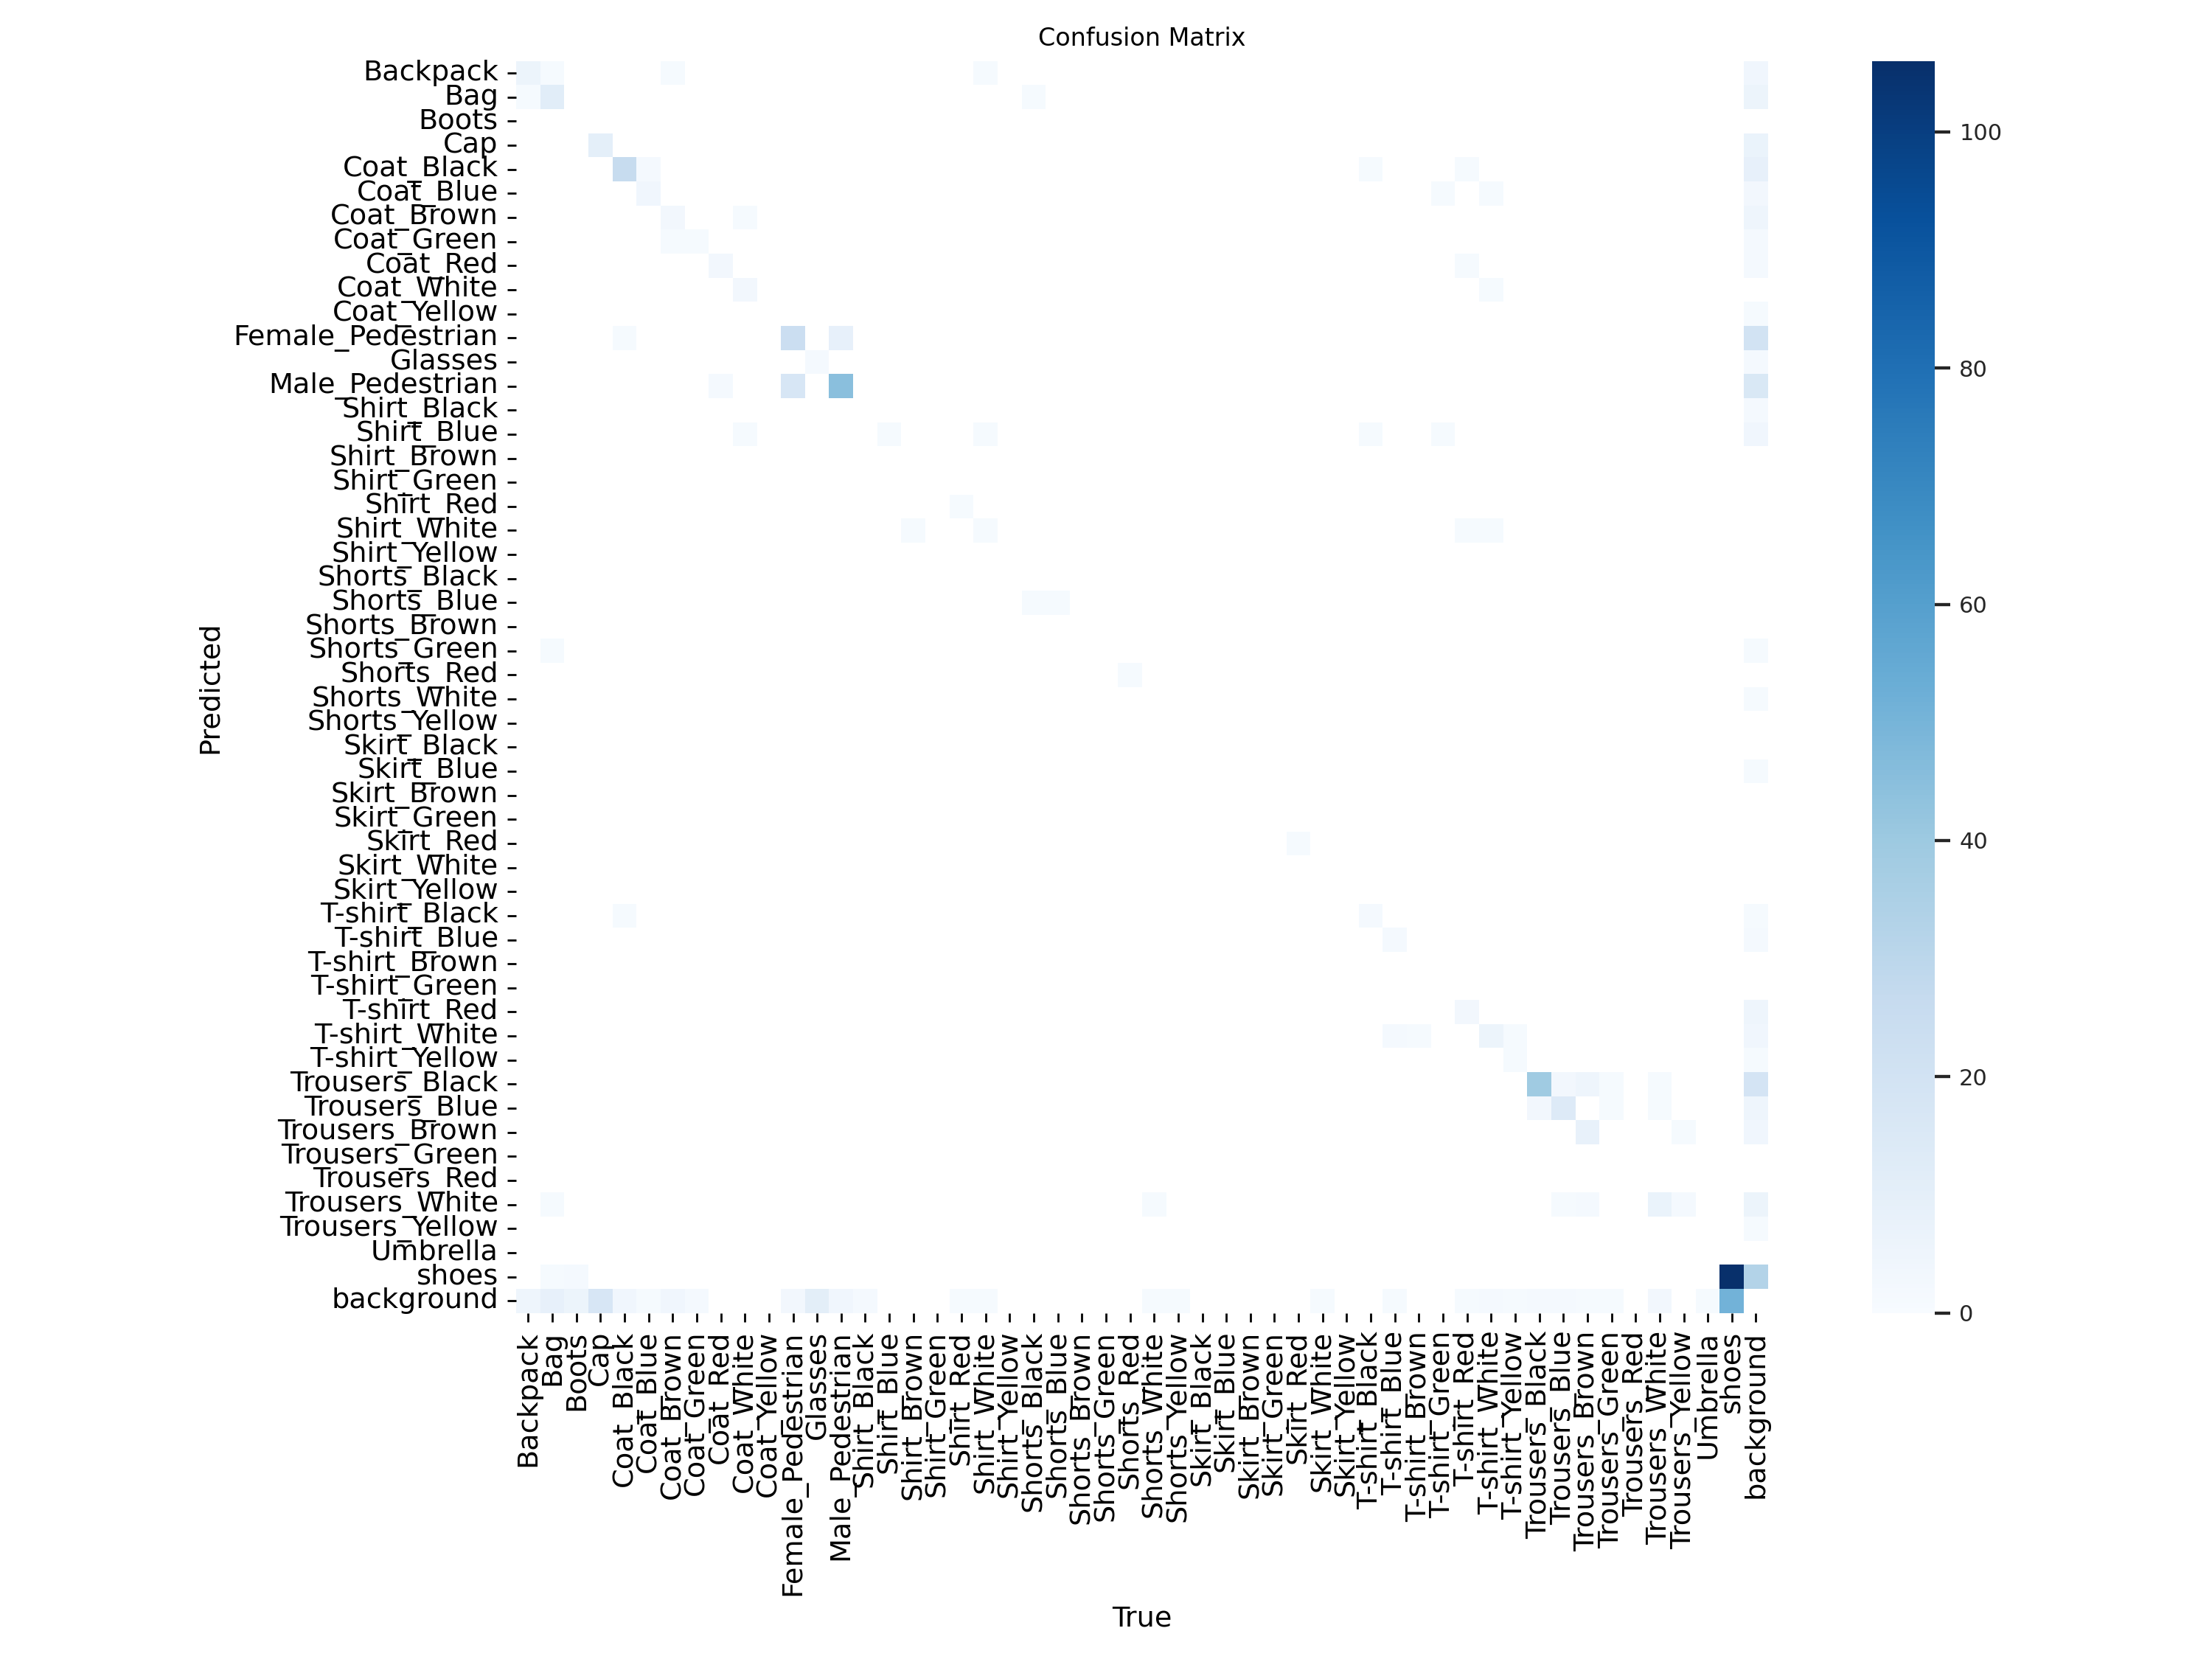

In [20]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=1000)

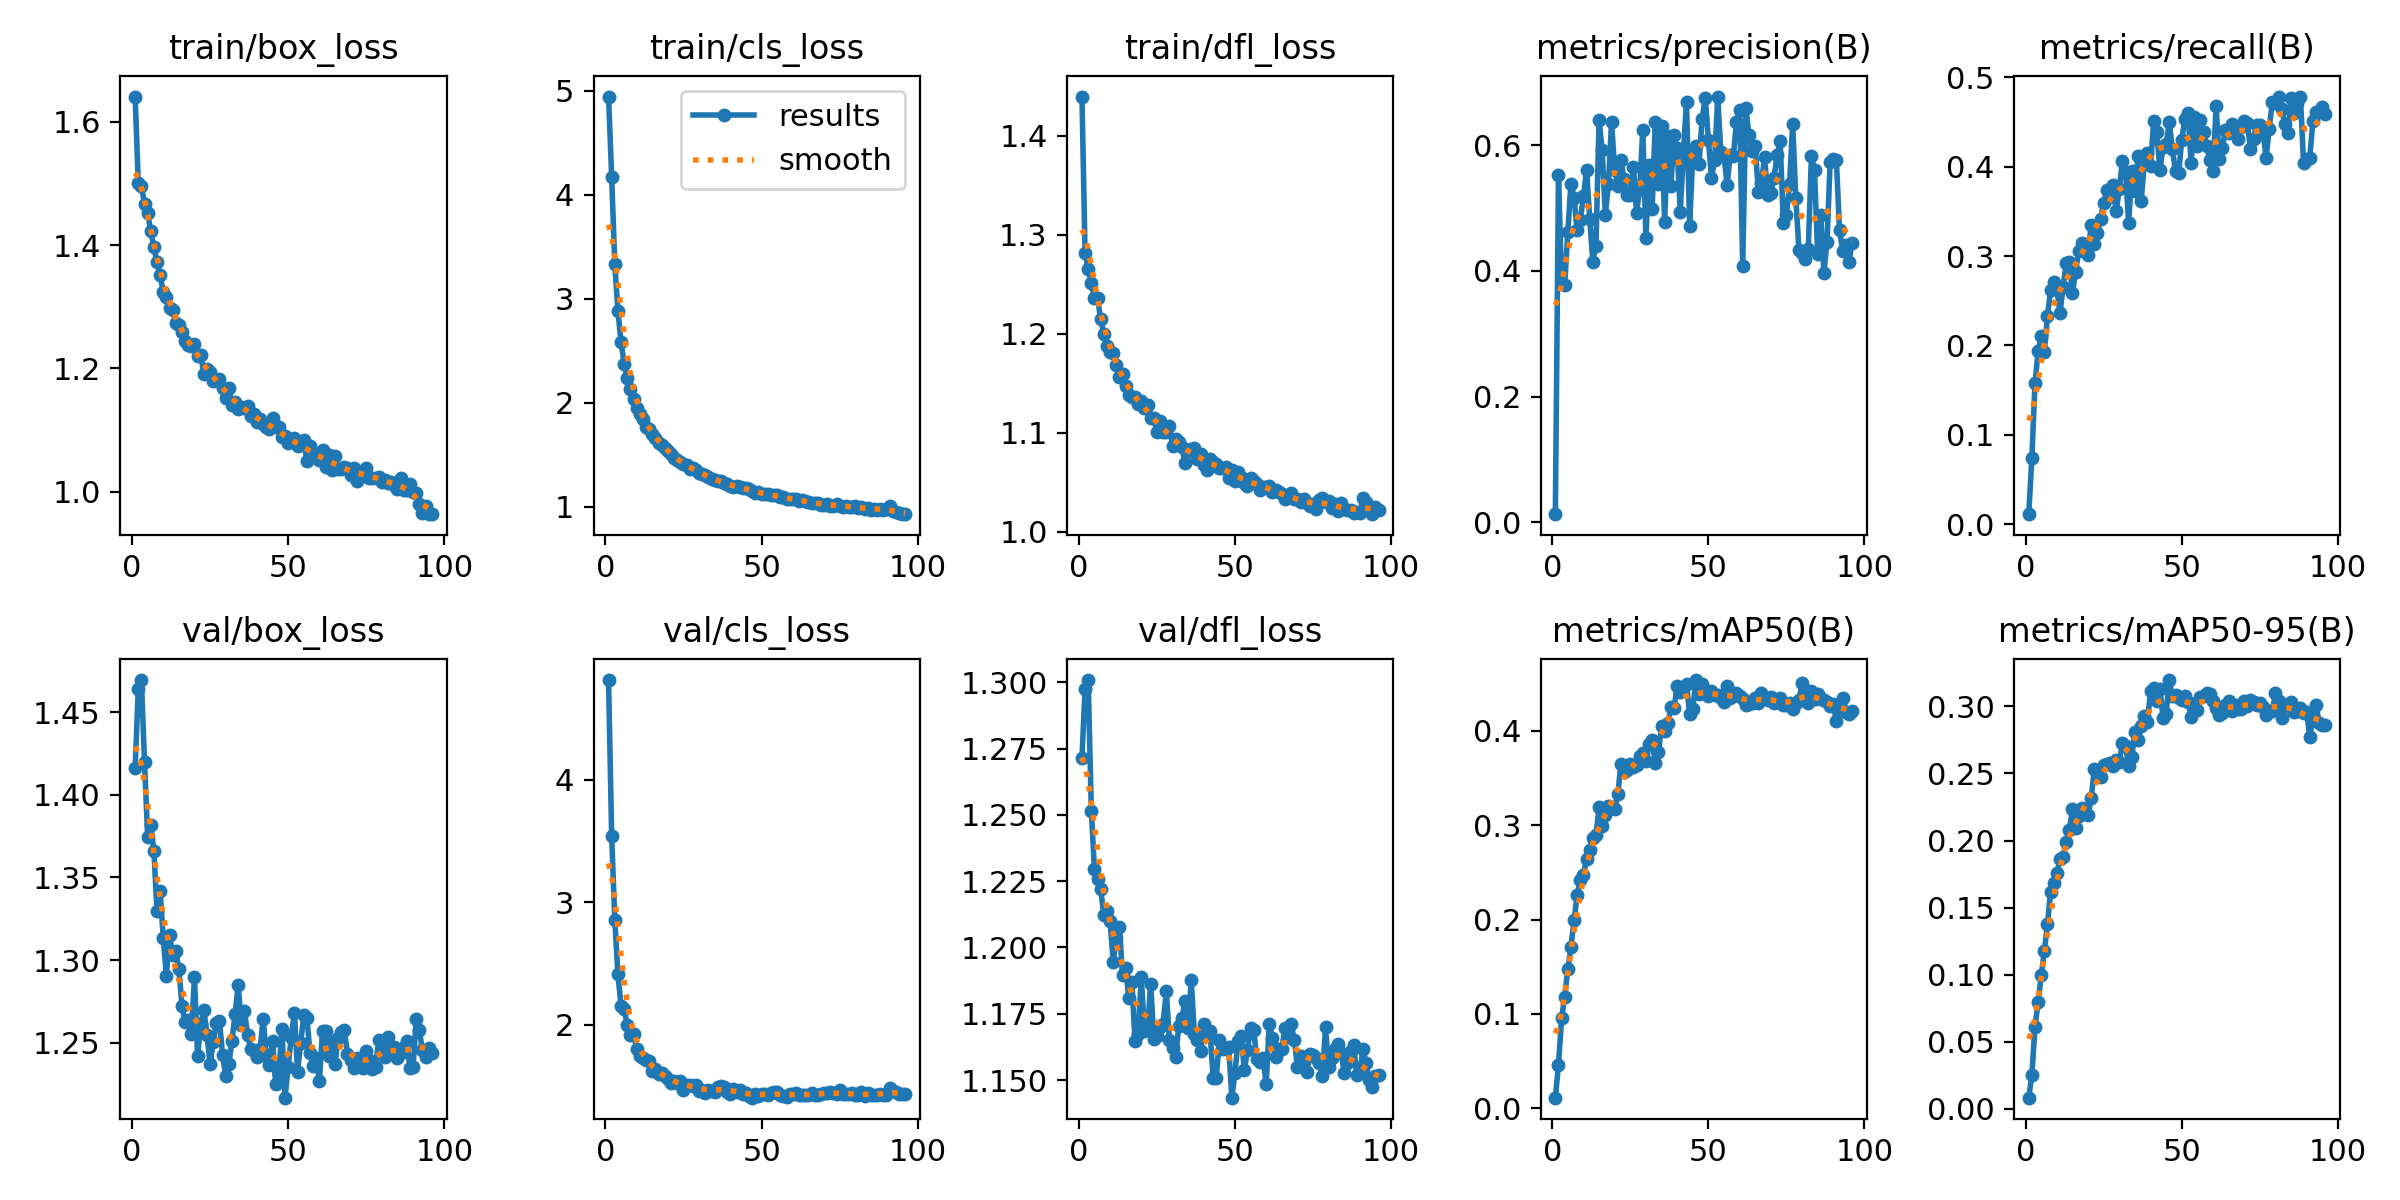

In [21]:
Image(filename=f'runs/detect/train/results.png', width=600)

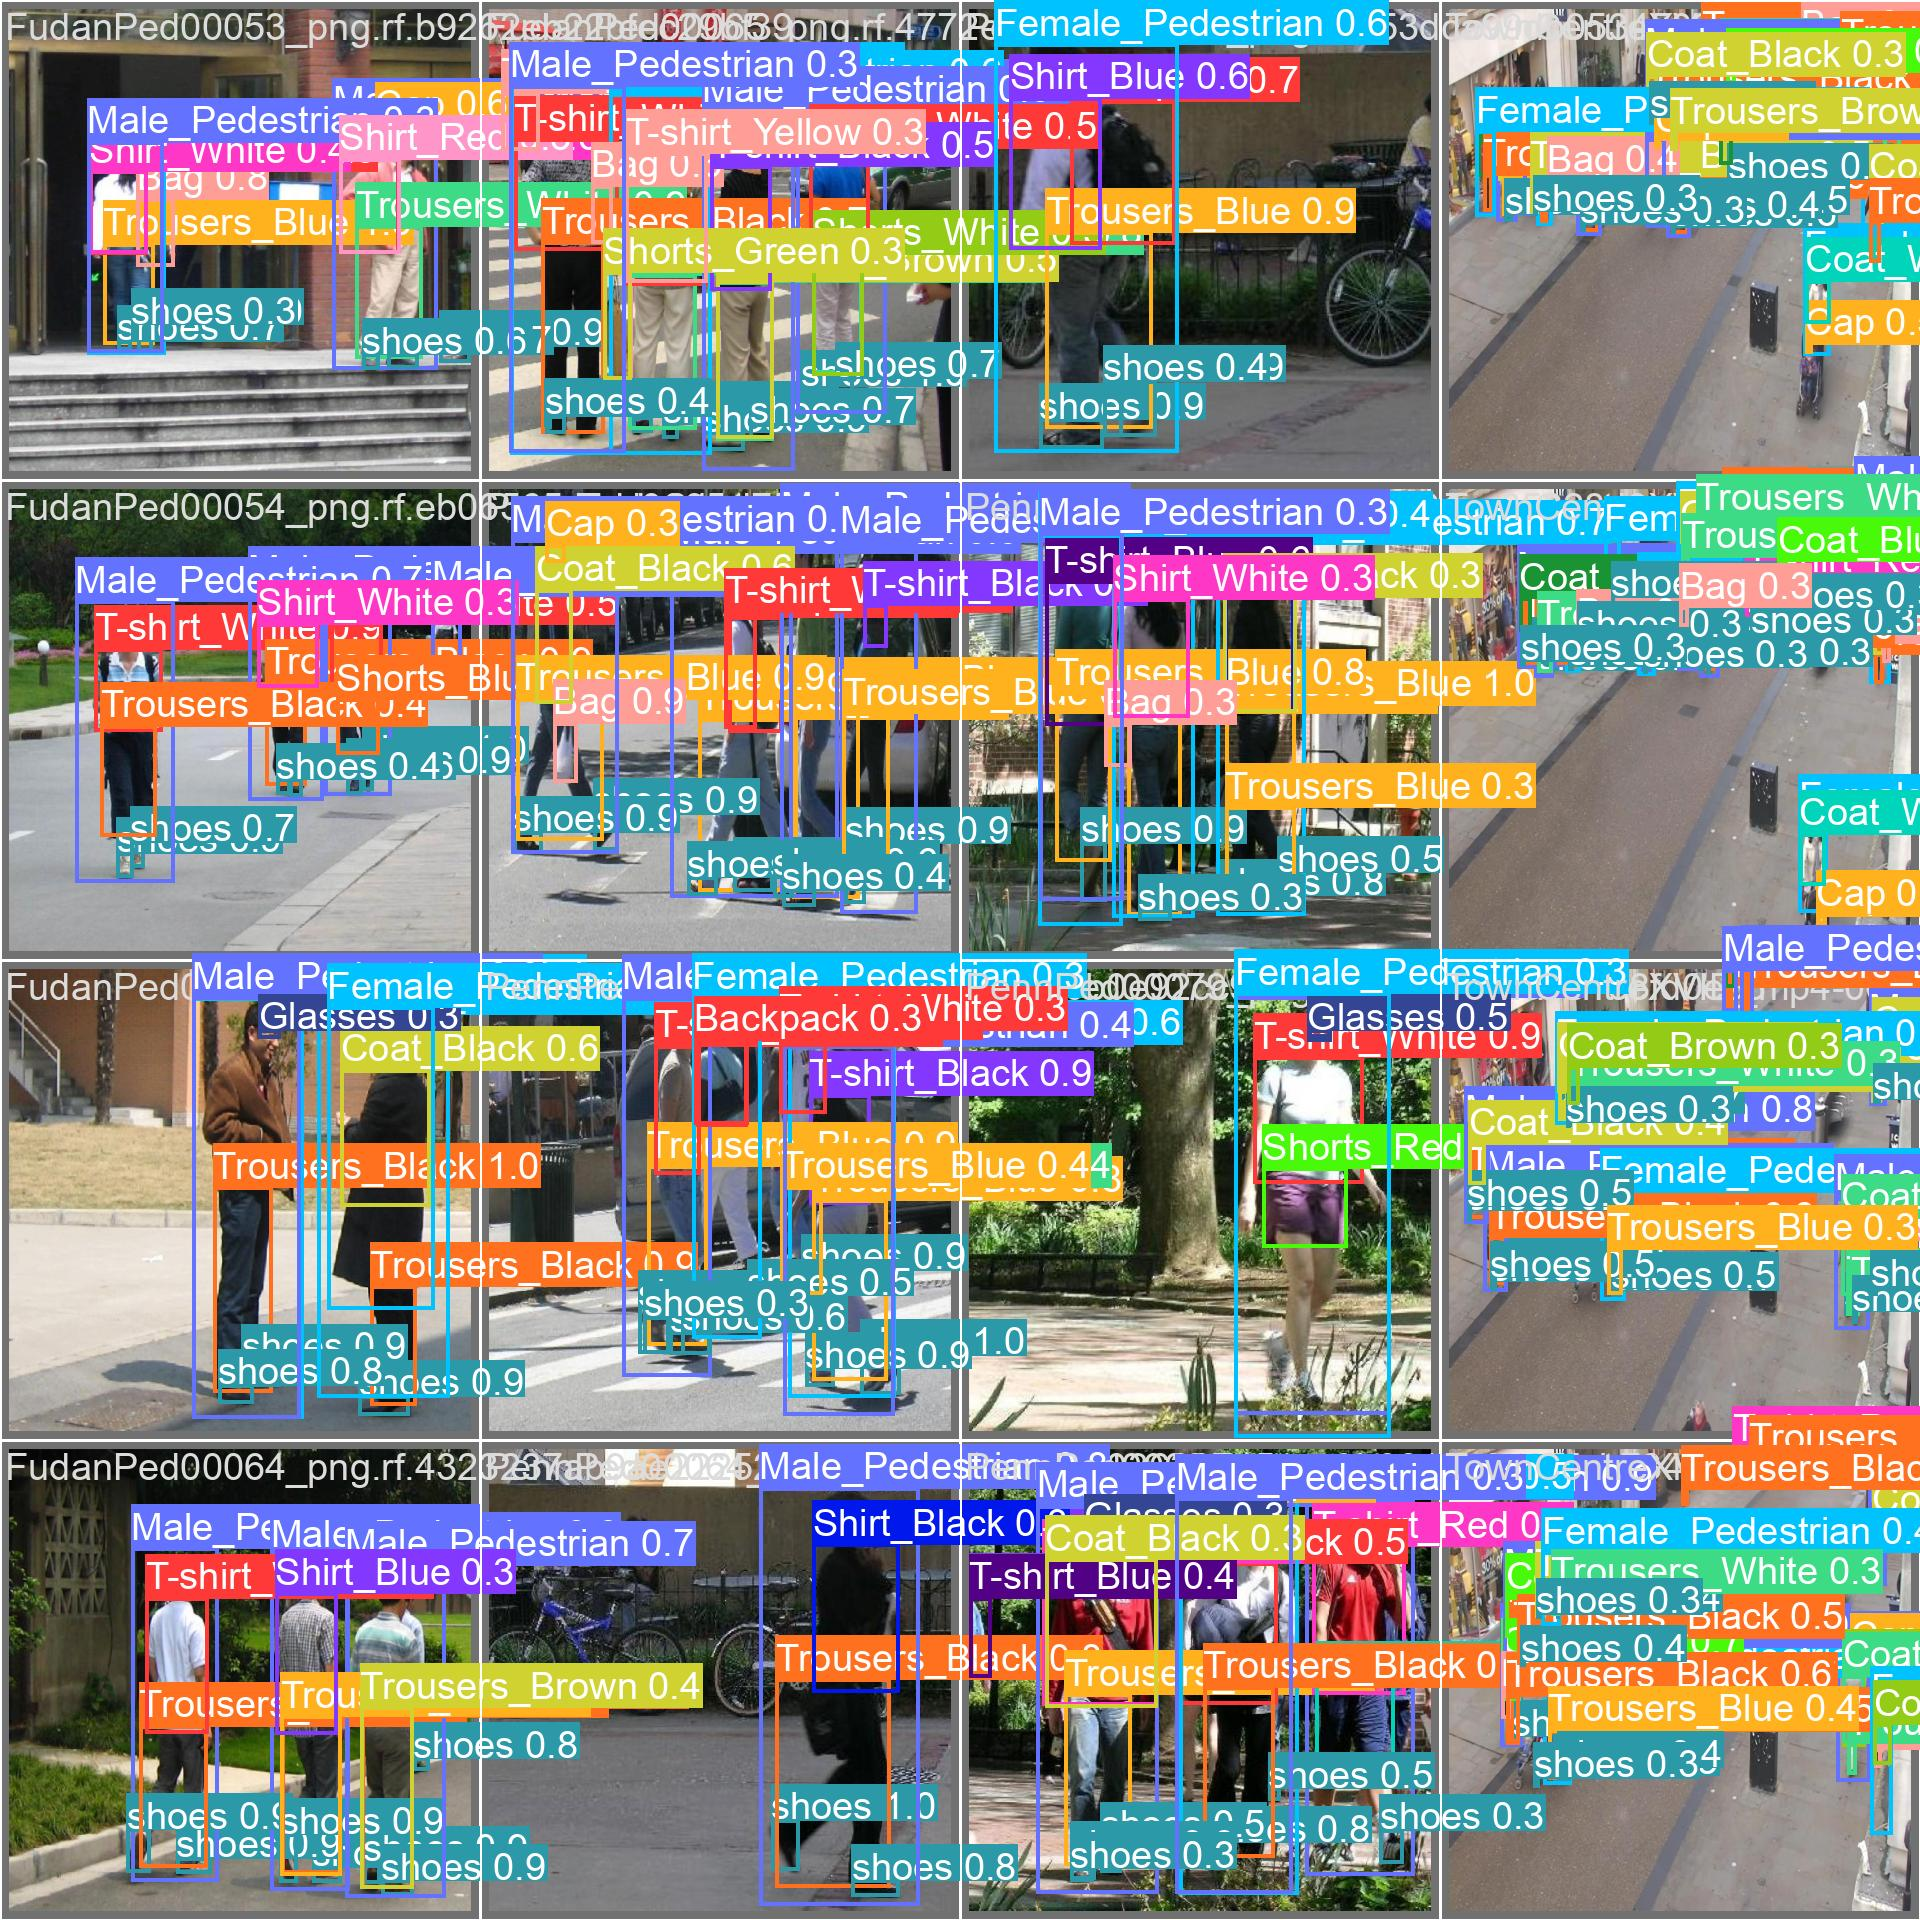

In [22]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/input/fyp-datasetv2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 3015593 parameters, 0 gradients, 8.1 GFLOPs



val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556        0.6      0.449      0.454      0.318
              Backpack         20         12      0.512      0.583      0.503      0.275
                   Bag         20         25       0.76      0.633      0.609      0.306
                 Boots         20          8          1          0      0.065     0.0179
                   Cap         20         27      0.578      0.457      0.562      0.338
            Coat_Black         20         32      0.663      0.861      0.826      0.432
             Coat_Blue         20          7      0.416      0.714      0.395      0.223
            Coat_Brown         20          9      0.426      0.444       0.56      0.337
            Coat_Green         20          3      0.204      0.333      0.424      0.254
              Coat_Red         20          5      0.429        0.6      0.421      0.245
            Coat_White         20          5      0.709        0.6      0.632      0.378
     Female_Pedestria

Speed: 6.5ms preprocess, 56.7ms inference, 0.0ms loss, 51.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [24]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/fyp-datasetv2/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 3015593 parameters, 0 gradients, 8.1 GFLOPs



image 1/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00057_png.rf.4ef63ddbce80dc7c87a2f7001cce5d48.jpg: 800x800 1 Backpack, 2 Bags, 3 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_Blue, 1 Shorts_Black, 2 T-shirt_Blacks, 1 T-shirt_Blue, 1 T-shirt_White, 1 Trousers_Black, 2 Trousers_Blues, 4 Trousers_Whites, 10 shoess, 8.7ms
image 2/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00061_png.rf.ef8f22d1c8262dbea979921bd9f0d233.jpg: 800x800 3 Coat_Blacks, 1 Female_Pedestrian, 2 Male_Pedestrians, 3 Trousers_Blacks, 1 Trousers_Blue, 6 shoess, 6.6ms


image 3/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00063_png.rf.a7b833aa0755423bcf15d2e426f3ec94.jpg: 800x800 2 Bags, 3 Coat_Blacks, 3 Female_Pedestrians, 2 Male_Pedestrians, 1 Shirt_White, 2 Trousers_Blacks, 3 Trousers_Blues, 2 shoess, 6.4ms


image 4/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00059_png.rf.21b4b6478adf6d21464f56b7450580e5.jpg: 800x800 1 Backpack, 2 Male_Pedestrians, 1 Shorts_Green, 1 T-shirt_Black, 1 T-shirt_White, 4 shoess, 6.2ms


image 5/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00077_png.rf.a00bea7ecf8e12943dc783257d786ed0.jpg: 800x800 1 Male_Pedestrian, 1 Trousers_Blue, 1 Trousers_White, 2 shoess, 7.3ms


image 6/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00085_png.rf.73bec04a9ce9ad7d96177bd9a4c41819.jpg: 800x800 1 Cap, 2 Male_Pedestrians, 1 Shirt_White, 1 T-shirt_Blue, 2 T-shirt_Whites, 1 Trousers_Black, 2 shoess, 6.2ms


image 7/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0000_jpg.rf.483c5d7664c89fbf5190bac763f14879.jpg: 800x800 2 Bags, 3 Caps, 5 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Green, 1 Coat_Red, 5 Female_Pedestrians, 7 Male_Pedestrians, 1 Shirt_Blue, 7 Trousers_Blacks, 3 Trousers_Blues, 1 Trousers_Brown, 3 Trousers_Whites, 6 shoess, 6.4ms


image 8/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0036_jpg.rf.dab643e6abd115c429ab4fd1418b0729.jpg: 800x800 3 Bags, 2 Coat_Blacks, 3 Coat_Browns, 2 Coat_Reds, 6 Female_Pedestrians, 7 Male_Pedestrians, 1 Shirt_Black, 8 Trousers_Blacks, 1 Trousers_Brown, 3 Trousers_Whites, 8 shoess, 6.1ms


image 9/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0042_jpg.rf.ba27c01ed8d80db7b82329ed6aae5011.jpg: 800x800 2 Bags, 1 Cap, 2 Coat_Blacks, 1 Coat_Blue, 1 Coat_Brown, 1 Coat_Green, 1 Coat_White, 3 Female_Pedestrians, 5 Male_Pedestrians, 1 T-shirt_Red, 5 Trousers_Blacks, 1 Trousers_Brown, 1 Trousers_White, 6 shoess, 6.0ms
image 10/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0061_jpg.rf.d36367b2be1b6297bd9b27c294d58b14.jpg: 800x800 2 Backpacks, 2 Bags, 1 Cap, 9 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Red, 2 Coat_Whites, 10 Female_Pedestrians, 10 Male_Pedestrians, 1 T-shirt_Red, 13 Trousers_Blacks, 1 Trousers_Blue, 4 Trousers_Whites, 10 shoess, 6.0ms


image 11/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0063_jpg.rf.1fb1d4e3f5249240cd16fa2b791fb386.jpg: 800x800 2 Backpacks, 2 Bags, 6 Caps, 13 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Red, 2 Coat_Whites, 9 Female_Pedestrians, 13 Male_Pedestrians, 1 T-shirt_Red, 12 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_White, 13 shoess, 5.9ms


image 12/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0083_jpg.rf.c22006fde8bbeb80a730d3a7622612f4.jpg: 800x800 2 Backpacks, 1 Bag, 1 Boots, 1 Cap, 5 Coat_Blacks, 2 Coat_Whites, 4 Female_Pedestrians, 7 Male_Pedestrians, 1 Shirt_Black, 5 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_Brown, 3 Trousers_Whites, 9 shoess, 6.2ms


image 13/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0084_jpg.rf.e865cbc0a78ac1280e0b2edbb7a51f40.jpg: 800x800 2 Backpacks, 5 Bags, 3 Caps, 6 Coat_Blacks, 1 Coat_Brown, 2 Coat_Whites, 4 Female_Pedestrians, 5 Male_Pedestrians, 5 Trousers_Blacks, 1 Trousers_Blue, 2 Trousers_Browns, 2 Trousers_Whites, 4 shoess, 6.3ms


image 14/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0112_jpg.rf.a8771b2f9a7e19eab7cf2bc3bec04e84.jpg: 800x800 1 Backpack, 4 Bags, 2 Caps, 2 Coat_Blacks, 1 Coat_Blue, 2 Coat_Browns, 3 Coat_Greens, 3 Coat_Reds, 1 Coat_White, 5 Female_Pedestrians, 7 Male_Pedestrians, 6 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 1 Trousers_White, 11 shoess, 5.8ms


image 15/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0129_jpg.rf.7f344d11eebb48d2f6a98cb8ed09c7e6.jpg: 800x800 3 Backpacks, 3 Bags, 1 Cap, 2 Coat_Blacks, 2 Coat_Browns, 2 Coat_Greens, 1 Coat_Red, 1 Coat_White, 2 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Blue, 2 Trousers_Blacks, 4 Trousers_Blues, 2 Trousers_Browns, 5 Trousers_Whites, 12 shoess, 7.1ms


image 16/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0173_jpg.rf.0a31fa3472b47f23c7faaa89a64eed41.jpg: 800x800 2 Backpacks, 3 Bags, 2 Coat_Blacks, 4 Coat_Browns, 1 Coat_Yellow, 5 Female_Pedestrians, 6 Male_Pedestrians, 1 T-shirt_Yellow, 7 Trousers_Blacks, 4 Trousers_Blues, 2 Trousers_Browns, 2 Trousers_Whites, 11 shoess, 7.1ms


image 17/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0179_jpg.rf.b69eb64a24043663db0c860e52e7ae5a.jpg: 800x800 1 Backpack, 2 Bags, 1 Cap, 5 Coat_Blacks, 1 Coat_Blue, 3 Coat_Browns, 1 Coat_Green, 1 Coat_White, 1 Coat_Yellow, 5 Female_Pedestrians, 7 Male_Pedestrians, 1 Shirt_Black, 1 T-shirt_Yellow, 7 Trousers_Blacks, 1 Trousers_Blue, 4 Trousers_Browns, 5 Trousers_Whites, 15 shoess, 6.1ms


image 18/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0197_jpg.rf.671cbe326e4c7b3f49dbf7134e751ce0.jpg: 800x800 5 Bags, 1 Cap, 2 Coat_Blacks, 1 Coat_Blue, 2 Coat_Browns, 1 Coat_Green, 3 Coat_Reds, 1 Coat_Yellow, 6 Female_Pedestrians, 4 Male_Pedestrians, 1 Skirt_Red, 5 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 1 Trousers_White, 13 shoess, 6.1ms


image 19/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0247_jpg.rf.1ecdf5977249f3acf5e6a8d71de6ec58.jpg: 800x800 2 Backpacks, 3 Bags, 3 Caps, 7 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_White, 7 Female_Pedestrians, 10 Male_Pedestrians, 1 Shirt_Black, 1 Skirt_Red, 9 Trousers_Blacks, 4 Trousers_Blues, 1 Trousers_Brown, 2 Trousers_Whites, 17 shoess, 6.1ms


image 20/20 /kaggle/input/fyp-datasetv2/test/images/test_mp4-0052_jpg.rf.ad087c00bb706b7bc473a304e681556f.jpg: 800x800 1 Coat_Green, 1 Male_Pedestrian, 1 Shirt_Blue, 1 Shirt_White, 1 Trousers_Black, 1 Trousers_Blue, 1 shoes, 6.1ms
Speed: 4.7ms preprocess, 6.4ms inference, 22.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

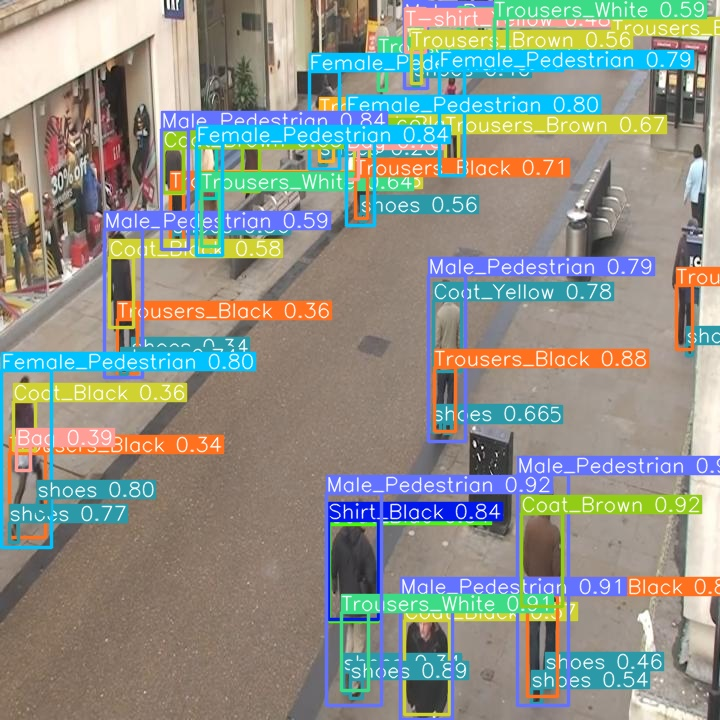

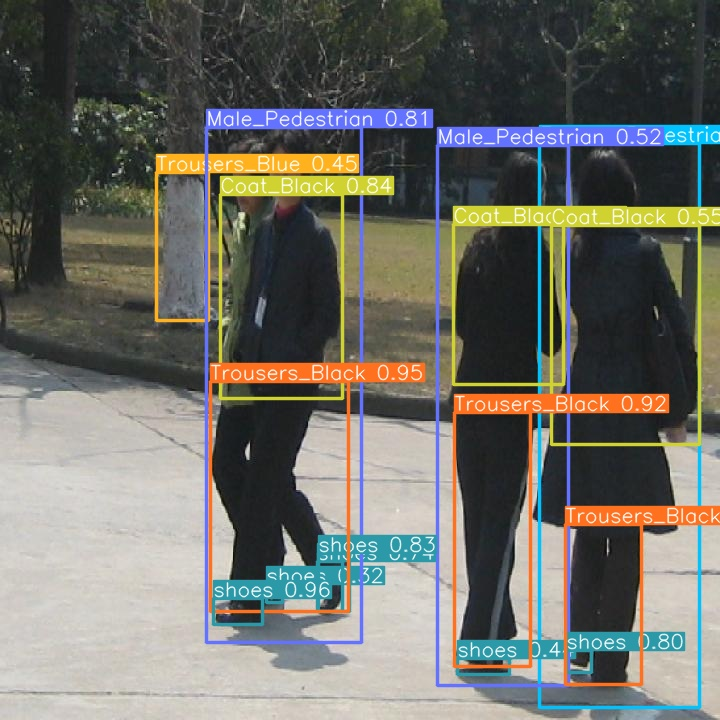

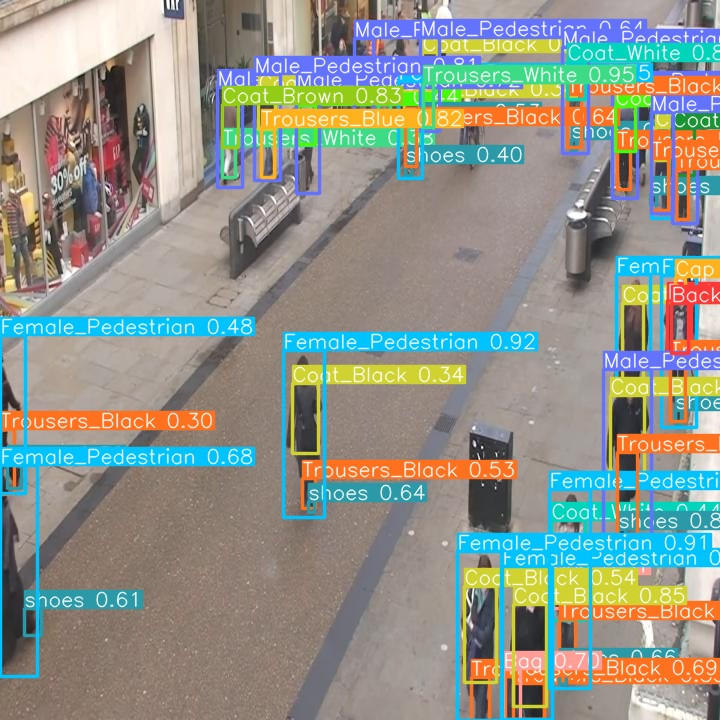

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")